In [1]:
seed=1899

In [2]:
import warnings
# warnings.filterwarnings('once')
warnings.filterwarnings('ignore')

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
os.environ['PYTHONHASHSEED']=str(seed)

In [3]:
def reset_random_seeds(seed):
    os.environ['PYTHONHASHSEED']=str(seed)
    tf.random.set_seed(seed)
    np.random.seed(seed)
    random.seed(seed)

In [4]:
import random
import tensorflow as tf


tf.random.set_seed(seed)

from keras.models import Sequential, load_model, save_model
from keras.layers import Dense,Input
from keras.layers import LSTM
from keras.layers import Dropout
from keras.optimizers import Adam
from keras.layers import BatchNormalization, Activation, Embedding, multiply
from keras.layers import LeakyReLU
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,UpSampling2D
from tensorflow.keras import Input, Model
from tensorflow.keras import backend as K
import glob
import math
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error  
import keras
from datetime import datetime
from keras.callbacks import EarlyStopping
import time
# from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.callbacks import EarlyStopping
# from sklearn.metrics import r2_score
# Commented out IPython magic to ensure Python compatibility.
import pandas as pd
import numpy as np
np.random.seed(seed)
import matplotlib.pyplot as plt
from matplotlib import pyplot
from scipy import stats
from keras.utils import to_categorical
# from statsmodels.tsa.stattools import adfuller
# from statsmodels.tsa.stattools import pacf
%matplotlib inline
from matplotlib.pylab import rcParams
import seaborn as sns
rcParams['figure.figsize']=15,5

import numpy as np
import pandas as pd
# import statsmodels.api as sm
import matplotlib.pyplot as plt
# import seaborn as sns
# sns.set()
from sklearn.cluster import KMeans
#PCA
from sklearn.manifold import TSNE

In [5]:
df = pd.read_csv('data.csv', header=0, index_col=None)

In [6]:
df

Temp  RhPer  Thickness  SoilType  Sand  Silt  Clay  LL  PL  SL  ...  \
0      30     40         14         1     0    46    54  54  27  17  ...   
1      30     50         14         1     0    46    54  54  27  17  ...   
2      30     60         14         1     0    46    54  54  27  17  ...   
3      30     70         14         1     0    46    54  54  27  17  ...   
4      30     80         14         1     0    46    54  54  27  17  ...   
..    ...    ...        ...       ...   ...   ...   ...  ..  ..  ..  ...   
355    50     50          4         5    20    27    53  69  28   6  ...   
356    50     60          4         5    20    27    53  69  28   6  ...   
357    50     70          4         5    20    27    53  69  28   6  ...   
358    50     80          4         5    20    27    53  69  28   6  ...   
359    50     90          4         5    20    27    53  69  28   6  ...   

     Womc  Gamadmax   Phi  AEV   Wr  Mineral1  Mineral2  Mineral3   Er  \
0    27.9      1.40  2042  209  1.2         3         1         0  503   
1    27.9      1.40  2042  209  1.2         3         1         0  471   
2    27.9      1.40  2042  209  1.2         3         1         0  452   
3    27.9      1.40  2042  209  1.2         3         1         0  416   
4    27.9      1.40  2042  209  1.2         3         1         0  324   
..    ...       ...   ...  ...  ...       ...       ...       ...  ...   
355  18.4      1.73  1571   37  6.1         2         4         1  934   
356  18.4      1.73  1571   37  6.1         2         4         1  867   
357  18.4      1.73  1571   37  6.1         2         4         1  758   
358  18.4      1.73  1571   37  6.1         2         4         1  733   
359  18.4      1.73  1571   37  6.1         2         4         1  694   

       Er_Paper  
0    793.110224  
1    717.338338  
2    660.834156  
3    616.547337  
4    580.590667  
..          ...  
355  703.219730  
356  639.612289  
357  590.343069  
358  550.742582  
359  518.023360  

[360 rows x 21 columns]

In [7]:
idx=['Temp','RhPer','Thickness','SoilType','Sand','Silt','Clay','LL','PL','SL','G','Womc','Gamadmax','Phi','AEV','Wr','Mineral1','Mineral2','Mineral3','Er','Er_Paper']

In [8]:
newdf=df[idx]
data=newdf.values[:,:-2]
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)
label=newdf.values[:,-2]
np.random.seed(seed)
Per=np.random.permutation(len(data))
data=data[Per]
label=label[Per]


In [9]:
data.shape

(360, 19)

In [10]:
data[0]

array([0.        , 0.4       , 0.        , 0.25      , 0.33333333,
       0.        , 1.        , 1.        , 1.        , 1.        ,
       0.        , 1.        , 0.        , 1.        , 0.28979592,
       1.        , 0.75      , 0.        , 0.        ])

In [11]:
label[:5]

array([304., 799., 319., 686., 377.])

[0]
CPU times: user 1e+03 ns, sys: 1e+03 ns, total: 2 µs
Wall time: 2.86 µs


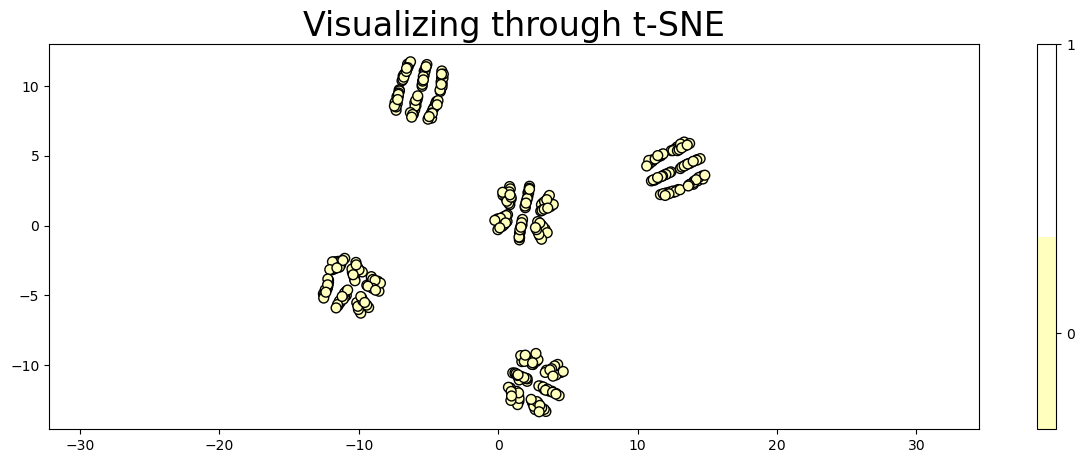

In [12]:
x_subset = data[:]
y_subset = [np.argmax(x) for x in label]

print(np.unique(y_subset))
x_subset=x_subset.reshape((x_subset.shape[0],x_subset.shape[1]))
%time
tsne = TSNE(random_state = 42, n_components=2,verbose=0, perplexity=40, n_iter=300).fit_transform(x_subset)
plt.scatter(tsne[:, 0], tsne[:, 1], s= 50, c=y_subset, cmap='Spectral',edgecolors='black')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(2)-0.5).set_ticks(np.arange(2))
plt.title('Visualizing through t-SNE', fontsize=24);

In [13]:
kmeans = KMeans(5)
kmeans.fit(data)
identified_clusters = kmeans.fit_predict(data)
# identified_clusters

In [14]:
count=[i for i in range(5)]
Train,Test=[],[]
TrainLabel, TestLabel=[],[]
for i in range(len(data)):
    x=identified_clusters[i]
    if x==0 and count[0] < 16:
        count[0]+=1
        Test.append(data[i])
        TestLabel.append(label[i])
    elif x==1 and count[1] < 16:
        count[1]+=1
        Test.append(data[i])
        TestLabel.append(label[i])
    elif x==2 and count[2] < 16:
        count[2]+=1
        Test.append(data[i])
        TestLabel.append(label[i])
    elif x==3 and count[3] < 17:
        count[3]+=1
        Test.append(data[i])
        TestLabel.append(label[i])
    elif x==4 and count[4] < 17:
        count[4]+=1
        Test.append(data[i])
        TestLabel.append(label[i])
    else:
        Train.append(data[i])
        TrainLabel.append(label[i])
        
Train=np.array(Train)
Test=np.array(Test)
TrainLabel=np.array(TrainLabel)
TestLabel=np.array(TestLabel)        

In [15]:
def guidedRelu(x):
    def grad(dy):
        return tf.cast(dy>0,"float32") * tf.cast(x>0, "float32") * dy
    return tf.nn.relu(x), grad

In [16]:
def MAPE(Y_actual,Y_Predicted):
    summ=0
    for i in range(len(Y_actual)):
        if Y_actual[i]!=0:
            summ+=np.abs((Y_actual[i] - Y_Predicted[i])/Y_actual[i])*100
        else:
            summ+=np.abs((Y_actual[i] - Y_Predicted[i]))*100
            
    mape = summ/len(Y_actual)
    return mape

def score(actual,predicted):
    mape=MAPE(actual,predicted)
    mse=mean_squared_error(actual,predicted)    
    rmse=math.sqrt(mse) 
    r2=r2_score(actual,predicted)
    return mse, rmse, mape[0],r2

In [17]:
reset_random_seeds(seed)
input_lyr = Input(shape=(19,))
initializer = tf.keras.initializers.HeUniform()
layer1 = Dense(100, activation='relu',kernel_initializer=initializer)(input_lyr)
layer2 = Dense(500, activation='relu',kernel_initializer=initializer)(layer1)
layer3 = Dense(5000, activation='relu',kernel_initializer=initializer)(layer2)
# d11=Dropout(0.01)(layer3)
output_layer = Dense(1)(layer3)
model = Model(input_lyr, output_layer)

tf.random.set_seed(seed)
np.random.seed(seed)
model.compile(optimizer='adam', loss='mse')
model.summary()


Metal device set to: Apple M1 Pro
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 19)]              0         
                                                                 
 dense (Dense)               (None, 100)               2000      
                                                                 
 dense_1 (Dense)             (None, 500)               50500     
                                                                 
 dense_2 (Dense)             (None, 5000)              2505000   
                                                                 
 dense_3 (Dense)             (None, 1)                 5001      
                                                                 
Total params: 2,562,501
Trainable params: 2,562,501
Non-trainable params: 0
_________________________________________________________________


In [18]:
def CV(Train, TrainLabel,Test, TestLabel):
    reset_random_seeds(seed)
    callback=keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=1.0e-4, patience=100, verbose=0, mode="auto", baseline=None, restore_best_weights=True)
    history = model.fit(Train, TrainLabel, epochs=50000, batch_size=512,  validation_data=(Test, TestLabel), callbacks=[callback], shuffle=True)


    grd=[]
    gb=[]
    for i in range(len(data)):
        idx1=i
    #     print(idx1)
        inp = data[idx1:idx1+1]
        with tf.GradientTape() as tape:
            inputs = tf.cast(inp, tf.float32)
            tape.watch(inputs)
            outputs = model(inputs)[0]
            grads = tape.gradient(outputs,inputs)
            #Visualizing the back prop
            gb_viz =grads     
            gb_viz -= np.min(grads)
            gb_viz /= np.max(gb_viz)
            grd.append(grads)
            gb.append(gb_viz)

    GB=np.array(grd)
    GB=abs(GB)
    GBS=np.sum(GB,axis=0)[0]

    temp = GBS.argsort()
    ranks = np.empty_like(temp)
    ranks[temp] = np.arange(len(GBS))
    print(GBS)
    print(ranks)
    newrank=18-ranks
    top=18
    newidx=[]
    
    for i in range(top):
        j=np.where(newrank==i)[0][0]
        newidx.append(idx[j])
        
    print()    
    print(newidx)
    
    return newidx


In [19]:
data.shape

(360, 19)

In [20]:
CV_result=[]
count=0
x=[ i for i in range(162)]
for i in range(10):
    y=[ k for k in range(count,count+36)]
    count+=36
#     print(y)
    z=[l for l in x if l not in y]
    Train=data[z]
    TrainLabel=label[z]
    Test=data[y]
    TestLabel=label[y]
    
    CV_result.append(CV(Train, TrainLabel,Test, TestLabel))

Epoch 1/50000
1/1 [==============================] - 0s 459ms/step - loss: 608206.0000 - val_loss: 528521.1250
Epoch 2/50000
1/1 [==============================] - 0s 33ms/step - loss: 591195.1875 - val_loss: 511885.1250
Epoch 3/50000
1/1 [==============================] - 0s 36ms/step - loss: 573713.8750 - val_loss: 494042.5625
Epoch 4/50000
1/1 [==============================] - 0s 33ms/step - loss: 554899.1250 - val_loss: 474444.6250
Epoch 5/50000
1/1 [==============================] - 0s 33ms/step - loss: 534189.1250 - val_loss: 452698.0000
Epoch 6/50000
1/1 [==============================] - 0s 33ms/step - loss: 511180.0938 - val_loss: 428553.8438
Epoch 7/50000
1/1 [==============================] - 0s 38ms/step - loss: 485566.5312 - val_loss: 401809.5938
Epoch 8/50000
1/1 [==============================] - 0s 32ms/step - loss: 457103.6562 - val_loss: 372386.0000
Epoch 9/50000
1/1 [==============================] - 0s 33ms/step - loss: 425685.2812 - val_loss: 340304.8438
Epoch 10/

Epoch 76/50000
1/1 [==============================] - 0s 31ms/step - loss: 17159.0918 - val_loss: 22319.9238
Epoch 77/50000
1/1 [==============================] - 0s 31ms/step - loss: 16380.3955 - val_loss: 21155.1992
Epoch 78/50000
1/1 [==============================] - 0s 31ms/step - loss: 15673.9580 - val_loss: 20109.6523
Epoch 79/50000
1/1 [==============================] - 0s 33ms/step - loss: 15033.7627 - val_loss: 19178.4199
Epoch 80/50000
1/1 [==============================] - 0s 31ms/step - loss: 14432.6201 - val_loss: 18363.4902
Epoch 81/50000
1/1 [==============================] - 0s 34ms/step - loss: 13839.6787 - val_loss: 17647.6914
Epoch 82/50000
1/1 [==============================] - 0s 31ms/step - loss: 13236.6416 - val_loss: 17017.7754
Epoch 83/50000
1/1 [==============================] - 0s 32ms/step - loss: 12618.0078 - val_loss: 16470.9785
Epoch 84/50000
1/1 [==============================] - 0s 33ms/step - loss: 11994.6865 - val_loss: 16005.3096
Epoch 85/50000
1/1 

Epoch 152/50000
1/1 [==============================] - 0s 33ms/step - loss: 2765.0198 - val_loss: 3817.6477
Epoch 153/50000
1/1 [==============================] - 0s 32ms/step - loss: 2738.2332 - val_loss: 3759.5496
Epoch 154/50000
1/1 [==============================] - 0s 32ms/step - loss: 2711.4568 - val_loss: 3696.9136
Epoch 155/50000
1/1 [==============================] - 0s 33ms/step - loss: 2684.6404 - val_loss: 3634.8052
Epoch 156/50000
1/1 [==============================] - 0s 34ms/step - loss: 2658.0479 - val_loss: 3575.0022
Epoch 157/50000
1/1 [==============================] - 0s 33ms/step - loss: 2631.7800 - val_loss: 3517.2629
Epoch 158/50000
1/1 [==============================] - 0s 35ms/step - loss: 2605.7576 - val_loss: 3463.1184
Epoch 159/50000
1/1 [==============================] - 0s 31ms/step - loss: 2579.5452 - val_loss: 3412.7861
Epoch 160/50000
1/1 [==============================] - 0s 32ms/step - loss: 2553.4963 - val_loss: 3362.3333
Epoch 161/50000
1/1 [=======

Epoch 228/50000
1/1 [==============================] - 0s 33ms/step - loss: 1465.6947 - val_loss: 1583.6953
Epoch 229/50000
1/1 [==============================] - 0s 32ms/step - loss: 1457.1091 - val_loss: 1578.7708
Epoch 230/50000
1/1 [==============================] - 0s 34ms/step - loss: 1448.2627 - val_loss: 1575.4524
Epoch 231/50000
1/1 [==============================] - 0s 34ms/step - loss: 1439.9268 - val_loss: 1566.8760
Epoch 232/50000
1/1 [==============================] - 0s 33ms/step - loss: 1431.4774 - val_loss: 1564.1995
Epoch 233/50000
1/1 [==============================] - 0s 33ms/step - loss: 1423.2402 - val_loss: 1559.0963
Epoch 234/50000
1/1 [==============================] - 0s 33ms/step - loss: 1414.9346 - val_loss: 1551.3035
Epoch 235/50000
1/1 [==============================] - 0s 32ms/step - loss: 1407.2852 - val_loss: 1543.7494
Epoch 236/50000
1/1 [==============================] - 0s 26ms/step - loss: 1399.2509 - val_loss: 1545.9928
Epoch 237/50000
1/1 [=======

Epoch 304/50000
1/1 [==============================] - 0s 33ms/step - loss: 1008.8171 - val_loss: 1060.8375
Epoch 305/50000
1/1 [==============================] - 0s 33ms/step - loss: 1003.8660 - val_loss: 1054.4830
Epoch 306/50000
1/1 [==============================] - 0s 33ms/step - loss: 999.2485 - val_loss: 1053.3785
Epoch 307/50000
1/1 [==============================] - 0s 31ms/step - loss: 994.5685 - val_loss: 1049.4948
Epoch 308/50000
1/1 [==============================] - 0s 34ms/step - loss: 989.9672 - val_loss: 1043.8453
Epoch 309/50000
1/1 [==============================] - 0s 26ms/step - loss: 985.2062 - val_loss: 1044.6598
Epoch 310/50000
1/1 [==============================] - 0s 33ms/step - loss: 980.4520 - val_loss: 1043.3414
Epoch 311/50000
1/1 [==============================] - 0s 32ms/step - loss: 975.7565 - val_loss: 1037.4065
Epoch 312/50000
1/1 [==============================] - 0s 25ms/step - loss: 971.0372 - val_loss: 1037.6217
Epoch 313/50000
1/1 [==============

1/1 [==============================] - 0s 33ms/step - loss: 730.8802 - val_loss: 930.7734
Epoch 382/50000
1/1 [==============================] - 0s 34ms/step - loss: 728.2900 - val_loss: 927.3958
Epoch 383/50000
1/1 [==============================] - 0s 26ms/step - loss: 725.5727 - val_loss: 928.1706
Epoch 384/50000
1/1 [==============================] - 0s 35ms/step - loss: 723.2100 - val_loss: 923.3557
Epoch 385/50000
1/1 [==============================] - 0s 28ms/step - loss: 720.6151 - val_loss: 924.1515
Epoch 386/50000
1/1 [==============================] - 0s 34ms/step - loss: 717.9822 - val_loss: 922.1148
Epoch 387/50000
1/1 [==============================] - 0s 34ms/step - loss: 715.3923 - val_loss: 920.7161
Epoch 388/50000
1/1 [==============================] - 0s 25ms/step - loss: 713.0489 - val_loss: 923.5833
Epoch 389/50000
1/1 [==============================] - 0s 33ms/step - loss: 710.7766 - val_loss: 918.2200
Epoch 390/50000
1/1 [==============================] - 0s 25ms

1/1 [==============================] - 0s 27ms/step - loss: 575.0481 - val_loss: 888.6977
Epoch 459/50000
1/1 [==============================] - 0s 25ms/step - loss: 573.4684 - val_loss: 892.0329
Epoch 460/50000
1/1 [==============================] - 0s 25ms/step - loss: 571.8409 - val_loss: 888.1117
Epoch 461/50000
1/1 [==============================] - 0s 25ms/step - loss: 570.3068 - val_loss: 887.4122
Epoch 462/50000
1/1 [==============================] - 0s 25ms/step - loss: 568.7432 - val_loss: 883.0038
Epoch 463/50000
1/1 [==============================] - 0s 25ms/step - loss: 567.3001 - val_loss: 886.0347
Epoch 464/50000
1/1 [==============================] - 0s 30ms/step - loss: 565.7230 - val_loss: 879.3558
Epoch 465/50000
1/1 [==============================] - 0s 24ms/step - loss: 564.2683 - val_loss: 883.0682
Epoch 466/50000
1/1 [==============================] - 0s 25ms/step - loss: 562.5679 - val_loss: 879.8968
Epoch 467/50000
1/1 [==============================] - 0s 25ms

1/1 [==============================] - 0s 26ms/step - loss: 466.1967 - val_loss: 904.7828
Epoch 536/50000
1/1 [==============================] - 0s 26ms/step - loss: 465.3358 - val_loss: 894.7424
Epoch 537/50000
1/1 [==============================] - 0s 26ms/step - loss: 464.1406 - val_loss: 900.7865
Epoch 538/50000
1/1 [==============================] - 0s 25ms/step - loss: 462.4995 - val_loss: 896.6760
Epoch 539/50000
1/1 [==============================] - 0s 26ms/step - loss: 460.9639 - val_loss: 896.4217
Epoch 540/50000
1/1 [==============================] - 0s 28ms/step - loss: 459.7132 - val_loss: 899.0233
Epoch 541/50000
1/1 [==============================] - 0s 25ms/step - loss: 458.5682 - val_loss: 895.2295
Epoch 542/50000
1/1 [==============================] - 0s 27ms/step - loss: 457.3888 - val_loss: 901.9486
Epoch 543/50000
1/1 [==============================] - 0s 28ms/step - loss: 456.0943 - val_loss: 898.2415
Epoch 544/50000
1/1 [==============================] - 0s 26ms

1/1 [==============================] - 0s 26ms/step - loss: 558.0564 - val_loss: 615.9725
Epoch 8/50000
1/1 [==============================] - 0s 28ms/step - loss: 546.7085 - val_loss: 616.3300
Epoch 9/50000
1/1 [==============================] - 0s 26ms/step - loss: 536.4324 - val_loss: 620.8469
Epoch 10/50000
1/1 [==============================] - 0s 26ms/step - loss: 529.7874 - val_loss: 646.2437
Epoch 11/50000
1/1 [==============================] - 0s 26ms/step - loss: 523.8490 - val_loss: 661.6879
Epoch 12/50000
1/1 [==============================] - 0s 25ms/step - loss: 518.1188 - val_loss: 677.6515
Epoch 13/50000
1/1 [==============================] - 0s 26ms/step - loss: 513.0471 - val_loss: 707.2435
Epoch 14/50000
1/1 [==============================] - 0s 26ms/step - loss: 507.6743 - val_loss: 722.1663
Epoch 15/50000
1/1 [==============================] - 0s 26ms/step - loss: 502.7027 - val_loss: 730.5023
Epoch 16/50000
1/1 [==============================] - 0s 25ms/step - los

1/1 [==============================] - 0s 25ms/step - loss: 307.9977 - val_loss: 1054.1653
Epoch 86/50000
1/1 [==============================] - 0s 26ms/step - loss: 307.3335 - val_loss: 1074.8289
Epoch 87/50000
1/1 [==============================] - 0s 26ms/step - loss: 306.1396 - val_loss: 1061.5128
Epoch 88/50000
1/1 [==============================] - 0s 26ms/step - loss: 304.5443 - val_loss: 1072.5739
Epoch 89/50000
1/1 [==============================] - 0s 26ms/step - loss: 302.0781 - val_loss: 1069.6465
Epoch 90/50000
1/1 [==============================] - 0s 26ms/step - loss: 300.0573 - val_loss: 1078.4579
Epoch 91/50000
1/1 [==============================] - 0s 26ms/step - loss: 298.5876 - val_loss: 1088.1378
Epoch 92/50000
1/1 [==============================] - 0s 26ms/step - loss: 297.1468 - val_loss: 1086.2281
Epoch 93/50000
1/1 [==============================] - 0s 26ms/step - loss: 295.6008 - val_loss: 1092.3229
Epoch 94/50000
1/1 [==============================] - 0s 26ms

1/1 [==============================] - 0s 30ms/step - loss: 306.4980 - val_loss: 1227.7910
Epoch 58/50000
1/1 [==============================] - 0s 25ms/step - loss: 304.1840 - val_loss: 1226.4783
Epoch 59/50000
1/1 [==============================] - 0s 25ms/step - loss: 302.2488 - val_loss: 1236.6105
Epoch 60/50000
1/1 [==============================] - 0s 25ms/step - loss: 300.3123 - val_loss: 1236.0341
Epoch 61/50000
1/1 [==============================] - 0s 26ms/step - loss: 298.5172 - val_loss: 1234.8000
Epoch 62/50000
1/1 [==============================] - 0s 25ms/step - loss: 296.8379 - val_loss: 1252.9445
Epoch 63/50000
1/1 [==============================] - 0s 25ms/step - loss: 295.2383 - val_loss: 1256.0284
Epoch 64/50000
1/1 [==============================] - 0s 25ms/step - loss: 293.6892 - val_loss: 1255.8014
Epoch 65/50000
1/1 [==============================] - 0s 26ms/step - loss: 292.2667 - val_loss: 1270.0494
Epoch 66/50000
1/1 [==============================] - 0s 26ms

1/1 [==============================] - 0s 26ms/step - loss: 470.4229 - val_loss: 616.0759
Epoch 30/50000
1/1 [==============================] - 0s 26ms/step - loss: 467.5751 - val_loss: 606.0355
Epoch 31/50000
1/1 [==============================] - 0s 25ms/step - loss: 463.9182 - val_loss: 613.2847
Epoch 32/50000
1/1 [==============================] - 0s 25ms/step - loss: 460.4473 - val_loss: 629.4771
Epoch 33/50000
1/1 [==============================] - 0s 25ms/step - loss: 457.7045 - val_loss: 623.5073
Epoch 34/50000
1/1 [==============================] - 0s 26ms/step - loss: 454.2870 - val_loss: 632.0576
Epoch 35/50000
1/1 [==============================] - 0s 31ms/step - loss: 451.2919 - val_loss: 647.6883
Epoch 36/50000
1/1 [==============================] - 0s 25ms/step - loss: 448.8290 - val_loss: 642.8061
Epoch 37/50000
1/1 [==============================] - 0s 26ms/step - loss: 445.7757 - val_loss: 649.7790
Epoch 38/50000
1/1 [==============================] - 0s 26ms/step - l

1/1 [==============================] - 0s 204ms/step - loss: 517.4378 - val_loss: 1041.9757
Epoch 2/50000
1/1 [==============================] - 0s 36ms/step - loss: 519.1718 - val_loss: 942.8806
Epoch 3/50000
1/1 [==============================] - 0s 27ms/step - loss: 501.7038 - val_loss: 964.1825
Epoch 4/50000
1/1 [==============================] - 0s 26ms/step - loss: 493.7117 - val_loss: 1100.3019
Epoch 5/50000
1/1 [==============================] - 0s 28ms/step - loss: 490.0479 - val_loss: 1039.2233
Epoch 6/50000
1/1 [==============================] - 0s 27ms/step - loss: 475.6549 - val_loss: 1024.5344
Epoch 7/50000
1/1 [==============================] - 0s 27ms/step - loss: 471.3713 - val_loss: 1119.2123
Epoch 8/50000
1/1 [==============================] - 0s 28ms/step - loss: 465.9867 - val_loss: 1057.6553
Epoch 9/50000
1/1 [==============================] - 0s 27ms/step - loss: 455.5332 - val_loss: 1014.0242
Epoch 10/50000
1/1 [==============================] - 0s 27ms/step - l

1/1 [==============================] - 0s 27ms/step - loss: 302.9992 - val_loss: 1113.6060
Epoch 79/50000
1/1 [==============================] - 0s 27ms/step - loss: 302.0905 - val_loss: 1131.5663
Epoch 80/50000
1/1 [==============================] - 0s 27ms/step - loss: 300.8481 - val_loss: 1120.3336
Epoch 81/50000
1/1 [==============================] - 0s 27ms/step - loss: 299.5737 - val_loss: 1113.4355
Epoch 82/50000
1/1 [==============================] - 0s 28ms/step - loss: 298.5123 - val_loss: 1129.3759
Epoch 83/50000
1/1 [==============================] - 0s 27ms/step - loss: 297.5644 - val_loss: 1117.4047
Epoch 84/50000
1/1 [==============================] - 0s 29ms/step - loss: 296.3777 - val_loss: 1126.3475
Epoch 85/50000
1/1 [==============================] - 0s 29ms/step - loss: 295.2280 - val_loss: 1130.3936
Epoch 86/50000
1/1 [==============================] - 0s 26ms/step - loss: 294.2553 - val_loss: 1123.8212
Epoch 87/50000
1/1 [==============================] - 0s 27ms

1/1 [==============================] - 0s 26ms/step - loss: 427.6339 - val_loss: 1919.1188
Epoch 50/50000
1/1 [==============================] - 0s 26ms/step - loss: 426.0607 - val_loss: 1912.7678
Epoch 51/50000
1/1 [==============================] - 0s 31ms/step - loss: 424.5238 - val_loss: 1902.5095
Epoch 52/50000
1/1 [==============================] - 0s 27ms/step - loss: 423.0378 - val_loss: 1906.9529
Epoch 53/50000
1/1 [==============================] - 0s 32ms/step - loss: 421.6611 - val_loss: 1891.9928
Epoch 54/50000
1/1 [==============================] - 0s 26ms/step - loss: 420.3193 - val_loss: 1900.0575
Epoch 55/50000
1/1 [==============================] - 0s 27ms/step - loss: 418.9152 - val_loss: 1896.6763
Epoch 56/50000
1/1 [==============================] - 0s 27ms/step - loss: 417.4357 - val_loss: 1894.9254
Epoch 57/50000
1/1 [==============================] - 0s 27ms/step - loss: 415.9929 - val_loss: 1898.8278
Epoch 58/50000
1/1 [==============================] - 0s 32ms

1/1 [==============================] - 0s 32ms/step - loss: 340.4861 - val_loss: 1704.1007
Epoch 127/50000
1/1 [==============================] - 0s 27ms/step - loss: 339.3574 - val_loss: 1761.0494
Epoch 128/50000
1/1 [==============================] - 0s 27ms/step - loss: 337.6112 - val_loss: 1709.0186
Epoch 129/50000
1/1 [==============================] - 0s 27ms/step - loss: 335.5578 - val_loss: 1738.5770
Epoch 130/50000
1/1 [==============================] - 0s 26ms/step - loss: 333.5549 - val_loss: 1718.4753
Epoch 131/50000
1/1 [==============================] - 0s 27ms/step - loss: 331.9704 - val_loss: 1709.0292
Epoch 132/50000
1/1 [==============================] - 0s 27ms/step - loss: 331.2898 - val_loss: 1735.3094
Epoch 133/50000
1/1 [==============================] - 0s 37ms/step - loss: 331.4460 - val_loss: 1688.3883
Epoch 134/50000
1/1 [==============================] - 0s 26ms/step - loss: 332.3861 - val_loss: 1757.0278
Epoch 135/50000
1/1 [==============================] 

1/1 [==============================] - 0s 27ms/step - loss: 274.7047 - val_loss: 1636.9996
Epoch 203/50000
1/1 [==============================] - 0s 27ms/step - loss: 273.9812 - val_loss: 1614.4078
Epoch 204/50000
1/1 [==============================] - 0s 26ms/step - loss: 273.8285 - val_loss: 1650.5496
Epoch 205/50000
1/1 [==============================] - 0s 32ms/step - loss: 274.5808 - val_loss: 1597.1852
Epoch 206/50000
1/1 [==============================] - 0s 26ms/step - loss: 275.5627 - val_loss: 1670.7399
Epoch 207/50000
1/1 [==============================] - 0s 32ms/step - loss: 276.2670 - val_loss: 1596.5596
Epoch 208/50000
1/1 [==============================] - 0s 26ms/step - loss: 276.3185 - val_loss: 1678.1682
Epoch 209/50000
1/1 [==============================] - 0s 27ms/step - loss: 275.4710 - val_loss: 1600.8502
Epoch 210/50000
1/1 [==============================] - 0s 28ms/step - loss: 273.3154 - val_loss: 1651.9124
Epoch 211/50000
1/1 [==============================] 

1/1 [==============================] - 0s 28ms/step - loss: 236.7500 - val_loss: 1603.2549
Epoch 279/50000
1/1 [==============================] - 0s 34ms/step - loss: 239.5438 - val_loss: 1483.5223
Epoch 280/50000
1/1 [==============================] - 0s 27ms/step - loss: 240.0712 - val_loss: 1595.5724
Epoch 281/50000
1/1 [==============================] - 0s 26ms/step - loss: 237.2109 - val_loss: 1497.7291
Epoch 282/50000
1/1 [==============================] - 0s 28ms/step - loss: 232.3788 - val_loss: 1556.2452
Epoch 283/50000
1/1 [==============================] - 0s 26ms/step - loss: 227.9016 - val_loss: 1534.5251
Epoch 284/50000
1/1 [==============================] - 0s 26ms/step - loss: 225.8260 - val_loss: 1519.6270
Epoch 285/50000
1/1 [==============================] - 0s 26ms/step - loss: 226.2935 - val_loss: 1571.5994
Epoch 286/50000
1/1 [==============================] - 0s 26ms/step - loss: 228.2479 - val_loss: 1499.6442
Epoch 287/50000
1/1 [==============================] 

1/1 [==============================] - 0s 26ms/step - loss: 199.2507 - val_loss: 1469.7620
Epoch 355/50000
1/1 [==============================] - 0s 26ms/step - loss: 199.2395 - val_loss: 1550.4557
Epoch 356/50000
1/1 [==============================] - 0s 27ms/step - loss: 198.7684 - val_loss: 1475.5728
Epoch 357/50000
1/1 [==============================] - 0s 26ms/step - loss: 197.1961 - val_loss: 1539.2496
Epoch 358/50000
1/1 [==============================] - 0s 27ms/step - loss: 195.5559 - val_loss: 1494.8497
Epoch 359/50000
1/1 [==============================] - 0s 26ms/step - loss: 193.9987 - val_loss: 1522.4830
Epoch 360/50000
1/1 [==============================] - 0s 27ms/step - loss: 192.7740 - val_loss: 1513.2290
Epoch 361/50000
1/1 [==============================] - 0s 28ms/step - loss: 192.1422 - val_loss: 1501.9015
Epoch 362/50000
1/1 [==============================] - 0s 28ms/step - loss: 192.0306 - val_loss: 1525.0189
Epoch 363/50000
1/1 [==============================] 

1/1 [==============================] - 0s 26ms/step - loss: 172.2024 - val_loss: 1470.4408
Epoch 431/50000
1/1 [==============================] - 0s 26ms/step - loss: 170.3378 - val_loss: 1500.2502
Epoch 432/50000
1/1 [==============================] - 0s 28ms/step - loss: 169.1481 - val_loss: 1494.6216
Epoch 433/50000
1/1 [==============================] - 0s 28ms/step - loss: 168.6337 - val_loss: 1478.4337
Epoch 434/50000
1/1 [==============================] - 0s 27ms/step - loss: 168.6285 - val_loss: 1507.6061
Epoch 435/50000
1/1 [==============================] - 0s 28ms/step - loss: 169.1737 - val_loss: 1456.0065
Epoch 436/50000
1/1 [==============================] - 0s 32ms/step - loss: 170.1959 - val_loss: 1525.1018
Epoch 437/50000
1/1 [==============================] - 0s 27ms/step - loss: 171.2622 - val_loss: 1447.4178
Epoch 438/50000
1/1 [==============================] - 0s 27ms/step - loss: 172.5494 - val_loss: 1544.4342
Epoch 439/50000
1/1 [==============================] 

1/1 [==============================] - 0s 26ms/step - loss: 159.0556 - val_loss: 1428.9508
Epoch 507/50000
1/1 [==============================] - 0s 26ms/step - loss: 156.0431 - val_loss: 1518.6859
Epoch 508/50000
1/1 [==============================] - 0s 27ms/step - loss: 152.4184 - val_loss: 1450.9531
Epoch 509/50000
1/1 [==============================] - 0s 29ms/step - loss: 149.2481 - val_loss: 1481.9684
Epoch 510/50000
1/1 [==============================] - 0s 27ms/step - loss: 147.6963 - val_loss: 1485.2443
Epoch 511/50000
1/1 [==============================] - 0s 27ms/step - loss: 147.3962 - val_loss: 1462.1404
Epoch 512/50000
1/1 [==============================] - 0s 26ms/step - loss: 147.9126 - val_loss: 1510.7341
Epoch 513/50000
1/1 [==============================] - 0s 32ms/step - loss: 149.1368 - val_loss: 1440.1749
Epoch 514/50000
1/1 [==============================] - 0s 27ms/step - loss: 150.6775 - val_loss: 1527.4943
Epoch 515/50000
1/1 [==============================] 

1/1 [==============================] - 0s 26ms/step - loss: 139.5850 - val_loss: 1406.5455
Epoch 583/50000
1/1 [==============================] - 0s 26ms/step - loss: 138.0101 - val_loss: 1502.9332
Epoch 584/50000
1/1 [==============================] - 0s 26ms/step - loss: 135.5821 - val_loss: 1420.8030
Epoch 585/50000
1/1 [==============================] - 0s 27ms/step - loss: 132.8841 - val_loss: 1473.6340
Epoch 586/50000
1/1 [==============================] - 0s 26ms/step - loss: 130.7798 - val_loss: 1446.2042
Epoch 587/50000
1/1 [==============================] - 0s 27ms/step - loss: 129.5150 - val_loss: 1450.3646
Epoch 588/50000
1/1 [==============================] - 0s 27ms/step - loss: 129.1506 - val_loss: 1471.5415
Epoch 589/50000
1/1 [==============================] - 0s 26ms/step - loss: 129.5140 - val_loss: 1431.5784
Epoch 590/50000
1/1 [==============================] - 0s 27ms/step - loss: 130.4926 - val_loss: 1495.4860
Epoch 591/50000
1/1 [==============================] 

1/1 [==============================] - 0s 26ms/step - loss: 123.7706 - val_loss: 1398.5375
Epoch 659/50000
1/1 [==============================] - 0s 25ms/step - loss: 124.7409 - val_loss: 1520.0664
Epoch 660/50000
1/1 [==============================] - 0s 27ms/step - loss: 124.9228 - val_loss: 1397.8481
Epoch 661/50000
1/1 [==============================] - 0s 27ms/step - loss: 124.3652 - val_loss: 1515.5977
Epoch 662/50000
1/1 [==============================] - 0s 27ms/step - loss: 122.9559 - val_loss: 1406.3845
Epoch 663/50000
1/1 [==============================] - 0s 28ms/step - loss: 120.7662 - val_loss: 1494.0533
Epoch 664/50000
1/1 [==============================] - 0s 25ms/step - loss: 118.3576 - val_loss: 1421.0739
Epoch 665/50000
1/1 [==============================] - 0s 26ms/step - loss: 115.8769 - val_loss: 1466.7583
Epoch 666/50000
1/1 [==============================] - 0s 26ms/step - loss: 114.1227 - val_loss: 1446.9041
Epoch 667/50000
1/1 [==============================] 

1/1 [==============================] - 0s 27ms/step - loss: 110.9356 - val_loss: 1392.6195
Epoch 735/50000
1/1 [==============================] - 0s 26ms/step - loss: 111.3636 - val_loss: 1510.0626
Epoch 736/50000
1/1 [==============================] - 0s 26ms/step - loss: 111.2360 - val_loss: 1393.9547
Epoch 737/50000
1/1 [==============================] - 0s 26ms/step - loss: 109.8732 - val_loss: 1495.4899
Epoch 738/50000
1/1 [==============================] - 0s 26ms/step - loss: 108.2527 - val_loss: 1399.8108
Epoch 739/50000
1/1 [==============================] - 0s 26ms/step - loss: 106.1705 - val_loss: 1474.5515
Epoch 740/50000
1/1 [==============================] - 0s 26ms/step - loss: 104.0804 - val_loss: 1418.0402
Epoch 741/50000
1/1 [==============================] - 0s 27ms/step - loss: 102.1920 - val_loss: 1452.2360
Epoch 742/50000
1/1 [==============================] - 0s 26ms/step - loss: 100.9799 - val_loss: 1438.9078
Epoch 743/50000
1/1 [==============================] 

Epoch 811/50000
1/1 [==============================] - 0s 27ms/step - loss: 95.2873 - val_loss: 1418.6227
Epoch 812/50000
1/1 [==============================] - 0s 27ms/step - loss: 91.8501 - val_loss: 1445.9563
Epoch 813/50000
1/1 [==============================] - 0s 27ms/step - loss: 90.1956 - val_loss: 1452.3082
Epoch 814/50000
1/1 [==============================] - 0s 25ms/step - loss: 90.3455 - val_loss: 1415.8982
Epoch 815/50000
1/1 [==============================] - 0s 26ms/step - loss: 91.8733 - val_loss: 1488.5404
Epoch 816/50000
1/1 [==============================] - 0s 26ms/step - loss: 94.4202 - val_loss: 1395.4841
Epoch 817/50000
1/1 [==============================] - 0s 26ms/step - loss: 97.5112 - val_loss: 1517.8864
Epoch 818/50000
1/1 [==============================] - 0s 25ms/step - loss: 100.4207 - val_loss: 1385.7051
Epoch 819/50000
1/1 [==============================] - 0s 25ms/step - loss: 102.6631 - val_loss: 1531.7605
Epoch 820/50000
1/1 [=======================

1/1 [==============================] - 0s 28ms/step - loss: 116.0537 - val_loss: 1383.8337
Epoch 32/50000
1/1 [==============================] - 0s 28ms/step - loss: 111.9592 - val_loss: 1330.0432
Epoch 33/50000
1/1 [==============================] - 0s 28ms/step - loss: 96.5696 - val_loss: 1311.3345
Epoch 34/50000
1/1 [==============================] - 0s 27ms/step - loss: 107.6416 - val_loss: 1389.1580
Epoch 35/50000
1/1 [==============================] - 0s 28ms/step - loss: 109.7041 - val_loss: 1332.9938
Epoch 36/50000
1/1 [==============================] - 0s 27ms/step - loss: 96.7625 - val_loss: 1324.2617
Epoch 37/50000
1/1 [==============================] - 0s 28ms/step - loss: 101.2681 - val_loss: 1385.8126
Epoch 38/50000
1/1 [==============================] - 0s 27ms/step - loss: 106.6521 - val_loss: 1327.9255
Epoch 39/50000
1/1 [==============================] - 0s 27ms/step - loss: 97.5602 - val_loss: 1328.2322
Epoch 40/50000
1/1 [==============================] - 0s 27ms/st

1/1 [==============================] - 0s 27ms/step - loss: 85.8502 - val_loss: 1342.6129
Epoch 110/50000
1/1 [==============================] - 0s 27ms/step - loss: 85.7392 - val_loss: 1343.9082
Epoch 111/50000
1/1 [==============================] - 0s 27ms/step - loss: 85.6084 - val_loss: 1341.1017
Epoch 112/50000
1/1 [==============================] - 0s 27ms/step - loss: 85.4616 - val_loss: 1342.4879
Epoch 113/50000
1/1 [==============================] - 0s 28ms/step - loss: 85.3279 - val_loss: 1344.2748
Epoch 114/50000
1/1 [==============================] - 0s 28ms/step - loss: 85.2218 - val_loss: 1341.3423
Epoch 115/50000
1/1 [==============================] - 0s 27ms/step - loss: 85.1617 - val_loss: 1345.8158
Epoch 116/50000
1/1 [==============================] - 0s 27ms/step - loss: 85.0918 - val_loss: 1338.6482
Epoch 117/50000
1/1 [==============================] - 0s 28ms/step - loss: 84.9812 - val_loss: 1346.2708
Epoch 118/50000
1/1 [==============================] - 0s 28ms

Epoch 62/50000
1/1 [==============================] - 0s 27ms/step - loss: 89.8157 - val_loss: 2015.3370
Epoch 63/50000
1/1 [==============================] - 0s 29ms/step - loss: 89.5066 - val_loss: 2016.4459
Epoch 64/50000
1/1 [==============================] - 0s 28ms/step - loss: 89.0262 - val_loss: 2017.3002
Epoch 65/50000
1/1 [==============================] - 0s 28ms/step - loss: 89.0014 - val_loss: 2016.7396
Epoch 66/50000
1/1 [==============================] - 0s 28ms/step - loss: 89.1162 - val_loss: 2017.7834
Epoch 67/50000
1/1 [==============================] - 0s 28ms/step - loss: 88.9552 - val_loss: 2016.9224
Epoch 68/50000
1/1 [==============================] - 0s 27ms/step - loss: 88.5772 - val_loss: 2017.2125
Epoch 69/50000
1/1 [==============================] - 0s 29ms/step - loss: 88.4069 - val_loss: 2017.9645
Epoch 70/50000
1/1 [==============================] - 0s 29ms/step - loss: 88.4677 - val_loss: 2016.7310
Epoch 71/50000
1/1 [==============================] - 0

Epoch 30/50000
1/1 [==============================] - 0s 27ms/step - loss: 92.5410 - val_loss: 1575.5525
Epoch 31/50000
1/1 [==============================] - 0s 28ms/step - loss: 93.0577 - val_loss: 1552.3256
Epoch 32/50000
1/1 [==============================] - 0s 27ms/step - loss: 92.7550 - val_loss: 1568.4137
Epoch 33/50000
1/1 [==============================] - 0s 25ms/step - loss: 91.9878 - val_loss: 1569.2340
Epoch 34/50000
1/1 [==============================] - 0s 26ms/step - loss: 91.8161 - val_loss: 1557.3549
Epoch 35/50000
1/1 [==============================] - 0s 26ms/step - loss: 92.1038 - val_loss: 1576.8364
Epoch 36/50000
1/1 [==============================] - 0s 27ms/step - loss: 91.9740 - val_loss: 1562.9200
Epoch 37/50000
1/1 [==============================] - 0s 27ms/step - loss: 91.4271 - val_loss: 1565.3685
Epoch 38/50000
1/1 [==============================] - 0s 26ms/step - loss: 91.1536 - val_loss: 1574.4718
Epoch 39/50000
1/1 [==============================] - 0

1/1 [==============================] - 0s 170ms/step - loss: 109.4021 - val_loss: 2300.0256
Epoch 2/50000
1/1 [==============================] - 0s 27ms/step - loss: 156.7373 - val_loss: 2316.6877
Epoch 3/50000
1/1 [==============================] - 0s 32ms/step - loss: 140.0052 - val_loss: 2253.6545
Epoch 4/50000
1/1 [==============================] - 0s 26ms/step - loss: 98.8535 - val_loss: 2260.9475
Epoch 5/50000
1/1 [==============================] - 0s 27ms/step - loss: 115.6367 - val_loss: 2313.4041
Epoch 6/50000
1/1 [==============================] - 0s 26ms/step - loss: 139.2522 - val_loss: 2263.5315
Epoch 7/50000
1/1 [==============================] - 0s 26ms/step - loss: 115.1936 - val_loss: 2257.6060
Epoch 8/50000
1/1 [==============================] - 0s 28ms/step - loss: 96.2256 - val_loss: 2291.7339
Epoch 9/50000
1/1 [==============================] - 0s 25ms/step - loss: 115.3985 - val_loss: 2271.1453
Epoch 10/50000
1/1 [==============================] - 0s 26ms/step - l

1/1 [==============================] - 0s 28ms/step - loss: 84.8110 - val_loss: 2276.2856
Epoch 80/50000
1/1 [==============================] - 0s 27ms/step - loss: 84.6614 - val_loss: 2276.3879
Epoch 81/50000
1/1 [==============================] - 0s 28ms/step - loss: 84.5013 - val_loss: 2276.2656
Epoch 82/50000
1/1 [==============================] - 0s 27ms/step - loss: 84.3572 - val_loss: 2278.5955
Epoch 83/50000
1/1 [==============================] - 0s 28ms/step - loss: 84.2177 - val_loss: 2280.2700
Epoch 84/50000
1/1 [==============================] - 0s 28ms/step - loss: 84.0873 - val_loss: 2281.9241
Epoch 85/50000
1/1 [==============================] - 0s 28ms/step - loss: 83.9671 - val_loss: 2281.4275
Epoch 86/50000
1/1 [==============================] - 0s 27ms/step - loss: 83.8540 - val_loss: 2281.8391
Epoch 87/50000
1/1 [==============================] - 0s 28ms/step - loss: 83.7110 - val_loss: 2280.2166
Epoch 88/50000
1/1 [==============================] - 0s 28ms/step - l

In [21]:
for x in CV_result:
    print(x[:10])

['Temp', 'RhPer', 'Silt', 'Thickness', 'SoilType', 'Mineral2', 'Mineral1', 'Mineral3', 'Gamadmax', 'SL']
['Temp', 'RhPer', 'Silt', 'Thickness', 'SoilType', 'Mineral2', 'Mineral1', 'Mineral3', 'Gamadmax', 'SL']
['Temp', 'RhPer', 'Silt', 'Thickness', 'SoilType', 'Mineral2', 'Mineral1', 'Mineral3', 'Gamadmax', 'SL']
['Temp', 'RhPer', 'Silt', 'Thickness', 'SoilType', 'Mineral2', 'Mineral1', 'Mineral3', 'Gamadmax', 'SL']
['Temp', 'RhPer', 'Silt', 'Thickness', 'SoilType', 'Mineral2', 'Mineral1', 'Mineral3', 'Gamadmax', 'SL']
['Temp', 'RhPer', 'Silt', 'Thickness', 'SoilType', 'Mineral1', 'Mineral2', 'Mineral3', 'Gamadmax', 'SL']
['Temp', 'RhPer', 'Silt', 'Thickness', 'SoilType', 'Mineral1', 'Mineral2', 'Mineral3', 'Gamadmax', 'SL']
['Temp', 'RhPer', 'Silt', 'Thickness', 'SoilType', 'Mineral1', 'Mineral2', 'Mineral3', 'Gamadmax', 'AEV']
['Temp', 'RhPer', 'Silt', 'Thickness', 'SoilType', 'Mineral1', 'Mineral2', 'Mineral3', 'Gamadmax', 'SL']
['Temp', 'RhPer', 'Silt', 'Thickness', 'SoilType', 'Mi

6/6 [==============================] - 0s 6ms/step


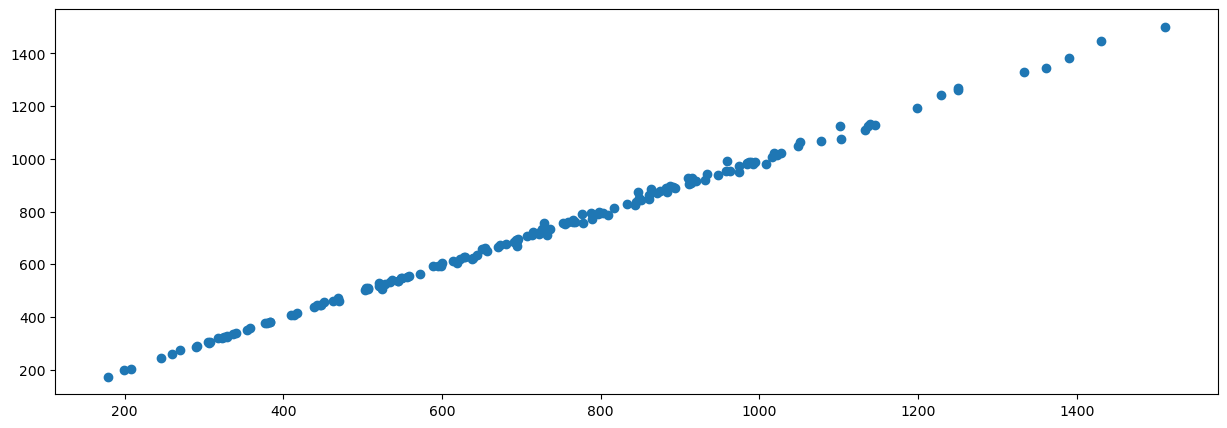

In [22]:
predict=model.predict(Train)
plt.scatter(predict,TrainLabel)

2/2 [==============================] - 0s 19ms/step


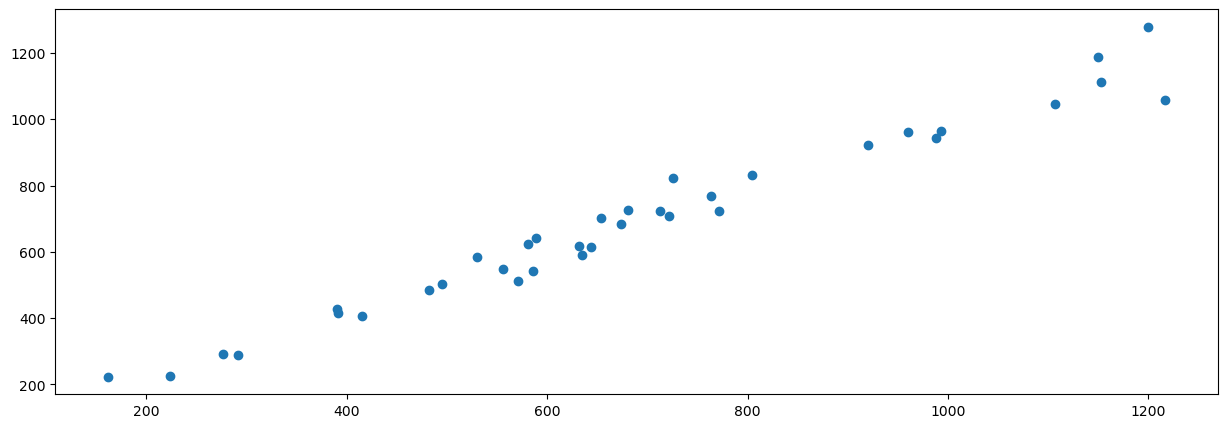

In [23]:
predictt=model.predict(Test)
plt.scatter(predictt,TestLabel)

In [24]:
score(TrainLabel,predict)

(98.1677557170552, 9.907964256952848, 0.9573637, 0.9987286418085713)

In [25]:
score(TestLabel,predictt)

(2250.186119444694, 47.43612673316292, 5.4598293, 0.967806615155841)

In [26]:
weights=[]
for layer in model.layers:
    weights.append(layer.get_weights())

In [27]:
layer1w=weights[1][0]

In [28]:
layer2w=weights[2][0]

In [29]:
layer3w=weights[3][0]

In [30]:
layer1w.shape

(19, 100)

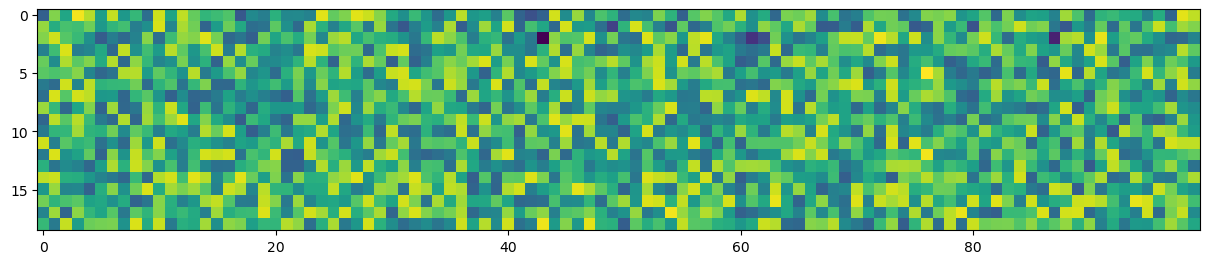

In [31]:
plt.imshow(layer1w)

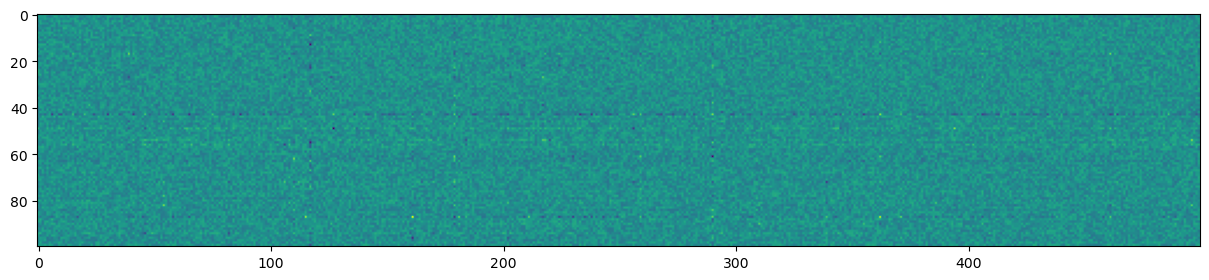

In [32]:
plt.imshow(layer2w)

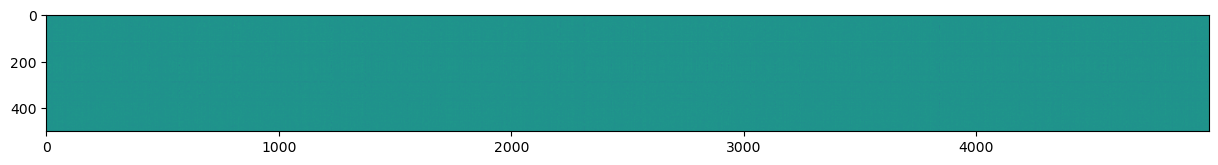

In [33]:
plt.imshow(layer3w)

In [34]:
def guidedRelu(x):
    def grad(dy):
        return tf.cast(dy>0,"float32") * tf.cast(x>0, "float32") * dy
    return tf.nn.relu(x), grad

In [35]:
layer_dict = [layer for layer in model.layers[1:] if hasattr(layer,'activation')]
layer_dict

In [36]:
for layer in layer_dict:
    if layer.activation == tf.keras.activations.relu:
        layer.activation = guidedRelu

In [37]:
from keras import backend as K

inp = model.input                                           # input placeholder
outputs = [layer.output for layer in model.layers]          # all layer outputs
functors = [K.function([inp], [out]) for out in outputs]    # evaluation functions



In [38]:
# layer_outs = [func([inputs]) for func in functors]

In [39]:
# inputs

In [40]:
# layer_outs

In [41]:
grd=[]
gb=[]
for i in range(len(data)):
    idx1=i
#     print(idx1)
    inp = data[idx1:idx1+1]
    with tf.GradientTape() as tape:
        inputs = tf.cast(inp, tf.float32)
        tape.watch(inputs)
        outputs = model(inputs)[0]
        grads = tape.gradient(outputs,inputs)
        #Visualizing the back prop
        gb_viz =grads     
        gb_viz -= np.min(grads)
        gb_viz /= np.max(gb_viz)
        grd.append(grads)
        gb.append(gb_viz)


In [42]:
GB=np.array(grd)

In [43]:
GB=abs(GB)

In [44]:
GBS=np.sum(GB,axis=0)[0]

In [45]:
GBS

array([170499.6  , 127937.836,  88475.664,  70547.77 ,  26355.152,
        90611.14 ,  27363.055,  18017.115,  24908.227,  29020.975,
        26408.396,  23388.719,  32298.906,  27017.203,  28512.486,
        20469.047,  51304.164,  45652.797,  37958.766], dtype=float32)

In [46]:
temp = GBS.argsort()
ranks = np.empty_like(temp)
ranks[temp] = np.arange(len(GBS))
print(GBS)
print(ranks)

[170499.6   127937.836  88475.664  70547.77   26355.152  90611.14
  27363.055  18017.115  24908.227  29020.975  26408.396  23388.719
  32298.906  27017.203  28512.486  20469.047  51304.164  45652.797
  37958.766]
[18 17 15 14  4 16  7  0  3  9  5  2 10  6  8  1 13 12 11]


In [47]:
ranks

array([18, 17, 15, 14,  4, 16,  7,  0,  3,  9,  5,  2, 10,  6,  8,  1, 13,
       12, 11])

In [48]:
newrank=18-ranks

In [49]:
newrank

array([ 0,  1,  3,  4, 14,  2, 11, 18, 15,  9, 13, 16,  8, 12, 10, 17,  5,
        6,  7])

In [50]:
top=10

In [51]:
newidx=[]
for i in range(top):
    newidx.append(idx[np.where(newrank==i)[0][0]])

In [52]:
# newidx=['Womc','SL','Phi','Clay','LL','Gamadmax','Wr','G','Mineral2','Sand']

In [53]:
# newidx = ['Temp', 'RhPer', 'Gamadmax', 'Thickness', 'Phi', 'G', 'SoilType', 'Womc', 'Mineral1', 'Mineral2']

In [54]:
newidx = ['Temp', 'Thickness', 'Clay', 'RhPer', 'LL', 'Mineral2', 'Gamadmax', 'SL', 'PL', 'Wr']

In [55]:
newidx

['Temp',
 'Thickness',
 'Clay',
 'RhPer',
 'LL',
 'Mineral2',
 'Gamadmax',
 'SL',
 'PL',
 'Wr']

In [56]:
# newidx=newidx[:5]

In [57]:
newidx

['Temp',
 'Thickness',
 'Clay',
 'RhPer',
 'LL',
 'Mineral2',
 'Gamadmax',
 'SL',
 'PL',
 'Wr']

In [58]:
newdf1=df[newidx]
data1=newdf1.values[:,:]
scaler = MinMaxScaler(feature_range=(0, 1))
data1 = scaler.fit_transform(data1)
label1=df.values[:,-2]
np.random.seed(seed)
Per=np.random.permutation(len(data1))
data1=data1[Per]
label1=label1[Per]


In [59]:
kmeans = KMeans(5)
kmeans.fit(data1)
identified_clusters = kmeans.fit_predict(data1)
# identified_clusters

In [60]:
df.corr()

Temp         RhPer     Thickness      SoilType  \
Temp       1.000000e+00  2.119998e-17 -1.388025e-15  5.940413e-17   
RhPer      2.119998e-17  1.000000e+00  8.152852e-16 -4.493517e-16   
Thickness -1.388025e-15  8.152852e-16  1.000000e+00  2.794019e-17   
SoilType   5.940413e-17 -4.493517e-16  2.794019e-17  1.000000e+00   
Sand      -4.228564e-17 -3.647224e-16  5.149316e-16  7.267193e-01   
Silt      -1.921503e-17  5.574582e-17  1.304129e-17 -2.225001e-01   
Clay       8.866251e-17  2.641227e-16 -4.289661e-16 -4.030710e-01   
LL        -8.527174e-18  1.815575e-16  3.010741e-16 -2.996956e-01   
PL         1.236158e-17  2.101338e-16  1.043282e-16 -3.495005e-01   
SL        -3.982341e-17  3.752298e-16 -8.792849e-17 -7.121733e-01   
G          1.351570e-16 -1.021049e-16 -3.102835e-15  1.612257e-15   
Womc      -5.729220e-17  3.989274e-16 -2.854294e-16 -8.156257e-01   
Gamadmax  -2.482991e-17 -3.899453e-16  1.713037e-15  7.531045e-01   
Phi        1.081580e-17  2.236408e-16 -3.985298e-16 -3.702485e-01   
AEV       -1.770633e-16 -4.080652e-17  1.282181e-15 -2.868823e-01   
Wr        -4.178911e-18  1.661140e-16  8.626717e-17 -2.262429e-01   
Mineral1  -4.102320e-17  3.469022e-16 -7.880017e-16 -5.000000e-01   
Mineral2   8.229008e-17 -4.489267e-16 -5.924982e-16  8.022575e-01   
Mineral3   3.815247e-17 -8.522769e-17 -1.017262e-16  3.535534e-01   
Er         7.005935e-01 -4.278755e-01  2.981422e-01  2.520313e-01   
Er_Paper   4.603071e-01 -1.651246e-01  5.896976e-01  2.176911e-01   

                   Sand          Silt          Clay            LL  \
Temp      -4.228564e-17 -1.921503e-17  8.866251e-17 -8.527174e-18   
RhPer     -3.647224e-16  5.574582e-17  2.641227e-16  1.815575e-16   
Thickness  5.149316e-16  1.304129e-17 -4.289661e-16  3.010741e-16   
SoilType   7.267193e-01 -2.225001e-01 -4.030710e-01 -2.996956e-01   
Sand       1.000000e+00 -3.401122e-01 -5.239012e-01 -3.180580e-01   
Silt      -3.401122e-01  1.000000e+00 -6.228149e-01 -7.752157e-01   
Clay      -5.239012e-01 -6.228149e-01  1.000000e+00  9.667864e-01   
LL        -3.180580e-01 -7.752157e-01  9.667864e-01  1.000000e+00   
PL        -3.818162e-01 -7.329381e-01  9.815370e-01  9.974217e-01   
SL        -6.537475e-01 -4.227981e-01  9.268572e-01  8.738620e-01   
G          3.538310e-01  6.649783e-01 -8.966978e-01 -8.588034e-01   
Womc      -8.814306e-01 -8.008491e-02  8.058603e-01  6.806759e-01   
Gamadmax   8.468855e-01  1.483900e-01 -8.389891e-01 -7.374542e-01   
Phi       -3.633455e-01 -7.400062e-01  9.725721e-01  9.971628e-01   
AEV        8.253256e-02  3.787591e-01 -4.117357e-01 -3.182865e-01   
Wr        -1.793587e-01 -8.585413e-01  9.268676e-01  9.783430e-01   
Mineral1  -5.099785e-02 -2.927633e-01  3.076068e-01  2.939323e-01   
Mineral2   4.983996e-01  1.930217e-01 -5.894867e-01 -5.098694e-01   
Mineral3   6.265585e-01 -8.694627e-02 -4.425221e-01 -3.988723e-01   
Er         3.029414e-01  9.375655e-02 -3.369598e-01 -3.149548e-01   
Er_Paper   4.048064e-01 -5.688772e-02 -2.852580e-01 -2.300125e-01   

                     PL            SL  ...          Womc      Gamadmax  \
Temp       1.236158e-17 -3.982341e-17  ... -5.729220e-17 -2.482991e-17   
RhPer      2.101338e-16  3.752298e-16  ...  3.989274e-16 -3.899453e-16   
Thickness  1.043282e-16 -8.792849e-17  ... -2.854294e-16  1.713037e-15   
SoilType  -3.495005e-01 -7.121733e-01  ... -8.156257e-01  7.531045e-01   
Sand      -3.818162e-01 -6.537475e-01  ... -8.814306e-01  8.468855e-01   
Silt      -7.329381e-01 -4.227981e-01  ... -8.008491e-02  1.483900e-01   
Clay       9.815370e-01  9.268572e-01  ...  8.058603e-01 -8.389891e-01   
LL         9.974217e-01  8.738620e-01  ...  6.806759e-01 -7.374542e-01   
PL         1.000000e+00  9.021744e-01  ...  7.282417e-01 -7.779352e-01   
SL         9.021744e-01  1.000000e+00  ...  9.303097e-01 -9.321249e-01   
G         -8.633293e-01 -6.734496e-01  ... -5.463155e-01  5.925856e-01   
Womc       7.282417e-01  9.303097e-01  ...  1.000000e+00 -9.869419e-01   
Gamadmax  -7.779352

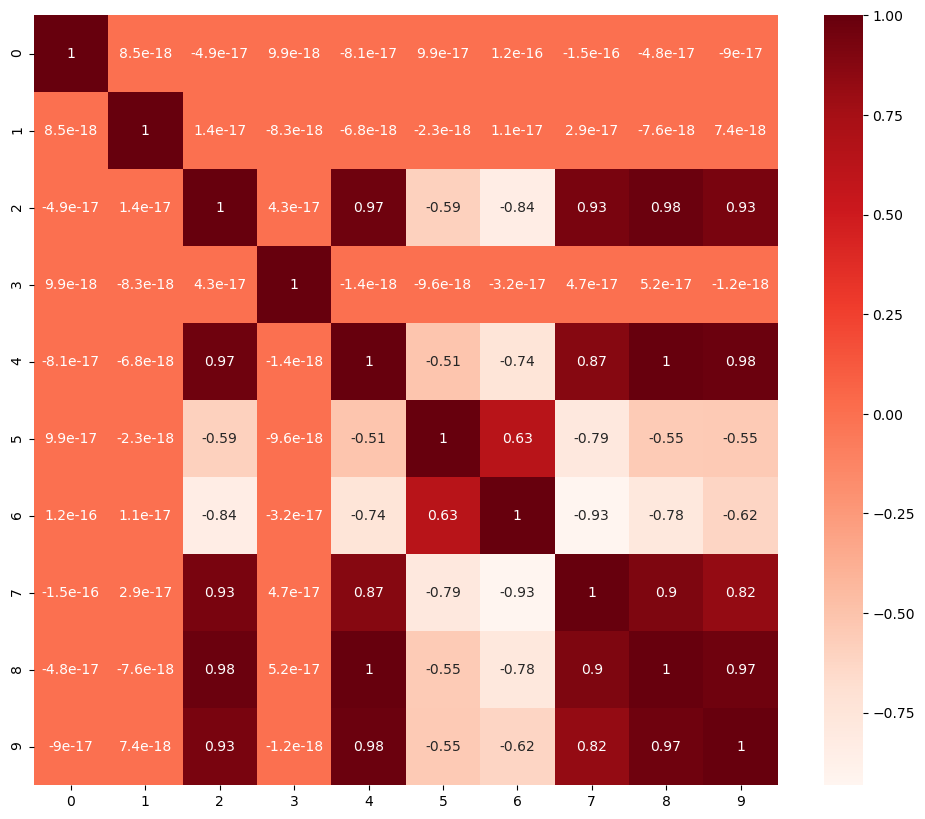

In [61]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
ff1 = pd.DataFrame(data1)
cor = ff1.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [62]:
count=[i for i in range(5)]
cls = [[1,0,0,0,0],[0,1,0,0,0],[0,0,1,0,0],[0,0,0,1,0],[0,0,0,0,1]]
Train1,Test1=[],[]
TrainLabel1, TestLabel1=[],[]
Trainclass1, Testclass1=[],[]
for i in range(len(data1)):
    x=identified_clusters[i]
    if x==0 and count[0] < 16:
        count[0]+=1
        Test1.append(data1[i])
        TestLabel1.append(label1[i])
        Testclass1.append(cls[x])
    elif x==1 and count[1] < 16:
        count[1]+=1
        Test1.append(data1[i])
        TestLabel1.append(label1[i])
        Testclass1.append(cls[x])
    elif x==2 and count[2] < 16:
        count[2]+=1
        Test1.append(data1[i])
        TestLabel1.append(label1[i])
        Testclass1.append(cls[x])
    elif x==3 and count[3] < 17:
        count[3]+=1
        Test1.append(data1[i])
        TestLabel1.append(label1[i])
        Testclass1.append(cls[x])
    elif x==4 and count[4] < 17:
        count[4]+=1
        Test1.append(data1[i])
        TestLabel1.append(label1[i])
        Testclass1.append(cls[x])
    else:
        Train1.append(data1[i])
        TrainLabel1.append(label1[i])
        Trainclass1.append(cls[x])
        
Train1=np.array(Train1)
Test1=np.array(Test1)
TrainLabel1=np.array(TrainLabel1)
TestLabel1=np.array(TestLabel1)
Trainclass1=np.array(Trainclass1)
Testclass1=np.array(Testclass1)

In [63]:
top=10

In [64]:
input_lyr1 = Input(shape=(top,))
initializer1 = tf.keras.initializers.HeUniform()
layer11 = Dense(100, activation='relu',kernel_initializer=initializer1)(input_lyr1)
layer21 = Dense(500, activation='relu',kernel_initializer=initializer1)(layer11)
layer31 = Dense(5000, activation='relu',kernel_initializer=initializer1)(layer21)
# d1=Dropout(0.01)(layer31)
output_layer1 = Dense(1)(layer31)
model1 = Model(input_lyr1, output_layer1)

tf.random.set_seed(seed)
np.random.seed(seed)
model1.compile(optimizer='adam', loss='mse')
model1.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense_4 (Dense)             (None, 100)               1100      
                                                                 
 dense_5 (Dense)             (None, 500)               50500     
                                                                 
 dense_6 (Dense)             (None, 5000)              2505000   
                                                                 
 dense_7 (Dense)             (None, 1)                 5001      
                                                                 
Total params: 2,561,601
Trainable params: 2,561,601
Non-trainable params: 0
_________________________________________________________________


In [65]:
callback=keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=1.0e-4, patience=50, verbose=0, mode="auto", baseline=None, restore_best_weights=True)
history = model1.fit(Train1, TrainLabel1, epochs=50000, batch_size=512,  validation_data=(Test1, TestLabel1), callbacks=[callback], shuffle=True)


Epoch 1/50000
1/1 [==============================] - 0s 344ms/step - loss: 574590.3125 - val_loss: 530890.3125
Epoch 2/50000
1/1 [==============================] - 0s 38ms/step - loss: 560493.2500 - val_loss: 516451.7812
Epoch 3/50000
1/1 [==============================] - 0s 39ms/step - loss: 546017.1250 - val_loss: 500930.9062
Epoch 4/50000
1/1 [==============================] - 0s 37ms/step - loss: 530452.8750 - val_loss: 483862.5000
Epoch 5/50000
1/1 [==============================] - 0s 36ms/step - loss: 513329.9375 - val_loss: 464928.5625
Epoch 6/50000
1/1 [==============================] - 0s 39ms/step - loss: 494318.7812 - val_loss: 443895.1875
Epoch 7/50000
1/1 [==============================] - 0s 36ms/step - loss: 473178.7812 - val_loss: 420594.5000
Epoch 8/50000
1/1 [==============================] - 0s 36ms/step - loss: 449748.5625 - val_loss: 394970.5000
Epoch 9/50000
1/1 [==============================] - 0s 38ms/step - loss: 423938.9688 - val_loss: 367020.1562
Epoch 10/

Epoch 76/50000
1/1 [==============================] - 0s 33ms/step - loss: 8264.4756 - val_loss: 7885.3125
Epoch 77/50000
1/1 [==============================] - 0s 33ms/step - loss: 8012.4888 - val_loss: 7690.7319
Epoch 78/50000
1/1 [==============================] - 0s 34ms/step - loss: 7812.1929 - val_loss: 7530.2710
Epoch 79/50000
1/1 [==============================] - 0s 34ms/step - loss: 7640.0884 - val_loss: 7384.2910
Epoch 80/50000
1/1 [==============================] - 0s 33ms/step - loss: 7473.3525 - val_loss: 7239.4375
Epoch 81/50000
1/1 [==============================] - 0s 33ms/step - loss: 7298.5400 - val_loss: 7096.7568
Epoch 82/50000
1/1 [==============================] - 0s 33ms/step - loss: 7117.1631 - val_loss: 6963.6724
Epoch 83/50000
1/1 [==============================] - 0s 34ms/step - loss: 6940.5303 - val_loss: 6851.7017
Epoch 84/50000
1/1 [==============================] - 0s 35ms/step - loss: 6783.5811 - val_loss: 6768.9077
Epoch 85/50000
1/1 [=================

1/1 [==============================] - 0s 33ms/step - loss: 3245.9861 - val_loss: 3102.9807
Epoch 153/50000
1/1 [==============================] - 0s 35ms/step - loss: 3211.0583 - val_loss: 3068.5447
Epoch 154/50000
1/1 [==============================] - 0s 33ms/step - loss: 3176.5178 - val_loss: 3033.4146
Epoch 155/50000
1/1 [==============================] - 0s 34ms/step - loss: 3142.3176 - val_loss: 2998.4553
Epoch 156/50000
1/1 [==============================] - 0s 34ms/step - loss: 3108.3853 - val_loss: 2963.9250
Epoch 157/50000
1/1 [==============================] - 0s 33ms/step - loss: 3074.6350 - val_loss: 2930.1223
Epoch 158/50000
1/1 [==============================] - 0s 34ms/step - loss: 3040.9734 - val_loss: 2897.4045
Epoch 159/50000
1/1 [==============================] - 0s 33ms/step - loss: 3007.5286 - val_loss: 2864.9995
Epoch 160/50000
1/1 [==============================] - 0s 34ms/step - loss: 2974.3550 - val_loss: 2832.9785
Epoch 161/50000
1/1 [=======================

1/1 [==============================] - 0s 32ms/step - loss: 1546.5822 - val_loss: 1356.9696
Epoch 229/50000
1/1 [==============================] - 0s 32ms/step - loss: 1534.1327 - val_loss: 1349.2274
Epoch 230/50000
1/1 [==============================] - 0s 32ms/step - loss: 1521.8639 - val_loss: 1339.9027
Epoch 231/50000
1/1 [==============================] - 0s 30ms/step - loss: 1509.7094 - val_loss: 1329.6665
Epoch 232/50000
1/1 [==============================] - 0s 32ms/step - loss: 1497.4438 - val_loss: 1321.0728
Epoch 233/50000
1/1 [==============================] - 0s 29ms/step - loss: 1485.2023 - val_loss: 1312.6293
Epoch 234/50000
1/1 [==============================] - 0s 32ms/step - loss: 1473.1318 - val_loss: 1303.0001
Epoch 235/50000
1/1 [==============================] - 0s 30ms/step - loss: 1460.6780 - val_loss: 1292.6290
Epoch 236/50000
1/1 [==============================] - 0s 32ms/step - loss: 1448.2744 - val_loss: 1283.1530
Epoch 237/50000
1/1 [=======================

1/1 [==============================] - 0s 32ms/step - loss: 893.9991 - val_loss: 982.0428
Epoch 305/50000
1/1 [==============================] - 0s 30ms/step - loss: 887.6301 - val_loss: 981.4716
Epoch 306/50000
1/1 [==============================] - 0s 28ms/step - loss: 881.2282 - val_loss: 978.8876
Epoch 307/50000
1/1 [==============================] - 0s 33ms/step - loss: 875.1379 - val_loss: 976.2029
Epoch 308/50000
1/1 [==============================] - 0s 33ms/step - loss: 868.9471 - val_loss: 970.4350
Epoch 309/50000
1/1 [==============================] - 0s 32ms/step - loss: 862.9105 - val_loss: 967.0950
Epoch 310/50000
1/1 [==============================] - 0s 32ms/step - loss: 856.9347 - val_loss: 966.5635
Epoch 311/50000
1/1 [==============================] - 0s 31ms/step - loss: 851.0276 - val_loss: 963.6202
Epoch 312/50000
1/1 [==============================] - 0s 26ms/step - loss: 845.1746 - val_loss: 967.3924
Epoch 313/50000
1/1 [==============================] - 0s 35ms

1/1 [==============================] - 0s 28ms/step - loss: 540.4025 - val_loss: 861.2088
Epoch 382/50000
1/1 [==============================] - 0s 26ms/step - loss: 537.5135 - val_loss: 864.2090
Epoch 383/50000
1/1 [==============================] - 0s 23ms/step - loss: 534.5672 - val_loss: 862.4540
Epoch 384/50000
1/1 [==============================] - 0s 27ms/step - loss: 531.7208 - val_loss: 861.6217
Epoch 385/50000
1/1 [==============================] - 0s 26ms/step - loss: 529.0300 - val_loss: 861.6520
Epoch 386/50000
1/1 [==============================] - 0s 31ms/step - loss: 526.2870 - val_loss: 853.7596
Epoch 387/50000
1/1 [==============================] - 0s 26ms/step - loss: 523.6893 - val_loss: 856.0618
Epoch 388/50000
1/1 [==============================] - 0s 28ms/step - loss: 520.9545 - val_loss: 852.3852
Epoch 389/50000
1/1 [==============================] - 0s 26ms/step - loss: 518.1229 - val_loss: 853.5033
Epoch 390/50000
1/1 [==============================] - 0s 23ms

1/1 [==============================] - 0s 32ms/step - loss: 385.6921 - val_loss: 812.1238
Epoch 459/50000
1/1 [==============================] - 0s 28ms/step - loss: 384.1990 - val_loss: 815.8494
Epoch 460/50000
1/1 [==============================] - 0s 36ms/step - loss: 382.5737 - val_loss: 811.9964
Epoch 461/50000
1/1 [==============================] - 0s 34ms/step - loss: 381.0250 - val_loss: 811.6918
Epoch 462/50000
1/1 [==============================] - 0s 22ms/step - loss: 379.5287 - val_loss: 811.9989
Epoch 463/50000
1/1 [==============================] - 0s 34ms/step - loss: 378.0877 - val_loss: 809.6615
Epoch 464/50000
1/1 [==============================] - 0s 28ms/step - loss: 376.6857 - val_loss: 812.4302
Epoch 465/50000
1/1 [==============================] - 0s 28ms/step - loss: 375.2543 - val_loss: 808.5246
Epoch 466/50000
1/1 [==============================] - 0s 27ms/step - loss: 373.8075 - val_loss: 810.9500
Epoch 467/50000
1/1 [==============================] - 0s 28ms

1/1 [==============================] - 0s 23ms/step - loss: 292.3965 - val_loss: 793.6638
Epoch 536/50000
1/1 [==============================] - 0s 27ms/step - loss: 291.4972 - val_loss: 798.7075
Epoch 537/50000
1/1 [==============================] - 0s 26ms/step - loss: 290.5116 - val_loss: 793.7256
Epoch 538/50000
1/1 [==============================] - 0s 25ms/step - loss: 289.4822 - val_loss: 797.1443
Epoch 539/50000
1/1 [==============================] - 0s 28ms/step - loss: 288.3753 - val_loss: 794.4826
Epoch 540/50000
1/1 [==============================] - 0s 22ms/step - loss: 287.3280 - val_loss: 795.4788
Epoch 541/50000
1/1 [==============================] - 0s 26ms/step - loss: 286.3121 - val_loss: 793.6675
Epoch 542/50000
1/1 [==============================] - 0s 28ms/step - loss: 285.2716 - val_loss: 792.1123
Epoch 543/50000
1/1 [==============================] - 0s 28ms/step - loss: 284.3144 - val_loss: 793.6365
Epoch 544/50000
1/1 [==============================] - 0s 24ms

1/1 [==============================] - 0s 27ms/step - loss: 223.0136 - val_loss: 786.5394
Epoch 613/50000
1/1 [==============================] - 0s 24ms/step - loss: 222.1459 - val_loss: 789.4910
Epoch 614/50000
1/1 [==============================] - 0s 27ms/step - loss: 221.3603 - val_loss: 787.1746
Epoch 615/50000
1/1 [==============================] - 0s 24ms/step - loss: 220.5834 - val_loss: 789.9817
Epoch 616/50000
1/1 [==============================] - 0s 28ms/step - loss: 219.8191 - val_loss: 787.6595
Epoch 617/50000
1/1 [==============================] - 0s 25ms/step - loss: 219.0105 - val_loss: 789.0203
Epoch 618/50000
1/1 [==============================] - 0s 29ms/step - loss: 218.3202 - val_loss: 787.5814
Epoch 619/50000
1/1 [==============================] - 0s 25ms/step - loss: 217.4952 - val_loss: 789.2940
Epoch 620/50000
1/1 [==============================] - 0s 28ms/step - loss: 216.7791 - val_loss: 788.5027
Epoch 621/50000
1/1 [==============================] - 0s 32ms

In [66]:
top

10

In [67]:
Train1.shape

(288, 10)

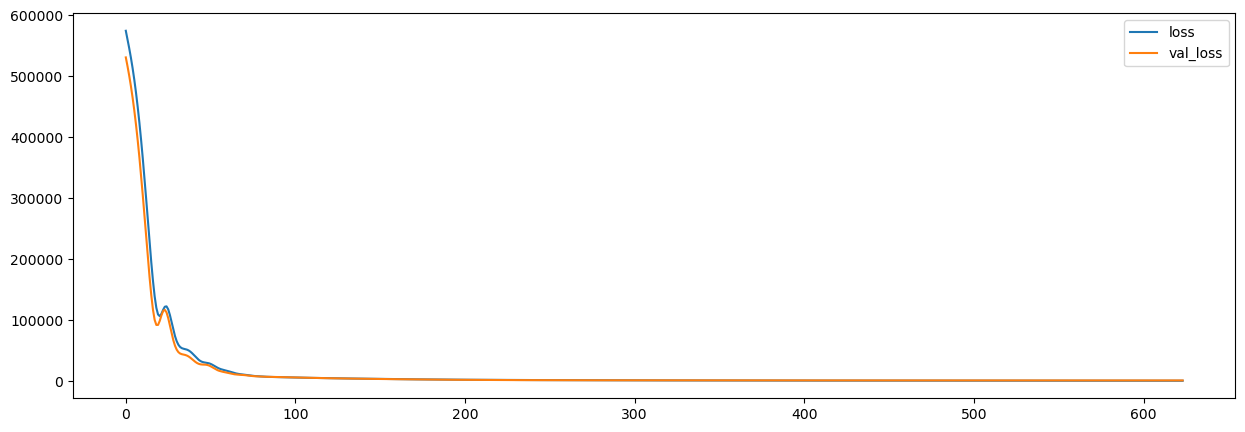

In [68]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()

9/9 [==============================] - 0s 2ms/step


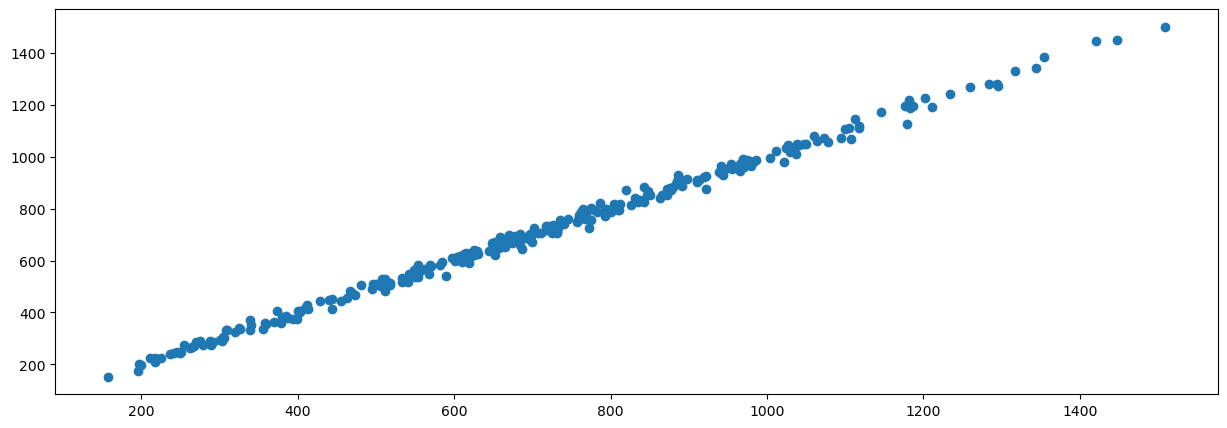

In [69]:
predict1=model1.predict(Train1)
plt.scatter(predict1,TrainLabel1)

3/3 [==============================] - 0s 11ms/step


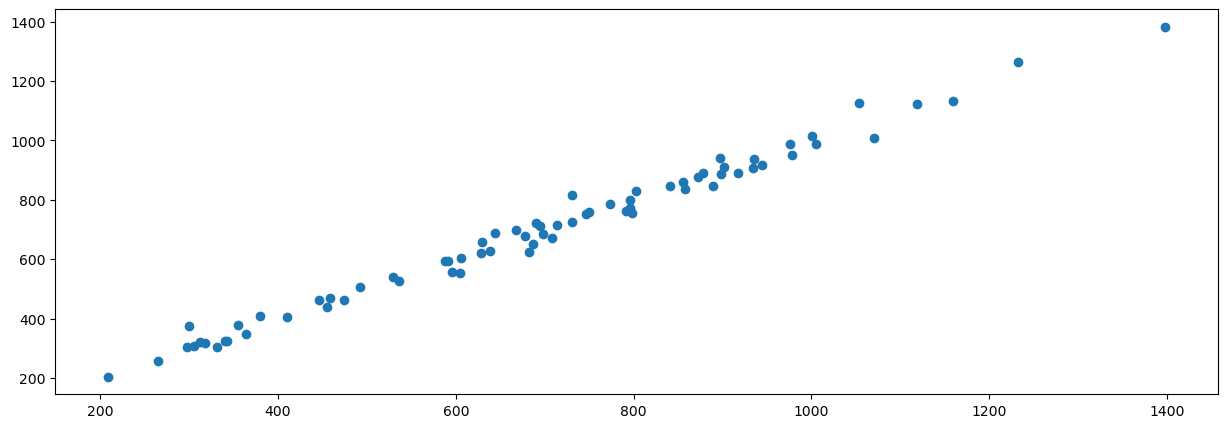

In [70]:
predict2=model1.predict(Test1)
plt.scatter(predict2,TestLabel1)

In [71]:
score(TrainLabel1,predict1)

(254.56590816003802, 15.955121690543072, 1.954022, 0.9967292474596432)

In [72]:
score(TestLabel1,predict2)

(782.9644832896819, 27.981502520230787, 3.2715197, 0.9880225027436833)

In [73]:
11.25, 29.34

(11.25, 29.34)

[0]
CPU times: user 1e+03 ns, sys: 3 µs, total: 4 µs
Wall time: 4.05 µs


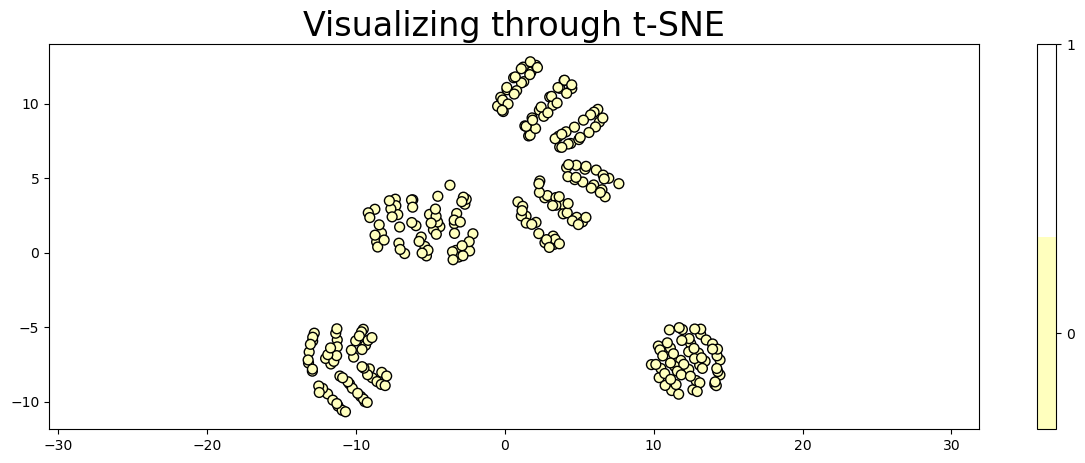

In [74]:
x_subset = Train1[:]
y_subset = [np.argmax(x) for x in TrainLabel1]

print(np.unique(y_subset))
x_subset=x_subset.reshape((x_subset.shape[0],x_subset.shape[1]))
%time
tsne = TSNE(random_state = 42, n_components=2,verbose=0, perplexity=40, n_iter=300).fit_transform(x_subset)
plt.scatter(tsne[:, 0], tsne[:, 1], s= 50, c=y_subset, cmap='Spectral',edgecolors='black')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(2)-0.5).set_ticks(np.arange(2))
plt.title('Visualizing through t-SNE', fontsize=24);

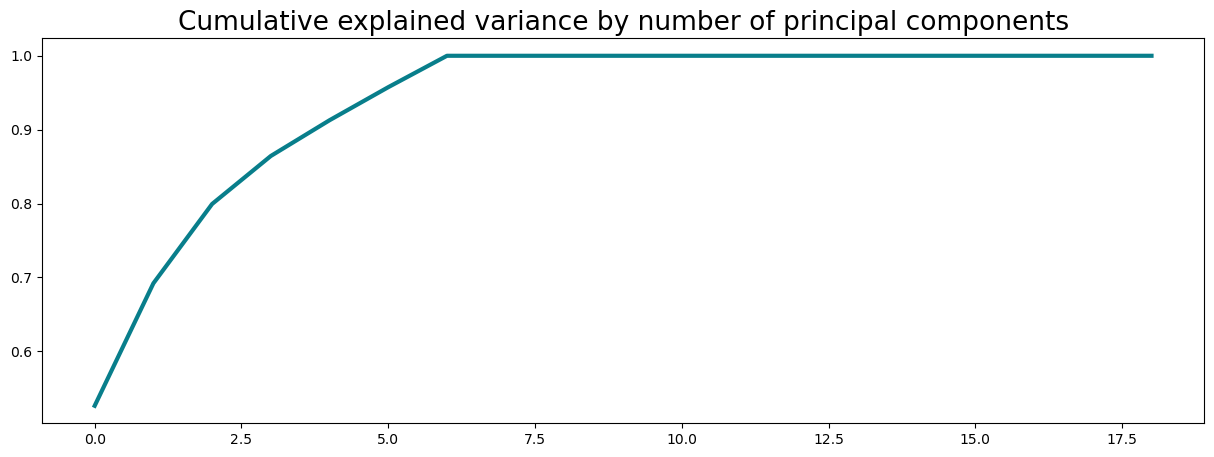

In [75]:
from sklearn.decomposition import PCA

pca = PCA().fit(Train)

plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3, color='#087E8B')
plt.title('Cumulative explained variance by number of principal components', size=19)
plt.show()

In [76]:
loadings = pd.DataFrame(
    data=pca.components_.T * np.sqrt(pca.explained_variance_), 
    columns=[f'PC{i}' for i in range(1, len(df.columns[:-2]) + 1)],
    index=df.columns[:-2]
)
loadings

PC1       PC2       PC3       PC4       PC5       PC6  \
Temp       0.006467  0.030085 -0.028303 -0.391195 -0.122189 -0.059403   
RhPer      0.003028 -0.004637 -0.026358 -0.046220  0.003548  0.243358   
Thickness  0.014614 -0.037737  0.039867 -0.145817  0.249477  0.149819   
SoilType  -0.202061 -0.247630 -0.139158 -0.010176  0.043276 -0.039969   
Sand      -0.227432 -0.267329  0.012920  0.015053 -0.100614  0.072211   
Silt      -0.170310  0.268794  0.024717 -0.009888  0.065360 -0.043136   
Clay       0.369298 -0.060952 -0.036857 -0.002107  0.014854 -0.014644   
LL         0.366776 -0.125159 -0.056426  0.008052 -0.036029  0.025644   
PL         0.370747 -0.102277 -0.047372  0.006072 -0.025899  0.017827   
SL         0.378282  0.048151  0.038255  0.005270 -0.021007  0.016588   
G         -0.313604  0.160112  0.098646  0.017027 -0.084538  0.073910   
Womc       0.398298  0.203492  0.017614 -0.001440  0.028310 -0.016846   
Gamadmax  -0.360356 -0.162609  0.040283 -0.003145 -0.011124  0.001770   
Phi        0.378238 -0.103249 -0.040776  0.008737 -0.039433  0.028708   
AEV       -0.108708  0.185919 -0.066086  0.038603 -0.156285  0.140797   
Wr         0.325653 -0.171407 -0.003728  0.005717 -0.037774  0.023018   
Mineral1   0.139838 -0.054954  0.313135 -0.002719 -0.037419  0.014974   
Mineral2  -0.274817 -0.067994 -0.264041  0.002532  0.017751 -0.005554   
Mineral3  -0.186123 -0.204590  0.281283 -0.015854  0.011032 -0.029190   

                PC7           PC8           PC9          PC10          PC11  \
Temp      -0.008321  3.103057e-32 -7.065821e-33  2.166457e-33  4.275530e-33   
RhPer     -0.243449  9.093568e-32 -1.314767e-32  5.576548e-32 -7.969153e-33   
Thickness  0.162119 -8.240446e-32 -1.291318e-32 -1.983232e-32  6.102156e-33   
SoilType  -0.029177  2.986306e-17 -5.564099e-18  9.546777e-17 -1.814236e-17   
Sand       0.065960 -1.269222e-16 -3.394811e-17  5.357246e-17  1.047729e-17   
Silt      -0.041455  1.796357e-16 -1.522156e-16  1.221856e-17 -9.872530e-18   
Clay      -0.011209  2.128588e-16 -2.319714e-17  3.575415e-17 -2.322636e-17   
LL         0.026297 -1.549390e-17  1.210327e-16 -2.569638e-18 -2.491650e-17   
PL         0.018752 -3.175738e-17  1.520781e-17 -6.241782e-17  6.985948e-18   
SL         0.013339 -2.622690e-16 -1.208272e-17 -1.214297e-17 -6.956806e-18   
G          0.061685 -6.898751e-16  4.166591e-17  3.646219e-17 -1.453158e-17   
Womc      -0.016810 -6.617136e-16 -2.080788e-17  3.291903e-17 -2.766573e-17   
Gamadmax   0.000635 -5.245516e-16 -5.415414e-17 -6.891228e-17  5.828652e-18   
Phi        0.028313 -1.114464e-16 -9.388211e-17 -1.398686e-17  2.301896e-18   
AEV        0.128766  5.382085e-16 -3.846757e-17 -9.975299e-18 -2.471984e-17   
Wr         0.021996 -1.260686e-16 -1.534040e-16  1.195931e-17  1.857213e-18   
Mineral1   0.001067  1.122671e-16 -1.217121e-17  3.087617e-17  3.301801e-17   
Mineral2   0.006013 -2.332601e-16 -3.795514e-17 -3.929366e-17 -1.142462e-17   
Mineral3  -0.036865  1.831029e-16 -1.468649e-17 -4.144505e-17 -6.144494e-17   

                   PC12          PC13          PC14          PC15  \
Temp      -4.384910e-33  4.982943e-33  1.680800e-33 -3.025874e-34   
RhPer      9.833570e-33 -4.686677e-33  5.435277e-33  7.532741e-33   
Thickness -4.437182e-33 -2.122043e-33 -1.384307e-33  1.470791e-33   
SoilType   1.309280e-17  2.074378e-17  2.854198e-18 -6.680046e-18   
Sand      -2.416978e-18 -1.859241e-17 -1.377021e-18  1.317962e-17   
Silt       1.066876e-17  9.957454e-18  1.324445e-17  7.137491e-18   
Clay       1.080279e-17 -2.131847e-17  2.080410e-17  8.750529e-18   
LL         2.118604e-17  1.160150e-17  2.305378e-18 -8.067660e-19   
PL        -4.794892e-18  4.165280e-19  1.310596e-17  5.192277e-18   
SL         3.715694e-18  2.213064e-17 -2.650998e-18  1.351042e-18   
G         -2.101298e-17  9.850799e-18  1.504388e-17  1.528861e-18   
Womc       1.485836e-17 -2.009203e-17 -1.139497e-17 -5.567802e-18   
Gamadmax   4.305222e-17  2.513930e-18  2.918351e-18  6.066537e-18   
Phi     

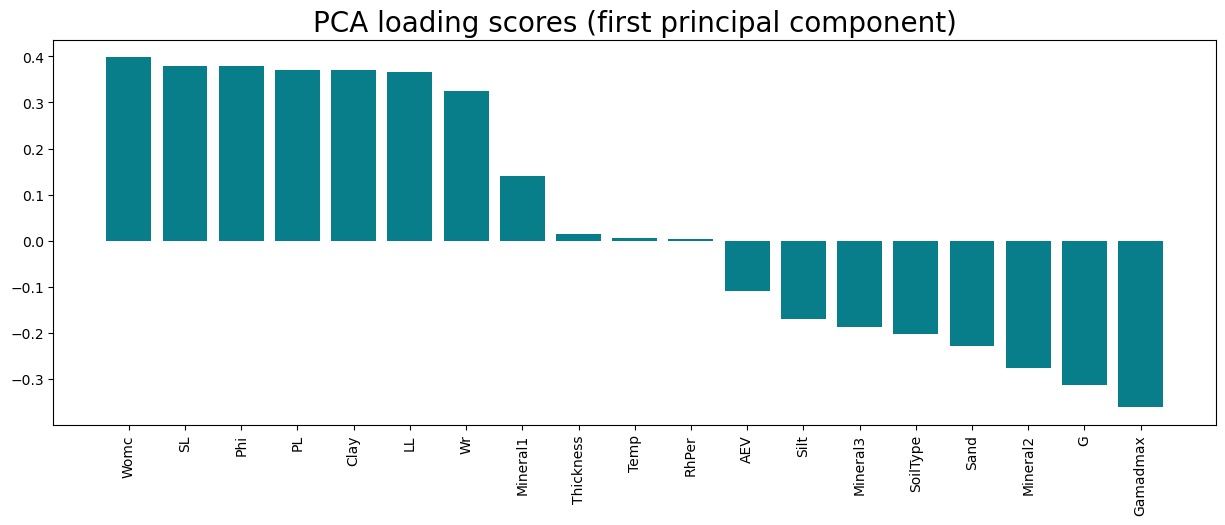

In [77]:
pc1_loadings = loadings.sort_values(by='PC1', ascending=False)[['PC1']]
pc1_loadings = pc1_loadings.reset_index()
pc1_loadings.columns = ['Attribute', 'CorrelationWithPC1']

plt.bar(x=pc1_loadings['Attribute'], height=pc1_loadings['CorrelationWithPC1'], color='#087E8B')
plt.title('PCA loading scores (first principal component)', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [78]:
idx=['Temp','RhPer','Thickness','SoilType','Sand','Silt','Clay','LL','PL','SL','G','Womc','Gamadmax','Phi','AEV','Wr','Mineral1','Mineral2','Mineral3','Er','Er_Paper']

In [79]:
idx=['Womc','SL','Phi','Clay','LL','Gamadmax','Wr','G','Mineral2','Sand']

In [80]:
from xgboost import XGBClassifier
X_train_scaled=Train
y_train=TrainLabel
model = XGBClassifier()
model.fit(X_train_scaled, y_train)
importances = pd.DataFrame(data={
    'Attribute': df.columns[:-2],
    'Importance': model.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)

[14:59:04] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


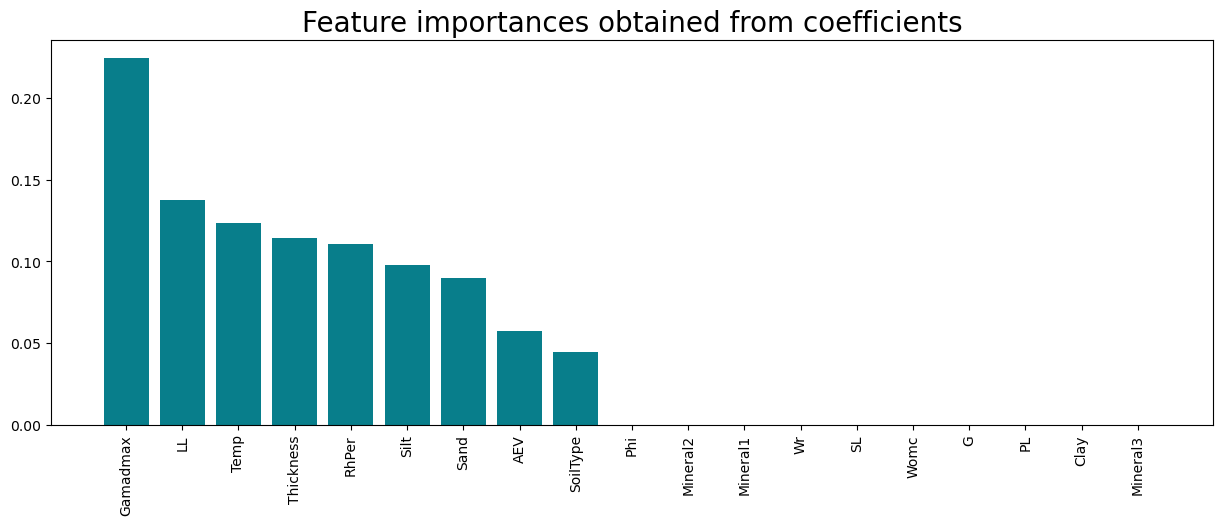

In [81]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [82]:
newidx=['LL','Gamadmax','Sand', 'Temp', 'Thickness', 'RhPer', 'SoilType', 'Silt', 'AEV']

In [83]:
for i in range(10):
    print(round(predict1[i][0]),round(TrainLabel1[i]))

566 562
1107 1067
512 527
292 287
429 445
1179 1127
810 794
1421 1446
249 243
441 446


In [84]:
input_lyr12 = Input(shape=(top,))
initializer12 = tf.keras.initializers.HeUniform()
layer12 = Dense(100,  activation='relu',kernel_initializer=initializer12)(input_lyr12)
layer22 = Dense(500,  activation='relu',kernel_initializer=initializer12)(layer12)
layer32 = Dense(5000, activation='relu',kernel_initializer=initializer12)(layer22)
# d1=Dropout(0.01)(layer31)
output_layer12 = Dense(1,name='output')(layer32)
output_layer122 = Dense(5, activation='softmax')(layer32)
model2 = Model(inputs=input_lyr12, outputs=[output_layer12,output_layer122])

tf.random.set_seed(seed)
np.random.seed(seed)
model2.compile(optimizer='adam', loss=['mse','categorical_crossentropy'])
model2.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 10)]         0           []                               
                                                                                                  
 dense_8 (Dense)                (None, 100)          1100        ['input_3[0][0]']                
                                                                                                  
 dense_9 (Dense)                (None, 500)          50500       ['dense_8[0][0]']                
                                                                                                  
 dense_10 (Dense)               (None, 5000)         2505000     ['dense_9[0][0]']                
                                                                                            

In [85]:
Train.shape

(162, 19)

In [86]:
TrainLabel1.shape

(288,)

In [87]:
callback=keras.callbacks.EarlyStopping(monitor="val_output_loss", min_delta=1.0e-4, patience=50, verbose=0, mode="auto", baseline=None, restore_best_weights=True)
history = model2.fit(Train1, [TrainLabel1,Trainclass1], epochs=50000, batch_size=512,  validation_data=(Test1, [TestLabel1,Testclass1]), callbacks=[callback], shuffle=True)


Epoch 1/50000
1/1 [==============================] - 0s 467ms/step - loss: 577332.8125 - output_loss: 577330.8125 - dense_11_loss: 1.9379 - val_loss: 536794.6875 - val_output_loss: 536793.3125 - val_dense_11_loss: 1.3967
Epoch 2/50000
1/1 [==============================] - 0s 49ms/step - loss: 566460.9375 - output_loss: 566459.5625 - dense_11_loss: 1.4006 - val_loss: 525813.8750 - val_output_loss: 525812.5625 - val_dense_11_loss: 1.3006
Epoch 3/50000
1/1 [==============================] - 0s 48ms/step - loss: 555396.9375 - output_loss: 555395.6250 - dense_11_loss: 1.3232 - val_loss: 514057.1562 - val_output_loss: 514056.0625 - val_dense_11_loss: 1.1041
Epoch 4/50000
1/1 [==============================] - 0s 47ms/step - loss: 543538.1250 - output_loss: 543537.0000 - dense_11_loss: 1.1263 - val_loss: 501065.3438 - val_output_loss: 501064.5000 - val_dense_11_loss: 0.8198
Epoch 5/50000
1/1 [==============================] - 0s 47ms/step - loss: 530446.0625 - output_loss: 530445.2500 - dens

1/1 [==============================] - 0s 42ms/step - loss: 38514.8164 - output_loss: 38513.8008 - dense_11_loss: 1.0165 - val_loss: 28588.6035 - val_output_loss: 28588.3223 - val_dense_11_loss: 0.2815
Epoch 39/50000
1/1 [==============================] - 0s 41ms/step - loss: 37458.9336 - output_loss: 37458.6875 - dense_11_loss: 0.2455 - val_loss: 27341.4434 - val_output_loss: 27340.5605 - val_dense_11_loss: 0.8823
Epoch 40/50000
1/1 [==============================] - 0s 42ms/step - loss: 35934.7305 - output_loss: 35933.8164 - dense_11_loss: 0.9150 - val_loss: 25705.7520 - val_output_loss: 25705.0723 - val_dense_11_loss: 0.6789
Epoch 41/50000
1/1 [==============================] - 0s 44ms/step - loss: 33924.6055 - output_loss: 33923.9258 - dense_11_loss: 0.6805 - val_loss: 23785.6836 - val_output_loss: 23785.4023 - val_dense_11_loss: 0.2809
Epoch 42/50000
1/1 [==============================] - 0s 43ms/step - loss: 31548.3477 - output_loss: 31548.1191 - dense_11_loss: 0.2294 - val_loss:

1/1 [==============================] - 0s 41ms/step - loss: 6339.4937 - output_loss: 6339.3726 - dense_11_loss: 0.1211 - val_loss: 5888.5630 - val_output_loss: 5888.4136 - val_dense_11_loss: 0.1494
Epoch 77/50000
1/1 [==============================] - 0s 42ms/step - loss: 6131.1216 - output_loss: 6130.9971 - dense_11_loss: 0.1245 - val_loss: 5688.5967 - val_output_loss: 5688.4473 - val_dense_11_loss: 0.1492
Epoch 78/50000
1/1 [==============================] - 0s 42ms/step - loss: 5972.1108 - output_loss: 5971.9897 - dense_11_loss: 0.1210 - val_loss: 5539.3525 - val_output_loss: 5539.1938 - val_dense_11_loss: 0.1587
Epoch 79/50000
1/1 [==============================] - 0s 41ms/step - loss: 5855.0034 - output_loss: 5854.8735 - dense_11_loss: 0.1297 - val_loss: 5433.8057 - val_output_loss: 5433.6753 - val_dense_11_loss: 0.1305
Epoch 80/50000
1/1 [==============================] - 0s 40ms/step - loss: 5761.5396 - output_loss: 5761.4321 - dense_11_loss: 0.1072 - val_loss: 5358.0122 - val_o

1/1 [==============================] - 0s 41ms/step - loss: 3703.8242 - output_loss: 3703.7383 - dense_11_loss: 0.0859 - val_loss: 3647.5396 - val_output_loss: 3647.4292 - val_dense_11_loss: 0.1104
Epoch 115/50000
1/1 [==============================] - 0s 42ms/step - loss: 3670.4001 - output_loss: 3670.3152 - dense_11_loss: 0.0852 - val_loss: 3605.9724 - val_output_loss: 3605.8630 - val_dense_11_loss: 0.1093
Epoch 116/50000
1/1 [==============================] - 0s 42ms/step - loss: 3636.9309 - output_loss: 3636.8462 - dense_11_loss: 0.0848 - val_loss: 3568.3481 - val_output_loss: 3568.2402 - val_dense_11_loss: 0.1079
Epoch 117/50000
1/1 [==============================] - 0s 41ms/step - loss: 3603.2495 - output_loss: 3603.1655 - dense_11_loss: 0.0840 - val_loss: 3534.0979 - val_output_loss: 3533.9905 - val_dense_11_loss: 0.1073
Epoch 118/50000
1/1 [==============================] - 0s 43ms/step - loss: 3569.8911 - output_loss: 3569.8074 - dense_11_loss: 0.0837 - val_loss: 3502.1057 - v

1/1 [==============================] - 0s 41ms/step - loss: 2733.7363 - output_loss: 2733.6672 - dense_11_loss: 0.0692 - val_loss: 2532.5273 - val_output_loss: 2532.4373 - val_dense_11_loss: 0.0902
Epoch 153/50000
1/1 [==============================] - 0s 40ms/step - loss: 2715.2954 - output_loss: 2715.2266 - dense_11_loss: 0.0689 - val_loss: 2514.6628 - val_output_loss: 2514.5730 - val_dense_11_loss: 0.0899
Epoch 154/50000
1/1 [==============================] - 0s 43ms/step - loss: 2697.0754 - output_loss: 2697.0071 - dense_11_loss: 0.0686 - val_loss: 2496.4932 - val_output_loss: 2496.4036 - val_dense_11_loss: 0.0897
Epoch 155/50000
1/1 [==============================] - 0s 41ms/step - loss: 2679.0833 - output_loss: 2679.0149 - dense_11_loss: 0.0683 - val_loss: 2477.8699 - val_output_loss: 2477.7805 - val_dense_11_loss: 0.0894
Epoch 156/50000
1/1 [==============================] - 0s 42ms/step - loss: 2661.3601 - output_loss: 2661.2922 - dense_11_loss: 0.0680 - val_loss: 2459.4590 - v

1/1 [==============================] - 0s 42ms/step - loss: 2174.4236 - output_loss: 2174.3645 - dense_11_loss: 0.0592 - val_loss: 2014.0680 - val_output_loss: 2013.9883 - val_dense_11_loss: 0.0796
Epoch 191/50000
1/1 [==============================] - 0s 42ms/step - loss: 2162.6960 - output_loss: 2162.6370 - dense_11_loss: 0.0590 - val_loss: 2003.1372 - val_output_loss: 2003.0577 - val_dense_11_loss: 0.0795
Epoch 192/50000
1/1 [==============================] - 0s 41ms/step - loss: 2151.1160 - output_loss: 2151.0571 - dense_11_loss: 0.0589 - val_loss: 1992.6033 - val_output_loss: 1992.5239 - val_dense_11_loss: 0.0793
Epoch 193/50000
1/1 [==============================] - 0s 43ms/step - loss: 2139.6680 - output_loss: 2139.6094 - dense_11_loss: 0.0587 - val_loss: 1981.9547 - val_output_loss: 1981.8755 - val_dense_11_loss: 0.0792
Epoch 194/50000
1/1 [==============================] - 0s 41ms/step - loss: 2128.3250 - output_loss: 2128.2664 - dense_11_loss: 0.0585 - val_loss: 1971.3689 - v

1/1 [==============================] - 0s 42ms/step - loss: 1774.6680 - output_loss: 1774.6168 - dense_11_loss: 0.0513 - val_loss: 1662.7299 - val_output_loss: 1662.6583 - val_dense_11_loss: 0.0715
Epoch 229/50000
1/1 [==============================] - 0s 42ms/step - loss: 1765.4957 - output_loss: 1765.4445 - dense_11_loss: 0.0513 - val_loss: 1654.9768 - val_output_loss: 1654.9053 - val_dense_11_loss: 0.0716
Epoch 230/50000
1/1 [==============================] - 0s 42ms/step - loss: 1756.4476 - output_loss: 1756.3962 - dense_11_loss: 0.0514 - val_loss: 1647.7993 - val_output_loss: 1647.7279 - val_dense_11_loss: 0.0714
Epoch 231/50000
1/1 [==============================] - 0s 41ms/step - loss: 1747.5406 - output_loss: 1747.4895 - dense_11_loss: 0.0511 - val_loss: 1641.4229 - val_output_loss: 1641.3517 - val_dense_11_loss: 0.0712
Epoch 232/50000
1/1 [==============================] - 0s 42ms/step - loss: 1738.7141 - output_loss: 1738.6631 - dense_11_loss: 0.0510 - val_loss: 1635.3806 - v

1/1 [==============================] - 0s 42ms/step - loss: 1458.0002 - output_loss: 1457.9611 - dense_11_loss: 0.0391 - val_loss: 1374.7975 - val_output_loss: 1374.7422 - val_dense_11_loss: 0.0553
Epoch 267/50000
1/1 [==============================] - 0s 43ms/step - loss: 1450.4006 - output_loss: 1450.3618 - dense_11_loss: 0.0388 - val_loss: 1369.8356 - val_output_loss: 1369.7809 - val_dense_11_loss: 0.0547
Epoch 268/50000
1/1 [==============================] - 0s 44ms/step - loss: 1443.1536 - output_loss: 1443.1152 - dense_11_loss: 0.0383 - val_loss: 1365.0817 - val_output_loss: 1365.0273 - val_dense_11_loss: 0.0543
Epoch 269/50000
1/1 [==============================] - 0s 44ms/step - loss: 1435.6993 - output_loss: 1435.6615 - dense_11_loss: 0.0378 - val_loss: 1359.4832 - val_output_loss: 1359.4294 - val_dense_11_loss: 0.0537
Epoch 270/50000
1/1 [==============================] - 0s 46ms/step - loss: 1428.1993 - output_loss: 1428.1621 - dense_11_loss: 0.0372 - val_loss: 1352.5547 - v

1/1 [==============================] - 0s 42ms/step - loss: 1185.5898 - output_loss: 1185.5636 - dense_11_loss: 0.0263 - val_loss: 1169.6022 - val_output_loss: 1169.5660 - val_dense_11_loss: 0.0362
Epoch 305/50000
1/1 [==============================] - 0s 40ms/step - loss: 1178.5953 - output_loss: 1178.5690 - dense_11_loss: 0.0262 - val_loss: 1163.5302 - val_output_loss: 1163.4941 - val_dense_11_loss: 0.0361
Epoch 306/50000
1/1 [==============================] - 0s 39ms/step - loss: 1171.6111 - output_loss: 1171.5851 - dense_11_loss: 0.0260 - val_loss: 1158.6227 - val_output_loss: 1158.5873 - val_dense_11_loss: 0.0354
Epoch 307/50000
1/1 [==============================] - 0s 39ms/step - loss: 1164.7253 - output_loss: 1164.6997 - dense_11_loss: 0.0256 - val_loss: 1155.6703 - val_output_loss: 1155.6354 - val_dense_11_loss: 0.0349
Epoch 308/50000
1/1 [==============================] - 0s 40ms/step - loss: 1157.8167 - output_loss: 1157.7913 - dense_11_loss: 0.0254 - val_loss: 1151.1630 - v

1/1 [==============================] - 0s 47ms/step - loss: 937.0516 - output_loss: 937.0297 - dense_11_loss: 0.0218 - val_loss: 1006.9259 - val_output_loss: 1006.8940 - val_dense_11_loss: 0.0318
Epoch 343/50000
1/1 [==============================] - 0s 42ms/step - loss: 931.1872 - output_loss: 931.1655 - dense_11_loss: 0.0218 - val_loss: 1003.7872 - val_output_loss: 1003.7546 - val_dense_11_loss: 0.0327
Epoch 344/50000
1/1 [==============================] - 0s 40ms/step - loss: 925.5770 - output_loss: 925.5551 - dense_11_loss: 0.0218 - val_loss: 999.9627 - val_output_loss: 999.9305 - val_dense_11_loss: 0.0321
Epoch 345/50000
1/1 [==============================] - 0s 41ms/step - loss: 919.9244 - output_loss: 919.9029 - dense_11_loss: 0.0215 - val_loss: 995.1673 - val_output_loss: 995.1356 - val_dense_11_loss: 0.0318
Epoch 346/50000
1/1 [==============================] - 0s 43ms/step - loss: 914.3127 - output_loss: 914.2913 - dense_11_loss: 0.0214 - val_loss: 991.1340 - val_output_loss:

1/1 [==============================] - 0s 39ms/step - loss: 717.0771 - output_loss: 717.0575 - dense_11_loss: 0.0196 - val_loss: 870.8163 - val_output_loss: 870.7875 - val_dense_11_loss: 0.0288
Epoch 382/50000
1/1 [==============================] - 0s 40ms/step - loss: 711.8652 - output_loss: 711.8457 - dense_11_loss: 0.0195 - val_loss: 866.8163 - val_output_loss: 866.7872 - val_dense_11_loss: 0.0291
Epoch 383/50000
1/1 [==============================] - 0s 40ms/step - loss: 706.7667 - output_loss: 706.7475 - dense_11_loss: 0.0192 - val_loss: 864.7623 - val_output_loss: 864.7331 - val_dense_11_loss: 0.0292
Epoch 384/50000
1/1 [==============================] - 0s 35ms/step - loss: 701.8182 - output_loss: 701.7991 - dense_11_loss: 0.0191 - val_loss: 865.0956 - val_output_loss: 865.0668 - val_dense_11_loss: 0.0288
Epoch 385/50000
1/1 [==============================] - 0s 34ms/step - loss: 696.7158 - output_loss: 696.6967 - dense_11_loss: 0.0191 - val_loss: 865.9943 - val_output_loss: 865

1/1 [==============================] - 0s 40ms/step - loss: 543.3630 - output_loss: 543.3478 - dense_11_loss: 0.0151 - val_loss: 795.1650 - val_output_loss: 795.1420 - val_dense_11_loss: 0.0229
Epoch 421/50000
1/1 [==============================] - 0s 40ms/step - loss: 540.1131 - output_loss: 540.0981 - dense_11_loss: 0.0150 - val_loss: 794.0743 - val_output_loss: 794.0516 - val_dense_11_loss: 0.0227
Epoch 422/50000
1/1 [==============================] - 0s 41ms/step - loss: 537.0020 - output_loss: 536.9870 - dense_11_loss: 0.0149 - val_loss: 792.4238 - val_output_loss: 792.4012 - val_dense_11_loss: 0.0225
Epoch 423/50000
1/1 [==============================] - 0s 40ms/step - loss: 533.8795 - output_loss: 533.8647 - dense_11_loss: 0.0148 - val_loss: 791.7484 - val_output_loss: 791.7260 - val_dense_11_loss: 0.0224
Epoch 424/50000
1/1 [==============================] - 0s 36ms/step - loss: 530.8870 - output_loss: 530.8723 - dense_11_loss: 0.0147 - val_loss: 793.1683 - val_output_loss: 793

1/1 [==============================] - 0s 34ms/step - loss: 452.2239 - output_loss: 452.2122 - dense_11_loss: 0.0117 - val_loss: 777.8014 - val_output_loss: 777.7848 - val_dense_11_loss: 0.0166
Epoch 460/50000
1/1 [==============================] - 0s 33ms/step - loss: 450.5055 - output_loss: 450.4939 - dense_11_loss: 0.0116 - val_loss: 776.2090 - val_output_loss: 776.1926 - val_dense_11_loss: 0.0163
Epoch 461/50000
1/1 [==============================] - 0s 37ms/step - loss: 448.7779 - output_loss: 448.7663 - dense_11_loss: 0.0116 - val_loss: 777.0661 - val_output_loss: 777.0499 - val_dense_11_loss: 0.0162
Epoch 462/50000
1/1 [==============================] - 0s 38ms/step - loss: 446.9646 - output_loss: 446.9530 - dense_11_loss: 0.0115 - val_loss: 777.4523 - val_output_loss: 777.4360 - val_dense_11_loss: 0.0163
Epoch 463/50000
1/1 [==============================] - 0s 38ms/step - loss: 445.2383 - output_loss: 445.2268 - dense_11_loss: 0.0115 - val_loss: 777.0306 - val_output_loss: 777

1/1 [==============================] - 0s 35ms/step - loss: 384.8079 - output_loss: 384.7978 - dense_11_loss: 0.0101 - val_loss: 774.9653 - val_output_loss: 774.9523 - val_dense_11_loss: 0.0130
Epoch 499/50000
1/1 [==============================] - 0s 34ms/step - loss: 383.1858 - output_loss: 383.1756 - dense_11_loss: 0.0101 - val_loss: 777.0098 - val_output_loss: 776.9969 - val_dense_11_loss: 0.0128
Epoch 500/50000
1/1 [==============================] - 0s 34ms/step - loss: 381.5342 - output_loss: 381.5240 - dense_11_loss: 0.0101 - val_loss: 775.1821 - val_output_loss: 775.1694 - val_dense_11_loss: 0.0127
Epoch 501/50000
1/1 [==============================] - 0s 34ms/step - loss: 379.9586 - output_loss: 379.9485 - dense_11_loss: 0.0101 - val_loss: 779.6155 - val_output_loss: 779.6028 - val_dense_11_loss: 0.0127
Epoch 502/50000
1/1 [==============================] - 0s 33ms/step - loss: 378.2885 - output_loss: 378.2785 - dense_11_loss: 0.0101 - val_loss: 781.2032 - val_output_loss: 781

1/1 [==============================] - 0s 35ms/step - loss: 328.7753 - output_loss: 328.7668 - dense_11_loss: 0.0085 - val_loss: 765.9499 - val_output_loss: 765.9398 - val_dense_11_loss: 0.0101
Epoch 538/50000
1/1 [==============================] - 0s 33ms/step - loss: 327.6255 - output_loss: 327.6171 - dense_11_loss: 0.0084 - val_loss: 763.2131 - val_output_loss: 763.2031 - val_dense_11_loss: 0.0101
Epoch 539/50000
1/1 [==============================] - 0s 33ms/step - loss: 326.5103 - output_loss: 326.5019 - dense_11_loss: 0.0084 - val_loss: 764.7050 - val_output_loss: 764.6949 - val_dense_11_loss: 0.0101
Epoch 540/50000
1/1 [==============================] - 0s 34ms/step - loss: 325.1542 - output_loss: 325.1458 - dense_11_loss: 0.0084 - val_loss: 761.3343 - val_output_loss: 761.3242 - val_dense_11_loss: 0.0101
Epoch 541/50000
1/1 [==============================] - 0s 41ms/step - loss: 323.8957 - output_loss: 323.8874 - dense_11_loss: 0.0083 - val_loss: 755.2570 - val_output_loss: 755

1/1 [==============================] - 0s 33ms/step - loss: 286.8233 - output_loss: 286.8161 - dense_11_loss: 0.0072 - val_loss: 751.7313 - val_output_loss: 751.7231 - val_dense_11_loss: 0.0082
Epoch 577/50000
1/1 [==============================] - 0s 34ms/step - loss: 285.8504 - output_loss: 285.8433 - dense_11_loss: 0.0072 - val_loss: 748.5275 - val_output_loss: 748.5193 - val_dense_11_loss: 0.0081
Epoch 578/50000
1/1 [==============================] - 0s 39ms/step - loss: 284.8725 - output_loss: 284.8654 - dense_11_loss: 0.0071 - val_loss: 742.3278 - val_output_loss: 742.3198 - val_dense_11_loss: 0.0080
Epoch 579/50000
1/1 [==============================] - 0s 34ms/step - loss: 283.9246 - output_loss: 283.9175 - dense_11_loss: 0.0071 - val_loss: 742.8300 - val_output_loss: 742.8220 - val_dense_11_loss: 0.0080
Epoch 580/50000
1/1 [==============================] - 0s 33ms/step - loss: 283.0505 - output_loss: 283.0435 - dense_11_loss: 0.0070 - val_loss: 747.1765 - val_output_loss: 747

1/1 [==============================] - 0s 34ms/step - loss: 252.5234 - output_loss: 252.5185 - dense_11_loss: 0.0049 - val_loss: 750.2571 - val_output_loss: 750.2518 - val_dense_11_loss: 0.0054
Epoch 616/50000
1/1 [==============================] - 0s 34ms/step - loss: 251.7696 - output_loss: 251.7648 - dense_11_loss: 0.0048 - val_loss: 745.4039 - val_output_loss: 745.3987 - val_dense_11_loss: 0.0052
Epoch 617/50000
1/1 [==============================] - 0s 35ms/step - loss: 250.9606 - output_loss: 250.9559 - dense_11_loss: 0.0047 - val_loss: 741.7879 - val_output_loss: 741.7828 - val_dense_11_loss: 0.0051
Epoch 618/50000
1/1 [==============================] - 0s 40ms/step - loss: 250.1442 - output_loss: 250.1395 - dense_11_loss: 0.0047 - val_loss: 738.5865 - val_output_loss: 738.5814 - val_dense_11_loss: 0.0051
Epoch 619/50000
1/1 [==============================] - 0s 33ms/step - loss: 249.3030 - output_loss: 249.2983 - dense_11_loss: 0.0047 - val_loss: 740.6722 - val_output_loss: 740

1/1 [==============================] - 0s 39ms/step - loss: 224.0099 - output_loss: 224.0076 - dense_11_loss: 0.0023 - val_loss: 737.0068 - val_output_loss: 737.0042 - val_dense_11_loss: 0.0026
Epoch 655/50000
1/1 [==============================] - 0s 34ms/step - loss: 223.3580 - output_loss: 223.3558 - dense_11_loss: 0.0023 - val_loss: 733.7293 - val_output_loss: 733.7267 - val_dense_11_loss: 0.0026
Epoch 656/50000
1/1 [==============================] - 0s 34ms/step - loss: 222.8259 - output_loss: 222.8237 - dense_11_loss: 0.0022 - val_loss: 736.6516 - val_output_loss: 736.6490 - val_dense_11_loss: 0.0025
Epoch 657/50000
1/1 [==============================] - 0s 34ms/step - loss: 221.9963 - output_loss: 221.9941 - dense_11_loss: 0.0022 - val_loss: 732.1469 - val_output_loss: 732.1444 - val_dense_11_loss: 0.0025
Epoch 658/50000
1/1 [==============================] - 0s 34ms/step - loss: 221.2024 - output_loss: 221.2003 - dense_11_loss: 0.0021 - val_loss: 729.8817 - val_output_loss: 729

1/1 [==============================] - 0s 39ms/step - loss: 200.0315 - output_loss: 200.0303 - dense_11_loss: 0.0012 - val_loss: 722.8299 - val_output_loss: 722.8281 - val_dense_11_loss: 0.0017
Epoch 694/50000
1/1 [==============================] - 0s 34ms/step - loss: 199.4439 - output_loss: 199.4426 - dense_11_loss: 0.0012 - val_loss: 727.0156 - val_output_loss: 727.0140 - val_dense_11_loss: 0.0017
Epoch 695/50000
1/1 [==============================] - 0s 34ms/step - loss: 198.9190 - output_loss: 198.9177 - dense_11_loss: 0.0012 - val_loss: 728.1276 - val_output_loss: 728.1260 - val_dense_11_loss: 0.0016
Epoch 696/50000
1/1 [==============================] - 0s 33ms/step - loss: 198.3327 - output_loss: 198.3314 - dense_11_loss: 0.0012 - val_loss: 725.9357 - val_output_loss: 725.9341 - val_dense_11_loss: 0.0015
Epoch 697/50000
1/1 [==============================] - 0s 34ms/step - loss: 197.8367 - output_loss: 197.8355 - dense_11_loss: 0.0012 - val_loss: 732.0247 - val_output_loss: 732

Epoch 732/50000
1/1 [==============================] - 0s 33ms/step - loss: 180.1569 - output_loss: 180.1560 - dense_11_loss: 8.6774e-04 - val_loss: 717.9681 - val_output_loss: 717.9668 - val_dense_11_loss: 0.0014
Epoch 733/50000
1/1 [==============================] - 0s 33ms/step - loss: 179.6961 - output_loss: 179.6953 - dense_11_loss: 8.7027e-04 - val_loss: 726.3997 - val_output_loss: 726.3984 - val_dense_11_loss: 0.0013
Epoch 734/50000
1/1 [==============================] - 0s 33ms/step - loss: 179.3227 - output_loss: 179.3219 - dense_11_loss: 8.4818e-04 - val_loss: 720.6165 - val_output_loss: 720.6152 - val_dense_11_loss: 0.0014
Epoch 735/50000
1/1 [==============================] - 0s 34ms/step - loss: 178.9177 - output_loss: 178.9168 - dense_11_loss: 8.3905e-04 - val_loss: 723.1945 - val_output_loss: 723.1931 - val_dense_11_loss: 0.0014
Epoch 736/50000
1/1 [==============================] - 0s 40ms/step - loss: 178.3576 - output_loss: 178.3568 - dense_11_loss: 8.2939e-04 - val_l

1/1 [==============================] - 0s 33ms/step - loss: 162.7448 - output_loss: 162.7441 - dense_11_loss: 7.1249e-04 - val_loss: 715.3638 - val_output_loss: 715.3625 - val_dense_11_loss: 0.0013
Epoch 771/50000
1/1 [==============================] - 0s 33ms/step - loss: 162.3013 - output_loss: 162.3006 - dense_11_loss: 7.0058e-04 - val_loss: 720.5156 - val_output_loss: 720.5142 - val_dense_11_loss: 0.0014
Epoch 772/50000
1/1 [==============================] - 0s 34ms/step - loss: 161.8972 - output_loss: 161.8965 - dense_11_loss: 6.8887e-04 - val_loss: 719.0698 - val_output_loss: 719.0683 - val_dense_11_loss: 0.0015
Epoch 773/50000
1/1 [==============================] - 0s 33ms/step - loss: 161.4518 - output_loss: 161.4511 - dense_11_loss: 6.8500e-04 - val_loss: 716.9202 - val_output_loss: 716.9186 - val_dense_11_loss: 0.0015
Epoch 774/50000
1/1 [==============================] - 0s 33ms/step - loss: 161.0559 - output_loss: 161.0552 - dense_11_loss: 6.8770e-04 - val_loss: 711.7309 - 

1/1 [==============================] - 0s 35ms/step - loss: 147.7560 - output_loss: 147.7554 - dense_11_loss: 6.2571e-04 - val_loss: 713.3895 - val_output_loss: 713.3882 - val_dense_11_loss: 0.0013
Epoch 809/50000
1/1 [==============================] - 0s 34ms/step - loss: 147.4765 - output_loss: 147.4759 - dense_11_loss: 6.2122e-04 - val_loss: 715.7096 - val_output_loss: 715.7083 - val_dense_11_loss: 0.0013
Epoch 810/50000
1/1 [==============================] - 0s 35ms/step - loss: 147.1515 - output_loss: 147.1509 - dense_11_loss: 6.2209e-04 - val_loss: 709.7816 - val_output_loss: 709.7803 - val_dense_11_loss: 0.0013
Epoch 811/50000
1/1 [==============================] - 0s 34ms/step - loss: 146.8157 - output_loss: 146.8151 - dense_11_loss: 6.1346e-04 - val_loss: 719.0468 - val_output_loss: 719.0455 - val_dense_11_loss: 0.0013
Epoch 812/50000
1/1 [==============================] - 0s 34ms/step - loss: 146.4929 - output_loss: 146.4923 - dense_11_loss: 6.1473e-04 - val_loss: 711.6823 - 

1/1 [==============================] - 0s 34ms/step - loss: 133.9713 - output_loss: 133.9706 - dense_11_loss: 7.1482e-04 - val_loss: 706.4454 - val_output_loss: 706.4442 - val_dense_11_loss: 0.0012
Epoch 847/50000
1/1 [==============================] - 0s 34ms/step - loss: 133.5959 - output_loss: 133.5952 - dense_11_loss: 7.1562e-04 - val_loss: 708.5161 - val_output_loss: 708.5148 - val_dense_11_loss: 0.0013
Epoch 848/50000
1/1 [==============================] - 0s 34ms/step - loss: 133.2332 - output_loss: 133.2325 - dense_11_loss: 7.2331e-04 - val_loss: 706.6797 - val_output_loss: 706.6785 - val_dense_11_loss: 0.0012
Epoch 849/50000
1/1 [==============================] - 0s 34ms/step - loss: 132.8985 - output_loss: 132.8978 - dense_11_loss: 7.1957e-04 - val_loss: 704.8327 - val_output_loss: 704.8315 - val_dense_11_loss: 0.0012
Epoch 850/50000
1/1 [==============================] - 0s 41ms/step - loss: 132.5261 - output_loss: 132.5254 - dense_11_loss: 7.1206e-04 - val_loss: 702.0467 - 

1/1 [==============================] - 0s 34ms/step - loss: 121.5536 - output_loss: 121.5529 - dense_11_loss: 6.4518e-04 - val_loss: 698.6089 - val_output_loss: 698.6078 - val_dense_11_loss: 0.0011
Epoch 885/50000
1/1 [==============================] - 0s 34ms/step - loss: 121.2470 - output_loss: 121.2464 - dense_11_loss: 6.3909e-04 - val_loss: 696.2209 - val_output_loss: 696.2198 - val_dense_11_loss: 0.0011
Epoch 886/50000
1/1 [==============================] - 0s 34ms/step - loss: 120.9554 - output_loss: 120.9548 - dense_11_loss: 6.3493e-04 - val_loss: 695.4375 - val_output_loss: 695.4364 - val_dense_11_loss: 0.0011
Epoch 887/50000
1/1 [==============================] - 0s 34ms/step - loss: 120.6587 - output_loss: 120.6581 - dense_11_loss: 6.3227e-04 - val_loss: 693.1481 - val_output_loss: 693.1470 - val_dense_11_loss: 0.0011
Epoch 888/50000
1/1 [==============================] - 0s 33ms/step - loss: 120.3466 - output_loss: 120.3459 - dense_11_loss: 6.3235e-04 - val_loss: 694.1353 - 

1/1 [==============================] - 0s 34ms/step - loss: 110.6806 - output_loss: 110.6800 - dense_11_loss: 5.8536e-04 - val_loss: 688.8602 - val_output_loss: 688.8593 - val_dense_11_loss: 9.4799e-04
Epoch 923/50000
1/1 [==============================] - 0s 34ms/step - loss: 110.4234 - output_loss: 110.4228 - dense_11_loss: 5.8496e-04 - val_loss: 690.5101 - val_output_loss: 690.5091 - val_dense_11_loss: 9.7559e-04
Epoch 924/50000
1/1 [==============================] - 0s 34ms/step - loss: 110.1658 - output_loss: 110.1652 - dense_11_loss: 5.8569e-04 - val_loss: 687.8251 - val_output_loss: 687.8241 - val_dense_11_loss: 9.7766e-04
Epoch 925/50000
1/1 [==============================] - 0s 34ms/step - loss: 110.0016 - output_loss: 110.0010 - dense_11_loss: 5.8439e-04 - val_loss: 695.2081 - val_output_loss: 695.2070 - val_dense_11_loss: 0.0010
Epoch 926/50000
1/1 [==============================] - 0s 33ms/step - loss: 109.9080 - output_loss: 109.9075 - dense_11_loss: 5.8327e-04 - val_loss:

Epoch 960/50000
1/1 [==============================] - 0s 34ms/step - loss: 100.7245 - output_loss: 100.7240 - dense_11_loss: 5.5006e-04 - val_loss: 687.0070 - val_output_loss: 687.0062 - val_dense_11_loss: 8.4559e-04
Epoch 961/50000
1/1 [==============================] - 0s 35ms/step - loss: 100.4334 - output_loss: 100.4328 - dense_11_loss: 5.5002e-04 - val_loss: 686.3918 - val_output_loss: 686.3910 - val_dense_11_loss: 8.6112e-04
Epoch 962/50000
1/1 [==============================] - 0s 34ms/step - loss: 100.1559 - output_loss: 100.1554 - dense_11_loss: 5.4974e-04 - val_loss: 685.8169 - val_output_loss: 685.8160 - val_dense_11_loss: 8.8780e-04
Epoch 963/50000
1/1 [==============================] - 0s 34ms/step - loss: 99.9290 - output_loss: 99.9284 - dense_11_loss: 5.4983e-04 - val_loss: 684.6166 - val_output_loss: 684.6157 - val_dense_11_loss: 8.9796e-04
Epoch 964/50000
1/1 [==============================] - 0s 35ms/step - loss: 99.6708 - output_loss: 99.6702 - dense_11_loss: 5.4930

Epoch 998/50000
1/1 [==============================] - 0s 33ms/step - loss: 91.4131 - output_loss: 91.4126 - dense_11_loss: 5.2531e-04 - val_loss: 681.9658 - val_output_loss: 681.9650 - val_dense_11_loss: 7.9441e-04
Epoch 999/50000
1/1 [==============================] - 0s 34ms/step - loss: 91.1544 - output_loss: 91.1538 - dense_11_loss: 5.2504e-04 - val_loss: 687.5224 - val_output_loss: 687.5216 - val_dense_11_loss: 8.2246e-04
Epoch 1000/50000
1/1 [==============================] - 0s 33ms/step - loss: 90.9711 - output_loss: 90.9706 - dense_11_loss: 5.2565e-04 - val_loss: 684.0313 - val_output_loss: 684.0305 - val_dense_11_loss: 7.9838e-04
Epoch 1001/50000
1/1 [==============================] - 0s 37ms/step - loss: 90.8330 - output_loss: 90.8325 - dense_11_loss: 5.2554e-04 - val_loss: 689.2555 - val_output_loss: 689.2547 - val_dense_11_loss: 8.1796e-04
Epoch 1002/50000
1/1 [==============================] - 0s 34ms/step - loss: 90.7747 - output_loss: 90.7742 - dense_11_loss: 5.2585e-0

Epoch 1036/50000
1/1 [==============================] - 0s 34ms/step - loss: 82.8349 - output_loss: 82.8344 - dense_11_loss: 5.0953e-04 - val_loss: 679.7398 - val_output_loss: 679.7391 - val_dense_11_loss: 6.8890e-04
Epoch 1037/50000
1/1 [==============================] - 0s 35ms/step - loss: 82.6581 - output_loss: 82.6576 - dense_11_loss: 5.0606e-04 - val_loss: 685.8229 - val_output_loss: 685.8223 - val_dense_11_loss: 6.9371e-04
Epoch 1038/50000
1/1 [==============================] - 0s 35ms/step - loss: 82.4750 - output_loss: 82.4744 - dense_11_loss: 5.0428e-04 - val_loss: 682.7510 - val_output_loss: 682.7503 - val_dense_11_loss: 6.8662e-04
Epoch 1039/50000
1/1 [==============================] - 0s 36ms/step - loss: 82.2954 - output_loss: 82.2949 - dense_11_loss: 5.0205e-04 - val_loss: 685.5972 - val_output_loss: 685.5966 - val_dense_11_loss: 6.9653e-04
Epoch 1040/50000
1/1 [==============================] - 0s 37ms/step - loss: 82.1137 - output_loss: 82.1132 - dense_11_loss: 5.0440e

Epoch 1074/50000
1/1 [==============================] - 0s 35ms/step - loss: 75.7040 - output_loss: 75.7035 - dense_11_loss: 4.7855e-04 - val_loss: 686.1444 - val_output_loss: 686.1438 - val_dense_11_loss: 6.0617e-04
Epoch 1075/50000
1/1 [==============================] - 0s 34ms/step - loss: 75.3682 - output_loss: 75.3677 - dense_11_loss: 4.7746e-04 - val_loss: 681.3169 - val_output_loss: 681.3163 - val_dense_11_loss: 6.0359e-04
Epoch 1076/50000
1/1 [==============================] - 0s 35ms/step - loss: 75.0526 - output_loss: 75.0521 - dense_11_loss: 4.7783e-04 - val_loss: 683.8789 - val_output_loss: 683.8783 - val_dense_11_loss: 6.0296e-04
Epoch 1077/50000
1/1 [==============================] - 0s 35ms/step - loss: 74.7516 - output_loss: 74.7511 - dense_11_loss: 4.7842e-04 - val_loss: 683.0865 - val_output_loss: 683.0859 - val_dense_11_loss: 6.0140e-04
Epoch 1078/50000
1/1 [==============================] - 0s 34ms/step - loss: 74.5482 - output_loss: 74.5477 - dense_11_loss: 4.7983e

Epoch 1112/50000
1/1 [==============================] - 0s 33ms/step - loss: 68.5112 - output_loss: 68.5107 - dense_11_loss: 4.5055e-04 - val_loss: 683.9591 - val_output_loss: 683.9586 - val_dense_11_loss: 5.2401e-04
Epoch 1113/50000
1/1 [==============================] - 0s 34ms/step - loss: 68.3310 - output_loss: 68.3305 - dense_11_loss: 4.4977e-04 - val_loss: 682.6945 - val_output_loss: 682.6939 - val_dense_11_loss: 5.2371e-04
Epoch 1114/50000
1/1 [==============================] - 0s 34ms/step - loss: 68.2115 - output_loss: 68.2110 - dense_11_loss: 4.4875e-04 - val_loss: 689.0980 - val_output_loss: 689.0975 - val_dense_11_loss: 5.2016e-04
Epoch 1115/50000
1/1 [==============================] - 0s 34ms/step - loss: 68.1260 - output_loss: 68.1255 - dense_11_loss: 4.4755e-04 - val_loss: 684.6395 - val_output_loss: 684.6390 - val_dense_11_loss: 5.1883e-04
Epoch 1116/50000
1/1 [==============================] - 0s 33ms/step - loss: 68.0637 - output_loss: 68.0632 - dense_11_loss: 4.4689e

9/9 [==============================] - 0s 2ms/step


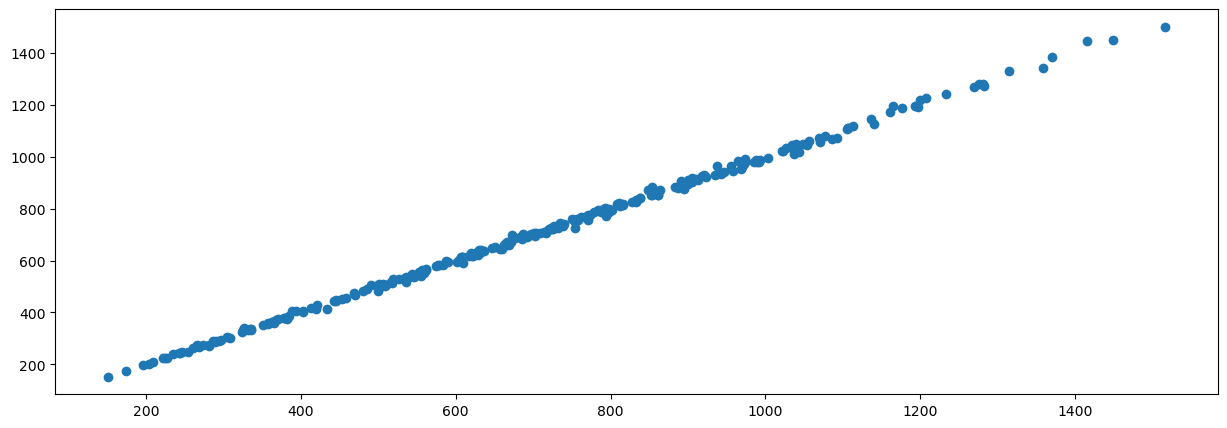

In [88]:
predict1,_=model2.predict(Train1)
plt.scatter(predict1,TrainLabel1)

3/3 [==============================] - 0s 9ms/step


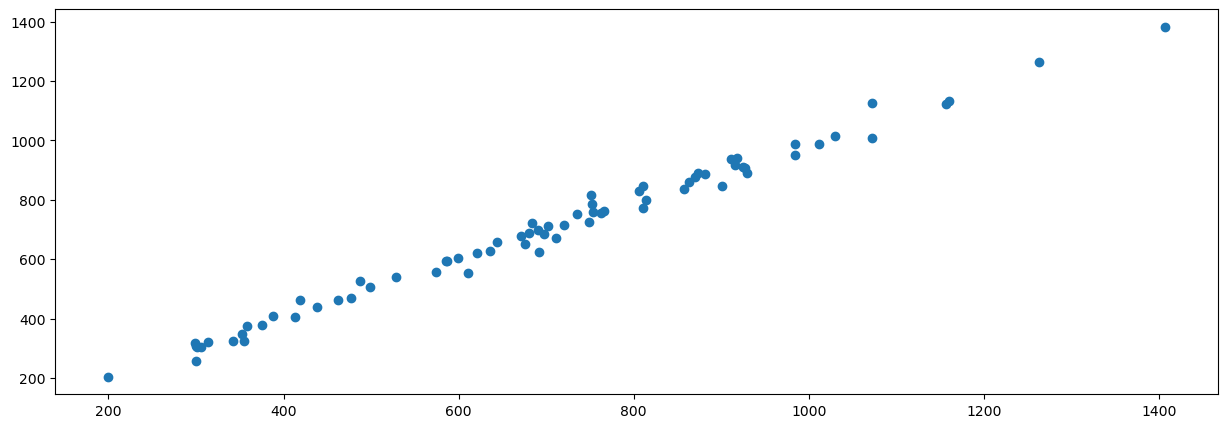

In [89]:
predict2,_=model2.predict(Test1)
plt.scatter(predict2,TestLabel1)

In [90]:
score(TrainLabel1,predict1)

(76.74129869590494, 8.760211110236154, 0.89056206, 0.999014000737671)

In [91]:
score(TestLabel1,predict2)

(674.8847013692398, 25.9785430955864, 3.0251474, 0.9896758667455553)

In [92]:
input_lyr3 = Input(shape=(19,))
initializer32 = tf.keras.initializers.HeUniform()
# layer32 = Dense(10,  activation='relu',kernel_initializer=initializer12)(input_lyr3)
layer312 = Dense(10,  activation='relu',kernel_initializer=initializer12)(input_lyr3)
# layer332 = Dense(10, activation='relu',kernel_initializer=initializer12)(layer312)
# d1=Dropout(0.01)(layer31)
output_layer32 = Dense(1,name='output')(layer312)
output_layer322 = Dense(19)(layer312)
model3 = Model(inputs=input_lyr3, outputs=[output_layer32,output_layer322])

tf.random.set_seed(seed)
np.random.seed(seed)
model3.compile(optimizer='adam', loss=['mse','mse'])
model3.summary()

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 19)]         0           []                               
                                                                                                  
 dense_12 (Dense)               (None, 10)           200         ['input_4[0][0]']                
                                                                                                  
 output (Dense)                 (None, 1)            11          ['dense_12[0][0]']               
                                                                                                  
 dense_13 (Dense)               (None, 19)           209         ['dense_12[0][0]']               
                                                                                            

In [93]:
Test.shape

(36, 19)

In [94]:
TestLabel.shape

(36,)

In [ ]:
callback=keras.callbacks.EarlyStopping(monitor="val_output_loss", patience=50, verbose=0, mode="auto", baseline=None, restore_best_weights=True)
history = model3.fit(Train, [TrainLabel,Train], epochs=50000, batch_size=512,  validation_data=(Test, [TestLabel,Test]), callbacks=[callback], shuffle=False)


Epoch 1/50000
1/1 [==============================] - 0s 377ms/step - loss: 597708.3750 - output_loss: 597707.7500 - dense_13_loss: 0.6055 - val_loss: 541814.3125 - val_output_loss: 541813.8125 - val_dense_13_loss: 0.4993
Epoch 2/50000
1/1 [==============================] - 0s 28ms/step - loss: 597679.6250 - output_loss: 597679.0000 - dense_13_loss: 0.5987 - val_loss: 541785.4375 - val_output_loss: 541784.9375 - val_dense_13_loss: 0.4928
Epoch 3/50000
1/1 [==============================] - 0s 27ms/step - loss: 597651.1250 - output_loss: 597650.5625 - dense_13_loss: 0.5921 - val_loss: 541756.8125 - val_output_loss: 541756.3125 - val_dense_13_loss: 0.4864
Epoch 4/50000
1/1 [==============================] - 0s 27ms/step - loss: 597622.8750 - output_loss: 597622.3125 - dense_13_loss: 0.5857 - val_loss: 541728.6250 - val_output_loss: 541728.1250 - val_dense_13_loss: 0.4802
Epoch 5/50000
1/1 [==============================] - 0s 31ms/step - loss: 597594.9375 - output_loss: 597594.3750 - dens

1/1 [==============================] - 0s 25ms/step - loss: 596835.8750 - output_loss: 596835.4375 - dense_13_loss: 0.4473 - val_loss: 540940.6250 - val_output_loss: 540940.2500 - val_dense_13_loss: 0.3495
Epoch 39/50000
1/1 [==============================] - 0s 27ms/step - loss: 596817.0625 - output_loss: 596816.6250 - dense_13_loss: 0.4450 - val_loss: 540921.5000 - val_output_loss: 540921.1250 - val_dense_13_loss: 0.3474
Epoch 40/50000
1/1 [==============================] - 0s 27ms/step - loss: 596798.3750 - output_loss: 596797.9375 - dense_13_loss: 0.4427 - val_loss: 540902.6875 - val_output_loss: 540902.3125 - val_dense_13_loss: 0.3454
Epoch 41/50000
1/1 [==============================] - 0s 28ms/step - loss: 596779.8750 - output_loss: 596779.4375 - dense_13_loss: 0.4406 - val_loss: 540883.6875 - val_output_loss: 540883.3750 - val_dense_13_loss: 0.3435
Epoch 42/50000
1/1 [==============================] - 0s 28ms/step - loss: 596761.5000 - output_loss: 596761.0625 - dense_13_loss: 

1/1 [==============================] - 0s 27ms/step - loss: 596156.3125 - output_loss: 596155.9375 - dense_13_loss: 0.3952 - val_loss: 540238.1875 - val_output_loss: 540237.8750 - val_dense_13_loss: 0.3079
Epoch 76/50000
1/1 [==============================] - 0s 25ms/step - loss: 596136.7500 - output_loss: 596136.3750 - dense_13_loss: 0.3943 - val_loss: 540218.5000 - val_output_loss: 540218.1875 - val_dense_13_loss: 0.3072
Epoch 77/50000
1/1 [==============================] - 0s 25ms/step - loss: 596117.0625 - output_loss: 596116.6875 - dense_13_loss: 0.3934 - val_loss: 540198.5000 - val_output_loss: 540198.1875 - val_dense_13_loss: 0.3065
Epoch 78/50000
1/1 [==============================] - 0s 25ms/step - loss: 596097.3750 - output_loss: 596097.0000 - dense_13_loss: 0.3925 - val_loss: 540178.8125 - val_output_loss: 540178.4375 - val_dense_13_loss: 0.3059
Epoch 79/50000
1/1 [==============================] - 0s 25ms/step - loss: 596077.6250 - output_loss: 596077.2500 - dense_13_loss: 

1/1 [==============================] - 0s 27ms/step - loss: 595345.4375 - output_loss: 595345.0625 - dense_13_loss: 0.3542 - val_loss: 539469.6875 - val_output_loss: 539469.4375 - val_dense_13_loss: 0.2778
Epoch 113/50000
1/1 [==============================] - 0s 27ms/step - loss: 595321.9375 - output_loss: 595321.5625 - dense_13_loss: 0.3527 - val_loss: 539447.9375 - val_output_loss: 539447.6875 - val_dense_13_loss: 0.2767
Epoch 114/50000
1/1 [==============================] - 0s 25ms/step - loss: 595298.3750 - output_loss: 595298.0000 - dense_13_loss: 0.3513 - val_loss: 539426.0000 - val_output_loss: 539425.8125 - val_dense_13_loss: 0.2756
Epoch 115/50000
1/1 [==============================] - 0s 25ms/step - loss: 595274.6250 - output_loss: 595274.2500 - dense_13_loss: 0.3499 - val_loss: 539404.0625 - val_output_loss: 539403.8125 - val_dense_13_loss: 0.2744
Epoch 116/50000
1/1 [==============================] - 0s 26ms/step - loss: 595250.8750 - output_loss: 595250.5000 - dense_13_lo

Epoch 149/50000
1/1 [==============================] - 0s 27ms/step - loss: 594418.5625 - output_loss: 594418.2500 - dense_13_loss: 0.2921 - val_loss: 538616.2500 - val_output_loss: 538616.0000 - val_dense_13_loss: 0.2250
Epoch 150/50000
1/1 [==============================] - 0s 28ms/step - loss: 594391.6875 - output_loss: 594391.3750 - dense_13_loss: 0.2903 - val_loss: 538591.8125 - val_output_loss: 538591.5625 - val_dense_13_loss: 0.2235
Epoch 151/50000
1/1 [==============================] - 0s 31ms/step - loss: 594364.7500 - output_loss: 594364.4375 - dense_13_loss: 0.2884 - val_loss: 538567.3750 - val_output_loss: 538567.1250 - val_dense_13_loss: 0.2219
Epoch 152/50000
1/1 [==============================] - 0s 29ms/step - loss: 594337.6250 - output_loss: 594337.3125 - dense_13_loss: 0.2866 - val_loss: 538542.8125 - val_output_loss: 538542.5625 - val_dense_13_loss: 0.2203
Epoch 153/50000
1/1 [==============================] - 0s 30ms/step - loss: 594310.4375 - output_loss: 594310.12

Epoch 186/50000
1/1 [==============================] - 0s 24ms/step - loss: 593355.1875 - output_loss: 593354.9375 - dense_13_loss: 0.2303 - val_loss: 537652.4375 - val_output_loss: 537652.2500 - val_dense_13_loss: 0.1708
Epoch 187/50000
1/1 [==============================] - 0s 25ms/step - loss: 593324.3750 - output_loss: 593324.1250 - dense_13_loss: 0.2288 - val_loss: 537624.5000 - val_output_loss: 537624.3125 - val_dense_13_loss: 0.1695
Epoch 188/50000
1/1 [==============================] - 0s 24ms/step - loss: 593293.5000 - output_loss: 593293.2500 - dense_13_loss: 0.2274 - val_loss: 537596.5000 - val_output_loss: 537596.3125 - val_dense_13_loss: 0.1683
Epoch 189/50000
1/1 [==============================] - 0s 25ms/step - loss: 593262.5000 - output_loss: 593262.2500 - dense_13_loss: 0.2260 - val_loss: 537568.4375 - val_output_loss: 537568.2500 - val_dense_13_loss: 0.1670
Epoch 190/50000
1/1 [==============================] - 0s 24ms/step - loss: 593231.3750 - output_loss: 593231.12

Epoch 223/50000
1/1 [==============================] - 0s 37ms/step - loss: 592137.8750 - output_loss: 592137.6875 - dense_13_loss: 0.1855 - val_loss: 536549.8125 - val_output_loss: 536549.6250 - val_dense_13_loss: 0.1343
Epoch 224/50000
1/1 [==============================] - 0s 32ms/step - loss: 592102.6875 - output_loss: 592102.5000 - dense_13_loss: 0.1845 - val_loss: 536517.9375 - val_output_loss: 536517.8125 - val_dense_13_loss: 0.1336
Epoch 225/50000
1/1 [==============================] - 0s 32ms/step - loss: 592067.3125 - output_loss: 592067.1250 - dense_13_loss: 0.1836 - val_loss: 536486.0000 - val_output_loss: 536485.8750 - val_dense_13_loss: 0.1329
Epoch 226/50000
1/1 [==============================] - 0s 28ms/step - loss: 592031.8750 - output_loss: 592031.6875 - dense_13_loss: 0.1826 - val_loss: 536453.9375 - val_output_loss: 536453.8125 - val_dense_13_loss: 0.1322
Epoch 227/50000
1/1 [==============================] - 0s 33ms/step - loss: 591996.3125 - output_loss: 591996.12

Epoch 260/50000
1/1 [==============================] - 0s 33ms/step - loss: 590753.0625 - output_loss: 590752.8750 - dense_13_loss: 0.1583 - val_loss: 535299.2500 - val_output_loss: 535299.1250 - val_dense_13_loss: 0.1165
Epoch 261/50000
1/1 [==============================] - 0s 30ms/step - loss: 590713.3125 - output_loss: 590713.1250 - dense_13_loss: 0.1578 - val_loss: 535263.4375 - val_output_loss: 535263.3125 - val_dense_13_loss: 0.1162
Epoch 262/50000
1/1 [==============================] - 0s 30ms/step - loss: 590673.4375 - output_loss: 590673.2500 - dense_13_loss: 0.1573 - val_loss: 535227.4375 - val_output_loss: 535227.3125 - val_dense_13_loss: 0.1159
Epoch 263/50000
1/1 [==============================] - 0s 30ms/step - loss: 590633.4375 - output_loss: 590633.2500 - dense_13_loss: 0.1567 - val_loss: 535191.3750 - val_output_loss: 535191.2500 - val_dense_13_loss: 0.1157
Epoch 264/50000
1/1 [==============================] - 0s 30ms/step - loss: 590593.1875 - output_loss: 590593.06

Epoch 297/50000
1/1 [==============================] - 0s 34ms/step - loss: 589197.8125 - output_loss: 589197.6875 - dense_13_loss: 0.1440 - val_loss: 533900.1875 - val_output_loss: 533900.0625 - val_dense_13_loss: 0.1107
Epoch 298/50000
1/1 [==============================] - 0s 30ms/step - loss: 589153.4375 - output_loss: 589153.3125 - dense_13_loss: 0.1437 - val_loss: 533860.3125 - val_output_loss: 533860.1875 - val_dense_13_loss: 0.1107
Epoch 299/50000
1/1 [==============================] - 0s 30ms/step - loss: 589108.8125 - output_loss: 589108.6875 - dense_13_loss: 0.1434 - val_loss: 533820.3750 - val_output_loss: 533820.2500 - val_dense_13_loss: 0.1106
Epoch 300/50000
1/1 [==============================] - 0s 28ms/step - loss: 589064.1875 - output_loss: 589064.0625 - dense_13_loss: 0.1432 - val_loss: 533780.2500 - val_output_loss: 533780.1250 - val_dense_13_loss: 0.1105
Epoch 301/50000
1/1 [==============================] - 0s 29ms/step - loss: 589019.3750 - output_loss: 589019.25

Epoch 334/50000
1/1 [==============================] - 0s 29ms/step - loss: 587470.8125 - output_loss: 587470.6875 - dense_13_loss: 0.1368 - val_loss: 532352.3750 - val_output_loss: 532352.2500 - val_dense_13_loss: 0.1098
Epoch 335/50000
1/1 [==============================] - 0s 28ms/step - loss: 587421.7500 - output_loss: 587421.6250 - dense_13_loss: 0.1367 - val_loss: 532308.4375 - val_output_loss: 532308.3125 - val_dense_13_loss: 0.1098
Epoch 336/50000
1/1 [==============================] - 0s 29ms/step - loss: 587372.5625 - output_loss: 587372.4375 - dense_13_loss: 0.1366 - val_loss: 532264.4375 - val_output_loss: 532264.3125 - val_dense_13_loss: 0.1098
Epoch 337/50000
1/1 [==============================] - 0s 29ms/step - loss: 587323.3125 - output_loss: 587323.1875 - dense_13_loss: 0.1364 - val_loss: 532220.3750 - val_output_loss: 532220.2500 - val_dense_13_loss: 0.1098
Epoch 338/50000
1/1 [==============================] - 0s 29ms/step - loss: 587273.8750 - output_loss: 587273.75

Epoch 371/50000
1/1 [==============================] - 0s 29ms/step - loss: 585572.7500 - output_loss: 585572.6250 - dense_13_loss: 0.1321 - val_loss: 530656.1250 - val_output_loss: 530656.0000 - val_dense_13_loss: 0.1093
Epoch 372/50000
1/1 [==============================] - 0s 30ms/step - loss: 585519.1250 - output_loss: 585519.0000 - dense_13_loss: 0.1320 - val_loss: 530608.2500 - val_output_loss: 530608.1250 - val_dense_13_loss: 0.1093
Epoch 373/50000
1/1 [==============================] - 0s 29ms/step - loss: 585465.3125 - output_loss: 585465.1875 - dense_13_loss: 0.1318 - val_loss: 530560.2500 - val_output_loss: 530560.1250 - val_dense_13_loss: 0.1092
Epoch 374/50000
1/1 [==============================] - 0s 30ms/step - loss: 585411.3750 - output_loss: 585411.2500 - dense_13_loss: 0.1317 - val_loss: 530512.1250 - val_output_loss: 530512.0000 - val_dense_13_loss: 0.1092
Epoch 375/50000
1/1 [==============================] - 0s 29ms/step - loss: 585357.3750 - output_loss: 585357.25

Epoch 408/50000
1/1 [==============================] - 0s 29ms/step - loss: 583502.5625 - output_loss: 583502.4375 - dense_13_loss: 0.1269 - val_loss: 528812.1875 - val_output_loss: 528812.0625 - val_dense_13_loss: 0.1078
Epoch 409/50000
1/1 [==============================] - 0s 29ms/step - loss: 583444.1250 - output_loss: 583444.0000 - dense_13_loss: 0.1267 - val_loss: 528760.3125 - val_output_loss: 528760.1875 - val_dense_13_loss: 0.1077
Epoch 410/50000
1/1 [==============================] - 0s 27ms/step - loss: 583385.6250 - output_loss: 583385.5000 - dense_13_loss: 0.1265 - val_loss: 528708.3750 - val_output_loss: 528708.2500 - val_dense_13_loss: 0.1077
Epoch 411/50000
1/1 [==============================] - 0s 30ms/step - loss: 583327.0000 - output_loss: 583326.8750 - dense_13_loss: 0.1264 - val_loss: 528656.2500 - val_output_loss: 528656.1250 - val_dense_13_loss: 0.1076
Epoch 412/50000
1/1 [==============================] - 0s 29ms/step - loss: 583268.2500 - output_loss: 583268.12

Epoch 445/50000
1/1 [==============================] - 0s 30ms/step - loss: 581251.8125 - output_loss: 581251.6875 - dense_13_loss: 0.1211 - val_loss: 526821.4375 - val_output_loss: 526821.3125 - val_dense_13_loss: 0.1059
Epoch 446/50000
1/1 [==============================] - 0s 28ms/step - loss: 581188.0000 - output_loss: 581187.8750 - dense_13_loss: 0.1210 - val_loss: 526765.5625 - val_output_loss: 526765.4375 - val_dense_13_loss: 0.1059
Epoch 447/50000
1/1 [==============================] - 0s 29ms/step - loss: 581124.0625 - output_loss: 581123.9375 - dense_13_loss: 0.1209 - val_loss: 526709.6875 - val_output_loss: 526709.5625 - val_dense_13_loss: 0.1059
Epoch 448/50000
1/1 [==============================] - 0s 29ms/step - loss: 581060.0000 - output_loss: 581059.8750 - dense_13_loss: 0.1208 - val_loss: 526653.5625 - val_output_loss: 526653.4375 - val_dense_13_loss: 0.1059
Epoch 449/50000
1/1 [==============================] - 0s 29ms/step - loss: 580995.6875 - output_loss: 580995.56

Epoch 482/50000
1/1 [==============================] - 0s 30ms/step - loss: 578695.5000 - output_loss: 578695.3750 - dense_13_loss: 0.1250 - val_loss: 524606.8125 - val_output_loss: 524606.6875 - val_dense_13_loss: 0.1137
Epoch 483/50000
1/1 [==============================] - 0s 30ms/step - loss: 578617.1875 - output_loss: 578617.0625 - dense_13_loss: 0.1251 - val_loss: 524538.8125 - val_output_loss: 524538.6875 - val_dense_13_loss: 0.1141
Epoch 484/50000
1/1 [==============================] - 0s 30ms/step - loss: 578538.4375 - output_loss: 578538.3125 - dense_13_loss: 0.1252 - val_loss: 524469.9375 - val_output_loss: 524469.8125 - val_dense_13_loss: 0.1144
Epoch 485/50000
1/1 [==============================] - 0s 30ms/step - loss: 578459.0625 - output_loss: 578458.9375 - dense_13_loss: 0.1252 - val_loss: 524400.6875 - val_output_loss: 524400.5625 - val_dense_13_loss: 0.1147
Epoch 486/50000
1/1 [==============================] - 0s 30ms/step - loss: 578379.1250 - output_loss: 578379.00

Epoch 519/50000
1/1 [==============================] - 0s 28ms/step - loss: 575458.1250 - output_loss: 575458.0000 - dense_13_loss: 0.1191 - val_loss: 521771.4062 - val_output_loss: 521771.2812 - val_dense_13_loss: 0.1111
Epoch 520/50000
1/1 [==============================] - 0s 28ms/step - loss: 575362.6875 - output_loss: 575362.5625 - dense_13_loss: 0.1189 - val_loss: 521687.8438 - val_output_loss: 521687.7188 - val_dense_13_loss: 0.1110
Epoch 521/50000
1/1 [==============================] - 0s 27ms/step - loss: 575267.0000 - output_loss: 575266.8750 - dense_13_loss: 0.1187 - val_loss: 521604.0625 - val_output_loss: 521603.9062 - val_dense_13_loss: 0.1109
Epoch 522/50000
1/1 [==============================] - 0s 27ms/step - loss: 575170.8750 - output_loss: 575170.7500 - dense_13_loss: 0.1185 - val_loss: 521519.9062 - val_output_loss: 521519.7812 - val_dense_13_loss: 0.1107
Epoch 523/50000
1/1 [==============================] - 0s 27ms/step - loss: 575074.6250 - output_loss: 575074.50

Epoch 556/50000
1/1 [==============================] - 0s 29ms/step - loss: 571728.4375 - output_loss: 571728.3125 - dense_13_loss: 0.1134 - val_loss: 518501.1250 - val_output_loss: 518501.0000 - val_dense_13_loss: 0.1066
Epoch 557/50000
1/1 [==============================] - 0s 32ms/step - loss: 571622.4375 - output_loss: 571622.3125 - dense_13_loss: 0.1133 - val_loss: 518408.1250 - val_output_loss: 518408.0000 - val_dense_13_loss: 0.1065
Epoch 558/50000
1/1 [==============================] - 0s 32ms/step - loss: 571516.2500 - output_loss: 571516.1250 - dense_13_loss: 0.1132 - val_loss: 518315.0000 - val_output_loss: 518314.9062 - val_dense_13_loss: 0.1064
Epoch 559/50000
1/1 [==============================] - 0s 29ms/step - loss: 571409.9375 - output_loss: 571409.8125 - dense_13_loss: 0.1130 - val_loss: 518221.5625 - val_output_loss: 518221.4375 - val_dense_13_loss: 0.1063
Epoch 560/50000
1/1 [==============================] - 0s 33ms/step - loss: 571303.2500 - output_loss: 571303.12

Epoch 593/50000
1/1 [==============================] - 0s 31ms/step - loss: 567657.6875 - output_loss: 567657.5625 - dense_13_loss: 0.1097 - val_loss: 514924.2188 - val_output_loss: 514924.1250 - val_dense_13_loss: 0.1034
Epoch 594/50000
1/1 [==============================] - 0s 29ms/step - loss: 567543.6250 - output_loss: 567543.5000 - dense_13_loss: 0.1096 - val_loss: 514823.9062 - val_output_loss: 514823.7812 - val_dense_13_loss: 0.1034
Epoch 595/50000
1/1 [==============================] - 0s 30ms/step - loss: 567429.3750 - output_loss: 567429.2500 - dense_13_loss: 0.1095 - val_loss: 514723.4062 - val_output_loss: 514723.2812 - val_dense_13_loss: 0.1033
Epoch 596/50000
1/1 [==============================] - 0s 31ms/step - loss: 567314.9375 - output_loss: 567314.8125 - dense_13_loss: 0.1094 - val_loss: 514622.6562 - val_output_loss: 514622.5625 - val_dense_13_loss: 0.1032
Epoch 597/50000
1/1 [==============================] - 0s 30ms/step - loss: 567200.2500 - output_loss: 567200.12

Epoch 630/50000
1/1 [==============================] - 0s 25ms/step - loss: 563309.7500 - output_loss: 563309.6250 - dense_13_loss: 0.1069 - val_loss: 511096.5625 - val_output_loss: 511096.4375 - val_dense_13_loss: 0.1012
Epoch 631/50000
1/1 [==============================] - 0s 27ms/step - loss: 563188.7500 - output_loss: 563188.6250 - dense_13_loss: 0.1068 - val_loss: 510989.9062 - val_output_loss: 510989.7812 - val_dense_13_loss: 0.1011
Epoch 632/50000
1/1 [==============================] - 0s 27ms/step - loss: 563067.5625 - output_loss: 563067.4375 - dense_13_loss: 0.1067 - val_loss: 510883.1562 - val_output_loss: 510883.0625 - val_dense_13_loss: 0.1011
Epoch 633/50000
1/1 [==============================] - 0s 26ms/step - loss: 562946.1875 - output_loss: 562946.0625 - dense_13_loss: 0.1067 - val_loss: 510776.2188 - val_output_loss: 510776.1250 - val_dense_13_loss: 0.1010
Epoch 634/50000
1/1 [==============================] - 0s 28ms/step - loss: 562824.7500 - output_loss: 562824.62

Epoch 667/50000
1/1 [==============================] - 0s 29ms/step - loss: 558719.3125 - output_loss: 558719.1875 - dense_13_loss: 0.1046 - val_loss: 507049.5625 - val_output_loss: 507049.4375 - val_dense_13_loss: 0.0995
Epoch 668/50000
1/1 [==============================] - 0s 29ms/step - loss: 558592.1250 - output_loss: 558592.0000 - dense_13_loss: 0.1046 - val_loss: 506937.3438 - val_output_loss: 506937.2188 - val_dense_13_loss: 0.0995
Epoch 669/50000
1/1 [==============================] - 0s 29ms/step - loss: 558464.7500 - output_loss: 558464.6250 - dense_13_loss: 0.1045 - val_loss: 506825.0000 - val_output_loss: 506824.9062 - val_dense_13_loss: 0.0995
Epoch 670/50000
1/1 [==============================] - 0s 28ms/step - loss: 558337.2500 - output_loss: 558337.1250 - dense_13_loss: 0.1045 - val_loss: 506712.5000 - val_output_loss: 506712.4062 - val_dense_13_loss: 0.0994
Epoch 671/50000
1/1 [==============================] - 0s 27ms/step - loss: 558209.5625 - output_loss: 558209.43

Epoch 704/50000
1/1 [==============================] - 0s 27ms/step - loss: 553909.1875 - output_loss: 553909.0625 - dense_13_loss: 0.1028 - val_loss: 502804.1250 - val_output_loss: 502804.0000 - val_dense_13_loss: 0.0983
Epoch 705/50000
1/1 [==============================] - 0s 25ms/step - loss: 553776.3125 - output_loss: 553776.1875 - dense_13_loss: 0.1027 - val_loss: 502686.7188 - val_output_loss: 502686.6250 - val_dense_13_loss: 0.0983
Epoch 706/50000
1/1 [==============================] - 0s 27ms/step - loss: 553643.3125 - output_loss: 553643.1875 - dense_13_loss: 0.1027 - val_loss: 502569.3438 - val_output_loss: 502569.2188 - val_dense_13_loss: 0.0982
Epoch 707/50000
1/1 [==============================] - 0s 27ms/step - loss: 553510.1250 - output_loss: 553510.0000 - dense_13_loss: 0.1027 - val_loss: 502451.6562 - val_output_loss: 502451.5625 - val_dense_13_loss: 0.0982
Epoch 708/50000
1/1 [==============================] - 0s 27ms/step - loss: 553376.7500 - output_loss: 553376.62

Epoch 741/50000
1/1 [==============================] - 0s 30ms/step - loss: 548896.0000 - output_loss: 548895.8750 - dense_13_loss: 0.1012 - val_loss: 498374.9062 - val_output_loss: 498374.7812 - val_dense_13_loss: 0.0973
Epoch 742/50000
1/1 [==============================] - 0s 29ms/step - loss: 548757.8125 - output_loss: 548757.6875 - dense_13_loss: 0.1012 - val_loss: 498252.6562 - val_output_loss: 498252.5625 - val_dense_13_loss: 0.0973
Epoch 743/50000
1/1 [==============================] - 0s 30ms/step - loss: 548619.5000 - output_loss: 548619.3750 - dense_13_loss: 0.1012 - val_loss: 498130.4375 - val_output_loss: 498130.3438 - val_dense_13_loss: 0.0973
Epoch 744/50000
1/1 [==============================] - 0s 28ms/step - loss: 548481.0000 - output_loss: 548480.8750 - dense_13_loss: 0.1011 - val_loss: 498008.0625 - val_output_loss: 498007.9375 - val_dense_13_loss: 0.0973
Epoch 745/50000
1/1 [==============================] - 0s 27ms/step - loss: 548342.4375 - output_loss: 548342.31

Epoch 778/50000
1/1 [==============================] - 0s 27ms/step - loss: 543693.2500 - output_loss: 543693.1250 - dense_13_loss: 0.0999 - val_loss: 493773.9375 - val_output_loss: 493773.8438 - val_dense_13_loss: 0.0966
Epoch 779/50000
1/1 [==============================] - 0s 28ms/step - loss: 543550.1250 - output_loss: 543550.0000 - dense_13_loss: 0.0998 - val_loss: 493647.3438 - val_output_loss: 493647.2188 - val_dense_13_loss: 0.0966
Epoch 780/50000
1/1 [==============================] - 0s 27ms/step - loss: 543406.8750 - output_loss: 543406.7500 - dense_13_loss: 0.0998 - val_loss: 493520.5625 - val_output_loss: 493520.4375 - val_dense_13_loss: 0.0965
Epoch 781/50000
1/1 [==============================] - 0s 27ms/step - loss: 543263.4375 - output_loss: 543263.3125 - dense_13_loss: 0.0998 - val_loss: 493393.7188 - val_output_loss: 493393.6250 - val_dense_13_loss: 0.0965
Epoch 782/50000
1/1 [==============================] - 0s 27ms/step - loss: 543119.9375 - output_loss: 543119.81

Epoch 815/50000
1/1 [==============================] - 0s 28ms/step - loss: 538312.7500 - output_loss: 538312.6250 - dense_13_loss: 0.0987 - val_loss: 489011.8438 - val_output_loss: 489011.7188 - val_dense_13_loss: 0.0960
Epoch 816/50000
1/1 [==============================] - 0s 27ms/step - loss: 538165.0000 - output_loss: 538164.8750 - dense_13_loss: 0.0987 - val_loss: 488881.0000 - val_output_loss: 488880.9062 - val_dense_13_loss: 0.0960
Epoch 817/50000
1/1 [==============================] - 0s 27ms/step - loss: 538017.1250 - output_loss: 538017.0000 - dense_13_loss: 0.0986 - val_loss: 488750.0000 - val_output_loss: 488749.9062 - val_dense_13_loss: 0.0960
Epoch 818/50000
1/1 [==============================] - 0s 25ms/step - loss: 537869.0625 - output_loss: 537868.9375 - dense_13_loss: 0.0986 - val_loss: 488618.9375 - val_output_loss: 488618.8438 - val_dense_13_loss: 0.0960
Epoch 819/50000
1/1 [==============================] - 0s 25ms/step - loss: 537720.8750 - output_loss: 537720.75

Epoch 852/50000
1/1 [==============================] - 0s 27ms/step - loss: 532765.1875 - output_loss: 532765.0625 - dense_13_loss: 0.0976 - val_loss: 484098.0000 - val_output_loss: 484097.9062 - val_dense_13_loss: 0.0956
Epoch 853/50000
1/1 [==============================] - 0s 27ms/step - loss: 532613.0000 - output_loss: 532612.8750 - dense_13_loss: 0.0976 - val_loss: 483963.1562 - val_output_loss: 483963.0625 - val_dense_13_loss: 0.0955
Epoch 854/50000
1/1 [==============================] - 0s 27ms/step - loss: 532460.7500 - output_loss: 532460.6250 - dense_13_loss: 0.0976 - val_loss: 483828.2188 - val_output_loss: 483828.1250 - val_dense_13_loss: 0.0955
Epoch 855/50000
1/1 [==============================] - 0s 27ms/step - loss: 532308.3125 - output_loss: 532308.1875 - dense_13_loss: 0.0976 - val_loss: 483693.1562 - val_output_loss: 483693.0625 - val_dense_13_loss: 0.0955
Epoch 856/50000
1/1 [==============================] - 0s 27ms/step - loss: 532155.8750 - output_loss: 532155.75

Epoch 889/50000
1/1 [==============================] - 0s 27ms/step - loss: 527060.3750 - output_loss: 527060.2500 - dense_13_loss: 0.0967 - val_loss: 479041.1250 - val_output_loss: 479041.0000 - val_dense_13_loss: 0.0952
Epoch 890/50000
1/1 [==============================] - 0s 28ms/step - loss: 526904.1250 - output_loss: 526904.0000 - dense_13_loss: 0.0967 - val_loss: 478902.5625 - val_output_loss: 478902.4375 - val_dense_13_loss: 0.0952
Epoch 891/50000
1/1 [==============================] - 0s 27ms/step - loss: 526747.6875 - output_loss: 526747.5625 - dense_13_loss: 0.0966 - val_loss: 478763.9062 - val_output_loss: 478763.7812 - val_dense_13_loss: 0.0952
Epoch 892/50000
1/1 [==============================] - 0s 27ms/step - loss: 526591.2500 - output_loss: 526591.1250 - dense_13_loss: 0.0966 - val_loss: 478625.1250 - val_output_loss: 478625.0000 - val_dense_13_loss: 0.0952
Epoch 893/50000
1/1 [==============================] - 0s 27ms/step - loss: 526434.6250 - output_loss: 526434.50

Epoch 926/50000
1/1 [==============================] - 0s 26ms/step - loss: 521207.7188 - output_loss: 521207.5938 - dense_13_loss: 0.0958 - val_loss: 473849.4375 - val_output_loss: 473849.3438 - val_dense_13_loss: 0.0949
Epoch 927/50000
1/1 [==============================] - 0s 28ms/step - loss: 521047.5625 - output_loss: 521047.4688 - dense_13_loss: 0.0958 - val_loss: 473707.3438 - val_output_loss: 473707.2188 - val_dense_13_loss: 0.0949
Epoch 928/50000
1/1 [==============================] - 0s 27ms/step - loss: 520887.3125 - output_loss: 520887.2188 - dense_13_loss: 0.0958 - val_loss: 473565.1250 - val_output_loss: 473565.0000 - val_dense_13_loss: 0.0949
Epoch 929/50000
1/1 [==============================] - 0s 27ms/step - loss: 520726.9688 - output_loss: 520726.8750 - dense_13_loss: 0.0957 - val_loss: 473422.8438 - val_output_loss: 473422.7188 - val_dense_13_loss: 0.0949
Epoch 930/50000
1/1 [==============================] - 0s 26ms/step - loss: 520566.4688 - output_loss: 520566.37

Epoch 963/50000
1/1 [==============================] - 0s 29ms/step - loss: 515216.1875 - output_loss: 515216.0938 - dense_13_loss: 0.0950 - val_loss: 468530.9062 - val_output_loss: 468530.7812 - val_dense_13_loss: 0.0946
Epoch 964/50000
1/1 [==============================] - 0s 30ms/step - loss: 515052.4062 - output_loss: 515052.3125 - dense_13_loss: 0.0950 - val_loss: 468385.5000 - val_output_loss: 468385.4062 - val_dense_13_loss: 0.0946
Epoch 965/50000
1/1 [==============================] - 0s 27ms/step - loss: 514888.5625 - output_loss: 514888.4375 - dense_13_loss: 0.0950 - val_loss: 468239.9062 - val_output_loss: 468239.7812 - val_dense_13_loss: 0.0946
Epoch 966/50000
1/1 [==============================] - 0s 27ms/step - loss: 514724.5625 - output_loss: 514724.4375 - dense_13_loss: 0.0949 - val_loss: 468094.3438 - val_output_loss: 468094.2188 - val_dense_13_loss: 0.0946
Epoch 967/50000
1/1 [==============================] - 0s 31ms/step - loss: 514560.5000 - output_loss: 514560.40

Epoch 1000/50000
1/1 [==============================] - 0s 25ms/step - loss: 509094.5312 - output_loss: 509094.4375 - dense_13_loss: 0.0943 - val_loss: 463093.0000 - val_output_loss: 463092.9062 - val_dense_13_loss: 0.0944
Epoch 1001/50000
1/1 [==============================] - 0s 24ms/step - loss: 508927.3125 - output_loss: 508927.2188 - dense_13_loss: 0.0942 - val_loss: 462944.4688 - val_output_loss: 462944.4062 - val_dense_13_loss: 0.0944
Epoch 1002/50000
1/1 [==============================] - 0s 25ms/step - loss: 508760.0938 - output_loss: 508760.0000 - dense_13_loss: 0.0942 - val_loss: 462795.8125 - val_output_loss: 462795.7188 - val_dense_13_loss: 0.0944
Epoch 1003/50000
1/1 [==============================] - 0s 25ms/step - loss: 508592.6875 - output_loss: 508592.5938 - dense_13_loss: 0.0942 - val_loss: 462647.0938 - val_output_loss: 462647.0000 - val_dense_13_loss: 0.0944
Epoch 1004/50000
1/1 [==============================] - 0s 25ms/step - loss: 508425.2812 - output_loss: 5084

Epoch 1037/50000
1/1 [==============================] - 0s 25ms/step - loss: 502851.2188 - output_loss: 502851.1250 - dense_13_loss: 0.0936 - val_loss: 457543.1875 - val_output_loss: 457543.0938 - val_dense_13_loss: 0.0943
Epoch 1038/50000
1/1 [==============================] - 0s 26ms/step - loss: 502680.9062 - output_loss: 502680.7812 - dense_13_loss: 0.0935 - val_loss: 457391.7500 - val_output_loss: 457391.6562 - val_dense_13_loss: 0.0943
Epoch 1039/50000
1/1 [==============================] - 0s 25ms/step - loss: 502510.4375 - output_loss: 502510.3125 - dense_13_loss: 0.0935 - val_loss: 457240.1875 - val_output_loss: 457240.0938 - val_dense_13_loss: 0.0943
Epoch 1040/50000
1/1 [==============================] - 0s 26ms/step - loss: 502339.9688 - output_loss: 502339.8438 - dense_13_loss: 0.0935 - val_loss: 457088.5312 - val_output_loss: 457088.4375 - val_dense_13_loss: 0.0943
Epoch 1041/50000
1/1 [==============================] - 0s 28ms/step - loss: 502169.3438 - output_loss: 5021

Epoch 1074/50000
1/1 [==============================] - 0s 26ms/step - loss: 496494.5312 - output_loss: 496494.4375 - dense_13_loss: 0.0929 - val_loss: 451888.7500 - val_output_loss: 451888.6562 - val_dense_13_loss: 0.0942
Epoch 1075/50000
1/1 [==============================] - 0s 28ms/step - loss: 496321.2812 - output_loss: 496321.1875 - dense_13_loss: 0.0929 - val_loss: 451734.5312 - val_output_loss: 451734.4375 - val_dense_13_loss: 0.0941
Epoch 1076/50000
1/1 [==============================] - 0s 28ms/step - loss: 496147.8438 - output_loss: 496147.7500 - dense_13_loss: 0.0929 - val_loss: 451580.2500 - val_output_loss: 451580.1562 - val_dense_13_loss: 0.0942
Epoch 1077/50000
1/1 [==============================] - 0s 27ms/step - loss: 495974.4688 - output_loss: 495974.3750 - dense_13_loss: 0.0929 - val_loss: 451425.9062 - val_output_loss: 451425.7812 - val_dense_13_loss: 0.0941
Epoch 1078/50000
1/1 [==============================] - 0s 29ms/step - loss: 495800.9375 - output_loss: 4958

Epoch 1111/50000
1/1 [==============================] - 0s 25ms/step - loss: 490032.5938 - output_loss: 490032.5000 - dense_13_loss: 0.0923 - val_loss: 446136.5938 - val_output_loss: 446136.5000 - val_dense_13_loss: 0.0940
Epoch 1112/50000
1/1 [==============================] - 0s 25ms/step - loss: 489856.5938 - output_loss: 489856.5000 - dense_13_loss: 0.0923 - val_loss: 445979.9062 - val_output_loss: 445979.7812 - val_dense_13_loss: 0.0941
Epoch 1113/50000
1/1 [==============================] - 0s 24ms/step - loss: 489680.5000 - output_loss: 489680.4062 - dense_13_loss: 0.0923 - val_loss: 445823.0312 - val_output_loss: 445822.9375 - val_dense_13_loss: 0.0940
Epoch 1114/50000
1/1 [==============================] - 0s 25ms/step - loss: 489504.3125 - output_loss: 489504.1875 - dense_13_loss: 0.0922 - val_loss: 445666.1562 - val_output_loss: 445666.0625 - val_dense_13_loss: 0.0940
Epoch 1115/50000
1/1 [==============================] - 0s 25ms/step - loss: 489328.0625 - output_loss: 4893

Epoch 1148/50000
1/1 [==============================] - 0s 27ms/step - loss: 483473.3750 - output_loss: 483473.2812 - dense_13_loss: 0.0917 - val_loss: 440293.8125 - val_output_loss: 440293.7188 - val_dense_13_loss: 0.0940
Epoch 1149/50000
1/1 [==============================] - 0s 27ms/step - loss: 483294.8125 - output_loss: 483294.7188 - dense_13_loss: 0.0917 - val_loss: 440134.6875 - val_output_loss: 440134.5938 - val_dense_13_loss: 0.0940
Epoch 1150/50000
1/1 [==============================] - 0s 27ms/step - loss: 483116.2500 - output_loss: 483116.1562 - dense_13_loss: 0.0917 - val_loss: 439975.5000 - val_output_loss: 439975.4062 - val_dense_13_loss: 0.0940
Epoch 1151/50000
1/1 [==============================] - 0s 26ms/step - loss: 482937.5312 - output_loss: 482937.4375 - dense_13_loss: 0.0917 - val_loss: 439816.2812 - val_output_loss: 439816.1875 - val_dense_13_loss: 0.0939
Epoch 1152/50000
1/1 [==============================] - 0s 26ms/step - loss: 482758.8125 - output_loss: 4827

Epoch 1185/50000
1/1 [==============================] - 0s 25ms/step - loss: 476824.7812 - output_loss: 476824.6875 - dense_13_loss: 0.0911 - val_loss: 434367.0938 - val_output_loss: 434367.0000 - val_dense_13_loss: 0.0939
Epoch 1186/50000
1/1 [==============================] - 0s 26ms/step - loss: 476643.9062 - output_loss: 476643.8125 - dense_13_loss: 0.0911 - val_loss: 434205.8125 - val_output_loss: 434205.7188 - val_dense_13_loss: 0.0939
Epoch 1187/50000
1/1 [==============================] - 0s 29ms/step - loss: 476462.9062 - output_loss: 476462.8125 - dense_13_loss: 0.0911 - val_loss: 434044.4688 - val_output_loss: 434044.4062 - val_dense_13_loss: 0.0939
Epoch 1188/50000
1/1 [==============================] - 0s 46ms/step - loss: 476281.9688 - output_loss: 476281.8750 - dense_13_loss: 0.0911 - val_loss: 433883.0312 - val_output_loss: 433882.9375 - val_dense_13_loss: 0.0939
Epoch 1189/50000
1/1 [==============================] - 0s 30ms/step - loss: 476100.9375 - output_loss: 4761

Epoch 1222/50000
1/1 [==============================] - 0s 26ms/step - loss: 470094.3125 - output_loss: 470094.2188 - dense_13_loss: 0.0906 - val_loss: 428363.1562 - val_output_loss: 428363.0625 - val_dense_13_loss: 0.0939
Epoch 1223/50000
1/1 [==============================] - 0s 27ms/step - loss: 469911.3125 - output_loss: 469911.2188 - dense_13_loss: 0.0906 - val_loss: 428199.9062 - val_output_loss: 428199.7812 - val_dense_13_loss: 0.0938
Epoch 1224/50000
1/1 [==============================] - 0s 26ms/step - loss: 469728.3438 - output_loss: 469728.2500 - dense_13_loss: 0.0906 - val_loss: 428036.5312 - val_output_loss: 428036.4375 - val_dense_13_loss: 0.0938
Epoch 1225/50000
1/1 [==============================] - 0s 26ms/step - loss: 469545.2500 - output_loss: 469545.1250 - dense_13_loss: 0.0906 - val_loss: 427873.1562 - val_output_loss: 427873.0625 - val_dense_13_loss: 0.0939
Epoch 1226/50000
1/1 [==============================] - 0s 27ms/step - loss: 469362.1250 - output_loss: 4693

Epoch 1259/50000
1/1 [==============================] - 0s 24ms/step - loss: 463289.6875 - output_loss: 463289.5938 - dense_13_loss: 0.0901 - val_loss: 422288.5938 - val_output_loss: 422288.5000 - val_dense_13_loss: 0.0938
Epoch 1260/50000
1/1 [==============================] - 0s 24ms/step - loss: 463104.7812 - output_loss: 463104.6875 - dense_13_loss: 0.0901 - val_loss: 422123.5000 - val_output_loss: 422123.4062 - val_dense_13_loss: 0.0938
Epoch 1261/50000
1/1 [==============================] - 0s 23ms/step - loss: 462919.9062 - output_loss: 462919.8125 - dense_13_loss: 0.0901 - val_loss: 421958.3125 - val_output_loss: 421958.2188 - val_dense_13_loss: 0.0938
Epoch 1262/50000
1/1 [==============================] - 0s 24ms/step - loss: 462734.9062 - output_loss: 462734.8125 - dense_13_loss: 0.0901 - val_loss: 421793.1250 - val_output_loss: 421793.0312 - val_dense_13_loss: 0.0938
Epoch 1263/50000
1/1 [==============================] - 0s 25ms/step - loss: 462549.9375 - output_loss: 4625

Epoch 1296/50000
1/1 [==============================] - 0s 26ms/step - loss: 456418.3750 - output_loss: 456418.2812 - dense_13_loss: 0.0896 - val_loss: 416149.8438 - val_output_loss: 416149.7500 - val_dense_13_loss: 0.0938
Epoch 1297/50000
1/1 [==============================] - 0s 25ms/step - loss: 456231.8125 - output_loss: 456231.7188 - dense_13_loss: 0.0896 - val_loss: 415983.0938 - val_output_loss: 415983.0000 - val_dense_13_loss: 0.0937
Epoch 1298/50000
1/1 [==============================] - 0s 29ms/step - loss: 456045.2500 - output_loss: 456045.1250 - dense_13_loss: 0.0896 - val_loss: 415816.3125 - val_output_loss: 415816.2188 - val_dense_13_loss: 0.0938
Epoch 1299/50000
1/1 [==============================] - 0s 30ms/step - loss: 455858.5625 - output_loss: 455858.4688 - dense_13_loss: 0.0896 - val_loss: 415649.5000 - val_output_loss: 415649.4062 - val_dense_13_loss: 0.0938
Epoch 1300/50000
1/1 [==============================] - 0s 28ms/step - loss: 455671.8438 - output_loss: 4556

Epoch 1333/50000
1/1 [==============================] - 0s 25ms/step - loss: 449487.7188 - output_loss: 449487.5938 - dense_13_loss: 0.0892 - val_loss: 409953.4062 - val_output_loss: 409953.2812 - val_dense_13_loss: 0.0937
Epoch 1334/50000
1/1 [==============================] - 0s 24ms/step - loss: 449299.5938 - output_loss: 449299.5000 - dense_13_loss: 0.0892 - val_loss: 409785.1250 - val_output_loss: 409785.0312 - val_dense_13_loss: 0.0938
Epoch 1335/50000
1/1 [==============================] - 0s 26ms/step - loss: 449111.5000 - output_loss: 449111.4062 - dense_13_loss: 0.0892 - val_loss: 409616.9062 - val_output_loss: 409616.7812 - val_dense_13_loss: 0.0937
Epoch 1336/50000
1/1 [==============================] - 0s 25ms/step - loss: 448923.3750 - output_loss: 448923.2500 - dense_13_loss: 0.0891 - val_loss: 409448.5625 - val_output_loss: 409448.4688 - val_dense_13_loss: 0.0938
Epoch 1337/50000
1/1 [==============================] - 0s 25ms/step - loss: 448735.1562 - output_loss: 4487

Epoch 1370/50000
1/1 [==============================] - 0s 28ms/step - loss: 442504.7812 - output_loss: 442504.6875 - dense_13_loss: 0.0887 - val_loss: 403705.2812 - val_output_loss: 403705.1875 - val_dense_13_loss: 0.0937
Epoch 1371/50000
1/1 [==============================] - 0s 29ms/step - loss: 442315.3750 - output_loss: 442315.2500 - dense_13_loss: 0.0887 - val_loss: 403535.7500 - val_output_loss: 403535.6562 - val_dense_13_loss: 0.0937
Epoch 1372/50000
1/1 [==============================] - 0s 33ms/step - loss: 442125.9375 - output_loss: 442125.8438 - dense_13_loss: 0.0887 - val_loss: 403366.2188 - val_output_loss: 403366.1250 - val_dense_13_loss: 0.0937
Epoch 1373/50000
1/1 [==============================] - 0s 28ms/step - loss: 441936.5000 - output_loss: 441936.4062 - dense_13_loss: 0.0887 - val_loss: 403196.5938 - val_output_loss: 403196.5000 - val_dense_13_loss: 0.0937
Epoch 1374/50000
1/1 [==============================] - 0s 27ms/step - loss: 441747.0312 - output_loss: 4417

Epoch 1407/50000
1/1 [==============================] - 0s 25ms/step - loss: 435476.6875 - output_loss: 435476.5938 - dense_13_loss: 0.0883 - val_loss: 397411.8438 - val_output_loss: 397411.7500 - val_dense_13_loss: 0.0937
Epoch 1408/50000
1/1 [==============================] - 0s 25ms/step - loss: 435286.2188 - output_loss: 435286.1250 - dense_13_loss: 0.0883 - val_loss: 397241.1875 - val_output_loss: 397241.0938 - val_dense_13_loss: 0.0937
Epoch 1409/50000
1/1 [==============================] - 0s 24ms/step - loss: 435095.6562 - output_loss: 435095.5625 - dense_13_loss: 0.0883 - val_loss: 397070.5000 - val_output_loss: 397070.4062 - val_dense_13_loss: 0.0937
Epoch 1410/50000
1/1 [==============================] - 0s 24ms/step - loss: 434905.0938 - output_loss: 434905.0000 - dense_13_loss: 0.0883 - val_loss: 396899.7500 - val_output_loss: 396899.6562 - val_dense_13_loss: 0.0937
Epoch 1411/50000
1/1 [==============================] - 0s 25ms/step - loss: 434714.5312 - output_loss: 4347

Epoch 1444/50000
1/1 [==============================] - 0s 25ms/step - loss: 428410.5312 - output_loss: 428410.4375 - dense_13_loss: 0.0879 - val_loss: 391079.0625 - val_output_loss: 391078.9688 - val_dense_13_loss: 0.0937
Epoch 1445/50000
1/1 [==============================] - 0s 24ms/step - loss: 428219.0625 - output_loss: 428218.9688 - dense_13_loss: 0.0879 - val_loss: 390907.4375 - val_output_loss: 390907.3438 - val_dense_13_loss: 0.0937
Epoch 1446/50000
1/1 [==============================] - 0s 25ms/step - loss: 428027.6562 - output_loss: 428027.5625 - dense_13_loss: 0.0879 - val_loss: 390735.7500 - val_output_loss: 390735.6562 - val_dense_13_loss: 0.0937
Epoch 1447/50000
1/1 [==============================] - 0s 25ms/step - loss: 427836.1562 - output_loss: 427836.0625 - dense_13_loss: 0.0879 - val_loss: 390564.0312 - val_output_loss: 390563.9375 - val_dense_13_loss: 0.0937
Epoch 1448/50000
1/1 [==============================] - 0s 25ms/step - loss: 427644.6562 - output_loss: 4276

Epoch 1481/50000
1/1 [==============================] - 0s 25ms/step - loss: 421313.0000 - output_loss: 421312.9062 - dense_13_loss: 0.0875 - val_loss: 384712.9062 - val_output_loss: 384712.8125 - val_dense_13_loss: 0.0937
Epoch 1482/50000
1/1 [==============================] - 0s 25ms/step - loss: 421120.7812 - output_loss: 421120.6875 - dense_13_loss: 0.0875 - val_loss: 384540.4375 - val_output_loss: 384540.3438 - val_dense_13_loss: 0.0937
Epoch 1483/50000
1/1 [==============================] - 0s 25ms/step - loss: 420928.5938 - output_loss: 420928.5000 - dense_13_loss: 0.0875 - val_loss: 384367.9688 - val_output_loss: 384367.9062 - val_dense_13_loss: 0.0937
Epoch 1484/50000
1/1 [==============================] - 0s 25ms/step - loss: 420736.3438 - output_loss: 420736.2500 - dense_13_loss: 0.0875 - val_loss: 384195.4688 - val_output_loss: 384195.4062 - val_dense_13_loss: 0.0937
Epoch 1485/50000
1/1 [==============================] - 0s 25ms/step - loss: 420544.0938 - output_loss: 4205

Epoch 1518/50000
1/1 [==============================] - 0s 25ms/step - loss: 414190.8438 - output_loss: 414190.7500 - dense_13_loss: 0.0871 - val_loss: 378319.2188 - val_output_loss: 378319.1250 - val_dense_13_loss: 0.0937
Epoch 1519/50000
1/1 [==============================] - 0s 25ms/step - loss: 413998.0625 - output_loss: 413997.9688 - dense_13_loss: 0.0871 - val_loss: 378146.0938 - val_output_loss: 378146.0000 - val_dense_13_loss: 0.0937
Epoch 1520/50000
1/1 [==============================] - 0s 25ms/step - loss: 413805.2812 - output_loss: 413805.1875 - dense_13_loss: 0.0871 - val_loss: 377972.9375 - val_output_loss: 377972.8438 - val_dense_13_loss: 0.0937
Epoch 1521/50000
1/1 [==============================] - 0s 25ms/step - loss: 413612.4688 - output_loss: 413612.3750 - dense_13_loss: 0.0871 - val_loss: 377799.7500 - val_output_loss: 377799.6562 - val_dense_13_loss: 0.0937
Epoch 1522/50000
1/1 [==============================] - 0s 26ms/step - loss: 413419.6875 - output_loss: 4134

Epoch 1555/50000
1/1 [==============================] - 0s 25ms/step - loss: 407050.6562 - output_loss: 407050.5625 - dense_13_loss: 0.0868 - val_loss: 371903.7188 - val_output_loss: 371903.6250 - val_dense_13_loss: 0.0938
Epoch 1556/50000
1/1 [==============================] - 0s 24ms/step - loss: 406857.4688 - output_loss: 406857.3750 - dense_13_loss: 0.0868 - val_loss: 371730.0625 - val_output_loss: 371729.9688 - val_dense_13_loss: 0.0937
Epoch 1557/50000
1/1 [==============================] - 0s 25ms/step - loss: 406664.3125 - output_loss: 406664.2188 - dense_13_loss: 0.0868 - val_loss: 371556.4062 - val_output_loss: 371556.2812 - val_dense_13_loss: 0.0937
Epoch 1558/50000
1/1 [==============================] - 0s 25ms/step - loss: 406471.0938 - output_loss: 406471.0000 - dense_13_loss: 0.0868 - val_loss: 371382.7500 - val_output_loss: 371382.6562 - val_dense_13_loss: 0.0937
Epoch 1559/50000
1/1 [==============================] - 0s 25ms/step - loss: 406277.9375 - output_loss: 4062

Epoch 1592/50000
1/1 [==============================] - 0s 51ms/step - loss: 399898.8438 - output_loss: 399898.7500 - dense_13_loss: 0.0864 - val_loss: 365472.0000 - val_output_loss: 365471.9062 - val_dense_13_loss: 0.0937
Epoch 1593/50000
1/1 [==============================] - 0s 45ms/step - loss: 399705.4375 - output_loss: 399705.3438 - dense_13_loss: 0.0864 - val_loss: 365298.0000 - val_output_loss: 365297.9062 - val_dense_13_loss: 0.0938
Epoch 1594/50000
1/1 [==============================] - 0s 33ms/step - loss: 399512.0625 - output_loss: 399511.9688 - dense_13_loss: 0.0864 - val_loss: 365124.0000 - val_output_loss: 365123.9062 - val_dense_13_loss: 0.0937
Epoch 1595/50000
1/1 [==============================] - 0s 36ms/step - loss: 399318.6250 - output_loss: 399318.5312 - dense_13_loss: 0.0864 - val_loss: 364949.9688 - val_output_loss: 364949.9062 - val_dense_13_loss: 0.0938
Epoch 1596/50000
1/1 [==============================] - 0s 69ms/step - loss: 399125.2500 - output_loss: 3991

Epoch 1629/50000
1/1 [==============================] - 0s 30ms/step - loss: 392741.7188 - output_loss: 392741.6250 - dense_13_loss: 0.0861 - val_loss: 359029.5938 - val_output_loss: 359029.5000 - val_dense_13_loss: 0.0937
Epoch 1630/50000
1/1 [==============================] - 0s 46ms/step - loss: 392548.2812 - output_loss: 392548.1875 - dense_13_loss: 0.0861 - val_loss: 358855.4062 - val_output_loss: 358855.2812 - val_dense_13_loss: 0.0937
Epoch 1631/50000
1/1 [==============================] - 0s 29ms/step - loss: 392354.8125 - output_loss: 392354.7188 - dense_13_loss: 0.0861 - val_loss: 358681.1562 - val_output_loss: 358681.0625 - val_dense_13_loss: 0.0938
Epoch 1632/50000
1/1 [==============================] - 0s 51ms/step - loss: 392161.3438 - output_loss: 392161.2500 - dense_13_loss: 0.0861 - val_loss: 358506.9375 - val_output_loss: 358506.8438 - val_dense_13_loss: 0.0938
Epoch 1633/50000
1/1 [==============================] - 0s 32ms/step - loss: 391967.9375 - output_loss: 3919

Epoch 1666/50000
1/1 [==============================] - 0s 30ms/step - loss: 385585.4688 - output_loss: 385585.3750 - dense_13_loss: 0.0858 - val_loss: 352581.9688 - val_output_loss: 352581.9062 - val_dense_13_loss: 0.0938
Epoch 1667/50000
1/1 [==============================] - 0s 61ms/step - loss: 385392.1562 - output_loss: 385392.0625 - dense_13_loss: 0.0858 - val_loss: 352407.6562 - val_output_loss: 352407.5625 - val_dense_13_loss: 0.0937
Epoch 1668/50000
1/1 [==============================] - 0s 51ms/step - loss: 385198.8125 - output_loss: 385198.7188 - dense_13_loss: 0.0858 - val_loss: 352233.4062 - val_output_loss: 352233.2812 - val_dense_13_loss: 0.0938
Epoch 1669/50000
1/1 [==============================] - 0s 30ms/step - loss: 385005.4688 - output_loss: 385005.3750 - dense_13_loss: 0.0858 - val_loss: 352059.0938 - val_output_loss: 352059.0000 - val_dense_13_loss: 0.0937
Epoch 1670/50000
1/1 [==============================] - 0s 52ms/step - loss: 384812.1562 - output_loss: 3848

Epoch 1703/50000
1/1 [==============================] - 0s 46ms/step - loss: 378436.1875 - output_loss: 378436.0938 - dense_13_loss: 0.0855 - val_loss: 346134.3125 - val_output_loss: 346134.2188 - val_dense_13_loss: 0.0937
Epoch 1704/50000
1/1 [==============================] - 0s 33ms/step - loss: 378243.0938 - output_loss: 378243.0000 - dense_13_loss: 0.0855 - val_loss: 345960.0938 - val_output_loss: 345960.0000 - val_dense_13_loss: 0.0937
Epoch 1705/50000
1/1 [==============================] - 0s 51ms/step - loss: 378050.0625 - output_loss: 378049.9688 - dense_13_loss: 0.0855 - val_loss: 345785.9062 - val_output_loss: 345785.7812 - val_dense_13_loss: 0.0938
Epoch 1706/50000
1/1 [==============================] - 0s 49ms/step - loss: 377857.0000 - output_loss: 377856.9062 - dense_13_loss: 0.0855 - val_loss: 345611.7188 - val_output_loss: 345611.6250 - val_dense_13_loss: 0.0937
Epoch 1707/50000
1/1 [==============================] - 0s 35ms/step - loss: 377663.9375 - output_loss: 3776

Epoch 1740/50000
1/1 [==============================] - 0s 29ms/step - loss: 371299.6875 - output_loss: 371299.5938 - dense_13_loss: 0.0852 - val_loss: 339691.9062 - val_output_loss: 339691.7812 - val_dense_13_loss: 0.0938
Epoch 1741/50000
1/1 [==============================] - 0s 51ms/step - loss: 371107.0312 - output_loss: 371106.9375 - dense_13_loss: 0.0852 - val_loss: 339517.9062 - val_output_loss: 339517.7812 - val_dense_13_loss: 0.0938
Epoch 1742/50000
1/1 [==============================] - 0s 32ms/step - loss: 370914.4062 - output_loss: 370914.3125 - dense_13_loss: 0.0852 - val_loss: 339343.9062 - val_output_loss: 339343.7812 - val_dense_13_loss: 0.0937
Epoch 1743/50000
1/1 [==============================] - 0s 30ms/step - loss: 370721.7812 - output_loss: 370721.6875 - dense_13_loss: 0.0852 - val_loss: 339169.9062 - val_output_loss: 339169.8125 - val_dense_13_loss: 0.0938
Epoch 1744/50000
1/1 [==============================] - 0s 27ms/step - loss: 370529.1875 - output_loss: 3705

Epoch 1777/50000
1/1 [==============================] - 0s 54ms/step - loss: 364181.7500 - output_loss: 364181.6562 - dense_13_loss: 0.0849 - val_loss: 333259.7188 - val_output_loss: 333259.6250 - val_dense_13_loss: 0.0938
Epoch 1778/50000
1/1 [==============================] - 0s 29ms/step - loss: 363989.6875 - output_loss: 363989.5938 - dense_13_loss: 0.0849 - val_loss: 333086.0312 - val_output_loss: 333085.9375 - val_dense_13_loss: 0.0937
Epoch 1779/50000
1/1 [==============================] - 0s 31ms/step - loss: 363797.6250 - output_loss: 363797.5312 - dense_13_loss: 0.0849 - val_loss: 332912.4062 - val_output_loss: 332912.2812 - val_dense_13_loss: 0.0938
Epoch 1780/50000
1/1 [==============================] - 0s 26ms/step - loss: 363605.6250 - output_loss: 363605.5312 - dense_13_loss: 0.0849 - val_loss: 332738.7812 - val_output_loss: 332738.6875 - val_dense_13_loss: 0.0937
Epoch 1781/50000
1/1 [==============================] - 0s 48ms/step - loss: 363413.5938 - output_loss: 3634

Epoch 1814/50000
1/1 [==============================] - 0s 29ms/step - loss: 357088.0312 - output_loss: 357087.9375 - dense_13_loss: 0.0846 - val_loss: 326842.7500 - val_output_loss: 326842.6562 - val_dense_13_loss: 0.0939
Epoch 1815/50000
1/1 [==============================] - 0s 59ms/step - loss: 356896.6875 - output_loss: 356896.5938 - dense_13_loss: 0.0846 - val_loss: 326669.5312 - val_output_loss: 326669.4375 - val_dense_13_loss: 0.0937
Epoch 1816/50000
1/1 [==============================] - 0s 33ms/step - loss: 356705.3750 - output_loss: 356705.2812 - dense_13_loss: 0.0846 - val_loss: 326496.4062 - val_output_loss: 326496.2812 - val_dense_13_loss: 0.0939
Epoch 1817/50000
1/1 [==============================] - 0s 28ms/step - loss: 356514.0625 - output_loss: 356513.9688 - dense_13_loss: 0.0846 - val_loss: 326323.2500 - val_output_loss: 326323.1562 - val_dense_13_loss: 0.0937
Epoch 1818/50000
1/1 [==============================] - 0s 40ms/step - loss: 356322.8125 - output_loss: 3563

Epoch 1851/50000
1/1 [==============================] - 0s 30ms/step - loss: 350023.9375 - output_loss: 350023.8438 - dense_13_loss: 0.0843 - val_loss: 320445.7812 - val_output_loss: 320445.6875 - val_dense_13_loss: 0.0938
Epoch 1852/50000
1/1 [==============================] - 0s 31ms/step - loss: 349833.5000 - output_loss: 349833.4062 - dense_13_loss: 0.0843 - val_loss: 320273.2188 - val_output_loss: 320273.1250 - val_dense_13_loss: 0.0937
Epoch 1853/50000
1/1 [==============================] - 0s 27ms/step - loss: 349643.0625 - output_loss: 349642.9688 - dense_13_loss: 0.0843 - val_loss: 320100.6875 - val_output_loss: 320100.5938 - val_dense_13_loss: 0.0938
Epoch 1854/50000
1/1 [==============================] - 0s 49ms/step - loss: 349452.6250 - output_loss: 349452.5312 - dense_13_loss: 0.0843 - val_loss: 319928.1250 - val_output_loss: 319928.0312 - val_dense_13_loss: 0.0937
Epoch 1855/50000
1/1 [==============================] - 0s 32ms/step - loss: 349262.2812 - output_loss: 3492

Epoch 1888/50000
1/1 [==============================] - 0s 30ms/step - loss: 342994.9062 - output_loss: 342994.8125 - dense_13_loss: 0.0841 - val_loss: 314073.6250 - val_output_loss: 314073.5312 - val_dense_13_loss: 0.0937
Epoch 1889/50000
1/1 [==============================] - 0s 27ms/step - loss: 342805.4688 - output_loss: 342805.3750 - dense_13_loss: 0.0841 - val_loss: 313901.7500 - val_output_loss: 313901.6562 - val_dense_13_loss: 0.0938
Epoch 1890/50000
1/1 [==============================] - 0s 58ms/step - loss: 342616.0625 - output_loss: 342615.9688 - dense_13_loss: 0.0841 - val_loss: 313730.0000 - val_output_loss: 313729.9062 - val_dense_13_loss: 0.0937
Epoch 1891/50000
1/1 [==============================] - 0s 33ms/step - loss: 342426.6562 - output_loss: 342426.5625 - dense_13_loss: 0.0841 - val_loss: 313558.1875 - val_output_loss: 313558.0938 - val_dense_13_loss: 0.0938
Epoch 1892/50000
1/1 [==============================] - 0s 30ms/step - loss: 342237.3438 - output_loss: 3422

Epoch 1925/50000
1/1 [==============================] - 0s 27ms/step - loss: 336005.9688 - output_loss: 336005.8750 - dense_13_loss: 0.0838 - val_loss: 307730.7500 - val_output_loss: 307730.6562 - val_dense_13_loss: 0.0937
Epoch 1926/50000
1/1 [==============================] - 0s 54ms/step - loss: 335817.7188 - output_loss: 335817.6250 - dense_13_loss: 0.0838 - val_loss: 307559.7500 - val_output_loss: 307559.6562 - val_dense_13_loss: 0.0937
Epoch 1927/50000
1/1 [==============================] - 0s 31ms/step - loss: 335629.4688 - output_loss: 335629.3750 - dense_13_loss: 0.0838 - val_loss: 307388.8125 - val_output_loss: 307388.7188 - val_dense_13_loss: 0.0938
Epoch 1928/50000
1/1 [==============================] - 0s 28ms/step - loss: 335441.2188 - output_loss: 335441.1250 - dense_13_loss: 0.0838 - val_loss: 307217.9062 - val_output_loss: 307217.8125 - val_dense_13_loss: 0.0937
Epoch 1929/50000
1/1 [==============================] - 0s 37ms/step - loss: 335253.0625 - output_loss: 3352

Epoch 1962/50000
1/1 [==============================] - 0s 53ms/step - loss: 329062.3125 - output_loss: 329062.2188 - dense_13_loss: 0.0836 - val_loss: 301421.7500 - val_output_loss: 301421.6562 - val_dense_13_loss: 0.0937
Epoch 1963/50000
1/1 [==============================] - 0s 35ms/step - loss: 328875.3125 - output_loss: 328875.2188 - dense_13_loss: 0.0836 - val_loss: 301251.7188 - val_output_loss: 301251.6250 - val_dense_13_loss: 0.0937
Epoch 1964/50000
1/1 [==============================] - 0s 28ms/step - loss: 328688.3438 - output_loss: 328688.2500 - dense_13_loss: 0.0836 - val_loss: 301081.7500 - val_output_loss: 301081.6562 - val_dense_13_loss: 0.0937
Epoch 1965/50000
1/1 [==============================] - 0s 35ms/step - loss: 328501.4375 - output_loss: 328501.3438 - dense_13_loss: 0.0836 - val_loss: 300911.8125 - val_output_loss: 300911.7188 - val_dense_13_loss: 0.0937
Epoch 1966/50000
1/1 [==============================] - 0s 51ms/step - loss: 328314.5625 - output_loss: 3283

Epoch 1999/50000
1/1 [==============================] - 0s 29ms/step - loss: 322168.6875 - output_loss: 322168.5938 - dense_13_loss: 0.0834 - val_loss: 295150.9062 - val_output_loss: 295150.7812 - val_dense_13_loss: 0.0938
Epoch 2000/50000
1/1 [==============================] - 0s 40ms/step - loss: 321983.1250 - output_loss: 321983.0312 - dense_13_loss: 0.0834 - val_loss: 294981.9375 - val_output_loss: 294981.8438 - val_dense_13_loss: 0.0937
Epoch 2001/50000
1/1 [==============================] - 0s 31ms/step - loss: 321797.5625 - output_loss: 321797.4688 - dense_13_loss: 0.0833 - val_loss: 294813.0938 - val_output_loss: 294813.0000 - val_dense_13_loss: 0.0937
Epoch 2002/50000
1/1 [==============================] - 0s 50ms/step - loss: 321612.0938 - output_loss: 321612.0000 - dense_13_loss: 0.0833 - val_loss: 294644.2188 - val_output_loss: 294644.1250 - val_dense_13_loss: 0.0938
Epoch 2003/50000
1/1 [==============================] - 0s 31ms/step - loss: 321426.6562 - output_loss: 3214

Epoch 2036/50000
1/1 [==============================] - 0s 30ms/step - loss: 315329.9375 - output_loss: 315329.8438 - dense_13_loss: 0.0831 - val_loss: 288922.4062 - val_output_loss: 288922.3125 - val_dense_13_loss: 0.0937
Epoch 2037/50000
1/1 [==============================] - 0s 27ms/step - loss: 315145.8750 - output_loss: 315145.7812 - dense_13_loss: 0.0831 - val_loss: 288754.7188 - val_output_loss: 288754.6250 - val_dense_13_loss: 0.0936
Epoch 2038/50000
1/1 [==============================] - 0s 42ms/step - loss: 314961.8750 - output_loss: 314961.7812 - dense_13_loss: 0.0831 - val_loss: 288587.0000 - val_output_loss: 288586.9062 - val_dense_13_loss: 0.0937
Epoch 2039/50000
1/1 [==============================] - 0s 49ms/step - loss: 314777.9375 - output_loss: 314777.8438 - dense_13_loss: 0.0831 - val_loss: 288419.4062 - val_output_loss: 288419.2812 - val_dense_13_loss: 0.0937
Epoch 2040/50000
1/1 [==============================] - 0s 32ms/step - loss: 314594.0625 - output_loss: 3145

Epoch 2073/50000
1/1 [==============================] - 0s 64ms/step - loss: 308550.4688 - output_loss: 308550.3750 - dense_13_loss: 0.0829 - val_loss: 282740.4375 - val_output_loss: 282740.3438 - val_dense_13_loss: 0.0936
Epoch 2074/50000
1/1 [==============================] - 0s 29ms/step - loss: 308368.1562 - output_loss: 308368.0625 - dense_13_loss: 0.0829 - val_loss: 282574.0312 - val_output_loss: 282573.9375 - val_dense_13_loss: 0.0937
Epoch 2075/50000
1/1 [==============================] - 0s 27ms/step - loss: 308185.8125 - output_loss: 308185.7188 - dense_13_loss: 0.0829 - val_loss: 282407.7188 - val_output_loss: 282407.6250 - val_dense_13_loss: 0.0937
Epoch 2076/50000
1/1 [==============================] - 0s 60ms/step - loss: 308003.5625 - output_loss: 308003.4688 - dense_13_loss: 0.0829 - val_loss: 282241.4062 - val_output_loss: 282241.2812 - val_dense_13_loss: 0.0937
Epoch 2077/50000
1/1 [==============================] - 0s 30ms/step - loss: 307821.3438 - output_loss: 3078

Epoch 2110/50000
1/1 [==============================] - 0s 52ms/step - loss: 301834.8750 - output_loss: 301834.7812 - dense_13_loss: 0.0827 - val_loss: 276609.0000 - val_output_loss: 276608.9062 - val_dense_13_loss: 0.0936
Epoch 2111/50000
1/1 [==============================] - 0s 28ms/step - loss: 301654.2812 - output_loss: 301654.1875 - dense_13_loss: 0.0827 - val_loss: 276444.0000 - val_output_loss: 276443.9062 - val_dense_13_loss: 0.0936
Epoch 2112/50000
1/1 [==============================] - 0s 31ms/step - loss: 301473.7812 - output_loss: 301473.6875 - dense_13_loss: 0.0827 - val_loss: 276279.0312 - val_output_loss: 276278.9375 - val_dense_13_loss: 0.0936
Epoch 2113/50000
1/1 [==============================] - 0s 28ms/step - loss: 301293.2812 - output_loss: 301293.1875 - dense_13_loss: 0.0827 - val_loss: 276114.0938 - val_output_loss: 276114.0000 - val_dense_13_loss: 0.0936
Epoch 2114/50000
1/1 [==============================] - 0s 58ms/step - loss: 301112.8438 - output_loss: 3011

Epoch 2147/50000
1/1 [==============================] - 0s 28ms/step - loss: 295187.2500 - output_loss: 295187.1562 - dense_13_loss: 0.0825 - val_loss: 270531.7500 - val_output_loss: 270531.6562 - val_dense_13_loss: 0.0936
Epoch 2148/50000
1/1 [==============================] - 0s 31ms/step - loss: 295008.5312 - output_loss: 295008.4375 - dense_13_loss: 0.0825 - val_loss: 270368.2812 - val_output_loss: 270368.1875 - val_dense_13_loss: 0.0936
Epoch 2149/50000
1/1 [==============================] - 0s 52ms/step - loss: 294829.9375 - output_loss: 294829.8438 - dense_13_loss: 0.0825 - val_loss: 270204.9062 - val_output_loss: 270204.7812 - val_dense_13_loss: 0.0935
Epoch 2150/50000
1/1 [==============================] - 0s 27ms/step - loss: 294651.3750 - output_loss: 294651.2812 - dense_13_loss: 0.0825 - val_loss: 270041.5000 - val_output_loss: 270041.4062 - val_dense_13_loss: 0.0936
Epoch 2151/50000
1/1 [==============================] - 0s 27ms/step - loss: 294472.8438 - output_loss: 2944

Epoch 2184/50000
1/1 [==============================] - 0s 28ms/step - loss: 288611.8125 - output_loss: 288611.7188 - dense_13_loss: 0.0823 - val_loss: 264512.5938 - val_output_loss: 264512.5000 - val_dense_13_loss: 0.0935
Epoch 2185/50000
1/1 [==============================] - 0s 27ms/step - loss: 288435.0938 - output_loss: 288435.0000 - dense_13_loss: 0.0823 - val_loss: 264350.7500 - val_output_loss: 264350.6562 - val_dense_13_loss: 0.0937
Epoch 2186/50000
1/1 [==============================] - 0s 37ms/step - loss: 288258.4688 - output_loss: 288258.3750 - dense_13_loss: 0.0823 - val_loss: 264188.9375 - val_output_loss: 264188.8438 - val_dense_13_loss: 0.0935
Epoch 2187/50000
1/1 [==============================] - 0s 33ms/step - loss: 288081.9375 - output_loss: 288081.8438 - dense_13_loss: 0.0823 - val_loss: 264027.2188 - val_output_loss: 264027.1250 - val_dense_13_loss: 0.0936
Epoch 2188/50000
1/1 [==============================] - 0s 28ms/step - loss: 287905.4062 - output_loss: 2879

Epoch 2221/50000
1/1 [==============================] - 0s 30ms/step - loss: 282112.3438 - output_loss: 282112.2500 - dense_13_loss: 0.0821 - val_loss: 258555.0625 - val_output_loss: 258554.9688 - val_dense_13_loss: 0.0935
Epoch 2222/50000
1/1 [==============================] - 0s 30ms/step - loss: 281937.7812 - output_loss: 281937.6875 - dense_13_loss: 0.0821 - val_loss: 258394.9219 - val_output_loss: 258394.8281 - val_dense_13_loss: 0.0935
Epoch 2223/50000
1/1 [==============================] - 0s 27ms/step - loss: 281763.3125 - output_loss: 281763.2188 - dense_13_loss: 0.0821 - val_loss: 258234.8906 - val_output_loss: 258234.7812 - val_dense_13_loss: 0.0935
Epoch 2224/50000
1/1 [==============================] - 0s 55ms/step - loss: 281588.8438 - output_loss: 281588.7500 - dense_13_loss: 0.0821 - val_loss: 258074.8125 - val_output_loss: 258074.7188 - val_dense_13_loss: 0.0935
Epoch 2225/50000
1/1 [==============================] - 0s 37ms/step - loss: 281414.4375 - output_loss: 2814

Epoch 2258/50000
1/1 [==============================] - 0s 34ms/step - loss: 275692.7500 - output_loss: 275692.6562 - dense_13_loss: 0.0819 - val_loss: 252662.6094 - val_output_loss: 252662.5312 - val_dense_13_loss: 0.0935
Epoch 2259/50000
1/1 [==============================] - 0s 28ms/step - loss: 275520.4062 - output_loss: 275520.3125 - dense_13_loss: 0.0819 - val_loss: 252504.2812 - val_output_loss: 252504.1719 - val_dense_13_loss: 0.0934
Epoch 2260/50000
1/1 [==============================] - 0s 33ms/step - loss: 275348.0938 - output_loss: 275348.0000 - dense_13_loss: 0.0819 - val_loss: 252346.0312 - val_output_loss: 252345.9219 - val_dense_13_loss: 0.0934
Epoch 2261/50000
1/1 [==============================] - 0s 41ms/step - loss: 275175.8438 - output_loss: 275175.7500 - dense_13_loss: 0.0819 - val_loss: 252187.8125 - val_output_loss: 252187.7188 - val_dense_13_loss: 0.0935
Epoch 2262/50000
1/1 [==============================] - 0s 47ms/step - loss: 275003.6875 - output_loss: 2750

Epoch 2295/50000
1/1 [==============================] - 0s 35ms/step - loss: 269356.5938 - output_loss: 269356.5000 - dense_13_loss: 0.0817 - val_loss: 246838.5781 - val_output_loss: 246838.5000 - val_dense_13_loss: 0.0935
Epoch 2296/50000
1/1 [==============================] - 0s 55ms/step - loss: 269186.5312 - output_loss: 269186.4375 - dense_13_loss: 0.0817 - val_loss: 246682.1719 - val_output_loss: 246682.0625 - val_dense_13_loss: 0.0933
Epoch 2297/50000
1/1 [==============================] - 0s 32ms/step - loss: 269016.5000 - output_loss: 269016.4062 - dense_13_loss: 0.0817 - val_loss: 246525.8125 - val_output_loss: 246525.7031 - val_dense_13_loss: 0.0935
Epoch 2298/50000
1/1 [==============================] - 0s 30ms/step - loss: 268846.6250 - output_loss: 268846.5312 - dense_13_loss: 0.0817 - val_loss: 246369.4531 - val_output_loss: 246369.3594 - val_dense_13_loss: 0.0933
Epoch 2299/50000
1/1 [==============================] - 0s 50ms/step - loss: 268676.7500 - output_loss: 2686

Epoch 2332/50000
1/1 [==============================] - 0s 32ms/step - loss: 263107.2188 - output_loss: 263107.1250 - dense_13_loss: 0.0815 - val_loss: 241086.1719 - val_output_loss: 241086.0625 - val_dense_13_loss: 0.0934
Epoch 2333/50000
1/1 [==============================] - 0s 55ms/step - loss: 262939.5625 - output_loss: 262939.4688 - dense_13_loss: 0.0815 - val_loss: 240931.7031 - val_output_loss: 240931.6094 - val_dense_13_loss: 0.0933
Epoch 2334/50000
1/1 [==============================] - 0s 55ms/step - loss: 262771.9688 - output_loss: 262771.8750 - dense_13_loss: 0.0815 - val_loss: 240777.3125 - val_output_loss: 240777.2031 - val_dense_13_loss: 0.0934
Epoch 2335/50000
1/1 [==============================] - 0s 34ms/step - loss: 262604.4375 - output_loss: 262604.3438 - dense_13_loss: 0.0815 - val_loss: 240622.9688 - val_output_loss: 240622.8906 - val_dense_13_loss: 0.0934
Epoch 2336/50000
1/1 [==============================] - 0s 28ms/step - loss: 262437.0000 - output_loss: 2624

Epoch 2369/50000
1/1 [==============================] - 0s 51ms/step - loss: 256947.9531 - output_loss: 256947.8750 - dense_13_loss: 0.0814 - val_loss: 235408.3906 - val_output_loss: 235408.2812 - val_dense_13_loss: 0.0933
Epoch 2370/50000
1/1 [==============================] - 0s 40ms/step - loss: 256782.7656 - output_loss: 256782.6875 - dense_13_loss: 0.0814 - val_loss: 235255.9688 - val_output_loss: 235255.8906 - val_dense_13_loss: 0.0932
Epoch 2371/50000
1/1 [==============================] - 0s 34ms/step - loss: 256617.6562 - output_loss: 256617.5781 - dense_13_loss: 0.0813 - val_loss: 235103.6719 - val_output_loss: 235103.5625 - val_dense_13_loss: 0.0934
Epoch 2372/50000
1/1 [==============================] - 0s 32ms/step - loss: 256452.5938 - output_loss: 256452.5156 - dense_13_loss: 0.0813 - val_loss: 234951.4219 - val_output_loss: 234951.3125 - val_dense_13_loss: 0.0932
Epoch 2373/50000
1/1 [==============================] - 0s 62ms/step - loss: 256287.6250 - output_loss: 2562

Epoch 2406/50000
1/1 [==============================] - 0s 37ms/step - loss: 250881.8750 - output_loss: 250881.7969 - dense_13_loss: 0.0812 - val_loss: 229808.2031 - val_output_loss: 229808.0938 - val_dense_13_loss: 0.0933
Epoch 2407/50000
1/1 [==============================] - 0s 51ms/step - loss: 250719.2656 - output_loss: 250719.1875 - dense_13_loss: 0.0812 - val_loss: 229657.9219 - val_output_loss: 229657.8281 - val_dense_13_loss: 0.0932
Epoch 2408/50000
1/1 [==============================] - 0s 56ms/step - loss: 250556.6719 - output_loss: 250556.5938 - dense_13_loss: 0.0812 - val_loss: 229507.7656 - val_output_loss: 229507.6719 - val_dense_13_loss: 0.0932
Epoch 2409/50000
1/1 [==============================] - 0s 35ms/step - loss: 250394.2031 - output_loss: 250394.1250 - dense_13_loss: 0.0812 - val_loss: 229357.6406 - val_output_loss: 229357.5469 - val_dense_13_loss: 0.0932
Epoch 2410/50000
1/1 [==============================] - 0s 50ms/step - loss: 250231.7969 - output_loss: 2502

Epoch 2443/50000
1/1 [==============================] - 0s 32ms/step - loss: 244911.9219 - output_loss: 244911.8594 - dense_13_loss: 0.0810 - val_loss: 224288.4219 - val_output_loss: 224288.3281 - val_dense_13_loss: 0.0931
Epoch 2444/50000
1/1 [==============================] - 0s 50ms/step - loss: 244751.9531 - output_loss: 244751.8750 - dense_13_loss: 0.0810 - val_loss: 224140.3594 - val_output_loss: 224140.2656 - val_dense_13_loss: 0.0932
Epoch 2445/50000
1/1 [==============================] - 0s 30ms/step - loss: 244592.0000 - output_loss: 244591.9219 - dense_13_loss: 0.0810 - val_loss: 223992.3906 - val_output_loss: 223992.2969 - val_dense_13_loss: 0.0932
Epoch 2446/50000
1/1 [==============================] - 0s 35ms/step - loss: 244432.1719 - output_loss: 244432.0938 - dense_13_loss: 0.0810 - val_loss: 223844.4531 - val_output_loss: 223844.3594 - val_dense_13_loss: 0.0931
Epoch 2447/50000
1/1 [==============================] - 0s 60ms/step - loss: 244272.3750 - output_loss: 2442

Epoch 2480/50000
1/1 [==============================] - 0s 34ms/step - loss: 239040.7656 - output_loss: 239040.6875 - dense_13_loss: 0.0809 - val_loss: 218851.6250 - val_output_loss: 218851.5312 - val_dense_13_loss: 0.0931
Epoch 2481/50000
1/1 [==============================] - 0s 35ms/step - loss: 238883.4531 - output_loss: 238883.3906 - dense_13_loss: 0.0809 - val_loss: 218705.8438 - val_output_loss: 218705.7500 - val_dense_13_loss: 0.0931
Epoch 2482/50000
1/1 [==============================] - 0s 30ms/step - loss: 238726.2500 - output_loss: 238726.1719 - dense_13_loss: 0.0809 - val_loss: 218560.1406 - val_output_loss: 218560.0469 - val_dense_13_loss: 0.0931
Epoch 2483/50000
1/1 [==============================] - 0s 49ms/step - loss: 238569.1094 - output_loss: 238569.0312 - dense_13_loss: 0.0809 - val_loss: 218414.5469 - val_output_loss: 218414.4531 - val_dense_13_loss: 0.0931
Epoch 2484/50000
1/1 [==============================] - 0s 34ms/step - loss: 238412.0781 - output_loss: 2384

Epoch 2517/50000
1/1 [==============================] - 0s 39ms/step - loss: 233271.0156 - output_loss: 233270.9219 - dense_13_loss: 0.0807 - val_loss: 213500.4062 - val_output_loss: 213500.3125 - val_dense_13_loss: 0.0930
Epoch 2518/50000
1/1 [==============================] - 0s 57ms/step - loss: 233116.4688 - output_loss: 233116.3906 - dense_13_loss: 0.0807 - val_loss: 213356.9844 - val_output_loss: 213356.8906 - val_dense_13_loss: 0.0930
Epoch 2519/50000
1/1 [==============================] - 0s 51ms/step - loss: 232962.0781 - output_loss: 232961.9844 - dense_13_loss: 0.0807 - val_loss: 213213.6406 - val_output_loss: 213213.5469 - val_dense_13_loss: 0.0931
Epoch 2520/50000
1/1 [==============================] - 0s 33ms/step - loss: 232807.6875 - output_loss: 232807.6094 - dense_13_loss: 0.0807 - val_loss: 213070.3281 - val_output_loss: 213070.2344 - val_dense_13_loss: 0.0930
Epoch 2521/50000
1/1 [==============================] - 0s 37ms/step - loss: 232653.4062 - output_loss: 2326

Epoch 2554/50000
1/1 [==============================] - 0s 52ms/step - loss: 227604.9688 - output_loss: 227604.8906 - dense_13_loss: 0.0806 - val_loss: 208237.0625 - val_output_loss: 208236.9688 - val_dense_13_loss: 0.0928
Epoch 2555/50000
1/1 [==============================] - 0s 52ms/step - loss: 227453.3125 - output_loss: 227453.2344 - dense_13_loss: 0.0806 - val_loss: 208096.0469 - val_output_loss: 208095.9531 - val_dense_13_loss: 0.0931
Epoch 2556/50000
1/1 [==============================] - 0s 32ms/step - loss: 227301.7031 - output_loss: 227301.6250 - dense_13_loss: 0.0806 - val_loss: 207955.1250 - val_output_loss: 207955.0312 - val_dense_13_loss: 0.0929
Epoch 2557/50000
1/1 [==============================] - 0s 49ms/step - loss: 227150.1719 - output_loss: 227150.0938 - dense_13_loss: 0.0806 - val_loss: 207814.2188 - val_output_loss: 207814.1250 - val_dense_13_loss: 0.0929
Epoch 2558/50000
1/1 [==============================] - 0s 35ms/step - loss: 226998.7188 - output_loss: 2269

Epoch 2591/50000
1/1 [==============================] - 0s 35ms/step - loss: 222044.9219 - output_loss: 222044.8438 - dense_13_loss: 0.0804 - val_loss: 203063.9219 - val_output_loss: 203063.8281 - val_dense_13_loss: 0.0927
Epoch 2592/50000
1/1 [==============================] - 0s 48ms/step - loss: 221896.1719 - output_loss: 221896.0938 - dense_13_loss: 0.0804 - val_loss: 202925.3750 - val_output_loss: 202925.2812 - val_dense_13_loss: 0.0931
Epoch 2593/50000
1/1 [==============================] - 0s 37ms/step - loss: 221747.4531 - output_loss: 221747.3906 - dense_13_loss: 0.0804 - val_loss: 202786.9062 - val_output_loss: 202786.8125 - val_dense_13_loss: 0.0928
Epoch 2594/50000
1/1 [==============================] - 0s 47ms/step - loss: 221598.8438 - output_loss: 221598.7656 - dense_13_loss: 0.0804 - val_loss: 202648.4844 - val_output_loss: 202648.3906 - val_dense_13_loss: 0.0929
Epoch 2595/50000
1/1 [==============================] - 0s 53ms/step - loss: 221450.2969 - output_loss: 2214

Epoch 2628/50000
1/1 [==============================] - 0s 59ms/step - loss: 216592.8906 - output_loss: 216592.8125 - dense_13_loss: 0.0803 - val_loss: 197982.9844 - val_output_loss: 197982.8906 - val_dense_13_loss: 0.0929
Epoch 2629/50000
1/1 [==============================] - 0s 34ms/step - loss: 216447.0312 - output_loss: 216446.9688 - dense_13_loss: 0.0803 - val_loss: 197846.9688 - val_output_loss: 197846.8750 - val_dense_13_loss: 0.0928
Epoch 2630/50000
1/1 [==============================] - 0s 31ms/step - loss: 216301.3125 - output_loss: 216301.2344 - dense_13_loss: 0.0803 - val_loss: 197710.9844 - val_output_loss: 197710.8906 - val_dense_13_loss: 0.0927
Epoch 2631/50000
1/1 [==============================] - 0s 39ms/step - loss: 216155.6094 - output_loss: 216155.5312 - dense_13_loss: 0.0803 - val_loss: 197575.1250 - val_output_loss: 197575.0312 - val_dense_13_loss: 0.0930
Epoch 2632/50000
1/1 [==============================] - 0s 53ms/step - loss: 216010.0000 - output_loss: 2160

Epoch 2665/50000
1/1 [==============================] - 0s 57ms/step - loss: 211250.5938 - output_loss: 211250.5156 - dense_13_loss: 0.0802 - val_loss: 192996.2031 - val_output_loss: 192996.1094 - val_dense_13_loss: 0.0927
Epoch 2666/50000
1/1 [==============================] - 0s 53ms/step - loss: 211107.7812 - output_loss: 211107.6875 - dense_13_loss: 0.0802 - val_loss: 192862.7344 - val_output_loss: 192862.6406 - val_dense_13_loss: 0.0929
Epoch 2667/50000
1/1 [==============================] - 0s 36ms/step - loss: 210964.9844 - output_loss: 210964.9219 - dense_13_loss: 0.0802 - val_loss: 192729.3750 - val_output_loss: 192729.2812 - val_dense_13_loss: 0.0926
Epoch 2668/50000
1/1 [==============================] - 0s 49ms/step - loss: 210822.2969 - output_loss: 210822.2188 - dense_13_loss: 0.0802 - val_loss: 192596.0625 - val_output_loss: 192595.9688 - val_dense_13_loss: 0.0930
Epoch 2669/50000
1/1 [==============================] - 0s 35ms/step - loss: 210679.6875 - output_loss: 2106

Epoch 2702/50000
1/1 [==============================] - 0s 32ms/step - loss: 206019.7656 - output_loss: 206019.6875 - dense_13_loss: 0.0800 - val_loss: 188105.4219 - val_output_loss: 188105.3281 - val_dense_13_loss: 0.0927
Epoch 2703/50000
1/1 [==============================] - 0s 51ms/step - loss: 205879.9531 - output_loss: 205879.8750 - dense_13_loss: 0.0800 - val_loss: 187974.5938 - val_output_loss: 187974.5000 - val_dense_13_loss: 0.0928
Epoch 2704/50000
1/1 [==============================] - 0s 57ms/step - loss: 205740.2344 - output_loss: 205740.1562 - dense_13_loss: 0.0800 - val_loss: 187843.8125 - val_output_loss: 187843.7188 - val_dense_13_loss: 0.0926
Epoch 2705/50000
1/1 [==============================] - 0s 57ms/step - loss: 205600.5781 - output_loss: 205600.5000 - dense_13_loss: 0.0800 - val_loss: 187713.1250 - val_output_loss: 187713.0312 - val_dense_13_loss: 0.0928
Epoch 2706/50000
1/1 [==============================] - 0s 35ms/step - loss: 205461.0156 - output_loss: 2054

Epoch 2739/50000
1/1 [==============================] - 0s 28ms/step - loss: 200901.8281 - output_loss: 200901.7500 - dense_13_loss: 0.0799 - val_loss: 183312.2656 - val_output_loss: 183312.1719 - val_dense_13_loss: 0.0927
Epoch 2740/50000
1/1 [==============================] - 0s 52ms/step - loss: 200765.0625 - output_loss: 200764.9844 - dense_13_loss: 0.0799 - val_loss: 183184.1250 - val_output_loss: 183184.0312 - val_dense_13_loss: 0.0925
Epoch 2741/50000
1/1 [==============================] - 0s 44ms/step - loss: 200628.4531 - output_loss: 200628.3750 - dense_13_loss: 0.0799 - val_loss: 183056.0156 - val_output_loss: 183055.9219 - val_dense_13_loss: 0.0927
Epoch 2742/50000
1/1 [==============================] - 0s 53ms/step - loss: 200491.8281 - output_loss: 200491.7500 - dense_13_loss: 0.0799 - val_loss: 182927.9531 - val_output_loss: 182927.8594 - val_dense_13_loss: 0.0925
Epoch 2743/50000
1/1 [==============================] - 0s 50ms/step - loss: 200355.3438 - output_loss: 2003

Epoch 2776/50000
1/1 [==============================] - 0s 32ms/step - loss: 195898.0625 - output_loss: 195897.9844 - dense_13_loss: 0.0798 - val_loss: 178618.2656 - val_output_loss: 178618.1719 - val_dense_13_loss: 0.0925
Epoch 2777/50000
1/1 [==============================] - 0s 52ms/step - loss: 195764.4062 - output_loss: 195764.3281 - dense_13_loss: 0.0798 - val_loss: 178492.7969 - val_output_loss: 178492.7031 - val_dense_13_loss: 0.0926
Epoch 2778/50000
1/1 [==============================] - 0s 34ms/step - loss: 195630.8594 - output_loss: 195630.7812 - dense_13_loss: 0.0798 - val_loss: 178367.4062 - val_output_loss: 178367.3125 - val_dense_13_loss: 0.0925
Epoch 2779/50000
1/1 [==============================] - 0s 54ms/step - loss: 195497.3906 - output_loss: 195497.3125 - dense_13_loss: 0.0798 - val_loss: 178242.0625 - val_output_loss: 178241.9688 - val_dense_13_loss: 0.0926
Epoch 2780/50000
1/1 [==============================] - 0s 52ms/step - loss: 195363.9844 - output_loss: 1953

Epoch 2813/50000
1/1 [==============================] - 0s 35ms/step - loss: 191009.5000 - output_loss: 191009.4219 - dense_13_loss: 0.0797 - val_loss: 174024.7656 - val_output_loss: 174024.6719 - val_dense_13_loss: 0.0925
Epoch 2814/50000
1/1 [==============================] - 0s 48ms/step - loss: 190878.9688 - output_loss: 190878.8906 - dense_13_loss: 0.0797 - val_loss: 173902.0156 - val_output_loss: 173901.9219 - val_dense_13_loss: 0.0924
Epoch 2815/50000
1/1 [==============================] - 0s 36ms/step - loss: 190748.5312 - output_loss: 190748.4531 - dense_13_loss: 0.0797 - val_loss: 173779.3438 - val_output_loss: 173779.2500 - val_dense_13_loss: 0.0926
Epoch 2816/50000
1/1 [==============================] - 0s 58ms/step - loss: 190618.1875 - output_loss: 190618.1094 - dense_13_loss: 0.0797 - val_loss: 173656.7656 - val_output_loss: 173656.6719 - val_dense_13_loss: 0.0924
Epoch 2817/50000
1/1 [==============================] - 0s 32ms/step - loss: 190487.9375 - output_loss: 1904

Epoch 2850/50000
1/1 [==============================] - 0s 54ms/step - loss: 186237.0625 - output_loss: 186236.9844 - dense_13_loss: 0.0796 - val_loss: 169533.0000 - val_output_loss: 169532.9062 - val_dense_13_loss: 0.0923
Epoch 2851/50000
1/1 [==============================] - 0s 34ms/step - loss: 186109.6875 - output_loss: 186109.6094 - dense_13_loss: 0.0796 - val_loss: 169413.0156 - val_output_loss: 169412.9219 - val_dense_13_loss: 0.0924
Epoch 2852/50000
1/1 [==============================] - 0s 53ms/step - loss: 185982.3906 - output_loss: 185982.3125 - dense_13_loss: 0.0796 - val_loss: 169293.1250 - val_output_loss: 169293.0312 - val_dense_13_loss: 0.0925
Epoch 2853/50000
1/1 [==============================] - 0s 37ms/step - loss: 185855.2188 - output_loss: 185855.1406 - dense_13_loss: 0.0796 - val_loss: 169173.2969 - val_output_loss: 169173.2031 - val_dense_13_loss: 0.0923
Epoch 2854/50000
1/1 [==============================] - 0s 51ms/step - loss: 185728.1094 - output_loss: 1857

Epoch 2887/50000
1/1 [==============================] - 0s 51ms/step - loss: 181581.4219 - output_loss: 181581.3438 - dense_13_loss: 0.0795 - val_loss: 165144.0469 - val_output_loss: 165143.9531 - val_dense_13_loss: 0.0924
Epoch 2888/50000
1/1 [==============================] - 0s 35ms/step - loss: 181457.2188 - output_loss: 181457.1406 - dense_13_loss: 0.0795 - val_loss: 165026.8438 - val_output_loss: 165026.7500 - val_dense_13_loss: 0.0923
Epoch 2889/50000
1/1 [==============================] - 0s 58ms/step - loss: 181333.0781 - output_loss: 181333.0000 - dense_13_loss: 0.0795 - val_loss: 164909.7500 - val_output_loss: 164909.6562 - val_dense_13_loss: 0.0923
Epoch 2890/50000
1/1 [==============================] - 0s 56ms/step - loss: 181209.0938 - output_loss: 181209.0156 - dense_13_loss: 0.0795 - val_loss: 164792.7031 - val_output_loss: 164792.6094 - val_dense_13_loss: 0.0924
Epoch 2891/50000
1/1 [==============================] - 0s 35ms/step - loss: 181085.1094 - output_loss: 1810

Epoch 2924/50000
1/1 [==============================] - 0s 34ms/step - loss: 177043.0938 - output_loss: 177043.0156 - dense_13_loss: 0.0794 - val_loss: 160858.7969 - val_output_loss: 160858.7031 - val_dense_13_loss: 0.0923
Epoch 2925/50000
1/1 [==============================] - 0s 58ms/step - loss: 176922.0781 - output_loss: 176922.0000 - dense_13_loss: 0.0794 - val_loss: 160744.4219 - val_output_loss: 160744.3281 - val_dense_13_loss: 0.0922
Epoch 2926/50000
1/1 [==============================] - 0s 51ms/step - loss: 176801.1094 - output_loss: 176801.0312 - dense_13_loss: 0.0794 - val_loss: 160630.1562 - val_output_loss: 160630.0625 - val_dense_13_loss: 0.0923
Epoch 2927/50000
1/1 [==============================] - 0s 31ms/step - loss: 176680.2812 - output_loss: 176680.2031 - dense_13_loss: 0.0794 - val_loss: 160515.9219 - val_output_loss: 160515.8281 - val_dense_13_loss: 0.0922
Epoch 2928/50000
1/1 [==============================] - 0s 47ms/step - loss: 176559.5156 - output_loss: 1765

Epoch 2961/50000
1/1 [==============================] - 0s 61ms/step - loss: 172622.3594 - output_loss: 172622.2812 - dense_13_loss: 0.0793 - val_loss: 156678.0625 - val_output_loss: 156677.9688 - val_dense_13_loss: 0.0922
Epoch 2962/50000
1/1 [==============================] - 0s 59ms/step - loss: 172504.5312 - output_loss: 172504.4531 - dense_13_loss: 0.0793 - val_loss: 156566.5312 - val_output_loss: 156566.4531 - val_dense_13_loss: 0.0922
Epoch 2963/50000
1/1 [==============================] - 0s 33ms/step - loss: 172386.7656 - output_loss: 172386.6875 - dense_13_loss: 0.0793 - val_loss: 156455.0469 - val_output_loss: 156454.9531 - val_dense_13_loss: 0.0922
Epoch 2964/50000
1/1 [==============================] - 0s 52ms/step - loss: 172269.0625 - output_loss: 172268.9844 - dense_13_loss: 0.0793 - val_loss: 156343.6719 - val_output_loss: 156343.5781 - val_dense_13_loss: 0.0922
Epoch 2965/50000
1/1 [==============================] - 0s 32ms/step - loss: 172151.4844 - output_loss: 1721

Epoch 2998/50000
1/1 [==============================] - 0s 54ms/step - loss: 168319.3125 - output_loss: 168319.2344 - dense_13_loss: 0.0792 - val_loss: 152602.4219 - val_output_loss: 152602.3281 - val_dense_13_loss: 0.0923
Epoch 2999/50000
1/1 [==============================] - 0s 36ms/step - loss: 168204.6406 - output_loss: 168204.5625 - dense_13_loss: 0.0792 - val_loss: 152493.7031 - val_output_loss: 152493.6094 - val_dense_13_loss: 0.0921
Epoch 3000/50000
1/1 [==============================] - 0s 42ms/step - loss: 168090.0781 - output_loss: 168090.0000 - dense_13_loss: 0.0792 - val_loss: 152385.0938 - val_output_loss: 152385.0000 - val_dense_13_loss: 0.0921
Epoch 3001/50000
1/1 [==============================] - 0s 53ms/step - loss: 167975.5781 - output_loss: 167975.5000 - dense_13_loss: 0.0792 - val_loss: 152276.5625 - val_output_loss: 152276.4688 - val_dense_13_loss: 0.0923
Epoch 3002/50000
1/1 [==============================] - 0s 38ms/step - loss: 167861.1719 - output_loss: 1678

Epoch 3035/50000
1/1 [==============================] - 0s 37ms/step - loss: 164133.8594 - output_loss: 164133.7812 - dense_13_loss: 0.0792 - val_loss: 148632.2969 - val_output_loss: 148632.2031 - val_dense_13_loss: 0.0920
Epoch 3036/50000
1/1 [==============================] - 0s 51ms/step - loss: 164022.3594 - output_loss: 164022.2812 - dense_13_loss: 0.0792 - val_loss: 148526.4688 - val_output_loss: 148526.3750 - val_dense_13_loss: 0.0922
Epoch 3037/50000
1/1 [==============================] - 0s 52ms/step - loss: 163910.9688 - output_loss: 163910.8906 - dense_13_loss: 0.0792 - val_loss: 148420.7188 - val_output_loss: 148420.6250 - val_dense_13_loss: 0.0920
Epoch 3038/50000
1/1 [==============================] - 0s 34ms/step - loss: 163799.6406 - output_loss: 163799.5625 - dense_13_loss: 0.0791 - val_loss: 148315.0469 - val_output_loss: 148314.9531 - val_dense_13_loss: 0.0921
Epoch 3039/50000
1/1 [==============================] - 0s 53ms/step - loss: 163688.4062 - output_loss: 1636

Epoch 3072/50000
1/1 [==============================] - 0s 52ms/step - loss: 160065.7031 - output_loss: 160065.6250 - dense_13_loss: 0.0791 - val_loss: 144768.1094 - val_output_loss: 144768.0156 - val_dense_13_loss: 0.0920
Epoch 3073/50000
1/1 [==============================] - 0s 34ms/step - loss: 159957.3750 - output_loss: 159957.2969 - dense_13_loss: 0.0791 - val_loss: 144665.1562 - val_output_loss: 144665.0625 - val_dense_13_loss: 0.0921
Epoch 3074/50000
1/1 [==============================] - 0s 53ms/step - loss: 159849.1250 - output_loss: 159849.0469 - dense_13_loss: 0.0791 - val_loss: 144562.2656 - val_output_loss: 144562.1719 - val_dense_13_loss: 0.0918
Epoch 3075/50000
1/1 [==============================] - 0s 52ms/step - loss: 159740.9844 - output_loss: 159740.9062 - dense_13_loss: 0.0791 - val_loss: 144459.4531 - val_output_loss: 144459.3594 - val_dense_13_loss: 0.0923
Epoch 3076/50000
1/1 [==============================] - 0s 31ms/step - loss: 159632.9219 - output_loss: 1596

Epoch 3109/50000
1/1 [==============================] - 0s 62ms/step - loss: 156114.4062 - output_loss: 156114.3281 - dense_13_loss: 0.0790 - val_loss: 141010.0000 - val_output_loss: 141009.9062 - val_dense_13_loss: 0.0920
Epoch 3110/50000
1/1 [==============================] - 0s 52ms/step - loss: 156009.2188 - output_loss: 156009.1406 - dense_13_loss: 0.0790 - val_loss: 140909.9062 - val_output_loss: 140909.8125 - val_dense_13_loss: 0.0920
Epoch 3111/50000
1/1 [==============================] - 0s 36ms/step - loss: 155904.1250 - output_loss: 155904.0469 - dense_13_loss: 0.0790 - val_loss: 140809.8750 - val_output_loss: 140809.7812 - val_dense_13_loss: 0.0919
Epoch 3112/50000
1/1 [==============================] - 0s 56ms/step - loss: 155799.1094 - output_loss: 155799.0312 - dense_13_loss: 0.0790 - val_loss: 140709.9219 - val_output_loss: 140709.8281 - val_dense_13_loss: 0.0920
Epoch 3113/50000
1/1 [==============================] - 0s 34ms/step - loss: 155694.1875 - output_loss: 1556

Epoch 3146/50000
1/1 [==============================] - 0s 55ms/step - loss: 152279.2656 - output_loss: 152279.1875 - dense_13_loss: 0.0790 - val_loss: 137357.9844 - val_output_loss: 137357.8906 - val_dense_13_loss: 0.0919
Epoch 3147/50000
1/1 [==============================] - 0s 40ms/step - loss: 152177.2344 - output_loss: 152177.1562 - dense_13_loss: 0.0790 - val_loss: 137260.7344 - val_output_loss: 137260.6406 - val_dense_13_loss: 0.0919
Epoch 3148/50000
1/1 [==============================] - 0s 49ms/step - loss: 152075.2500 - output_loss: 152075.1719 - dense_13_loss: 0.0790 - val_loss: 137163.5625 - val_output_loss: 137163.4688 - val_dense_13_loss: 0.0919
Epoch 3149/50000
1/1 [==============================] - 0s 55ms/step - loss: 151973.3594 - output_loss: 151973.2812 - dense_13_loss: 0.0790 - val_loss: 137066.5156 - val_output_loss: 137066.4219 - val_dense_13_loss: 0.0919
Epoch 3150/50000
1/1 [==============================] - 0s 38ms/step - loss: 151871.5781 - output_loss: 1518

Epoch 3183/50000
1/1 [==============================] - 0s 33ms/step - loss: 148559.3594 - output_loss: 148559.2812 - dense_13_loss: 0.0789 - val_loss: 133811.8594 - val_output_loss: 133811.7656 - val_dense_13_loss: 0.0917
Epoch 3184/50000
1/1 [==============================] - 0s 30ms/step - loss: 148460.4531 - output_loss: 148460.3750 - dense_13_loss: 0.0790 - val_loss: 133717.5000 - val_output_loss: 133717.4062 - val_dense_13_loss: 0.0921
Epoch 3185/50000
1/1 [==============================] - 0s 47ms/step - loss: 148361.5781 - output_loss: 148361.5000 - dense_13_loss: 0.0790 - val_loss: 133623.1719 - val_output_loss: 133623.0781 - val_dense_13_loss: 0.0917
Epoch 3186/50000
1/1 [==============================] - 0s 64ms/step - loss: 148262.7969 - output_loss: 148262.7188 - dense_13_loss: 0.0790 - val_loss: 133528.9531 - val_output_loss: 133528.8594 - val_dense_13_loss: 0.0921
Epoch 3187/50000
1/1 [==============================] - 0s 57ms/step - loss: 148164.0781 - output_loss: 1481

Epoch 3220/50000
1/1 [==============================] - 0s 32ms/step - loss: 144953.7500 - output_loss: 144953.6719 - dense_13_loss: 0.0789 - val_loss: 130371.4453 - val_output_loss: 130371.3516 - val_dense_13_loss: 0.0918
Epoch 3221/50000
1/1 [==============================] - 0s 46ms/step - loss: 144857.8750 - output_loss: 144857.7969 - dense_13_loss: 0.0789 - val_loss: 130279.9062 - val_output_loss: 130279.8047 - val_dense_13_loss: 0.0918
Epoch 3222/50000
1/1 [==============================] - 0s 48ms/step - loss: 144762.0469 - output_loss: 144761.9688 - dense_13_loss: 0.0789 - val_loss: 130188.4766 - val_output_loss: 130188.3750 - val_dense_13_loss: 0.0918
Epoch 3223/50000
1/1 [==============================] - 0s 37ms/step - loss: 144666.3594 - output_loss: 144666.2812 - dense_13_loss: 0.0789 - val_loss: 130097.1094 - val_output_loss: 130097.0156 - val_dense_13_loss: 0.0918
Epoch 3224/50000
1/1 [==============================] - 0s 56ms/step - loss: 144570.7500 - output_loss: 1445

Epoch 3257/50000
1/1 [==============================] - 0s 34ms/step - loss: 141461.1094 - output_loss: 141461.0312 - dense_13_loss: 0.0789 - val_loss: 127036.3203 - val_output_loss: 127036.2266 - val_dense_13_loss: 0.0917
Epoch 3258/50000
1/1 [==============================] - 0s 54ms/step - loss: 141368.2969 - output_loss: 141368.2188 - dense_13_loss: 0.0789 - val_loss: 126947.6250 - val_output_loss: 126947.5312 - val_dense_13_loss: 0.0917
Epoch 3259/50000
1/1 [==============================] - 0s 39ms/step - loss: 141275.5312 - output_loss: 141275.4531 - dense_13_loss: 0.0789 - val_loss: 126859.0156 - val_output_loss: 126858.9141 - val_dense_13_loss: 0.0917
Epoch 3260/50000
1/1 [==============================] - 0s 46ms/step - loss: 141182.8750 - output_loss: 141182.7969 - dense_13_loss: 0.0789 - val_loss: 126770.4844 - val_output_loss: 126770.3906 - val_dense_13_loss: 0.0917
Epoch 3261/50000
1/1 [==============================] - 0s 34ms/step - loss: 141090.2656 - output_loss: 1410

Epoch 3294/50000
1/1 [==============================] - 0s 52ms/step - loss: 138080.1719 - output_loss: 138080.0938 - dense_13_loss: 0.0788 - val_loss: 123805.9297 - val_output_loss: 123805.8359 - val_dense_13_loss: 0.0917
Epoch 3295/50000
1/1 [==============================] - 0s 51ms/step - loss: 137990.3281 - output_loss: 137990.2500 - dense_13_loss: 0.0788 - val_loss: 123720.0703 - val_output_loss: 123719.9766 - val_dense_13_loss: 0.0918
Epoch 3296/50000
1/1 [==============================] - 0s 32ms/step - loss: 137900.5625 - output_loss: 137900.4844 - dense_13_loss: 0.0788 - val_loss: 123634.2891 - val_output_loss: 123634.1953 - val_dense_13_loss: 0.0915
Epoch 3297/50000
1/1 [==============================] - 0s 49ms/step - loss: 137810.8750 - output_loss: 137810.7969 - dense_13_loss: 0.0789 - val_loss: 123548.5703 - val_output_loss: 123548.4766 - val_dense_13_loss: 0.0919
Epoch 3298/50000
1/1 [==============================] - 0s 36ms/step - loss: 137721.2656 - output_loss: 1377

Epoch 3331/50000
1/1 [==============================] - 0s 33ms/step - loss: 134809.1406 - output_loss: 134809.0625 - dense_13_loss: 0.0788 - val_loss: 120679.4844 - val_output_loss: 120679.3906 - val_dense_13_loss: 0.0916
Epoch 3332/50000
1/1 [==============================] - 0s 46ms/step - loss: 134722.2500 - output_loss: 134722.1719 - dense_13_loss: 0.0788 - val_loss: 120596.4062 - val_output_loss: 120596.3047 - val_dense_13_loss: 0.0916
Epoch 3333/50000
1/1 [==============================] - 0s 34ms/step - loss: 134635.4375 - output_loss: 134635.3594 - dense_13_loss: 0.0788 - val_loss: 120513.4297 - val_output_loss: 120513.3359 - val_dense_13_loss: 0.0916
Epoch 3334/50000
1/1 [==============================] - 0s 58ms/step - loss: 134548.7031 - output_loss: 134548.6250 - dense_13_loss: 0.0788 - val_loss: 120430.5312 - val_output_loss: 120430.4297 - val_dense_13_loss: 0.0916
Epoch 3335/50000
1/1 [==============================] - 0s 55ms/step - loss: 134462.0469 - output_loss: 1344

Epoch 3368/50000
1/1 [==============================] - 0s 65ms/step - loss: 131646.4531 - output_loss: 131646.3750 - dense_13_loss: 0.0788 - val_loss: 117656.2656 - val_output_loss: 117656.1641 - val_dense_13_loss: 0.0916
Epoch 3369/50000
1/1 [==============================] - 0s 55ms/step - loss: 131562.4688 - output_loss: 131562.3906 - dense_13_loss: 0.0788 - val_loss: 117575.9766 - val_output_loss: 117575.8750 - val_dense_13_loss: 0.0916
Epoch 3370/50000
1/1 [==============================] - 0s 36ms/step - loss: 131478.5469 - output_loss: 131478.4688 - dense_13_loss: 0.0788 - val_loss: 117495.7656 - val_output_loss: 117495.6641 - val_dense_13_loss: 0.0916
Epoch 3371/50000
1/1 [==============================] - 0s 61ms/step - loss: 131394.7188 - output_loss: 131394.6406 - dense_13_loss: 0.0788 - val_loss: 117415.6250 - val_output_loss: 117415.5312 - val_dense_13_loss: 0.0915
Epoch 3372/50000
1/1 [==============================] - 0s 54ms/step - loss: 131310.9375 - output_loss: 1313

Epoch 3405/50000
1/1 [==============================] - 0s 55ms/step - loss: 128590.1016 - output_loss: 128590.0234 - dense_13_loss: 0.0788 - val_loss: 114735.2031 - val_output_loss: 114735.1094 - val_dense_13_loss: 0.0913
Epoch 3406/50000
1/1 [==============================] - 0s 36ms/step - loss: 128508.9531 - output_loss: 128508.8750 - dense_13_loss: 0.0788 - val_loss: 114657.6562 - val_output_loss: 114657.5625 - val_dense_13_loss: 0.0917
Epoch 3407/50000
1/1 [==============================] - 0s 33ms/step - loss: 128427.8906 - output_loss: 128427.8047 - dense_13_loss: 0.0788 - val_loss: 114580.1875 - val_output_loss: 114580.1016 - val_dense_13_loss: 0.0914
Epoch 3408/50000
1/1 [==============================] - 0s 64ms/step - loss: 128346.8906 - output_loss: 128346.8125 - dense_13_loss: 0.0788 - val_loss: 114502.7969 - val_output_loss: 114502.7031 - val_dense_13_loss: 0.0916
Epoch 3409/50000
1/1 [==============================] - 0s 36ms/step - loss: 128265.9531 - output_loss: 1282

Epoch 3442/50000
1/1 [==============================] - 0s 73ms/step - loss: 125638.0391 - output_loss: 125637.9531 - dense_13_loss: 0.0788 - val_loss: 111915.2109 - val_output_loss: 111915.1172 - val_dense_13_loss: 0.0916
Epoch 3443/50000
1/1 [==============================] - 0s 49ms/step - loss: 125559.6953 - output_loss: 125559.6094 - dense_13_loss: 0.0788 - val_loss: 111840.3984 - val_output_loss: 111840.3047 - val_dense_13_loss: 0.0914
Epoch 3444/50000
1/1 [==============================] - 0s 34ms/step - loss: 125481.4219 - output_loss: 125481.3359 - dense_13_loss: 0.0788 - val_loss: 111765.6328 - val_output_loss: 111765.5391 - val_dense_13_loss: 0.0917
Epoch 3445/50000
1/1 [==============================] - 0s 34ms/step - loss: 125403.1875 - output_loss: 125403.1094 - dense_13_loss: 0.0788 - val_loss: 111690.9609 - val_output_loss: 111690.8672 - val_dense_13_loss: 0.0914
Epoch 3446/50000
1/1 [==============================] - 0s 44ms/step - loss: 125325.0469 - output_loss: 1253

Epoch 3479/50000
1/1 [==============================] - 0s 62ms/step - loss: 122788.1016 - output_loss: 122788.0234 - dense_13_loss: 0.0788 - val_loss: 109195.0859 - val_output_loss: 109194.9922 - val_dense_13_loss: 0.0914
Epoch 3480/50000
1/1 [==============================] - 0s 52ms/step - loss: 122712.4844 - output_loss: 122712.3984 - dense_13_loss: 0.0788 - val_loss: 109122.9609 - val_output_loss: 109122.8672 - val_dense_13_loss: 0.0916
Epoch 3481/50000
1/1 [==============================] - 0s 37ms/step - loss: 122636.9531 - output_loss: 122636.8672 - dense_13_loss: 0.0788 - val_loss: 109050.8906 - val_output_loss: 109050.7969 - val_dense_13_loss: 0.0913
Epoch 3482/50000
1/1 [==============================] - 0s 50ms/step - loss: 122561.4609 - output_loss: 122561.3828 - dense_13_loss: 0.0788 - val_loss: 108978.8828 - val_output_loss: 108978.7891 - val_dense_13_loss: 0.0916
Epoch 3483/50000
1/1 [==============================] - 0s 33ms/step - loss: 122486.0391 - output_loss: 1224

Epoch 3516/50000
1/1 [==============================] - 0s 46ms/step - loss: 120037.9531 - output_loss: 120037.8750 - dense_13_loss: 0.0788 - val_loss: 106573.4453 - val_output_loss: 106573.3516 - val_dense_13_loss: 0.0913
Epoch 3517/50000
1/1 [==============================] - 0s 36ms/step - loss: 119964.9922 - output_loss: 119964.9141 - dense_13_loss: 0.0788 - val_loss: 106503.9453 - val_output_loss: 106503.8516 - val_dense_13_loss: 0.0916
Epoch 3518/50000
1/1 [==============================] - 0s 52ms/step - loss: 119892.0781 - output_loss: 119892.0000 - dense_13_loss: 0.0788 - val_loss: 106434.5078 - val_output_loss: 106434.4141 - val_dense_13_loss: 0.0912
Epoch 3519/50000
1/1 [==============================] - 0s 34ms/step - loss: 119819.2734 - output_loss: 119819.1875 - dense_13_loss: 0.0789 - val_loss: 106365.1328 - val_output_loss: 106365.0391 - val_dense_13_loss: 0.0917
Epoch 3520/50000
1/1 [==============================] - 0s 49ms/step - loss: 119746.5156 - output_loss: 1197

Epoch 3553/50000
1/1 [==============================] - 0s 32ms/step - loss: 117385.1875 - output_loss: 117385.1094 - dense_13_loss: 0.0789 - val_loss: 104048.8281 - val_output_loss: 104048.7344 - val_dense_13_loss: 0.0913
Epoch 3554/50000
1/1 [==============================] - 0s 55ms/step - loss: 117314.8125 - output_loss: 117314.7422 - dense_13_loss: 0.0789 - val_loss: 103981.9297 - val_output_loss: 103981.8359 - val_dense_13_loss: 0.0915
Epoch 3555/50000
1/1 [==============================] - 0s 34ms/step - loss: 117244.5078 - output_loss: 117244.4297 - dense_13_loss: 0.0789 - val_loss: 103915.0859 - val_output_loss: 103914.9922 - val_dense_13_loss: 0.0913
Epoch 3556/50000
1/1 [==============================] - 0s 52ms/step - loss: 117174.2734 - output_loss: 117174.1953 - dense_13_loss: 0.0789 - val_loss: 103848.3203 - val_output_loss: 103848.2266 - val_dense_13_loss: 0.0914
Epoch 3557/50000
1/1 [==============================] - 0s 33ms/step - loss: 117104.1094 - output_loss: 1171

Epoch 3590/50000
1/1 [==============================] - 0s 37ms/step - loss: 114827.2500 - output_loss: 114827.1719 - dense_13_loss: 0.0789 - val_loss: 101619.6328 - val_output_loss: 101619.5391 - val_dense_13_loss: 0.0913
Epoch 3591/50000
1/1 [==============================] - 0s 56ms/step - loss: 114759.3984 - output_loss: 114759.3203 - dense_13_loss: 0.0789 - val_loss: 101555.2891 - val_output_loss: 101555.1953 - val_dense_13_loss: 0.0913
Epoch 3592/50000
1/1 [==============================] - 0s 53ms/step - loss: 114691.6328 - output_loss: 114691.5547 - dense_13_loss: 0.0789 - val_loss: 101491.0234 - val_output_loss: 101490.9297 - val_dense_13_loss: 0.0915
Epoch 3593/50000
1/1 [==============================] - 0s 35ms/step - loss: 114623.9297 - output_loss: 114623.8516 - dense_13_loss: 0.0789 - val_loss: 101426.8047 - val_output_loss: 101426.7109 - val_dense_13_loss: 0.0912
Epoch 3594/50000
1/1 [==============================] - 0s 63ms/step - loss: 114556.2734 - output_loss: 1145

Epoch 3627/50000
1/1 [==============================] - 0s 56ms/step - loss: 112361.5781 - output_loss: 112361.5078 - dense_13_loss: 0.0790 - val_loss: 99284.2344 - val_output_loss: 99284.1406 - val_dense_13_loss: 0.0912
Epoch 3628/50000
1/1 [==============================] - 0s 35ms/step - loss: 112296.1875 - output_loss: 112296.1016 - dense_13_loss: 0.0790 - val_loss: 99222.3906 - val_output_loss: 99222.2969 - val_dense_13_loss: 0.0915
Epoch 3629/50000
1/1 [==============================] - 0s 32ms/step - loss: 112230.8672 - output_loss: 112230.7812 - dense_13_loss: 0.0790 - val_loss: 99160.6250 - val_output_loss: 99160.5312 - val_dense_13_loss: 0.0912
Epoch 3630/50000
1/1 [==============================] - 0s 52ms/step - loss: 112165.5938 - output_loss: 112165.5156 - dense_13_loss: 0.0790 - val_loss: 99098.9219 - val_output_loss: 99098.8281 - val_dense_13_loss: 0.0915
Epoch 3631/50000
1/1 [==============================] - 0s 36ms/step - loss: 112100.4219 - output_loss: 112100.3359 

1/1 [==============================] - 0s 36ms/step - loss: 109985.4297 - output_loss: 109985.3594 - dense_13_loss: 0.0790 - val_loss: 97040.7656 - val_output_loss: 97040.6719 - val_dense_13_loss: 0.0912
Epoch 3665/50000
1/1 [==============================] - 0s 54ms/step - loss: 109922.4219 - output_loss: 109922.3438 - dense_13_loss: 0.0790 - val_loss: 96981.3984 - val_output_loss: 96981.3047 - val_dense_13_loss: 0.0913
Epoch 3666/50000
1/1 [==============================] - 0s 36ms/step - loss: 109859.5078 - output_loss: 109859.4297 - dense_13_loss: 0.0790 - val_loss: 96922.0781 - val_output_loss: 96921.9844 - val_dense_13_loss: 0.0913
Epoch 3667/50000
1/1 [==============================] - 0s 55ms/step - loss: 109796.6094 - output_loss: 109796.5312 - dense_13_loss: 0.0790 - val_loss: 96862.8281 - val_output_loss: 96862.7344 - val_dense_13_loss: 0.0913
Epoch 3668/50000
1/1 [==============================] - 0s 51ms/step - loss: 109733.8047 - output_loss: 109733.7188 - dense_13_loss: 

1/1 [==============================] - 0s 34ms/step - loss: 107696.1875 - output_loss: 107696.1016 - dense_13_loss: 0.0790 - val_loss: 94887.4219 - val_output_loss: 94887.3281 - val_dense_13_loss: 0.0913
Epoch 3702/50000
1/1 [==============================] - 0s 48ms/step - loss: 107635.4844 - output_loss: 107635.4062 - dense_13_loss: 0.0790 - val_loss: 94830.4453 - val_output_loss: 94830.3516 - val_dense_13_loss: 0.0913
Epoch 3703/50000
1/1 [==============================] - 0s 53ms/step - loss: 107574.8438 - output_loss: 107574.7656 - dense_13_loss: 0.0791 - val_loss: 94773.5547 - val_output_loss: 94773.4609 - val_dense_13_loss: 0.0912
Epoch 3704/50000
1/1 [==============================] - 0s 34ms/step - loss: 107514.2734 - output_loss: 107514.1953 - dense_13_loss: 0.0791 - val_loss: 94716.7031 - val_output_loss: 94716.6094 - val_dense_13_loss: 0.0913
Epoch 3705/50000
1/1 [==============================] - 0s 53ms/step - loss: 107453.7500 - output_loss: 107453.6797 - dense_13_loss: 

1/1 [==============================] - 0s 61ms/step - loss: 105491.0391 - output_loss: 105490.9609 - dense_13_loss: 0.0791 - val_loss: 92822.2578 - val_output_loss: 92822.1641 - val_dense_13_loss: 0.0912
Epoch 3739/50000
1/1 [==============================] - 0s 35ms/step - loss: 105432.5781 - output_loss: 105432.5078 - dense_13_loss: 0.0791 - val_loss: 92767.6328 - val_output_loss: 92767.5391 - val_dense_13_loss: 0.0913
Epoch 3740/50000
1/1 [==============================] - 0s 36ms/step - loss: 105374.1875 - output_loss: 105374.1016 - dense_13_loss: 0.0791 - val_loss: 92713.1016 - val_output_loss: 92713.0078 - val_dense_13_loss: 0.0913
Epoch 3741/50000
1/1 [==============================] - 0s 56ms/step - loss: 105315.8672 - output_loss: 105315.7812 - dense_13_loss: 0.0791 - val_loss: 92658.6250 - val_output_loss: 92658.5312 - val_dense_13_loss: 0.0912
Epoch 3742/50000
1/1 [==============================] - 0s 33ms/step - loss: 105257.5703 - output_loss: 105257.4922 - dense_13_loss: 

1/1 [==============================] - 0s 32ms/step - loss: 103367.2891 - output_loss: 103367.2109 - dense_13_loss: 0.0792 - val_loss: 90843.2578 - val_output_loss: 90843.1641 - val_dense_13_loss: 0.0913
Epoch 3776/50000
1/1 [==============================] - 0s 47ms/step - loss: 103311.0000 - output_loss: 103310.9219 - dense_13_loss: 0.0792 - val_loss: 90790.9766 - val_output_loss: 90790.8750 - val_dense_13_loss: 0.0912
Epoch 3777/50000
1/1 [==============================] - 0s 38ms/step - loss: 103254.7734 - output_loss: 103254.6953 - dense_13_loss: 0.0792 - val_loss: 90738.6953 - val_output_loss: 90738.6016 - val_dense_13_loss: 0.0912
Epoch 3778/50000
1/1 [==============================] - 0s 51ms/step - loss: 103198.5781 - output_loss: 103198.5000 - dense_13_loss: 0.0792 - val_loss: 90686.5078 - val_output_loss: 90686.4141 - val_dense_13_loss: 0.0914
Epoch 3779/50000
1/1 [==============================] - 0s 54ms/step - loss: 103142.4531 - output_loss: 103142.3750 - dense_13_loss: 

1/1 [==============================] - 0s 56ms/step - loss: 101322.1797 - output_loss: 101322.1016 - dense_13_loss: 0.0793 - val_loss: 88948.3594 - val_output_loss: 88948.2656 - val_dense_13_loss: 0.0913
Epoch 3813/50000
1/1 [==============================] - 0s 51ms/step - loss: 101267.9688 - output_loss: 101267.8906 - dense_13_loss: 0.0793 - val_loss: 88898.2734 - val_output_loss: 88898.1797 - val_dense_13_loss: 0.0911
Epoch 3814/50000
1/1 [==============================] - 0s 36ms/step - loss: 101213.8047 - output_loss: 101213.7266 - dense_13_loss: 0.0793 - val_loss: 88848.2812 - val_output_loss: 88848.1875 - val_dense_13_loss: 0.0914
Epoch 3815/50000
1/1 [==============================] - 0s 51ms/step - loss: 101159.7188 - output_loss: 101159.6406 - dense_13_loss: 0.0793 - val_loss: 88798.3281 - val_output_loss: 88798.2344 - val_dense_13_loss: 0.0911
Epoch 3816/50000
1/1 [==============================] - 0s 35ms/step - loss: 101105.6641 - output_loss: 101105.5859 - dense_13_loss: 

1/1 [==============================] - 0s 44ms/step - loss: 99352.9531 - output_loss: 99352.8750 - dense_13_loss: 0.0794 - val_loss: 87135.3828 - val_output_loss: 87135.2891 - val_dense_13_loss: 0.0911
Epoch 3850/50000
1/1 [==============================] - 0s 33ms/step - loss: 99300.7422 - output_loss: 99300.6641 - dense_13_loss: 0.0794 - val_loss: 87087.5000 - val_output_loss: 87087.4062 - val_dense_13_loss: 0.0913
Epoch 3851/50000
1/1 [==============================] - 0s 34ms/step - loss: 99248.6094 - output_loss: 99248.5312 - dense_13_loss: 0.0794 - val_loss: 87039.6953 - val_output_loss: 87039.6016 - val_dense_13_loss: 0.0911
Epoch 3852/50000
1/1 [==============================] - 0s 40ms/step - loss: 99196.5234 - output_loss: 99196.4453 - dense_13_loss: 0.0794 - val_loss: 86991.9141 - val_output_loss: 86991.8203 - val_dense_13_loss: 0.0913
Epoch 3853/50000
1/1 [==============================] - 0s 51ms/step - loss: 99144.4844 - output_loss: 99144.4062 - dense_13_loss: 0.0794 - v

1/1 [==============================] - 0s 38ms/step - loss: 97456.9453 - output_loss: 97456.8672 - dense_13_loss: 0.0794 - val_loss: 85402.2344 - val_output_loss: 85402.1406 - val_dense_13_loss: 0.0912
Epoch 3887/50000
1/1 [==============================] - 0s 59ms/step - loss: 97406.6953 - output_loss: 97406.6172 - dense_13_loss: 0.0794 - val_loss: 85356.4766 - val_output_loss: 85356.3750 - val_dense_13_loss: 0.0912
Epoch 3888/50000
1/1 [==============================] - 0s 41ms/step - loss: 97356.5000 - output_loss: 97356.4219 - dense_13_loss: 0.0794 - val_loss: 85310.7734 - val_output_loss: 85310.6797 - val_dense_13_loss: 0.0912
Epoch 3889/50000
1/1 [==============================] - 0s 53ms/step - loss: 97306.3516 - output_loss: 97306.2734 - dense_13_loss: 0.0794 - val_loss: 85265.1328 - val_output_loss: 85265.0391 - val_dense_13_loss: 0.0912
Epoch 3890/50000
1/1 [==============================] - 0s 40ms/step - loss: 97256.2422 - output_loss: 97256.1641 - dense_13_loss: 0.0794 - v

1/1 [==============================] - 0s 36ms/step - loss: 95631.5312 - output_loss: 95631.4531 - dense_13_loss: 0.0796 - val_loss: 83746.6641 - val_output_loss: 83746.5703 - val_dense_13_loss: 0.0911
Epoch 3924/50000
1/1 [==============================] - 0s 45ms/step - loss: 95583.1562 - output_loss: 95583.0781 - dense_13_loss: 0.0795 - val_loss: 83702.9844 - val_output_loss: 83702.8906 - val_dense_13_loss: 0.0912
Epoch 3925/50000
1/1 [==============================] - 0s 87ms/step - loss: 95534.8203 - output_loss: 95534.7422 - dense_13_loss: 0.0795 - val_loss: 83659.3359 - val_output_loss: 83659.2422 - val_dense_13_loss: 0.0912
Epoch 3926/50000
1/1 [==============================] - 0s 54ms/step - loss: 95486.5391 - output_loss: 95486.4609 - dense_13_loss: 0.0795 - val_loss: 83615.7578 - val_output_loss: 83615.6641 - val_dense_13_loss: 0.0910
Epoch 3927/50000
1/1 [==============================] - 0s 35ms/step - loss: 95438.3047 - output_loss: 95438.2266 - dense_13_loss: 0.0796 - v

1/1 [==============================] - 0s 34ms/step - loss: 93874.1172 - output_loss: 93874.0391 - dense_13_loss: 0.0796 - val_loss: 82166.4531 - val_output_loss: 82166.3594 - val_dense_13_loss: 0.0913
Epoch 3961/50000
1/1 [==============================] - 0s 63ms/step - loss: 93827.5391 - output_loss: 93827.4609 - dense_13_loss: 0.0796 - val_loss: 82124.7656 - val_output_loss: 82124.6719 - val_dense_13_loss: 0.0910
Epoch 3962/50000
1/1 [==============================] - 0s 51ms/step - loss: 93781.0078 - output_loss: 93780.9297 - dense_13_loss: 0.0797 - val_loss: 82083.1328 - val_output_loss: 82083.0391 - val_dense_13_loss: 0.0914
Epoch 3963/50000
1/1 [==============================] - 0s 34ms/step - loss: 93734.5156 - output_loss: 93734.4375 - dense_13_loss: 0.0797 - val_loss: 82041.5703 - val_output_loss: 82041.4766 - val_dense_13_loss: 0.0910
Epoch 3964/50000
1/1 [==============================] - 0s 62ms/step - loss: 93688.0859 - output_loss: 93688.0078 - dense_13_loss: 0.0797 - v

1/1 [==============================] - 0s 48ms/step - loss: 92182.1875 - output_loss: 92182.1094 - dense_13_loss: 0.0798 - val_loss: 80659.3594 - val_output_loss: 80659.2656 - val_dense_13_loss: 0.0911
Epoch 3998/50000
1/1 [==============================] - 0s 85ms/step - loss: 92137.3281 - output_loss: 92137.2500 - dense_13_loss: 0.0798 - val_loss: 80619.6094 - val_output_loss: 80619.5156 - val_dense_13_loss: 0.0912
Epoch 3999/50000
1/1 [==============================] - 0s 65ms/step - loss: 92092.5391 - output_loss: 92092.4609 - dense_13_loss: 0.0798 - val_loss: 80579.9297 - val_output_loss: 80579.8359 - val_dense_13_loss: 0.0911
Epoch 4000/50000
1/1 [==============================] - 0s 56ms/step - loss: 92047.7812 - output_loss: 92047.7031 - dense_13_loss: 0.0798 - val_loss: 80540.2812 - val_output_loss: 80540.1875 - val_dense_13_loss: 0.0911
Epoch 4001/50000
1/1 [==============================] - 0s 95ms/step - loss: 92003.0703 - output_loss: 92002.9922 - dense_13_loss: 0.0798 - v

1/1 [==============================] - 0s 66ms/step - loss: 90553.2422 - output_loss: 90553.1641 - dense_13_loss: 0.0799 - val_loss: 79223.0781 - val_output_loss: 79222.9844 - val_dense_13_loss: 0.0910
Epoch 4035/50000
1/1 [==============================] - 0s 64ms/step - loss: 90510.0781 - output_loss: 90510.0000 - dense_13_loss: 0.0799 - val_loss: 79185.2266 - val_output_loss: 79185.1250 - val_dense_13_loss: 0.0913
Epoch 4036/50000
1/1 [==============================] - 0s 88ms/step - loss: 90466.9375 - output_loss: 90466.8594 - dense_13_loss: 0.0799 - val_loss: 79147.4141 - val_output_loss: 79147.3203 - val_dense_13_loss: 0.0910
Epoch 4037/50000
1/1 [==============================] - 0s 67ms/step - loss: 90423.8594 - output_loss: 90423.7812 - dense_13_loss: 0.0799 - val_loss: 79109.6641 - val_output_loss: 79109.5703 - val_dense_13_loss: 0.0913
Epoch 4038/50000
1/1 [==============================] - 0s 47ms/step - loss: 90380.8281 - output_loss: 90380.7500 - dense_13_loss: 0.0799 - v

1/1 [==============================] - 0s 60ms/step - loss: 88984.9766 - output_loss: 88984.8984 - dense_13_loss: 0.0800 - val_loss: 77855.3828 - val_output_loss: 77855.2891 - val_dense_13_loss: 0.0910
Epoch 4072/50000
1/1 [==============================] - 0s 81ms/step - loss: 88943.4141 - output_loss: 88943.3359 - dense_13_loss: 0.0800 - val_loss: 77819.3359 - val_output_loss: 77819.2422 - val_dense_13_loss: 0.0912
Epoch 4073/50000
1/1 [==============================] - 0s 69ms/step - loss: 88901.8906 - output_loss: 88901.8125 - dense_13_loss: 0.0800 - val_loss: 77783.3594 - val_output_loss: 77783.2656 - val_dense_13_loss: 0.0910
Epoch 4074/50000
1/1 [==============================] - 0s 69ms/step - loss: 88860.4141 - output_loss: 88860.3359 - dense_13_loss: 0.0800 - val_loss: 77747.4297 - val_output_loss: 77747.3359 - val_dense_13_loss: 0.0913
Epoch 4075/50000
1/1 [==============================] - 0s 72ms/step - loss: 88818.9688 - output_loss: 88818.8906 - dense_13_loss: 0.0800 - v

1/1 [==============================] - 0s 40ms/step - loss: 87475.0781 - output_loss: 87475.0000 - dense_13_loss: 0.0801 - val_loss: 76553.9844 - val_output_loss: 76553.8906 - val_dense_13_loss: 0.0910
Epoch 4109/50000
1/1 [==============================] - 0s 67ms/step - loss: 87435.0547 - output_loss: 87434.9766 - dense_13_loss: 0.0801 - val_loss: 76519.6953 - val_output_loss: 76519.6016 - val_dense_13_loss: 0.0912
Epoch 4110/50000
1/1 [==============================] - 0s 69ms/step - loss: 87395.0703 - output_loss: 87394.9922 - dense_13_loss: 0.0801 - val_loss: 76485.4766 - val_output_loss: 76485.3750 - val_dense_13_loss: 0.0910
Epoch 4111/50000
1/1 [==============================] - 0s 48ms/step - loss: 87355.1406 - output_loss: 87355.0625 - dense_13_loss: 0.0801 - val_loss: 76451.2969 - val_output_loss: 76451.2031 - val_dense_13_loss: 0.0911
Epoch 4112/50000
1/1 [==============================] - 0s 69ms/step - loss: 87315.2422 - output_loss: 87315.1641 - dense_13_loss: 0.0801 - v

1/1 [==============================] - 0s 54ms/step - loss: 86021.2969 - output_loss: 86021.2188 - dense_13_loss: 0.0802 - val_loss: 75316.6016 - val_output_loss: 75316.5000 - val_dense_13_loss: 0.0911
Epoch 4146/50000
1/1 [==============================] - 0s 85ms/step - loss: 85982.7734 - output_loss: 85982.6953 - dense_13_loss: 0.0802 - val_loss: 75284.0078 - val_output_loss: 75283.9141 - val_dense_13_loss: 0.0910
Epoch 4147/50000
1/1 [==============================] - 0s 44ms/step - loss: 85944.2656 - output_loss: 85944.1875 - dense_13_loss: 0.0802 - val_loss: 75251.4844 - val_output_loss: 75251.3906 - val_dense_13_loss: 0.0912
Epoch 4148/50000
1/1 [==============================] - 0s 72ms/step - loss: 85905.8125 - output_loss: 85905.7344 - dense_13_loss: 0.0802 - val_loss: 75219.0000 - val_output_loss: 75218.9062 - val_dense_13_loss: 0.0910
Epoch 4149/50000
1/1 [==============================] - 0s 68ms/step - loss: 85867.4062 - output_loss: 85867.3281 - dense_13_loss: 0.0802 - v

1/1 [==============================] - 0s 67ms/step - loss: 84621.5234 - output_loss: 84621.4453 - dense_13_loss: 0.0803 - val_loss: 74140.9766 - val_output_loss: 74140.8750 - val_dense_13_loss: 0.0911
Epoch 4183/50000
1/1 [==============================] - 0s 58ms/step - loss: 84584.4219 - output_loss: 84584.3438 - dense_13_loss: 0.0803 - val_loss: 74110.0391 - val_output_loss: 74109.9453 - val_dense_13_loss: 0.0911
Epoch 4184/50000
1/1 [==============================] - 0s 51ms/step - loss: 84547.3594 - output_loss: 84547.2812 - dense_13_loss: 0.0804 - val_loss: 74079.1328 - val_output_loss: 74079.0391 - val_dense_13_loss: 0.0910
Epoch 4185/50000
1/1 [==============================] - 0s 67ms/step - loss: 84510.3281 - output_loss: 84510.2500 - dense_13_loss: 0.0804 - val_loss: 74048.2891 - val_output_loss: 74048.1953 - val_dense_13_loss: 0.0911
Epoch 4186/50000
1/1 [==============================] - 0s 63ms/step - loss: 84473.3359 - output_loss: 84473.2578 - dense_13_loss: 0.0804 - v

1/1 [==============================] - 0s 57ms/step - loss: 83273.6719 - output_loss: 83273.5938 - dense_13_loss: 0.0805 - val_loss: 73024.8750 - val_output_loss: 73024.7812 - val_dense_13_loss: 0.0913
Epoch 4220/50000
1/1 [==============================] - 0s 69ms/step - loss: 83237.9531 - output_loss: 83237.8750 - dense_13_loss: 0.0805 - val_loss: 72995.5078 - val_output_loss: 72995.4141 - val_dense_13_loss: 0.0908
Epoch 4221/50000
1/1 [==============================] - 0s 82ms/step - loss: 83202.2734 - output_loss: 83202.1953 - dense_13_loss: 0.0805 - val_loss: 72966.1953 - val_output_loss: 72966.1016 - val_dense_13_loss: 0.0913
Epoch 4222/50000
1/1 [==============================] - 0s 58ms/step - loss: 83166.6094 - output_loss: 83166.5312 - dense_13_loss: 0.0805 - val_loss: 72936.9062 - val_output_loss: 72936.8125 - val_dense_13_loss: 0.0909
Epoch 4223/50000
1/1 [==============================] - 0s 75ms/step - loss: 83130.9922 - output_loss: 83130.9141 - dense_13_loss: 0.0805 - v

1/1 [==============================] - 0s 81ms/step - loss: 81975.7734 - output_loss: 81975.6953 - dense_13_loss: 0.0806 - val_loss: 71966.0469 - val_output_loss: 71965.9531 - val_dense_13_loss: 0.0912
Epoch 4257/50000
1/1 [==============================] - 0s 44ms/step - loss: 81941.3594 - output_loss: 81941.2812 - dense_13_loss: 0.0806 - val_loss: 71938.2109 - val_output_loss: 71938.1172 - val_dense_13_loss: 0.0909
Epoch 4258/50000
1/1 [==============================] - 0s 65ms/step - loss: 81907.0078 - output_loss: 81906.9297 - dense_13_loss: 0.0806 - val_loss: 71910.3984 - val_output_loss: 71910.3047 - val_dense_13_loss: 0.0911
Epoch 4259/50000
1/1 [==============================] - 0s 60ms/step - loss: 81872.6641 - output_loss: 81872.5859 - dense_13_loss: 0.0806 - val_loss: 71882.6328 - val_output_loss: 71882.5391 - val_dense_13_loss: 0.0910
Epoch 4260/50000
1/1 [==============================] - 0s 63ms/step - loss: 81838.3594 - output_loss: 81838.2812 - dense_13_loss: 0.0806 - v

1/1 [==============================] - 0s 48ms/step - loss: 80725.8750 - output_loss: 80725.7969 - dense_13_loss: 0.0807 - val_loss: 70962.2891 - val_output_loss: 70962.1953 - val_dense_13_loss: 0.0911
Epoch 4294/50000
1/1 [==============================] - 0s 82ms/step - loss: 80692.7344 - output_loss: 80692.6562 - dense_13_loss: 0.0808 - val_loss: 70935.8984 - val_output_loss: 70935.8047 - val_dense_13_loss: 0.0910
Epoch 4295/50000
1/1 [==============================] - 0s 41ms/step - loss: 80659.6328 - output_loss: 80659.5547 - dense_13_loss: 0.0808 - val_loss: 70909.5625 - val_output_loss: 70909.4766 - val_dense_13_loss: 0.0910
Epoch 4296/50000
1/1 [==============================] - 0s 51ms/step - loss: 80626.5859 - output_loss: 80626.5078 - dense_13_loss: 0.0807 - val_loss: 70883.2500 - val_output_loss: 70883.1562 - val_dense_13_loss: 0.0911
Epoch 4297/50000
1/1 [==============================] - 0s 67ms/step - loss: 80593.5469 - output_loss: 80593.4688 - dense_13_loss: 0.0808 - v

1/1 [==============================] - 0s 53ms/step - loss: 79522.1172 - output_loss: 79522.0391 - dense_13_loss: 0.0809 - val_loss: 70011.3828 - val_output_loss: 70011.2891 - val_dense_13_loss: 0.0913
Epoch 4331/50000
1/1 [==============================] - 0s 65ms/step - loss: 79490.2031 - output_loss: 79490.1250 - dense_13_loss: 0.0809 - val_loss: 69986.3984 - val_output_loss: 69986.3047 - val_dense_13_loss: 0.0907
Epoch 4332/50000
1/1 [==============================] - 0s 89ms/step - loss: 79458.3281 - output_loss: 79458.2500 - dense_13_loss: 0.0809 - val_loss: 69961.4531 - val_output_loss: 69961.3594 - val_dense_13_loss: 0.0912
Epoch 4333/50000
1/1 [==============================] - 0s 50ms/step - loss: 79426.4922 - output_loss: 79426.4141 - dense_13_loss: 0.0809 - val_loss: 69936.5547 - val_output_loss: 69936.4609 - val_dense_13_loss: 0.0909
Epoch 4334/50000
1/1 [==============================] - 0s 78ms/step - loss: 79394.6719 - output_loss: 79394.5938 - dense_13_loss: 0.0809 - v

1/1 [==============================] - 0s 39ms/step - loss: 78362.7422 - output_loss: 78362.6641 - dense_13_loss: 0.0810 - val_loss: 69111.2031 - val_output_loss: 69111.1094 - val_dense_13_loss: 0.0910
Epoch 4368/50000
1/1 [==============================] - 0s 72ms/step - loss: 78332.0078 - output_loss: 78331.9297 - dense_13_loss: 0.0810 - val_loss: 69087.5703 - val_output_loss: 69087.4766 - val_dense_13_loss: 0.0908
Epoch 4369/50000
1/1 [==============================] - 0s 90ms/step - loss: 78301.3047 - output_loss: 78301.2266 - dense_13_loss: 0.0810 - val_loss: 69063.9453 - val_output_loss: 69063.8516 - val_dense_13_loss: 0.0910
Epoch 4370/50000
1/1 [==============================] - 0s 52ms/step - loss: 78270.6250 - output_loss: 78270.5469 - dense_13_loss: 0.0810 - val_loss: 69040.3750 - val_output_loss: 69040.2812 - val_dense_13_loss: 0.0909
Epoch 4371/50000
1/1 [==============================] - 0s 60ms/step - loss: 78239.9766 - output_loss: 78239.8984 - dense_13_loss: 0.0810 - v

1/1 [==============================] - 0s 50ms/step - loss: 77245.9766 - output_loss: 77245.8984 - dense_13_loss: 0.0811 - val_loss: 68259.5625 - val_output_loss: 68259.4766 - val_dense_13_loss: 0.0909
Epoch 4405/50000
1/1 [==============================] - 0s 39ms/step - loss: 77216.3594 - output_loss: 77216.2812 - dense_13_loss: 0.0811 - val_loss: 68237.2109 - val_output_loss: 68237.1172 - val_dense_13_loss: 0.0909
Epoch 4406/50000
1/1 [==============================] - 0s 33ms/step - loss: 77186.7812 - output_loss: 77186.7031 - dense_13_loss: 0.0811 - val_loss: 68214.8828 - val_output_loss: 68214.7891 - val_dense_13_loss: 0.0908
Epoch 4407/50000
1/1 [==============================] - 0s 46ms/step - loss: 77157.2422 - output_loss: 77157.1641 - dense_13_loss: 0.0811 - val_loss: 68192.5781 - val_output_loss: 68192.4844 - val_dense_13_loss: 0.0910
Epoch 4408/50000
1/1 [==============================] - 0s 59ms/step - loss: 77127.7188 - output_loss: 77127.6406 - dense_13_loss: 0.0811 - v

1/1 [==============================] - 0s 58ms/step - loss: 76170.1797 - output_loss: 76170.1016 - dense_13_loss: 0.0812 - val_loss: 67454.3828 - val_output_loss: 67454.2891 - val_dense_13_loss: 0.0910
Epoch 4442/50000
1/1 [==============================] - 0s 29ms/step - loss: 76141.6406 - output_loss: 76141.5625 - dense_13_loss: 0.0812 - val_loss: 67433.2500 - val_output_loss: 67433.1562 - val_dense_13_loss: 0.0907
Epoch 4443/50000
1/1 [==============================] - 0s 30ms/step - loss: 76113.1562 - output_loss: 76113.0781 - dense_13_loss: 0.0813 - val_loss: 67412.1484 - val_output_loss: 67412.0547 - val_dense_13_loss: 0.0910
Epoch 4444/50000
1/1 [==============================] - 0s 36ms/step - loss: 76084.6875 - output_loss: 76084.6094 - dense_13_loss: 0.0813 - val_loss: 67391.0781 - val_output_loss: 67390.9844 - val_dense_13_loss: 0.0908
Epoch 4445/50000
1/1 [==============================] - 0s 39ms/step - loss: 76056.2500 - output_loss: 76056.1719 - dense_13_loss: 0.0813 - v

1/1 [==============================] - 0s 50ms/step - loss: 75133.7188 - output_loss: 75133.6406 - dense_13_loss: 0.0814 - val_loss: 66693.6016 - val_output_loss: 66693.5000 - val_dense_13_loss: 0.0908
Epoch 4479/50000
1/1 [==============================] - 0s 30ms/step - loss: 75106.2422 - output_loss: 75106.1641 - dense_13_loss: 0.0814 - val_loss: 66673.6250 - val_output_loss: 66673.5312 - val_dense_13_loss: 0.0908
Epoch 4480/50000
1/1 [==============================] - 0s 31ms/step - loss: 75078.7812 - output_loss: 75078.7031 - dense_13_loss: 0.0814 - val_loss: 66653.6953 - val_output_loss: 66653.6016 - val_dense_13_loss: 0.0909
Epoch 4481/50000
1/1 [==============================] - 0s 49ms/step - loss: 75051.3594 - output_loss: 75051.2812 - dense_13_loss: 0.0814 - val_loss: 66633.7891 - val_output_loss: 66633.6953 - val_dense_13_loss: 0.0907
Epoch 4482/50000
1/1 [==============================] - 0s 35ms/step - loss: 75023.9688 - output_loss: 75023.8906 - dense_13_loss: 0.0814 - v

1/1 [==============================] - 0s 36ms/step - loss: 74135.0781 - output_loss: 74135.0000 - dense_13_loss: 0.0815 - val_loss: 65975.1406 - val_output_loss: 65975.0469 - val_dense_13_loss: 0.0909
Epoch 4516/50000
1/1 [==============================] - 0s 58ms/step - loss: 74108.5938 - output_loss: 74108.5156 - dense_13_loss: 0.0815 - val_loss: 65956.2891 - val_output_loss: 65956.1953 - val_dense_13_loss: 0.0906
Epoch 4517/50000
1/1 [==============================] - 0s 32ms/step - loss: 74082.1406 - output_loss: 74082.0625 - dense_13_loss: 0.0815 - val_loss: 65937.4766 - val_output_loss: 65937.3750 - val_dense_13_loss: 0.0908
Epoch 4518/50000
1/1 [==============================] - 0s 31ms/step - loss: 74055.7109 - output_loss: 74055.6328 - dense_13_loss: 0.0815 - val_loss: 65918.6797 - val_output_loss: 65918.5859 - val_dense_13_loss: 0.0908
Epoch 4519/50000
1/1 [==============================] - 0s 46ms/step - loss: 74029.3125 - output_loss: 74029.2344 - dense_13_loss: 0.0815 - v

1/1 [==============================] - 0s 49ms/step - loss: 73172.7109 - output_loss: 73172.6328 - dense_13_loss: 0.0815 - val_loss: 65297.0078 - val_output_loss: 65296.9180 - val_dense_13_loss: 0.0906
Epoch 4553/50000
1/1 [==============================] - 0s 42ms/step - loss: 73147.1797 - output_loss: 73147.1016 - dense_13_loss: 0.0816 - val_loss: 65279.2383 - val_output_loss: 65279.1445 - val_dense_13_loss: 0.0908
Epoch 4554/50000
1/1 [==============================] - 0s 62ms/step - loss: 73121.6953 - output_loss: 73121.6172 - dense_13_loss: 0.0816 - val_loss: 65261.4648 - val_output_loss: 65261.3750 - val_dense_13_loss: 0.0906
Epoch 4555/50000
1/1 [==============================] - 0s 41ms/step - loss: 73096.2109 - output_loss: 73096.1328 - dense_13_loss: 0.0816 - val_loss: 65243.7383 - val_output_loss: 65243.6445 - val_dense_13_loss: 0.0908
Epoch 4556/50000
1/1 [==============================] - 0s 65ms/step - loss: 73070.7812 - output_loss: 73070.7031 - dense_13_loss: 0.0816 - v

1/1 [==============================] - 0s 45ms/step - loss: 72245.1641 - output_loss: 72245.0859 - dense_13_loss: 0.0816 - val_loss: 64657.2695 - val_output_loss: 64657.1797 - val_dense_13_loss: 0.0908
Epoch 4590/50000
1/1 [==============================] - 0s 54ms/step - loss: 72220.5625 - output_loss: 72220.4844 - dense_13_loss: 0.0816 - val_loss: 64640.4922 - val_output_loss: 64640.4023 - val_dense_13_loss: 0.0905
Epoch 4591/50000
1/1 [==============================] - 0s 37ms/step - loss: 72195.9922 - output_loss: 72195.9141 - dense_13_loss: 0.0816 - val_loss: 64623.7383 - val_output_loss: 64623.6445 - val_dense_13_loss: 0.0906
Epoch 4592/50000
1/1 [==============================] - 0s 57ms/step - loss: 72171.4375 - output_loss: 72171.3594 - dense_13_loss: 0.0816 - val_loss: 64607.0195 - val_output_loss: 64606.9297 - val_dense_13_loss: 0.0907
Epoch 4593/50000
1/1 [==============================] - 0s 31ms/step - loss: 72146.9062 - output_loss: 72146.8281 - dense_13_loss: 0.0816 - v

1/1 [==============================] - 0s 53ms/step - loss: 71351.0625 - output_loss: 71350.9844 - dense_13_loss: 0.0817 - val_loss: 64054.0078 - val_output_loss: 64053.9180 - val_dense_13_loss: 0.0905
Epoch 4627/50000
1/1 [==============================] - 0s 37ms/step - loss: 71327.3594 - output_loss: 71327.2812 - dense_13_loss: 0.0817 - val_loss: 64038.1758 - val_output_loss: 64038.0820 - val_dense_13_loss: 0.0905
Epoch 4628/50000
1/1 [==============================] - 0s 57ms/step - loss: 71303.6641 - output_loss: 71303.5859 - dense_13_loss: 0.0817 - val_loss: 64022.3945 - val_output_loss: 64022.3047 - val_dense_13_loss: 0.0905
Epoch 4629/50000
1/1 [==============================] - 0s 30ms/step - loss: 71280.0000 - output_loss: 71279.9219 - dense_13_loss: 0.0817 - val_loss: 64006.6250 - val_output_loss: 64006.5352 - val_dense_13_loss: 0.0906
Epoch 4630/50000
1/1 [==============================] - 0s 30ms/step - loss: 71256.3516 - output_loss: 71256.2734 - dense_13_loss: 0.0817 - v

1/1 [==============================] - 0s 32ms/step - loss: 70489.0547 - output_loss: 70488.9766 - dense_13_loss: 0.0818 - val_loss: 63485.3281 - val_output_loss: 63485.2383 - val_dense_13_loss: 0.0904
Epoch 4664/50000
1/1 [==============================] - 0s 54ms/step - loss: 70466.1953 - output_loss: 70466.1172 - dense_13_loss: 0.0818 - val_loss: 63470.4258 - val_output_loss: 63470.3320 - val_dense_13_loss: 0.0905
Epoch 4665/50000
1/1 [==============================] - 0s 36ms/step - loss: 70443.3438 - output_loss: 70443.2656 - dense_13_loss: 0.0818 - val_loss: 63455.5430 - val_output_loss: 63455.4531 - val_dense_13_loss: 0.0904
Epoch 4666/50000
1/1 [==============================] - 0s 29ms/step - loss: 70420.5391 - output_loss: 70420.4609 - dense_13_loss: 0.0818 - val_loss: 63440.6758 - val_output_loss: 63440.5820 - val_dense_13_loss: 0.0905
Epoch 4667/50000
1/1 [==============================] - 0s 42ms/step - loss: 70397.7266 - output_loss: 70397.6484 - dense_13_loss: 0.0818 - v

1/1 [==============================] - 0s 33ms/step - loss: 69657.8125 - output_loss: 69657.7344 - dense_13_loss: 0.0818 - val_loss: 62949.4258 - val_output_loss: 62949.3320 - val_dense_13_loss: 0.0906
Epoch 4701/50000
1/1 [==============================] - 0s 49ms/step - loss: 69635.7578 - output_loss: 69635.6797 - dense_13_loss: 0.0818 - val_loss: 62935.3828 - val_output_loss: 62935.2930 - val_dense_13_loss: 0.0902
Epoch 4702/50000
1/1 [==============================] - 0s 32ms/step - loss: 69613.7344 - output_loss: 69613.6562 - dense_13_loss: 0.0818 - val_loss: 62921.3555 - val_output_loss: 62921.2656 - val_dense_13_loss: 0.0904
Epoch 4703/50000
1/1 [==============================] - 0s 29ms/step - loss: 69591.7188 - output_loss: 69591.6406 - dense_13_loss: 0.0818 - val_loss: 62907.3672 - val_output_loss: 62907.2773 - val_dense_13_loss: 0.0904
Epoch 4704/50000
1/1 [==============================] - 0s 54ms/step - loss: 69569.7422 - output_loss: 69569.6641 - dense_13_loss: 0.0819 - v

1/1 [==============================] - 0s 46ms/step - loss: 68856.0625 - output_loss: 68855.9844 - dense_13_loss: 0.0819 - val_loss: 62444.5156 - val_output_loss: 62444.4258 - val_dense_13_loss: 0.0901
Epoch 4738/50000
1/1 [==============================] - 0s 38ms/step - loss: 68834.8047 - output_loss: 68834.7266 - dense_13_loss: 0.0819 - val_loss: 62431.2852 - val_output_loss: 62431.1953 - val_dense_13_loss: 0.0904
Epoch 4739/50000
1/1 [==============================] - 0s 50ms/step - loss: 68813.5469 - output_loss: 68813.4688 - dense_13_loss: 0.0819 - val_loss: 62418.0781 - val_output_loss: 62417.9883 - val_dense_13_loss: 0.0901
Epoch 4740/50000
1/1 [==============================] - 0s 58ms/step - loss: 68792.3203 - output_loss: 68792.2422 - dense_13_loss: 0.0819 - val_loss: 62404.8828 - val_output_loss: 62404.7930 - val_dense_13_loss: 0.0904
Epoch 4741/50000
1/1 [==============================] - 0s 40ms/step - loss: 68771.1172 - output_loss: 68771.0391 - dense_13_loss: 0.0819 - v

1/1 [==============================] - 0s 29ms/step - loss: 68082.6562 - output_loss: 68082.5781 - dense_13_loss: 0.0819 - val_loss: 61968.9180 - val_output_loss: 61968.8281 - val_dense_13_loss: 0.0903
Epoch 4775/50000
1/1 [==============================] - 0s 29ms/step - loss: 68062.1328 - output_loss: 68062.0547 - dense_13_loss: 0.0819 - val_loss: 61956.4531 - val_output_loss: 61956.3633 - val_dense_13_loss: 0.0900
Epoch 4776/50000
1/1 [==============================] - 0s 49ms/step - loss: 68041.6328 - output_loss: 68041.5547 - dense_13_loss: 0.0819 - val_loss: 61944.0078 - val_output_loss: 61943.9180 - val_dense_13_loss: 0.0902
Epoch 4777/50000
1/1 [==============================] - 0s 47ms/step - loss: 68021.1562 - output_loss: 68021.0781 - dense_13_loss: 0.0819 - val_loss: 61931.5820 - val_output_loss: 61931.4922 - val_dense_13_loss: 0.0901
Epoch 4778/50000
1/1 [==============================] - 0s 48ms/step - loss: 68000.6953 - output_loss: 68000.6172 - dense_13_loss: 0.0819 - v

1/1 [==============================] - 0s 41ms/step - loss: 67336.3906 - output_loss: 67336.3125 - dense_13_loss: 0.0819 - val_loss: 61520.9375 - val_output_loss: 61520.8477 - val_dense_13_loss: 0.0902
Epoch 4812/50000
1/1 [==============================] - 0s 32ms/step - loss: 67316.5938 - output_loss: 67316.5156 - dense_13_loss: 0.0819 - val_loss: 61509.2031 - val_output_loss: 61509.1133 - val_dense_13_loss: 0.0898
Epoch 4813/50000
1/1 [==============================] - 0s 49ms/step - loss: 67296.8047 - output_loss: 67296.7266 - dense_13_loss: 0.0819 - val_loss: 61497.4805 - val_output_loss: 61497.3906 - val_dense_13_loss: 0.0902
Epoch 4814/50000
1/1 [==============================] - 0s 29ms/step - loss: 67277.0391 - output_loss: 67276.9609 - dense_13_loss: 0.0819 - val_loss: 61485.7773 - val_output_loss: 61485.6875 - val_dense_13_loss: 0.0898
Epoch 4815/50000
1/1 [==============================] - 0s 29ms/step - loss: 67257.2891 - output_loss: 67257.2109 - dense_13_loss: 0.0819 - v

1/1 [==============================] - 0s 33ms/step - loss: 66616.1250 - output_loss: 66616.0469 - dense_13_loss: 0.0819 - val_loss: 61098.9727 - val_output_loss: 61098.8828 - val_dense_13_loss: 0.0900
Epoch 4849/50000
1/1 [==============================] - 0s 52ms/step - loss: 66597.0078 - output_loss: 66596.9297 - dense_13_loss: 0.0819 - val_loss: 61087.9258 - val_output_loss: 61087.8320 - val_dense_13_loss: 0.0898
Epoch 4850/50000
1/1 [==============================] - 0s 50ms/step - loss: 66577.9219 - output_loss: 66577.8438 - dense_13_loss: 0.0819 - val_loss: 61076.8828 - val_output_loss: 61076.7930 - val_dense_13_loss: 0.0899
Epoch 4851/50000
1/1 [==============================] - 0s 33ms/step - loss: 66558.8438 - output_loss: 66558.7656 - dense_13_loss: 0.0819 - val_loss: 61065.8555 - val_output_loss: 61065.7656 - val_dense_13_loss: 0.0899
Epoch 4852/50000
1/1 [==============================] - 0s 53ms/step - loss: 66539.7734 - output_loss: 66539.6953 - dense_13_loss: 0.0819 - v

1/1 [==============================] - 0s 60ms/step - loss: 65920.8047 - output_loss: 65920.7266 - dense_13_loss: 0.0818 - val_loss: 60701.4727 - val_output_loss: 60701.3828 - val_dense_13_loss: 0.0898
Epoch 4886/50000
1/1 [==============================] - 0s 32ms/step - loss: 65902.3438 - output_loss: 65902.2656 - dense_13_loss: 0.0818 - val_loss: 60691.0547 - val_output_loss: 60690.9648 - val_dense_13_loss: 0.0897
Epoch 4887/50000
1/1 [==============================] - 0s 51ms/step - loss: 65883.9141 - output_loss: 65883.8359 - dense_13_loss: 0.0818 - val_loss: 60680.6445 - val_output_loss: 60680.5547 - val_dense_13_loss: 0.0898
Epoch 4888/50000
1/1 [==============================] - 0s 52ms/step - loss: 65865.4844 - output_loss: 65865.4062 - dense_13_loss: 0.0818 - val_loss: 60670.2578 - val_output_loss: 60670.1680 - val_dense_13_loss: 0.0897
Epoch 4889/50000
1/1 [==============================] - 0s 35ms/step - loss: 65847.0781 - output_loss: 65847.0000 - dense_13_loss: 0.0818 - v

1/1 [==============================] - 0s 29ms/step - loss: 65249.3789 - output_loss: 65249.2969 - dense_13_loss: 0.0818 - val_loss: 60326.9258 - val_output_loss: 60326.8320 - val_dense_13_loss: 0.0895
Epoch 4923/50000
1/1 [==============================] - 0s 30ms/step - loss: 65231.5508 - output_loss: 65231.4688 - dense_13_loss: 0.0818 - val_loss: 60317.1055 - val_output_loss: 60317.0156 - val_dense_13_loss: 0.0897
Epoch 4924/50000
1/1 [==============================] - 0s 46ms/step - loss: 65213.7422 - output_loss: 65213.6562 - dense_13_loss: 0.0818 - val_loss: 60307.3125 - val_output_loss: 60307.2227 - val_dense_13_loss: 0.0895
Epoch 4925/50000
1/1 [==============================] - 0s 38ms/step - loss: 65195.9492 - output_loss: 65195.8711 - dense_13_loss: 0.0818 - val_loss: 60297.5195 - val_output_loss: 60297.4297 - val_dense_13_loss: 0.0896
Epoch 4926/50000
1/1 [==============================] - 0s 57ms/step - loss: 65178.1680 - output_loss: 65178.0859 - dense_13_loss: 0.0818 - v

1/1 [==============================] - 0s 49ms/step - loss: 64600.8320 - output_loss: 64600.7539 - dense_13_loss: 0.0817 - val_loss: 59973.9102 - val_output_loss: 59973.8203 - val_dense_13_loss: 0.0895
Epoch 4960/50000
1/1 [==============================] - 0s 32ms/step - loss: 64583.6133 - output_loss: 64583.5312 - dense_13_loss: 0.0817 - val_loss: 59964.6602 - val_output_loss: 59964.5703 - val_dense_13_loss: 0.0895
Epoch 4961/50000
1/1 [==============================] - 0s 57ms/step - loss: 64566.4062 - output_loss: 64566.3281 - dense_13_loss: 0.0817 - val_loss: 59955.4102 - val_output_loss: 59955.3203 - val_dense_13_loss: 0.0894
Epoch 4962/50000
1/1 [==============================] - 0s 31ms/step - loss: 64549.2148 - output_loss: 64549.1367 - dense_13_loss: 0.0817 - val_loss: 59946.1953 - val_output_loss: 59946.1055 - val_dense_13_loss: 0.0895
Epoch 4963/50000
1/1 [==============================] - 0s 54ms/step - loss: 64532.0508 - output_loss: 64531.9688 - dense_13_loss: 0.0817 - v

1/1 [==============================] - 0s 38ms/step - loss: 63974.2148 - output_loss: 63974.1367 - dense_13_loss: 0.0816 - val_loss: 59641.0508 - val_output_loss: 59640.9570 - val_dense_13_loss: 0.0892
Epoch 4997/50000
1/1 [==============================] - 0s 79ms/step - loss: 63957.5820 - output_loss: 63957.4961 - dense_13_loss: 0.0816 - val_loss: 59632.3203 - val_output_loss: 59632.2305 - val_dense_13_loss: 0.0893
Epoch 4998/50000
1/1 [==============================] - 0s 34ms/step - loss: 63940.9648 - output_loss: 63940.8789 - dense_13_loss: 0.0816 - val_loss: 59623.6055 - val_output_loss: 59623.5156 - val_dense_13_loss: 0.0892
Epoch 4999/50000
1/1 [==============================] - 0s 43ms/step - loss: 63924.3477 - output_loss: 63924.2656 - dense_13_loss: 0.0816 - val_loss: 59614.8945 - val_output_loss: 59614.8047 - val_dense_13_loss: 0.0893
Epoch 5000/50000
1/1 [==============================] - 0s 56ms/step - loss: 63907.7539 - output_loss: 63907.6719 - dense_13_loss: 0.0816 - v

1/1 [==============================] - 0s 36ms/step - loss: 63368.6250 - output_loss: 63368.5430 - dense_13_loss: 0.0815 - val_loss: 59327.0078 - val_output_loss: 59326.9180 - val_dense_13_loss: 0.0888
Epoch 5034/50000
1/1 [==============================] - 0s 56ms/step - loss: 63352.5508 - output_loss: 63352.4648 - dense_13_loss: 0.0815 - val_loss: 59318.7656 - val_output_loss: 59318.6758 - val_dense_13_loss: 0.0894
Epoch 5035/50000
1/1 [==============================] - 0s 46ms/step - loss: 63336.4766 - output_loss: 63336.3906 - dense_13_loss: 0.0815 - val_loss: 59310.5430 - val_output_loss: 59310.4531 - val_dense_13_loss: 0.0888
Epoch 5036/50000
1/1 [==============================] - 0s 33ms/step - loss: 63320.4141 - output_loss: 63320.3320 - dense_13_loss: 0.0815 - val_loss: 59302.3281 - val_output_loss: 59302.2383 - val_dense_13_loss: 0.0894
Epoch 5037/50000
1/1 [==============================] - 0s 48ms/step - loss: 63304.3789 - output_loss: 63304.2969 - dense_13_loss: 0.0815 - v

1/1 [==============================] - 0s 32ms/step - loss: 62783.1562 - output_loss: 62783.0742 - dense_13_loss: 0.0814 - val_loss: 59030.5352 - val_output_loss: 59030.4453 - val_dense_13_loss: 0.0888
Epoch 5071/50000
1/1 [==============================] - 0s 52ms/step - loss: 62767.5977 - output_loss: 62767.5195 - dense_13_loss: 0.0814 - val_loss: 59022.7578 - val_output_loss: 59022.6680 - val_dense_13_loss: 0.0891
Epoch 5072/50000
1/1 [==============================] - 0s 47ms/step - loss: 62752.0703 - output_loss: 62751.9883 - dense_13_loss: 0.0814 - val_loss: 59014.9883 - val_output_loss: 59014.8945 - val_dense_13_loss: 0.0887
Epoch 5073/50000
1/1 [==============================] - 0s 32ms/step - loss: 62736.5391 - output_loss: 62736.4570 - dense_13_loss: 0.0814 - val_loss: 59007.2305 - val_output_loss: 59007.1406 - val_dense_13_loss: 0.0891
Epoch 5074/50000
1/1 [==============================] - 0s 57ms/step - loss: 62721.0312 - output_loss: 62720.9492 - dense_13_loss: 0.0814 - v

1/1 [==============================] - 0s 49ms/step - loss: 62216.9766 - output_loss: 62216.8906 - dense_13_loss: 0.0812 - val_loss: 58750.4375 - val_output_loss: 58750.3477 - val_dense_13_loss: 0.0888
Epoch 5108/50000
1/1 [==============================] - 0s 61ms/step - loss: 62201.9336 - output_loss: 62201.8516 - dense_13_loss: 0.0812 - val_loss: 58743.0781 - val_output_loss: 58742.9883 - val_dense_13_loss: 0.0886
Epoch 5109/50000
1/1 [==============================] - 0s 32ms/step - loss: 62186.9023 - output_loss: 62186.8203 - dense_13_loss: 0.0812 - val_loss: 58735.7422 - val_output_loss: 58735.6523 - val_dense_13_loss: 0.0887
Epoch 5110/50000
1/1 [==============================] - 0s 55ms/step - loss: 62171.8906 - output_loss: 62171.8047 - dense_13_loss: 0.0812 - val_loss: 58728.4102 - val_output_loss: 58728.3203 - val_dense_13_loss: 0.0886
Epoch 5111/50000
1/1 [==============================] - 0s 31ms/step - loss: 62156.8906 - output_loss: 62156.8047 - dense_13_loss: 0.0812 - v

1/1 [==============================] - 0s 36ms/step - loss: 61669.2734 - output_loss: 61669.1875 - dense_13_loss: 0.0811 - val_loss: 58485.5703 - val_output_loss: 58485.4805 - val_dense_13_loss: 0.0885
Epoch 5145/50000
1/1 [==============================] - 0s 44ms/step - loss: 61654.7148 - output_loss: 61654.6367 - dense_13_loss: 0.0811 - val_loss: 58478.6055 - val_output_loss: 58478.5156 - val_dense_13_loss: 0.0884
Epoch 5146/50000
1/1 [==============================] - 0s 32ms/step - loss: 61640.1680 - output_loss: 61640.0859 - dense_13_loss: 0.0811 - val_loss: 58471.6680 - val_output_loss: 58471.5781 - val_dense_13_loss: 0.0885
Epoch 5147/50000
1/1 [==============================] - 0s 52ms/step - loss: 61625.6562 - output_loss: 61625.5703 - dense_13_loss: 0.0811 - val_loss: 58464.7227 - val_output_loss: 58464.6328 - val_dense_13_loss: 0.0884
Epoch 5148/50000
1/1 [==============================] - 0s 33ms/step - loss: 61611.1367 - output_loss: 61611.0508 - dense_13_loss: 0.0811 - v

1/1 [==============================] - 0s 42ms/step - loss: 61139.2734 - output_loss: 61139.1914 - dense_13_loss: 0.0809 - val_loss: 58234.8516 - val_output_loss: 58234.7617 - val_dense_13_loss: 0.0884
Epoch 5182/50000
1/1 [==============================] - 0s 43ms/step - loss: 61125.1992 - output_loss: 61125.1133 - dense_13_loss: 0.0809 - val_loss: 58228.2617 - val_output_loss: 58228.1758 - val_dense_13_loss: 0.0882
Epoch 5183/50000
1/1 [==============================] - 0s 52ms/step - loss: 61111.1367 - output_loss: 61111.0508 - dense_13_loss: 0.0809 - val_loss: 58221.6836 - val_output_loss: 58221.5938 - val_dense_13_loss: 0.0882
Epoch 5184/50000
1/1 [==============================] - 0s 37ms/step - loss: 61097.0625 - output_loss: 61096.9805 - dense_13_loss: 0.0809 - val_loss: 58215.1133 - val_output_loss: 58215.0195 - val_dense_13_loss: 0.0883
Epoch 5185/50000
1/1 [==============================] - 0s 50ms/step - loss: 61083.0195 - output_loss: 61082.9336 - dense_13_loss: 0.0809 - v

1/1 [==============================] - 0s 45ms/step - loss: 60626.2422 - output_loss: 60626.1602 - dense_13_loss: 0.0807 - val_loss: 57997.2539 - val_output_loss: 57997.1641 - val_dense_13_loss: 0.0880
Epoch 5219/50000
1/1 [==============================] - 0s 38ms/step - loss: 60612.6055 - output_loss: 60612.5234 - dense_13_loss: 0.0807 - val_loss: 57991.0117 - val_output_loss: 57990.9258 - val_dense_13_loss: 0.0881
Epoch 5220/50000
1/1 [==============================] - 0s 47ms/step - loss: 60598.9805 - output_loss: 60598.9023 - dense_13_loss: 0.0807 - val_loss: 57984.7656 - val_output_loss: 57984.6758 - val_dense_13_loss: 0.0880
Epoch 5221/50000
1/1 [==============================] - 0s 40ms/step - loss: 60585.3633 - output_loss: 60585.2852 - dense_13_loss: 0.0807 - val_loss: 57978.5352 - val_output_loss: 57978.4453 - val_dense_13_loss: 0.0880
Epoch 5222/50000
1/1 [==============================] - 0s 53ms/step - loss: 60571.7578 - output_loss: 60571.6797 - dense_13_loss: 0.0807 - v

1/1 [==============================] - 0s 49ms/step - loss: 60129.4805 - output_loss: 60129.4023 - dense_13_loss: 0.0805 - val_loss: 57771.8086 - val_output_loss: 57771.7227 - val_dense_13_loss: 0.0877
Epoch 5256/50000
1/1 [==============================] - 0s 36ms/step - loss: 60116.2734 - output_loss: 60116.1875 - dense_13_loss: 0.0805 - val_loss: 57765.8789 - val_output_loss: 57765.7930 - val_dense_13_loss: 0.0878
Epoch 5257/50000
1/1 [==============================] - 0s 33ms/step - loss: 60103.0820 - output_loss: 60103.0000 - dense_13_loss: 0.0804 - val_loss: 57759.9570 - val_output_loss: 57759.8711 - val_dense_13_loss: 0.0877
Epoch 5258/50000
1/1 [==============================] - 0s 30ms/step - loss: 60089.9023 - output_loss: 60089.8164 - dense_13_loss: 0.0804 - val_loss: 57754.0391 - val_output_loss: 57753.9531 - val_dense_13_loss: 0.0878
Epoch 5259/50000
1/1 [==============================] - 0s 63ms/step - loss: 60076.7227 - output_loss: 60076.6406 - dense_13_loss: 0.0804 - v

1/1 [==============================] - 0s 35ms/step - loss: 59648.3047 - output_loss: 59648.2227 - dense_13_loss: 0.0802 - val_loss: 57557.6133 - val_output_loss: 57557.5273 - val_dense_13_loss: 0.0875
Epoch 5293/50000
1/1 [==============================] - 0s 52ms/step - loss: 59635.5195 - output_loss: 59635.4336 - dense_13_loss: 0.0802 - val_loss: 57551.9727 - val_output_loss: 57551.8867 - val_dense_13_loss: 0.0876
Epoch 5294/50000
1/1 [==============================] - 0s 52ms/step - loss: 59622.7227 - output_loss: 59622.6406 - dense_13_loss: 0.0802 - val_loss: 57546.3438 - val_output_loss: 57546.2578 - val_dense_13_loss: 0.0874
Epoch 5295/50000
1/1 [==============================] - 0s 34ms/step - loss: 59609.9648 - output_loss: 59609.8789 - dense_13_loss: 0.0802 - val_loss: 57540.7188 - val_output_loss: 57540.6328 - val_dense_13_loss: 0.0876
Epoch 5296/50000
1/1 [==============================] - 0s 53ms/step - loss: 59597.1992 - output_loss: 59597.1172 - dense_13_loss: 0.0802 - v

1/1 [==============================] - 0s 61ms/step - loss: 59182.0664 - output_loss: 59181.9883 - dense_13_loss: 0.0800 - val_loss: 57353.7930 - val_output_loss: 57353.7070 - val_dense_13_loss: 0.0872
Epoch 5330/50000
1/1 [==============================] - 0s 42ms/step - loss: 59169.6719 - output_loss: 59169.5938 - dense_13_loss: 0.0800 - val_loss: 57348.4180 - val_output_loss: 57348.3320 - val_dense_13_loss: 0.0875
Epoch 5331/50000
1/1 [==============================] - 0s 53ms/step - loss: 59157.2773 - output_loss: 59157.1992 - dense_13_loss: 0.0799 - val_loss: 57343.0586 - val_output_loss: 57342.9727 - val_dense_13_loss: 0.0870
Epoch 5332/50000
1/1 [==============================] - 0s 58ms/step - loss: 59144.9062 - output_loss: 59144.8281 - dense_13_loss: 0.0799 - val_loss: 57337.6992 - val_output_loss: 57337.6133 - val_dense_13_loss: 0.0876
Epoch 5333/50000
1/1 [==============================] - 0s 42ms/step - loss: 59132.5391 - output_loss: 59132.4570 - dense_13_loss: 0.0799 - v

1/1 [==============================] - 0s 34ms/step - loss: 58730.1680 - output_loss: 58730.0859 - dense_13_loss: 0.0797 - val_loss: 57159.5508 - val_output_loss: 57159.4609 - val_dense_13_loss: 0.0870
Epoch 5367/50000
1/1 [==============================] - 0s 52ms/step - loss: 58718.1406 - output_loss: 58718.0664 - dense_13_loss: 0.0797 - val_loss: 57154.4180 - val_output_loss: 57154.3320 - val_dense_13_loss: 0.0870
Epoch 5368/50000
1/1 [==============================] - 0s 35ms/step - loss: 58706.1289 - output_loss: 58706.0508 - dense_13_loss: 0.0797 - val_loss: 57149.3008 - val_output_loss: 57149.2148 - val_dense_13_loss: 0.0870
Epoch 5369/50000
1/1 [==============================] - 0s 33ms/step - loss: 58694.1367 - output_loss: 58694.0547 - dense_13_loss: 0.0797 - val_loss: 57144.1914 - val_output_loss: 57144.1055 - val_dense_13_loss: 0.0870
Epoch 5370/50000
1/1 [==============================] - 0s 67ms/step - loss: 58682.1406 - output_loss: 58682.0625 - dense_13_loss: 0.0796 - v

1/1 [==============================] - 0s 36ms/step - loss: 58292.0078 - output_loss: 58291.9258 - dense_13_loss: 0.0794 - val_loss: 56974.1133 - val_output_loss: 56974.0234 - val_dense_13_loss: 0.0869
Epoch 5404/50000
1/1 [==============================] - 0s 51ms/step - loss: 58280.3477 - output_loss: 58280.2656 - dense_13_loss: 0.0794 - val_loss: 56969.2109 - val_output_loss: 56969.1250 - val_dense_13_loss: 0.0867
Epoch 5405/50000
1/1 [==============================] - 0s 47ms/step - loss: 58268.6992 - output_loss: 58268.6172 - dense_13_loss: 0.0794 - val_loss: 56964.3242 - val_output_loss: 56964.2383 - val_dense_13_loss: 0.0869
Epoch 5406/50000
1/1 [==============================] - 0s 40ms/step - loss: 58257.0547 - output_loss: 58256.9805 - dense_13_loss: 0.0794 - val_loss: 56959.4336 - val_output_loss: 56959.3477 - val_dense_13_loss: 0.0866
Epoch 5407/50000
1/1 [==============================] - 0s 52ms/step - loss: 58245.4336 - output_loss: 58245.3516 - dense_13_loss: 0.0794 - v

1/1 [==============================] - 0s 55ms/step - loss: 57867.0195 - output_loss: 57866.9375 - dense_13_loss: 0.0791 - val_loss: 56796.7617 - val_output_loss: 56796.6758 - val_dense_13_loss: 0.0865
Epoch 5441/50000
1/1 [==============================] - 0s 34ms/step - loss: 57855.7148 - output_loss: 57855.6367 - dense_13_loss: 0.0791 - val_loss: 56792.0781 - val_output_loss: 56791.9922 - val_dense_13_loss: 0.0864
Epoch 5442/50000
1/1 [==============================] - 0s 51ms/step - loss: 57844.4062 - output_loss: 57844.3320 - dense_13_loss: 0.0791 - val_loss: 56787.3945 - val_output_loss: 56787.3086 - val_dense_13_loss: 0.0866
Epoch 5443/50000
1/1 [==============================] - 0s 48ms/step - loss: 57833.1250 - output_loss: 57833.0430 - dense_13_loss: 0.0791 - val_loss: 56782.7266 - val_output_loss: 56782.6406 - val_dense_13_loss: 0.0864
Epoch 5444/50000
1/1 [==============================] - 0s 39ms/step - loss: 57821.8477 - output_loss: 57821.7656 - dense_13_loss: 0.0791 - v

1/1 [==============================] - 0s 29ms/step - loss: 57454.6914 - output_loss: 57454.6133 - dense_13_loss: 0.0788 - val_loss: 56626.8516 - val_output_loss: 56626.7656 - val_dense_13_loss: 0.0863
Epoch 5478/50000
1/1 [==============================] - 0s 34ms/step - loss: 57443.7109 - output_loss: 57443.6289 - dense_13_loss: 0.0788 - val_loss: 56622.3555 - val_output_loss: 56622.2695 - val_dense_13_loss: 0.0861
Epoch 5479/50000
1/1 [==============================] - 0s 37ms/step - loss: 57432.7461 - output_loss: 57432.6680 - dense_13_loss: 0.0787 - val_loss: 56617.8672 - val_output_loss: 56617.7812 - val_dense_13_loss: 0.0862
Epoch 5480/50000
1/1 [==============================] - 0s 58ms/step - loss: 57421.7891 - output_loss: 57421.7148 - dense_13_loss: 0.0787 - val_loss: 56613.3789 - val_output_loss: 56613.2930 - val_dense_13_loss: 0.0862
Epoch 5481/50000
1/1 [==============================] - 0s 35ms/step - loss: 57410.8477 - output_loss: 57410.7656 - dense_13_loss: 0.0787 - v

1/1 [==============================] - 0s 41ms/step - loss: 57054.4805 - output_loss: 57054.4062 - dense_13_loss: 0.0784 - val_loss: 56463.7383 - val_output_loss: 56463.6523 - val_dense_13_loss: 0.0857
Epoch 5515/50000
1/1 [==============================] - 0s 52ms/step - loss: 57043.8320 - output_loss: 57043.7539 - dense_13_loss: 0.0784 - val_loss: 56459.4180 - val_output_loss: 56459.3320 - val_dense_13_loss: 0.0862
Epoch 5516/50000
1/1 [==============================] - 0s 42ms/step - loss: 57033.1875 - output_loss: 57033.1055 - dense_13_loss: 0.0784 - val_loss: 56455.1016 - val_output_loss: 56455.0156 - val_dense_13_loss: 0.0856
Epoch 5517/50000
1/1 [==============================] - 0s 36ms/step - loss: 57022.5508 - output_loss: 57022.4688 - dense_13_loss: 0.0784 - val_loss: 56450.7930 - val_output_loss: 56450.7070 - val_dense_13_loss: 0.0862
Epoch 5518/50000
1/1 [==============================] - 0s 47ms/step - loss: 57011.9258 - output_loss: 57011.8477 - dense_13_loss: 0.0784 - v

1/1 [==============================] - 0s 59ms/step - loss: 56665.9258 - output_loss: 56665.8477 - dense_13_loss: 0.0781 - val_loss: 56306.8438 - val_output_loss: 56306.7578 - val_dense_13_loss: 0.0856
Epoch 5552/50000
1/1 [==============================] - 0s 34ms/step - loss: 56655.5859 - output_loss: 56655.5078 - dense_13_loss: 0.0781 - val_loss: 56302.6836 - val_output_loss: 56302.5977 - val_dense_13_loss: 0.0855
Epoch 5553/50000
1/1 [==============================] - 0s 52ms/step - loss: 56645.2461 - output_loss: 56645.1680 - dense_13_loss: 0.0781 - val_loss: 56298.5312 - val_output_loss: 56298.4453 - val_dense_13_loss: 0.0857
Epoch 5554/50000
1/1 [==============================] - 0s 51ms/step - loss: 56634.9219 - output_loss: 56634.8398 - dense_13_loss: 0.0780 - val_loss: 56294.3828 - val_output_loss: 56294.3008 - val_dense_13_loss: 0.0854
Epoch 5555/50000
1/1 [==============================] - 0s 30ms/step - loss: 56624.5977 - output_loss: 56624.5195 - dense_13_loss: 0.0780 - v

1/1 [==============================] - 0s 60ms/step - loss: 56288.5391 - output_loss: 56288.4570 - dense_13_loss: 0.0777 - val_loss: 56155.6133 - val_output_loss: 56155.5234 - val_dense_13_loss: 0.0854
Epoch 5589/50000
1/1 [==============================] - 0s 31ms/step - loss: 56278.4805 - output_loss: 56278.4062 - dense_13_loss: 0.0777 - val_loss: 56151.6016 - val_output_loss: 56151.5156 - val_dense_13_loss: 0.0852
Epoch 5590/50000
1/1 [==============================] - 0s 30ms/step - loss: 56268.4453 - output_loss: 56268.3633 - dense_13_loss: 0.0777 - val_loss: 56147.5859 - val_output_loss: 56147.5000 - val_dense_13_loss: 0.0854
Epoch 5591/50000
1/1 [==============================] - 0s 33ms/step - loss: 56258.4062 - output_loss: 56258.3320 - dense_13_loss: 0.0777 - val_loss: 56143.5859 - val_output_loss: 56143.5000 - val_dense_13_loss: 0.0852
Epoch 5592/50000
1/1 [==============================] - 0s 55ms/step - loss: 56248.3906 - output_loss: 56248.3086 - dense_13_loss: 0.0777 - v

1/1 [==============================] - 0s 51ms/step - loss: 55921.8633 - output_loss: 55921.7852 - dense_13_loss: 0.0774 - val_loss: 56009.5312 - val_output_loss: 56009.4453 - val_dense_13_loss: 0.0850
Epoch 5626/50000
1/1 [==============================] - 0s 51ms/step - loss: 55912.0977 - output_loss: 55912.0234 - dense_13_loss: 0.0773 - val_loss: 56005.6406 - val_output_loss: 56005.5547 - val_dense_13_loss: 0.0850
Epoch 5627/50000
1/1 [==============================] - 0s 34ms/step - loss: 55902.3477 - output_loss: 55902.2656 - dense_13_loss: 0.0773 - val_loss: 56001.7695 - val_output_loss: 56001.6836 - val_dense_13_loss: 0.0849
Epoch 5628/50000
1/1 [==============================] - 0s 59ms/step - loss: 55892.5859 - output_loss: 55892.5078 - dense_13_loss: 0.0773 - val_loss: 55997.8984 - val_output_loss: 55997.8125 - val_dense_13_loss: 0.0850
Epoch 5629/50000
1/1 [==============================] - 0s 31ms/step - loss: 55882.8477 - output_loss: 55882.7656 - dense_13_loss: 0.0773 - v

1/1 [==============================] - 0s 36ms/step - loss: 55565.4805 - output_loss: 55565.4023 - dense_13_loss: 0.0770 - val_loss: 55868.1211 - val_output_loss: 55868.0352 - val_dense_13_loss: 0.0846
Epoch 5663/50000
1/1 [==============================] - 0s 58ms/step - loss: 55555.9961 - output_loss: 55555.9141 - dense_13_loss: 0.0770 - val_loss: 55864.3633 - val_output_loss: 55864.2734 - val_dense_13_loss: 0.0847
Epoch 5664/50000
1/1 [==============================] - 0s 32ms/step - loss: 55546.5000 - output_loss: 55546.4219 - dense_13_loss: 0.0770 - val_loss: 55860.6016 - val_output_loss: 55860.5156 - val_dense_13_loss: 0.0846
Epoch 5665/50000
1/1 [==============================] - 0s 48ms/step - loss: 55537.0234 - output_loss: 55536.9453 - dense_13_loss: 0.0769 - val_loss: 55856.8516 - val_output_loss: 55856.7656 - val_dense_13_loss: 0.0847
Epoch 5666/50000
1/1 [==============================] - 0s 40ms/step - loss: 55527.5547 - output_loss: 55527.4766 - dense_13_loss: 0.0769 - v

1/1 [==============================] - 0s 33ms/step - loss: 55218.9648 - output_loss: 55218.8828 - dense_13_loss: 0.0766 - val_loss: 55730.9492 - val_output_loss: 55730.8633 - val_dense_13_loss: 0.0845
Epoch 5700/50000
1/1 [==============================] - 0s 59ms/step - loss: 55209.7422 - output_loss: 55209.6602 - dense_13_loss: 0.0766 - val_loss: 55727.2930 - val_output_loss: 55727.2070 - val_dense_13_loss: 0.0843
Epoch 5701/50000
1/1 [==============================] - 0s 32ms/step - loss: 55200.5117 - output_loss: 55200.4336 - dense_13_loss: 0.0766 - val_loss: 55723.6445 - val_output_loss: 55723.5586 - val_dense_13_loss: 0.0843
Epoch 5702/50000
1/1 [==============================] - 0s 48ms/step - loss: 55191.3047 - output_loss: 55191.2227 - dense_13_loss: 0.0766 - val_loss: 55719.9961 - val_output_loss: 55719.9102 - val_dense_13_loss: 0.0844
Epoch 5703/50000
1/1 [==============================] - 0s 50ms/step - loss: 55182.0820 - output_loss: 55182.0000 - dense_13_loss: 0.0766 - v

1/1 [==============================] - 0s 50ms/step - loss: 54881.9258 - output_loss: 54881.8477 - dense_13_loss: 0.0762 - val_loss: 55597.5703 - val_output_loss: 55597.4883 - val_dense_13_loss: 0.0845
Epoch 5737/50000
1/1 [==============================] - 0s 51ms/step - loss: 54872.9453 - output_loss: 54872.8633 - dense_13_loss: 0.0762 - val_loss: 55594.0117 - val_output_loss: 55593.9297 - val_dense_13_loss: 0.0836
Epoch 5738/50000
1/1 [==============================] - 0s 32ms/step - loss: 54863.9688 - output_loss: 54863.8906 - dense_13_loss: 0.0762 - val_loss: 55590.4766 - val_output_loss: 55590.3906 - val_dense_13_loss: 0.0845
Epoch 5739/50000
1/1 [==============================] - 0s 57ms/step - loss: 54854.9961 - output_loss: 54854.9141 - dense_13_loss: 0.0762 - val_loss: 55586.9141 - val_output_loss: 55586.8320 - val_dense_13_loss: 0.0836
Epoch 5740/50000
1/1 [==============================] - 0s 30ms/step - loss: 54846.0234 - output_loss: 54845.9492 - dense_13_loss: 0.0762 - v

1/1 [==============================] - 0s 39ms/step - loss: 54553.9492 - output_loss: 54553.8750 - dense_13_loss: 0.0758 - val_loss: 55467.6211 - val_output_loss: 55467.5391 - val_dense_13_loss: 0.0837
Epoch 5774/50000
1/1 [==============================] - 0s 51ms/step - loss: 54545.2148 - output_loss: 54545.1406 - dense_13_loss: 0.0758 - val_loss: 55464.1445 - val_output_loss: 55464.0625 - val_dense_13_loss: 0.0838
Epoch 5775/50000
1/1 [==============================] - 0s 43ms/step - loss: 54536.4805 - output_loss: 54536.4062 - dense_13_loss: 0.0758 - val_loss: 55460.6836 - val_output_loss: 55460.6016 - val_dense_13_loss: 0.0836
Epoch 5776/50000
1/1 [==============================] - 0s 36ms/step - loss: 54527.7539 - output_loss: 54527.6797 - dense_13_loss: 0.0758 - val_loss: 55457.2148 - val_output_loss: 55457.1328 - val_dense_13_loss: 0.0838
Epoch 5777/50000
1/1 [==============================] - 0s 55ms/step - loss: 54519.0312 - output_loss: 54518.9570 - dense_13_loss: 0.0758 - v

1/1 [==============================] - 0s 30ms/step - loss: 54234.7109 - output_loss: 54234.6367 - dense_13_loss: 0.0754 - val_loss: 55340.7148 - val_output_loss: 55340.6328 - val_dense_13_loss: 0.0834
Epoch 5811/50000
1/1 [==============================] - 0s 50ms/step - loss: 54226.1914 - output_loss: 54226.1172 - dense_13_loss: 0.0754 - val_loss: 55337.3281 - val_output_loss: 55337.2461 - val_dense_13_loss: 0.0834
Epoch 5812/50000
1/1 [==============================] - 0s 51ms/step - loss: 54217.6914 - output_loss: 54217.6172 - dense_13_loss: 0.0754 - val_loss: 55333.9375 - val_output_loss: 55333.8555 - val_dense_13_loss: 0.0834
Epoch 5813/50000
1/1 [==============================] - 0s 46ms/step - loss: 54209.1914 - output_loss: 54209.1172 - dense_13_loss: 0.0754 - val_loss: 55330.5508 - val_output_loss: 55330.4688 - val_dense_13_loss: 0.0835
Epoch 5814/50000
1/1 [==============================] - 0s 52ms/step - loss: 54200.6914 - output_loss: 54200.6172 - dense_13_loss: 0.0754 - v

1/1 [==============================] - 0s 38ms/step - loss: 53923.8047 - output_loss: 53923.7305 - dense_13_loss: 0.0750 - val_loss: 55216.5312 - val_output_loss: 55216.4492 - val_dense_13_loss: 0.0831
Epoch 5848/50000
1/1 [==============================] - 0s 51ms/step - loss: 53915.5117 - output_loss: 53915.4375 - dense_13_loss: 0.0750 - val_loss: 55213.1992 - val_output_loss: 55213.1172 - val_dense_13_loss: 0.0830
Epoch 5849/50000
1/1 [==============================] - 0s 32ms/step - loss: 53907.2227 - output_loss: 53907.1484 - dense_13_loss: 0.0750 - val_loss: 55209.8828 - val_output_loss: 55209.8008 - val_dense_13_loss: 0.0831
Epoch 5850/50000
1/1 [==============================] - 0s 50ms/step - loss: 53898.9492 - output_loss: 53898.8750 - dense_13_loss: 0.0750 - val_loss: 55206.5625 - val_output_loss: 55206.4805 - val_dense_13_loss: 0.0830
Epoch 5851/50000
1/1 [==============================] - 0s 41ms/step - loss: 53890.6719 - output_loss: 53890.5977 - dense_13_loss: 0.0750 - v

1/1 [==============================] - 0s 50ms/step - loss: 53620.8906 - output_loss: 53620.8164 - dense_13_loss: 0.0746 - val_loss: 55094.7266 - val_output_loss: 55094.6445 - val_dense_13_loss: 0.0827
Epoch 5885/50000
1/1 [==============================] - 0s 53ms/step - loss: 53612.8203 - output_loss: 53612.7461 - dense_13_loss: 0.0746 - val_loss: 55091.4727 - val_output_loss: 55091.3906 - val_dense_13_loss: 0.0828
Epoch 5886/50000
1/1 [==============================] - 0s 31ms/step - loss: 53604.7422 - output_loss: 53604.6680 - dense_13_loss: 0.0746 - val_loss: 55088.1992 - val_output_loss: 55088.1172 - val_dense_13_loss: 0.0827
Epoch 5887/50000
1/1 [==============================] - 0s 56ms/step - loss: 53596.6797 - output_loss: 53596.6055 - dense_13_loss: 0.0746 - val_loss: 55084.9453 - val_output_loss: 55084.8633 - val_dense_13_loss: 0.0828
Epoch 5888/50000
1/1 [==============================] - 0s 30ms/step - loss: 53588.6172 - output_loss: 53588.5430 - dense_13_loss: 0.0746 - v

1/1 [==============================] - 0s 50ms/step - loss: 53325.6562 - output_loss: 53325.5820 - dense_13_loss: 0.0742 - val_loss: 54975.0195 - val_output_loss: 54974.9375 - val_dense_13_loss: 0.0825
Epoch 5922/50000
1/1 [==============================] - 0s 52ms/step - loss: 53317.7852 - output_loss: 53317.7109 - dense_13_loss: 0.0742 - val_loss: 54971.8125 - val_output_loss: 54971.7305 - val_dense_13_loss: 0.0824
Epoch 5923/50000
1/1 [==============================] - 0s 34ms/step - loss: 53309.9023 - output_loss: 53309.8281 - dense_13_loss: 0.0742 - val_loss: 54968.5977 - val_output_loss: 54968.5156 - val_dense_13_loss: 0.0824
Epoch 5924/50000
1/1 [==============================] - 0s 55ms/step - loss: 53302.0430 - output_loss: 53301.9688 - dense_13_loss: 0.0742 - val_loss: 54965.3984 - val_output_loss: 54965.3164 - val_dense_13_loss: 0.0824
Epoch 5925/50000
1/1 [==============================] - 0s 31ms/step - loss: 53294.1797 - output_loss: 53294.1055 - dense_13_loss: 0.0742 - v

1/1 [==============================] - 0s 27ms/step - loss: 53037.7461 - output_loss: 53037.6719 - dense_13_loss: 0.0738 - val_loss: 54857.1250 - val_output_loss: 54857.0430 - val_dense_13_loss: 0.0823
Epoch 5959/50000
1/1 [==============================] - 0s 28ms/step - loss: 53030.0625 - output_loss: 53029.9883 - dense_13_loss: 0.0738 - val_loss: 54853.9648 - val_output_loss: 54853.8828 - val_dense_13_loss: 0.0818
Epoch 5960/50000
1/1 [==============================] - 0s 28ms/step - loss: 53022.3828 - output_loss: 53022.3086 - dense_13_loss: 0.0738 - val_loss: 54850.8047 - val_output_loss: 54850.7227 - val_dense_13_loss: 0.0823
Epoch 5961/50000
1/1 [==============================] - 0s 28ms/step - loss: 53014.7109 - output_loss: 53014.6367 - dense_13_loss: 0.0738 - val_loss: 54847.6328 - val_output_loss: 54847.5508 - val_dense_13_loss: 0.0819
Epoch 5962/50000
1/1 [==============================] - 0s 29ms/step - loss: 53007.0508 - output_loss: 53006.9766 - dense_13_loss: 0.0738 - v

1/1 [==============================] - 0s 29ms/step - loss: 52756.8516 - output_loss: 52756.7773 - dense_13_loss: 0.0734 - val_loss: 54740.7891 - val_output_loss: 54740.7070 - val_dense_13_loss: 0.0818
Epoch 5996/50000
1/1 [==============================] - 0s 29ms/step - loss: 52749.3633 - output_loss: 52749.2891 - dense_13_loss: 0.0734 - val_loss: 54737.6602 - val_output_loss: 54737.5781 - val_dense_13_loss: 0.0818
Epoch 5997/50000
1/1 [==============================] - 0s 28ms/step - loss: 52741.8711 - output_loss: 52741.7969 - dense_13_loss: 0.0734 - val_loss: 54734.5312 - val_output_loss: 54734.4492 - val_dense_13_loss: 0.0818
Epoch 5998/50000
1/1 [==============================] - 0s 29ms/step - loss: 52734.3828 - output_loss: 52734.3086 - dense_13_loss: 0.0734 - val_loss: 54731.4141 - val_output_loss: 54731.3320 - val_dense_13_loss: 0.0817
Epoch 5999/50000
1/1 [==============================] - 0s 29ms/step - loss: 52726.8945 - output_loss: 52726.8203 - dense_13_loss: 0.0734 - v

1/1 [==============================] - 0s 29ms/step - loss: 52482.6797 - output_loss: 52482.6055 - dense_13_loss: 0.0730 - val_loss: 54625.7578 - val_output_loss: 54625.6758 - val_dense_13_loss: 0.0814
Epoch 6033/50000
1/1 [==============================] - 0s 31ms/step - loss: 52475.3594 - output_loss: 52475.2852 - dense_13_loss: 0.0730 - val_loss: 54622.6602 - val_output_loss: 54622.5781 - val_dense_13_loss: 0.0814
Epoch 6034/50000
1/1 [==============================] - 0s 30ms/step - loss: 52468.0430 - output_loss: 52467.9688 - dense_13_loss: 0.0730 - val_loss: 54619.5703 - val_output_loss: 54619.4883 - val_dense_13_loss: 0.0814
Epoch 6035/50000
1/1 [==============================] - 0s 30ms/step - loss: 52460.7305 - output_loss: 52460.6562 - dense_13_loss: 0.0730 - val_loss: 54616.4766 - val_output_loss: 54616.3945 - val_dense_13_loss: 0.0813
Epoch 6036/50000
1/1 [==============================] - 0s 28ms/step - loss: 52453.4219 - output_loss: 52453.3477 - dense_13_loss: 0.0729 - v

1/1 [==============================] - 0s 27ms/step - loss: 52214.9062 - output_loss: 52214.8320 - dense_13_loss: 0.0726 - val_loss: 54511.8008 - val_output_loss: 54511.7188 - val_dense_13_loss: 0.0811
Epoch 6070/50000
1/1 [==============================] - 0s 28ms/step - loss: 52207.7539 - output_loss: 52207.6797 - dense_13_loss: 0.0726 - val_loss: 54508.7383 - val_output_loss: 54508.6523 - val_dense_13_loss: 0.0811
Epoch 6071/50000
1/1 [==============================] - 0s 26ms/step - loss: 52200.6133 - output_loss: 52200.5391 - dense_13_loss: 0.0726 - val_loss: 54505.6641 - val_output_loss: 54505.5820 - val_dense_13_loss: 0.0811
Epoch 6072/50000
1/1 [==============================] - 0s 28ms/step - loss: 52193.4688 - output_loss: 52193.3945 - dense_13_loss: 0.0726 - val_loss: 54502.6016 - val_output_loss: 54502.5195 - val_dense_13_loss: 0.0810
Epoch 6073/50000
1/1 [==============================] - 0s 29ms/step - loss: 52186.3281 - output_loss: 52186.2539 - dense_13_loss: 0.0725 - v

1/1 [==============================] - 0s 27ms/step - loss: 51953.2461 - output_loss: 51953.1797 - dense_13_loss: 0.0722 - val_loss: 54398.7266 - val_output_loss: 54398.6445 - val_dense_13_loss: 0.0807
Epoch 6107/50000
1/1 [==============================] - 0s 26ms/step - loss: 51946.2578 - output_loss: 51946.1875 - dense_13_loss: 0.0722 - val_loss: 54395.6836 - val_output_loss: 54395.6016 - val_dense_13_loss: 0.0808
Epoch 6108/50000
1/1 [==============================] - 0s 27ms/step - loss: 51939.2734 - output_loss: 51939.2031 - dense_13_loss: 0.0722 - val_loss: 54392.6328 - val_output_loss: 54392.5508 - val_dense_13_loss: 0.0806
Epoch 6109/50000
1/1 [==============================] - 0s 26ms/step - loss: 51932.2891 - output_loss: 51932.2227 - dense_13_loss: 0.0722 - val_loss: 54389.5820 - val_output_loss: 54389.5000 - val_dense_13_loss: 0.0808
Epoch 6110/50000
1/1 [==============================] - 0s 28ms/step - loss: 51925.3164 - output_loss: 51925.2461 - dense_13_loss: 0.0722 - v

1/1 [==============================] - 0s 27ms/step - loss: 51697.4336 - output_loss: 51697.3633 - dense_13_loss: 0.0718 - val_loss: 54286.3164 - val_output_loss: 54286.2383 - val_dense_13_loss: 0.0803
Epoch 6144/50000
1/1 [==============================] - 0s 27ms/step - loss: 51690.5977 - output_loss: 51690.5273 - dense_13_loss: 0.0718 - val_loss: 54283.2852 - val_output_loss: 54283.2031 - val_dense_13_loss: 0.0805
Epoch 6145/50000
1/1 [==============================] - 0s 28ms/step - loss: 51683.7617 - output_loss: 51683.6914 - dense_13_loss: 0.0718 - val_loss: 54280.2617 - val_output_loss: 54280.1797 - val_dense_13_loss: 0.0803
Epoch 6146/50000
1/1 [==============================] - 0s 28ms/step - loss: 51676.9336 - output_loss: 51676.8633 - dense_13_loss: 0.0718 - val_loss: 54277.2266 - val_output_loss: 54277.1445 - val_dense_13_loss: 0.0805
Epoch 6147/50000
1/1 [==============================] - 0s 29ms/step - loss: 51670.1133 - output_loss: 51670.0430 - dense_13_loss: 0.0718 - v

1/1 [==============================] - 0s 27ms/step - loss: 51447.1758 - output_loss: 51447.1055 - dense_13_loss: 0.0714 - val_loss: 54174.3906 - val_output_loss: 54174.3086 - val_dense_13_loss: 0.0802
Epoch 6181/50000
1/1 [==============================] - 0s 27ms/step - loss: 51440.4844 - output_loss: 51440.4141 - dense_13_loss: 0.0714 - val_loss: 54171.3672 - val_output_loss: 54171.2891 - val_dense_13_loss: 0.0799
Epoch 6182/50000
1/1 [==============================] - 0s 29ms/step - loss: 51433.8008 - output_loss: 51433.7305 - dense_13_loss: 0.0714 - val_loss: 54168.3516 - val_output_loss: 54168.2695 - val_dense_13_loss: 0.0803
Epoch 6183/50000
1/1 [==============================] - 0s 28ms/step - loss: 51427.1211 - output_loss: 51427.0508 - dense_13_loss: 0.0714 - val_loss: 54165.3320 - val_output_loss: 54165.2539 - val_dense_13_loss: 0.0799
Epoch 6184/50000
1/1 [==============================] - 0s 27ms/step - loss: 51420.4414 - output_loss: 51420.3711 - dense_13_loss: 0.0714 - v

1/1 [==============================] - 0s 31ms/step - loss: 51202.2109 - output_loss: 51202.1406 - dense_13_loss: 0.0710 - val_loss: 54062.7812 - val_output_loss: 54062.7031 - val_dense_13_loss: 0.0796
Epoch 6218/50000
1/1 [==============================] - 0s 28ms/step - loss: 51195.6641 - output_loss: 51195.5938 - dense_13_loss: 0.0710 - val_loss: 54059.7656 - val_output_loss: 54059.6875 - val_dense_13_loss: 0.0799
Epoch 6219/50000
1/1 [==============================] - 0s 29ms/step - loss: 51189.1133 - output_loss: 51189.0430 - dense_13_loss: 0.0710 - val_loss: 54056.7539 - val_output_loss: 54056.6758 - val_dense_13_loss: 0.0795
Epoch 6220/50000
1/1 [==============================] - 0s 29ms/step - loss: 51182.5742 - output_loss: 51182.5039 - dense_13_loss: 0.0710 - val_loss: 54053.7383 - val_output_loss: 54053.6602 - val_dense_13_loss: 0.0799
Epoch 6221/50000
1/1 [==============================] - 0s 30ms/step - loss: 51176.0352 - output_loss: 51175.9648 - dense_13_loss: 0.0710 - v

1/1 [==============================] - 0s 28ms/step - loss: 50962.2812 - output_loss: 50962.2109 - dense_13_loss: 0.0707 - val_loss: 53951.3203 - val_output_loss: 53951.2422 - val_dense_13_loss: 0.0794
Epoch 6255/50000
1/1 [==============================] - 0s 28ms/step - loss: 50955.8633 - output_loss: 50955.7930 - dense_13_loss: 0.0706 - val_loss: 53948.3086 - val_output_loss: 53948.2305 - val_dense_13_loss: 0.0794
Epoch 6256/50000
1/1 [==============================] - 0s 28ms/step - loss: 50949.4453 - output_loss: 50949.3750 - dense_13_loss: 0.0706 - val_loss: 53945.3047 - val_output_loss: 53945.2266 - val_dense_13_loss: 0.0793
Epoch 6257/50000
1/1 [==============================] - 0s 28ms/step - loss: 50943.0469 - output_loss: 50942.9766 - dense_13_loss: 0.0706 - val_loss: 53942.2852 - val_output_loss: 53942.2070 - val_dense_13_loss: 0.0794
Epoch 6258/50000
1/1 [==============================] - 0s 26ms/step - loss: 50936.6328 - output_loss: 50936.5625 - dense_13_loss: 0.0706 - v

1/1 [==============================] - 0s 28ms/step - loss: 50727.1328 - output_loss: 50727.0625 - dense_13_loss: 0.0703 - val_loss: 53839.8633 - val_output_loss: 53839.7852 - val_dense_13_loss: 0.0791
Epoch 6292/50000
1/1 [==============================] - 0s 28ms/step - loss: 50720.8438 - output_loss: 50720.7734 - dense_13_loss: 0.0703 - val_loss: 53836.8477 - val_output_loss: 53836.7695 - val_dense_13_loss: 0.0791
Epoch 6293/50000
1/1 [==============================] - 0s 26ms/step - loss: 50714.5508 - output_loss: 50714.4805 - dense_13_loss: 0.0703 - val_loss: 53833.8359 - val_output_loss: 53833.7578 - val_dense_13_loss: 0.0791
Epoch 6294/50000
1/1 [==============================] - 0s 27ms/step - loss: 50708.2695 - output_loss: 50708.1992 - dense_13_loss: 0.0703 - val_loss: 53830.8203 - val_output_loss: 53830.7422 - val_dense_13_loss: 0.0790
Epoch 6295/50000
1/1 [==============================] - 0s 27ms/step - loss: 50701.9844 - output_loss: 50701.9141 - dense_13_loss: 0.0702 - v

1/1 [==============================] - 0s 28ms/step - loss: 50496.5117 - output_loss: 50496.4414 - dense_13_loss: 0.0699 - val_loss: 53728.2656 - val_output_loss: 53728.1875 - val_dense_13_loss: 0.0788
Epoch 6329/50000
1/1 [==============================] - 0s 28ms/step - loss: 50490.3438 - output_loss: 50490.2734 - dense_13_loss: 0.0699 - val_loss: 53725.2539 - val_output_loss: 53725.1758 - val_dense_13_loss: 0.0787
Epoch 6330/50000
1/1 [==============================] - 0s 28ms/step - loss: 50484.1680 - output_loss: 50484.0977 - dense_13_loss: 0.0699 - val_loss: 53722.2383 - val_output_loss: 53722.1562 - val_dense_13_loss: 0.0788
Epoch 6331/50000
1/1 [==============================] - 0s 29ms/step - loss: 50478.0039 - output_loss: 50477.9336 - dense_13_loss: 0.0699 - val_loss: 53719.2070 - val_output_loss: 53719.1289 - val_dense_13_loss: 0.0787
Epoch 6332/50000
1/1 [==============================] - 0s 27ms/step - loss: 50471.8438 - output_loss: 50471.7734 - dense_13_loss: 0.0699 - v

1/1 [==============================] - 0s 27ms/step - loss: 50270.1836 - output_loss: 50270.1133 - dense_13_loss: 0.0696 - val_loss: 53616.4102 - val_output_loss: 53616.3320 - val_dense_13_loss: 0.0784
Epoch 6366/50000
1/1 [==============================] - 0s 28ms/step - loss: 50264.1289 - output_loss: 50264.0586 - dense_13_loss: 0.0696 - val_loss: 53613.3906 - val_output_loss: 53613.3125 - val_dense_13_loss: 0.0783
Epoch 6367/50000
1/1 [==============================] - 0s 29ms/step - loss: 50258.0703 - output_loss: 50258.0000 - dense_13_loss: 0.0695 - val_loss: 53610.3477 - val_output_loss: 53610.2695 - val_dense_13_loss: 0.0785
Epoch 6368/50000
1/1 [==============================] - 0s 29ms/step - loss: 50252.0195 - output_loss: 50251.9492 - dense_13_loss: 0.0695 - val_loss: 53607.3242 - val_output_loss: 53607.2461 - val_dense_13_loss: 0.0783
Epoch 6369/50000
1/1 [==============================] - 0s 29ms/step - loss: 50245.9727 - output_loss: 50245.9023 - dense_13_loss: 0.0695 - v

1/1 [==============================] - 0s 29ms/step - loss: 50047.9219 - output_loss: 50047.8516 - dense_13_loss: 0.0692 - val_loss: 53504.1602 - val_output_loss: 53504.0820 - val_dense_13_loss: 0.0781
Epoch 6403/50000
1/1 [==============================] - 0s 28ms/step - loss: 50041.9648 - output_loss: 50041.8945 - dense_13_loss: 0.0692 - val_loss: 53501.1211 - val_output_loss: 53501.0430 - val_dense_13_loss: 0.0780
Epoch 6404/50000
1/1 [==============================] - 0s 28ms/step - loss: 50036.0156 - output_loss: 50035.9453 - dense_13_loss: 0.0692 - val_loss: 53498.0820 - val_output_loss: 53498.0039 - val_dense_13_loss: 0.0781
Epoch 6405/50000
1/1 [==============================] - 0s 28ms/step - loss: 50030.0703 - output_loss: 50030.0000 - dense_13_loss: 0.0692 - val_loss: 53495.0352 - val_output_loss: 53494.9570 - val_dense_13_loss: 0.0780
Epoch 6406/50000
1/1 [==============================] - 0s 28ms/step - loss: 50024.1328 - output_loss: 50024.0625 - dense_13_loss: 0.0692 - v

1/1 [==============================] - 0s 29ms/step - loss: 49829.4922 - output_loss: 49829.4219 - dense_13_loss: 0.0689 - val_loss: 53391.4062 - val_output_loss: 53391.3281 - val_dense_13_loss: 0.0780
Epoch 6440/50000
1/1 [==============================] - 0s 27ms/step - loss: 49823.6367 - output_loss: 49823.5664 - dense_13_loss: 0.0689 - val_loss: 53388.3633 - val_output_loss: 53388.2852 - val_dense_13_loss: 0.0775
Epoch 6441/50000
1/1 [==============================] - 0s 31ms/step - loss: 49817.7852 - output_loss: 49817.7148 - dense_13_loss: 0.0689 - val_loss: 53385.3086 - val_output_loss: 53385.2305 - val_dense_13_loss: 0.0780
Epoch 6442/50000
1/1 [==============================] - 0s 29ms/step - loss: 49811.9336 - output_loss: 49811.8633 - dense_13_loss: 0.0689 - val_loss: 53382.2500 - val_output_loss: 53382.1758 - val_dense_13_loss: 0.0775
Epoch 6443/50000
1/1 [==============================] - 0s 31ms/step - loss: 49806.0938 - output_loss: 49806.0234 - dense_13_loss: 0.0688 - v

1/1 [==============================] - 0s 27ms/step - loss: 49614.6680 - output_loss: 49614.5977 - dense_13_loss: 0.0685 - val_loss: 53278.0664 - val_output_loss: 53277.9883 - val_dense_13_loss: 0.0775
Epoch 6477/50000
1/1 [==============================] - 0s 28ms/step - loss: 49608.9102 - output_loss: 49608.8398 - dense_13_loss: 0.0685 - val_loss: 53275.0000 - val_output_loss: 53274.9258 - val_dense_13_loss: 0.0773
Epoch 6478/50000
1/1 [==============================] - 0s 28ms/step - loss: 49603.1523 - output_loss: 49603.0820 - dense_13_loss: 0.0685 - val_loss: 53271.9297 - val_output_loss: 53271.8516 - val_dense_13_loss: 0.0775
Epoch 6479/50000
1/1 [==============================] - 0s 27ms/step - loss: 49597.3984 - output_loss: 49597.3281 - dense_13_loss: 0.0685 - val_loss: 53268.8477 - val_output_loss: 53268.7695 - val_dense_13_loss: 0.0773
Epoch 6480/50000
1/1 [==============================] - 0s 30ms/step - loss: 49591.6523 - output_loss: 49591.5820 - dense_13_loss: 0.0685 - v

1/1 [==============================] - 0s 27ms/step - loss: 49403.2461 - output_loss: 49403.1797 - dense_13_loss: 0.0682 - val_loss: 53164.0234 - val_output_loss: 53163.9453 - val_dense_13_loss: 0.0773
Epoch 6514/50000
1/1 [==============================] - 0s 27ms/step - loss: 49397.5742 - output_loss: 49397.5078 - dense_13_loss: 0.0682 - val_loss: 53160.9336 - val_output_loss: 53160.8555 - val_dense_13_loss: 0.0769
Epoch 6515/50000
1/1 [==============================] - 0s 29ms/step - loss: 49391.9062 - output_loss: 49391.8398 - dense_13_loss: 0.0682 - val_loss: 53157.8477 - val_output_loss: 53157.7695 - val_dense_13_loss: 0.0772
Epoch 6516/50000
1/1 [==============================] - 0s 28ms/step - loss: 49386.2461 - output_loss: 49386.1797 - dense_13_loss: 0.0682 - val_loss: 53154.7461 - val_output_loss: 53154.6680 - val_dense_13_loss: 0.0770
Epoch 6517/50000
1/1 [==============================] - 0s 28ms/step - loss: 49380.5859 - output_loss: 49380.5195 - dense_13_loss: 0.0682 - v

1/1 [==============================] - 0s 28ms/step - loss: 49195.0156 - output_loss: 49194.9492 - dense_13_loss: 0.0679 - val_loss: 53049.2031 - val_output_loss: 53049.1250 - val_dense_13_loss: 0.0767
Epoch 6551/50000
1/1 [==============================] - 0s 27ms/step - loss: 49189.4297 - output_loss: 49189.3633 - dense_13_loss: 0.0679 - val_loss: 53046.0977 - val_output_loss: 53046.0195 - val_dense_13_loss: 0.0767
Epoch 6552/50000
1/1 [==============================] - 0s 27ms/step - loss: 49183.8516 - output_loss: 49183.7852 - dense_13_loss: 0.0679 - val_loss: 53042.9766 - val_output_loss: 53042.8984 - val_dense_13_loss: 0.0768
Epoch 6553/50000
1/1 [==============================] - 0s 30ms/step - loss: 49178.2656 - output_loss: 49178.1992 - dense_13_loss: 0.0679 - val_loss: 53039.8633 - val_output_loss: 53039.7812 - val_dense_13_loss: 0.0767
Epoch 6554/50000
1/1 [==============================] - 0s 29ms/step - loss: 49172.6914 - output_loss: 49172.6250 - dense_13_loss: 0.0679 - v

1/1 [==============================] - 0s 29ms/step - loss: 48989.7812 - output_loss: 48989.7148 - dense_13_loss: 0.0676 - val_loss: 52933.5195 - val_output_loss: 52933.4414 - val_dense_13_loss: 0.0764
Epoch 6588/50000
1/1 [==============================] - 0s 28ms/step - loss: 48984.2734 - output_loss: 48984.2070 - dense_13_loss: 0.0676 - val_loss: 52930.3828 - val_output_loss: 52930.3047 - val_dense_13_loss: 0.0764
Epoch 6589/50000
1/1 [==============================] - 0s 35ms/step - loss: 48978.7656 - output_loss: 48978.6992 - dense_13_loss: 0.0676 - val_loss: 52927.2383 - val_output_loss: 52927.1602 - val_dense_13_loss: 0.0764
Epoch 6590/50000
1/1 [==============================] - 0s 90ms/step - loss: 48973.2656 - output_loss: 48973.1992 - dense_13_loss: 0.0675 - val_loss: 52924.0977 - val_output_loss: 52924.0195 - val_dense_13_loss: 0.0763
Epoch 6591/50000
1/1 [==============================] - 0s 48ms/step - loss: 48967.7656 - output_loss: 48967.6992 - dense_13_loss: 0.0675 - v

1/1 [==============================] - 0s 28ms/step - loss: 48787.3398 - output_loss: 48787.2734 - dense_13_loss: 0.0673 - val_loss: 52816.9023 - val_output_loss: 52816.8281 - val_dense_13_loss: 0.0760
Epoch 6625/50000
1/1 [==============================] - 0s 54ms/step - loss: 48781.9062 - output_loss: 48781.8398 - dense_13_loss: 0.0673 - val_loss: 52813.7383 - val_output_loss: 52813.6562 - val_dense_13_loss: 0.0762
Epoch 6626/50000
1/1 [==============================] - 0s 32ms/step - loss: 48776.4727 - output_loss: 48776.4062 - dense_13_loss: 0.0673 - val_loss: 52810.5664 - val_output_loss: 52810.4922 - val_dense_13_loss: 0.0759
Epoch 6627/50000
1/1 [==============================] - 0s 45ms/step - loss: 48771.0430 - output_loss: 48770.9766 - dense_13_loss: 0.0673 - val_loss: 52807.3984 - val_output_loss: 52807.3203 - val_dense_13_loss: 0.0763
Epoch 6628/50000
1/1 [==============================] - 0s 38ms/step - loss: 48765.6172 - output_loss: 48765.5508 - dense_13_loss: 0.0672 - v

1/1 [==============================] - 0s 51ms/step - loss: 48587.5039 - output_loss: 48587.4375 - dense_13_loss: 0.0670 - val_loss: 52699.2812 - val_output_loss: 52699.2070 - val_dense_13_loss: 0.0758
Epoch 6662/50000
1/1 [==============================] - 0s 30ms/step - loss: 48582.1406 - output_loss: 48582.0742 - dense_13_loss: 0.0670 - val_loss: 52696.0859 - val_output_loss: 52696.0117 - val_dense_13_loss: 0.0758
Epoch 6663/50000
1/1 [==============================] - 0s 29ms/step - loss: 48576.7773 - output_loss: 48576.7109 - dense_13_loss: 0.0670 - val_loss: 52692.8906 - val_output_loss: 52692.8164 - val_dense_13_loss: 0.0757
Epoch 6664/50000
1/1 [==============================] - 0s 58ms/step - loss: 48571.4180 - output_loss: 48571.3516 - dense_13_loss: 0.0670 - val_loss: 52689.6953 - val_output_loss: 52689.6211 - val_dense_13_loss: 0.0758
Epoch 6665/50000
1/1 [==============================] - 0s 34ms/step - loss: 48566.0547 - output_loss: 48565.9883 - dense_13_loss: 0.0669 - v

1/1 [==============================] - 0s 49ms/step - loss: 48390.1055 - output_loss: 48390.0391 - dense_13_loss: 0.0667 - val_loss: 52580.5938 - val_output_loss: 52580.5195 - val_dense_13_loss: 0.0754
Epoch 6699/50000
1/1 [==============================] - 0s 34ms/step - loss: 48384.7969 - output_loss: 48384.7305 - dense_13_loss: 0.0667 - val_loss: 52577.3750 - val_output_loss: 52577.3008 - val_dense_13_loss: 0.0756
Epoch 6700/50000
1/1 [==============================] - 0s 29ms/step - loss: 48379.4961 - output_loss: 48379.4297 - dense_13_loss: 0.0667 - val_loss: 52574.1523 - val_output_loss: 52574.0781 - val_dense_13_loss: 0.0753
Epoch 6701/50000
1/1 [==============================] - 0s 37ms/step - loss: 48374.2031 - output_loss: 48374.1367 - dense_13_loss: 0.0667 - val_loss: 52570.9297 - val_output_loss: 52570.8555 - val_dense_13_loss: 0.0756
Epoch 6702/50000
1/1 [==============================] - 0s 49ms/step - loss: 48368.8984 - output_loss: 48368.8320 - dense_13_loss: 0.0667 - v

1/1 [==============================] - 0s 52ms/step - loss: 48194.9492 - output_loss: 48194.8828 - dense_13_loss: 0.0664 - val_loss: 52460.8008 - val_output_loss: 52460.7227 - val_dense_13_loss: 0.0752
Epoch 6736/50000
1/1 [==============================] - 0s 32ms/step - loss: 48189.7070 - output_loss: 48189.6406 - dense_13_loss: 0.0664 - val_loss: 52457.5430 - val_output_loss: 52457.4688 - val_dense_13_loss: 0.0751
Epoch 6737/50000
1/1 [==============================] - 0s 52ms/step - loss: 48184.4570 - output_loss: 48184.3906 - dense_13_loss: 0.0664 - val_loss: 52454.2891 - val_output_loss: 52454.2148 - val_dense_13_loss: 0.0751
Epoch 6738/50000
1/1 [==============================] - 0s 30ms/step - loss: 48179.2188 - output_loss: 48179.1523 - dense_13_loss: 0.0664 - val_loss: 52451.0312 - val_output_loss: 52450.9570 - val_dense_13_loss: 0.0751
Epoch 6739/50000
1/1 [==============================] - 0s 29ms/step - loss: 48173.9805 - output_loss: 48173.9141 - dense_13_loss: 0.0664 - v

1/1 [==============================] - 0s 56ms/step - loss: 48001.8789 - output_loss: 48001.8125 - dense_13_loss: 0.0661 - val_loss: 52339.8320 - val_output_loss: 52339.7578 - val_dense_13_loss: 0.0747
Epoch 6773/50000
1/1 [==============================] - 0s 35ms/step - loss: 47996.6836 - output_loss: 47996.6172 - dense_13_loss: 0.0661 - val_loss: 52336.5508 - val_output_loss: 52336.4727 - val_dense_13_loss: 0.0749
Epoch 6774/50000
1/1 [==============================] - 0s 31ms/step - loss: 47991.5000 - output_loss: 47991.4336 - dense_13_loss: 0.0661 - val_loss: 52333.2617 - val_output_loss: 52333.1875 - val_dense_13_loss: 0.0748
Epoch 6775/50000
1/1 [==============================] - 0s 47ms/step - loss: 47986.3125 - output_loss: 47986.2461 - dense_13_loss: 0.0661 - val_loss: 52329.9688 - val_output_loss: 52329.8945 - val_dense_13_loss: 0.0748
Epoch 6776/50000
1/1 [==============================] - 0s 41ms/step - loss: 47981.1211 - output_loss: 47981.0547 - dense_13_loss: 0.0661 - v

1/1 [==============================] - 0s 28ms/step - loss: 47810.7227 - output_loss: 47810.6562 - dense_13_loss: 0.0659 - val_loss: 52217.6641 - val_output_loss: 52217.5898 - val_dense_13_loss: 0.0745
Epoch 6810/50000
1/1 [==============================] - 0s 53ms/step - loss: 47805.5859 - output_loss: 47805.5195 - dense_13_loss: 0.0659 - val_loss: 52214.3438 - val_output_loss: 52214.2695 - val_dense_13_loss: 0.0745
Epoch 6811/50000
1/1 [==============================] - 0s 31ms/step - loss: 47800.4453 - output_loss: 47800.3789 - dense_13_loss: 0.0659 - val_loss: 52211.0273 - val_output_loss: 52210.9531 - val_dense_13_loss: 0.0745
Epoch 6812/50000
1/1 [==============================] - 0s 29ms/step - loss: 47795.3086 - output_loss: 47795.2422 - dense_13_loss: 0.0659 - val_loss: 52207.6992 - val_output_loss: 52207.6250 - val_dense_13_loss: 0.0745
Epoch 6813/50000
1/1 [==============================] - 0s 28ms/step - loss: 47790.1719 - output_loss: 47790.1055 - dense_13_loss: 0.0659 - v

1/1 [==============================] - 0s 33ms/step - loss: 47621.3359 - output_loss: 47621.2695 - dense_13_loss: 0.0656 - val_loss: 52094.2422 - val_output_loss: 52094.1680 - val_dense_13_loss: 0.0742
Epoch 6847/50000
1/1 [==============================] - 0s 31ms/step - loss: 47616.2383 - output_loss: 47616.1719 - dense_13_loss: 0.0656 - val_loss: 52090.8828 - val_output_loss: 52090.8086 - val_dense_13_loss: 0.0742
Epoch 6848/50000
1/1 [==============================] - 0s 33ms/step - loss: 47611.1445 - output_loss: 47611.0781 - dense_13_loss: 0.0656 - val_loss: 52087.5312 - val_output_loss: 52087.4570 - val_dense_13_loss: 0.0741
Epoch 6849/50000
1/1 [==============================] - 0s 59ms/step - loss: 47606.0508 - output_loss: 47605.9844 - dense_13_loss: 0.0656 - val_loss: 52084.1797 - val_output_loss: 52084.1055 - val_dense_13_loss: 0.0742
Epoch 6850/50000
1/1 [==============================] - 0s 32ms/step - loss: 47600.9570 - output_loss: 47600.8906 - dense_13_loss: 0.0656 - v

1/1 [==============================] - 0s 51ms/step - loss: 47433.5586 - output_loss: 47433.4922 - dense_13_loss: 0.0654 - val_loss: 51969.5391 - val_output_loss: 51969.4648 - val_dense_13_loss: 0.0739
Epoch 6884/50000
1/1 [==============================] - 0s 31ms/step - loss: 47428.5000 - output_loss: 47428.4336 - dense_13_loss: 0.0654 - val_loss: 51966.1562 - val_output_loss: 51966.0820 - val_dense_13_loss: 0.0739
Epoch 6885/50000
1/1 [==============================] - 0s 30ms/step - loss: 47423.4531 - output_loss: 47423.3867 - dense_13_loss: 0.0653 - val_loss: 51962.7617 - val_output_loss: 51962.6875 - val_dense_13_loss: 0.0738
Epoch 6886/50000
1/1 [==============================] - 0s 39ms/step - loss: 47418.3945 - output_loss: 47418.3281 - dense_13_loss: 0.0653 - val_loss: 51959.3672 - val_output_loss: 51959.2930 - val_dense_13_loss: 0.0739
Epoch 6887/50000
1/1 [==============================] - 0s 34ms/step - loss: 47413.3398 - output_loss: 47413.2734 - dense_13_loss: 0.0653 - v

1/1 [==============================] - 0s 29ms/step - loss: 47247.2461 - output_loss: 47247.1797 - dense_13_loss: 0.0652 - val_loss: 51843.5273 - val_output_loss: 51843.4531 - val_dense_13_loss: 0.0736
Epoch 6921/50000
1/1 [==============================] - 0s 56ms/step - loss: 47242.2305 - output_loss: 47242.1641 - dense_13_loss: 0.0651 - val_loss: 51840.0938 - val_output_loss: 51840.0195 - val_dense_13_loss: 0.0736
Epoch 6922/50000
1/1 [==============================] - 0s 33ms/step - loss: 47237.2148 - output_loss: 47237.1484 - dense_13_loss: 0.0651 - val_loss: 51836.6758 - val_output_loss: 51836.6016 - val_dense_13_loss: 0.0736
Epoch 6923/50000
1/1 [==============================] - 0s 28ms/step - loss: 47232.1992 - output_loss: 47232.1328 - dense_13_loss: 0.0651 - val_loss: 51833.2500 - val_output_loss: 51833.1758 - val_dense_13_loss: 0.0736
Epoch 6924/50000
1/1 [==============================] - 0s 38ms/step - loss: 47227.1875 - output_loss: 47227.1211 - dense_13_loss: 0.0651 - v

1/1 [==============================] - 0s 30ms/step - loss: 47062.2695 - output_loss: 47062.2031 - dense_13_loss: 0.0649 - val_loss: 51716.1758 - val_output_loss: 51716.0977 - val_dense_13_loss: 0.0730
Epoch 6958/50000
1/1 [==============================] - 0s 28ms/step - loss: 47057.2852 - output_loss: 47057.2188 - dense_13_loss: 0.0649 - val_loss: 51712.7148 - val_output_loss: 51712.6406 - val_dense_13_loss: 0.0735
Epoch 6959/50000
1/1 [==============================] - 0s 40ms/step - loss: 47052.3008 - output_loss: 47052.2344 - dense_13_loss: 0.0649 - val_loss: 51709.2500 - val_output_loss: 51709.1758 - val_dense_13_loss: 0.0732
Epoch 6960/50000
1/1 [==============================] - 0s 34ms/step - loss: 47047.3242 - output_loss: 47047.2578 - dense_13_loss: 0.0649 - val_loss: 51705.7891 - val_output_loss: 51705.7148 - val_dense_13_loss: 0.0732
Epoch 6961/50000
1/1 [==============================] - 0s 33ms/step - loss: 47042.3438 - output_loss: 47042.2773 - dense_13_loss: 0.0649 - v

1/1 [==============================] - 0s 54ms/step - loss: 46878.4805 - output_loss: 46878.4141 - dense_13_loss: 0.0647 - val_loss: 51587.4883 - val_output_loss: 51587.4141 - val_dense_13_loss: 0.0730
Epoch 6995/50000
1/1 [==============================] - 0s 37ms/step - loss: 46873.5312 - output_loss: 46873.4648 - dense_13_loss: 0.0647 - val_loss: 51583.9922 - val_output_loss: 51583.9180 - val_dense_13_loss: 0.0730
Epoch 6996/50000
1/1 [==============================] - 0s 32ms/step - loss: 46868.5781 - output_loss: 46868.5117 - dense_13_loss: 0.0647 - val_loss: 51580.5000 - val_output_loss: 51580.4258 - val_dense_13_loss: 0.0729
Epoch 6997/50000
1/1 [==============================] - 0s 42ms/step - loss: 46863.6289 - output_loss: 46863.5625 - dense_13_loss: 0.0647 - val_loss: 51576.9922 - val_output_loss: 51576.9180 - val_dense_13_loss: 0.0730
Epoch 6998/50000
1/1 [==============================] - 0s 52ms/step - loss: 46858.6797 - output_loss: 46858.6133 - dense_13_loss: 0.0646 - v

1/1 [==============================] - 0s 46ms/step - loss: 46695.7617 - output_loss: 46695.6992 - dense_13_loss: 0.0645 - val_loss: 51457.4258 - val_output_loss: 51457.3477 - val_dense_13_loss: 0.0727
Epoch 7032/50000
1/1 [==============================] - 0s 34ms/step - loss: 46690.8359 - output_loss: 46690.7734 - dense_13_loss: 0.0644 - val_loss: 51453.8867 - val_output_loss: 51453.8125 - val_dense_13_loss: 0.0726
Epoch 7033/50000
1/1 [==============================] - 0s 29ms/step - loss: 46685.9141 - output_loss: 46685.8516 - dense_13_loss: 0.0644 - val_loss: 51450.3477 - val_output_loss: 51450.2734 - val_dense_13_loss: 0.0727
Epoch 7034/50000
1/1 [==============================] - 0s 28ms/step - loss: 46680.9922 - output_loss: 46680.9297 - dense_13_loss: 0.0644 - val_loss: 51446.8125 - val_output_loss: 51446.7383 - val_dense_13_loss: 0.0726
Epoch 7035/50000
1/1 [==============================] - 0s 47ms/step - loss: 46676.0703 - output_loss: 46676.0078 - dense_13_loss: 0.0644 - v

1/1 [==============================] - 0s 50ms/step - loss: 46513.9961 - output_loss: 46513.9336 - dense_13_loss: 0.0642 - val_loss: 51325.9688 - val_output_loss: 51325.8945 - val_dense_13_loss: 0.0724
Epoch 7069/50000
1/1 [==============================] - 0s 33ms/step - loss: 46509.1016 - output_loss: 46509.0391 - dense_13_loss: 0.0642 - val_loss: 51322.3945 - val_output_loss: 51322.3203 - val_dense_13_loss: 0.0723
Epoch 7070/50000
1/1 [==============================] - 0s 29ms/step - loss: 46504.2031 - output_loss: 46504.1406 - dense_13_loss: 0.0642 - val_loss: 51318.8242 - val_output_loss: 51318.7500 - val_dense_13_loss: 0.0724
Epoch 7071/50000
1/1 [==============================] - 0s 34ms/step - loss: 46499.3008 - output_loss: 46499.2383 - dense_13_loss: 0.0642 - val_loss: 51315.2422 - val_output_loss: 51315.1680 - val_dense_13_loss: 0.0723
Epoch 7072/50000
1/1 [==============================] - 0s 56ms/step - loss: 46494.4023 - output_loss: 46494.3398 - dense_13_loss: 0.0642 - v

1/1 [==============================] - 0s 49ms/step - loss: 46333.0742 - output_loss: 46333.0117 - dense_13_loss: 0.0640 - val_loss: 51193.1016 - val_output_loss: 51193.0312 - val_dense_13_loss: 0.0721
Epoch 7106/50000
1/1 [==============================] - 0s 36ms/step - loss: 46328.1992 - output_loss: 46328.1367 - dense_13_loss: 0.0640 - val_loss: 51189.4961 - val_output_loss: 51189.4258 - val_dense_13_loss: 0.0721
Epoch 7107/50000
1/1 [==============================] - 0s 30ms/step - loss: 46323.3164 - output_loss: 46323.2539 - dense_13_loss: 0.0640 - val_loss: 51185.8789 - val_output_loss: 51185.8086 - val_dense_13_loss: 0.0720
Epoch 7108/50000
1/1 [==============================] - 0s 36ms/step - loss: 46318.4375 - output_loss: 46318.3750 - dense_13_loss: 0.0640 - val_loss: 51182.2773 - val_output_loss: 51182.2070 - val_dense_13_loss: 0.0721
Epoch 7109/50000
1/1 [==============================] - 0s 50ms/step - loss: 46313.5625 - output_loss: 46313.5000 - dense_13_loss: 0.0640 - v

1/1 [==============================] - 0s 53ms/step - loss: 46152.8789 - output_loss: 46152.8164 - dense_13_loss: 0.0638 - val_loss: 51058.8711 - val_output_loss: 51058.8008 - val_dense_13_loss: 0.0717
Epoch 7143/50000
1/1 [==============================] - 0s 31ms/step - loss: 46148.0156 - output_loss: 46147.9531 - dense_13_loss: 0.0638 - val_loss: 51055.2227 - val_output_loss: 51055.1523 - val_dense_13_loss: 0.0719
Epoch 7144/50000
1/1 [==============================] - 0s 54ms/step - loss: 46143.1602 - output_loss: 46143.0977 - dense_13_loss: 0.0638 - val_loss: 51051.5820 - val_output_loss: 51051.5117 - val_dense_13_loss: 0.0716
Epoch 7145/50000
1/1 [==============================] - 0s 33ms/step - loss: 46138.2930 - output_loss: 46138.2305 - dense_13_loss: 0.0638 - val_loss: 51047.9258 - val_output_loss: 51047.8555 - val_dense_13_loss: 0.0719
Epoch 7146/50000
1/1 [==============================] - 0s 29ms/step - loss: 46133.4336 - output_loss: 46133.3711 - dense_13_loss: 0.0638 - v

1/1 [==============================] - 0s 53ms/step - loss: 45973.3125 - output_loss: 45973.2500 - dense_13_loss: 0.0637 - val_loss: 50923.2383 - val_output_loss: 50923.1680 - val_dense_13_loss: 0.0715
Epoch 7180/50000
1/1 [==============================] - 0s 48ms/step - loss: 45968.4688 - output_loss: 45968.4062 - dense_13_loss: 0.0637 - val_loss: 50919.5508 - val_output_loss: 50919.4766 - val_dense_13_loss: 0.0716
Epoch 7181/50000
1/1 [==============================] - 0s 31ms/step - loss: 45963.6211 - output_loss: 45963.5586 - dense_13_loss: 0.0637 - val_loss: 50915.8633 - val_output_loss: 50915.7930 - val_dense_13_loss: 0.0714
Epoch 7182/50000
1/1 [==============================] - 0s 30ms/step - loss: 45958.7773 - output_loss: 45958.7148 - dense_13_loss: 0.0637 - val_loss: 50912.1680 - val_output_loss: 50912.0977 - val_dense_13_loss: 0.0717
Epoch 7183/50000
1/1 [==============================] - 0s 34ms/step - loss: 45953.9375 - output_loss: 45953.8750 - dense_13_loss: 0.0637 - v

1/1 [==============================] - 0s 30ms/step - loss: 45794.2773 - output_loss: 45794.2148 - dense_13_loss: 0.0635 - val_loss: 50786.1836 - val_output_loss: 50786.1133 - val_dense_13_loss: 0.0713
Epoch 7217/50000
1/1 [==============================] - 0s 34ms/step - loss: 45789.4414 - output_loss: 45789.3789 - dense_13_loss: 0.0635 - val_loss: 50782.4648 - val_output_loss: 50782.3945 - val_dense_13_loss: 0.0712
Epoch 7218/50000
1/1 [==============================] - 0s 49ms/step - loss: 45784.6133 - output_loss: 45784.5508 - dense_13_loss: 0.0635 - val_loss: 50778.7383 - val_output_loss: 50778.6680 - val_dense_13_loss: 0.0713
Epoch 7219/50000
1/1 [==============================] - 0s 55ms/step - loss: 45779.7773 - output_loss: 45779.7148 - dense_13_loss: 0.0635 - val_loss: 50775.0156 - val_output_loss: 50774.9453 - val_dense_13_loss: 0.0711
Epoch 7220/50000
1/1 [==============================] - 0s 32ms/step - loss: 45774.9453 - output_loss: 45774.8828 - dense_13_loss: 0.0635 - v

1/1 [==============================] - 0s 48ms/step - loss: 45615.6797 - output_loss: 45615.6172 - dense_13_loss: 0.0633 - val_loss: 50647.7383 - val_output_loss: 50647.6680 - val_dense_13_loss: 0.0710
Epoch 7254/50000
1/1 [==============================] - 0s 34ms/step - loss: 45610.8594 - output_loss: 45610.7969 - dense_13_loss: 0.0633 - val_loss: 50643.9805 - val_output_loss: 50643.9102 - val_dense_13_loss: 0.0709
Epoch 7255/50000
1/1 [==============================] - 0s 29ms/step - loss: 45606.0352 - output_loss: 45605.9727 - dense_13_loss: 0.0633 - val_loss: 50640.2109 - val_output_loss: 50640.1406 - val_dense_13_loss: 0.0710
Epoch 7256/50000
1/1 [==============================] - 0s 50ms/step - loss: 45601.2188 - output_loss: 45601.1562 - dense_13_loss: 0.0633 - val_loss: 50636.4531 - val_output_loss: 50636.3828 - val_dense_13_loss: 0.0709
Epoch 7257/50000
1/1 [==============================] - 0s 35ms/step - loss: 45596.3945 - output_loss: 45596.3320 - dense_13_loss: 0.0633 - v

1/1 [==============================] - 0s 51ms/step - loss: 45437.4336 - output_loss: 45437.3711 - dense_13_loss: 0.0631 - val_loss: 50507.9102 - val_output_loss: 50507.8398 - val_dense_13_loss: 0.0707
Epoch 7291/50000
1/1 [==============================] - 0s 38ms/step - loss: 45432.6211 - output_loss: 45432.5586 - dense_13_loss: 0.0631 - val_loss: 50504.1133 - val_output_loss: 50504.0430 - val_dense_13_loss: 0.0707
Epoch 7292/50000
1/1 [==============================] - 0s 49ms/step - loss: 45427.8086 - output_loss: 45427.7461 - dense_13_loss: 0.0631 - val_loss: 50500.3164 - val_output_loss: 50500.2461 - val_dense_13_loss: 0.0707
Epoch 7293/50000
1/1 [==============================] - 0s 29ms/step - loss: 45422.9922 - output_loss: 45422.9297 - dense_13_loss: 0.0631 - val_loss: 50496.5000 - val_output_loss: 50496.4297 - val_dense_13_loss: 0.0707
Epoch 7294/50000
1/1 [==============================] - 0s 29ms/step - loss: 45418.1836 - output_loss: 45418.1211 - dense_13_loss: 0.0631 - v

1/1 [==============================] - 0s 32ms/step - loss: 45259.4648 - output_loss: 45259.4023 - dense_13_loss: 0.0630 - val_loss: 50366.6875 - val_output_loss: 50366.6172 - val_dense_13_loss: 0.0704
Epoch 7328/50000
1/1 [==============================] - 0s 30ms/step - loss: 45254.6562 - output_loss: 45254.5938 - dense_13_loss: 0.0630 - val_loss: 50362.8477 - val_output_loss: 50362.7773 - val_dense_13_loss: 0.0705
Epoch 7329/50000
1/1 [==============================] - 0s 55ms/step - loss: 45249.8516 - output_loss: 45249.7891 - dense_13_loss: 0.0630 - val_loss: 50359.0156 - val_output_loss: 50358.9453 - val_dense_13_loss: 0.0704
Epoch 7330/50000
1/1 [==============================] - 0s 35ms/step - loss: 45245.0430 - output_loss: 45244.9805 - dense_13_loss: 0.0630 - val_loss: 50355.1836 - val_output_loss: 50355.1133 - val_dense_13_loss: 0.0704
Epoch 7331/50000
1/1 [==============================] - 0s 51ms/step - loss: 45240.2383 - output_loss: 45240.1758 - dense_13_loss: 0.0630 - v

1/1 [==============================] - 0s 28ms/step - loss: 45081.6914 - output_loss: 45081.6289 - dense_13_loss: 0.0628 - val_loss: 50224.0977 - val_output_loss: 50224.0273 - val_dense_13_loss: 0.0702
Epoch 7365/50000
1/1 [==============================] - 0s 48ms/step - loss: 45076.8906 - output_loss: 45076.8281 - dense_13_loss: 0.0628 - val_loss: 50220.2305 - val_output_loss: 50220.1602 - val_dense_13_loss: 0.0701
Epoch 7366/50000
1/1 [==============================] - 0s 34ms/step - loss: 45072.0859 - output_loss: 45072.0234 - dense_13_loss: 0.0628 - val_loss: 50216.3555 - val_output_loss: 50216.2852 - val_dense_13_loss: 0.0702
Epoch 7367/50000
1/1 [==============================] - 0s 58ms/step - loss: 45067.2891 - output_loss: 45067.2266 - dense_13_loss: 0.0628 - val_loss: 50212.4766 - val_output_loss: 50212.4062 - val_dense_13_loss: 0.0702
Epoch 7368/50000
1/1 [==============================] - 0s 31ms/step - loss: 45062.4844 - output_loss: 45062.4219 - dense_13_loss: 0.0628 - v

1/1 [==============================] - 0s 56ms/step - loss: 44904.0508 - output_loss: 44903.9883 - dense_13_loss: 0.0627 - val_loss: 50080.1523 - val_output_loss: 50080.0820 - val_dense_13_loss: 0.0701
Epoch 7402/50000
1/1 [==============================] - 0s 32ms/step - loss: 44899.2500 - output_loss: 44899.1875 - dense_13_loss: 0.0627 - val_loss: 50076.2383 - val_output_loss: 50076.1680 - val_dense_13_loss: 0.0697
Epoch 7403/50000
1/1 [==============================] - 0s 50ms/step - loss: 44894.4531 - output_loss: 44894.3906 - dense_13_loss: 0.0627 - val_loss: 50072.3359 - val_output_loss: 50072.2656 - val_dense_13_loss: 0.0700
Epoch 7404/50000
1/1 [==============================] - 0s 30ms/step - loss: 44889.6562 - output_loss: 44889.5938 - dense_13_loss: 0.0626 - val_loss: 50068.4258 - val_output_loss: 50068.3555 - val_dense_13_loss: 0.0699
Epoch 7405/50000
1/1 [==============================] - 0s 30ms/step - loss: 44884.8516 - output_loss: 44884.7891 - dense_13_loss: 0.0626 - v

1/1 [==============================] - 0s 50ms/step - loss: 44726.4688 - output_loss: 44726.4062 - dense_13_loss: 0.0625 - val_loss: 49934.8633 - val_output_loss: 49934.7930 - val_dense_13_loss: 0.0695
Epoch 7439/50000
1/1 [==============================] - 0s 29ms/step - loss: 44721.6758 - output_loss: 44721.6133 - dense_13_loss: 0.0625 - val_loss: 49930.9141 - val_output_loss: 49930.8438 - val_dense_13_loss: 0.0698
Epoch 7440/50000
1/1 [==============================] - 0s 47ms/step - loss: 44716.8711 - output_loss: 44716.8086 - dense_13_loss: 0.0625 - val_loss: 49926.9648 - val_output_loss: 49926.8945 - val_dense_13_loss: 0.0695
Epoch 7441/50000
1/1 [==============================] - 0s 33ms/step - loss: 44712.0742 - output_loss: 44712.0117 - dense_13_loss: 0.0625 - val_loss: 49923.0156 - val_output_loss: 49922.9453 - val_dense_13_loss: 0.0698
Epoch 7442/50000
1/1 [==============================] - 0s 56ms/step - loss: 44707.2734 - output_loss: 44707.2109 - dense_13_loss: 0.0625 - v

1/1 [==============================] - 0s 136ms/step - loss: 44548.8906 - output_loss: 44548.8281 - dense_13_loss: 0.0624 - val_loss: 49788.2461 - val_output_loss: 49788.1758 - val_dense_13_loss: 0.0694
Epoch 7476/50000
1/1 [==============================] - 0s 55ms/step - loss: 44544.0859 - output_loss: 44544.0234 - dense_13_loss: 0.0624 - val_loss: 49784.2578 - val_output_loss: 49784.1875 - val_dense_13_loss: 0.0694
Epoch 7477/50000
1/1 [==============================] - 0s 40ms/step - loss: 44539.2930 - output_loss: 44539.2305 - dense_13_loss: 0.0624 - val_loss: 49780.2695 - val_output_loss: 49780.1992 - val_dense_13_loss: 0.0694
Epoch 7478/50000
1/1 [==============================] - 0s 39ms/step - loss: 44534.4961 - output_loss: 44534.4336 - dense_13_loss: 0.0624 - val_loss: 49776.2852 - val_output_loss: 49776.2148 - val_dense_13_loss: 0.0694
Epoch 7479/50000
1/1 [==============================] - 0s 33ms/step - loss: 44529.6953 - output_loss: 44529.6328 - dense_13_loss: 0.0624 - 

1/1 [==============================] - 0s 62ms/step - loss: 44371.2617 - output_loss: 44371.1992 - dense_13_loss: 0.0623 - val_loss: 49640.3086 - val_output_loss: 49640.2383 - val_dense_13_loss: 0.0692
Epoch 7513/50000
1/1 [==============================] - 0s 36ms/step - loss: 44366.4570 - output_loss: 44366.3945 - dense_13_loss: 0.0622 - val_loss: 49636.2930 - val_output_loss: 49636.2227 - val_dense_13_loss: 0.0691
Epoch 7514/50000
1/1 [==============================] - 0s 54ms/step - loss: 44361.6562 - output_loss: 44361.5938 - dense_13_loss: 0.0622 - val_loss: 49632.2773 - val_output_loss: 49632.2070 - val_dense_13_loss: 0.0692
Epoch 7515/50000
1/1 [==============================] - 0s 102ms/step - loss: 44356.8516 - output_loss: 44356.7891 - dense_13_loss: 0.0622 - val_loss: 49628.2539 - val_output_loss: 49628.1836 - val_dense_13_loss: 0.0691
Epoch 7516/50000
1/1 [==============================] - 0s 37ms/step - loss: 44352.0508 - output_loss: 44351.9883 - dense_13_loss: 0.0622 - 

1/1 [==============================] - 0s 48ms/step - loss: 44193.5195 - output_loss: 44193.4570 - dense_13_loss: 0.0621 - val_loss: 49491.0898 - val_output_loss: 49491.0195 - val_dense_13_loss: 0.0690
Epoch 7550/50000
1/1 [==============================] - 0s 56ms/step - loss: 44188.7148 - output_loss: 44188.6523 - dense_13_loss: 0.0621 - val_loss: 49487.0352 - val_output_loss: 49486.9648 - val_dense_13_loss: 0.0688
Epoch 7551/50000
1/1 [==============================] - 0s 35ms/step - loss: 44183.9102 - output_loss: 44183.8477 - dense_13_loss: 0.0621 - val_loss: 49482.9961 - val_output_loss: 49482.9258 - val_dense_13_loss: 0.0689
Epoch 7552/50000
1/1 [==============================] - 0s 80ms/step - loss: 44179.1055 - output_loss: 44179.0430 - dense_13_loss: 0.0621 - val_loss: 49478.9375 - val_output_loss: 49478.8672 - val_dense_13_loss: 0.0689
Epoch 7553/50000
1/1 [==============================] - 0s 36ms/step - loss: 44174.2969 - output_loss: 44174.2344 - dense_13_loss: 0.0621 - v

1/1 [==============================] - 0s 87ms/step - loss: 44015.6289 - output_loss: 44015.5664 - dense_13_loss: 0.0620 - val_loss: 49340.6055 - val_output_loss: 49340.5352 - val_dense_13_loss: 0.0687
Epoch 7587/50000
1/1 [==============================] - 0s 45ms/step - loss: 44010.8203 - output_loss: 44010.7578 - dense_13_loss: 0.0620 - val_loss: 49336.5195 - val_output_loss: 49336.4492 - val_dense_13_loss: 0.0686
Epoch 7588/50000
1/1 [==============================] - 0s 71ms/step - loss: 44006.0078 - output_loss: 44005.9453 - dense_13_loss: 0.0620 - val_loss: 49332.4375 - val_output_loss: 49332.3672 - val_dense_13_loss: 0.0687
Epoch 7589/50000
1/1 [==============================] - 0s 56ms/step - loss: 44001.1992 - output_loss: 44001.1367 - dense_13_loss: 0.0620 - val_loss: 49328.3477 - val_output_loss: 49328.2773 - val_dense_13_loss: 0.0687
Epoch 7590/50000
1/1 [==============================] - 0s 35ms/step - loss: 43996.3867 - output_loss: 43996.3242 - dense_13_loss: 0.0620 - v

1/1 [==============================] - 0s 62ms/step - loss: 43837.5312 - output_loss: 43837.4688 - dense_13_loss: 0.0619 - val_loss: 49188.8711 - val_output_loss: 49188.8008 - val_dense_13_loss: 0.0686
Epoch 7624/50000
1/1 [==============================] - 0s 69ms/step - loss: 43832.7227 - output_loss: 43832.6602 - dense_13_loss: 0.0619 - val_loss: 49184.7578 - val_output_loss: 49184.6875 - val_dense_13_loss: 0.0684
Epoch 7625/50000
1/1 [==============================] - 0s 66ms/step - loss: 43827.9062 - output_loss: 43827.8438 - dense_13_loss: 0.0619 - val_loss: 49180.6406 - val_output_loss: 49180.5703 - val_dense_13_loss: 0.0686
Epoch 7626/50000
1/1 [==============================] - 0s 66ms/step - loss: 43823.0859 - output_loss: 43823.0234 - dense_13_loss: 0.0619 - val_loss: 49176.5234 - val_output_loss: 49176.4570 - val_dense_13_loss: 0.0684
Epoch 7627/50000
1/1 [==============================] - 0s 52ms/step - loss: 43818.2734 - output_loss: 43818.2109 - dense_13_loss: 0.0619 - v

1/1 [==============================] - 0s 45ms/step - loss: 43659.2031 - output_loss: 43659.1406 - dense_13_loss: 0.0618 - val_loss: 49035.9297 - val_output_loss: 49035.8633 - val_dense_13_loss: 0.0682
Epoch 7661/50000
1/1 [==============================] - 0s 72ms/step - loss: 43654.3789 - output_loss: 43654.3164 - dense_13_loss: 0.0618 - val_loss: 49031.7812 - val_output_loss: 49031.7148 - val_dense_13_loss: 0.0683
Epoch 7662/50000
1/1 [==============================] - 0s 45ms/step - loss: 43649.5586 - output_loss: 43649.4961 - dense_13_loss: 0.0618 - val_loss: 49027.6211 - val_output_loss: 49027.5547 - val_dense_13_loss: 0.0681
Epoch 7663/50000
1/1 [==============================] - 0s 28ms/step - loss: 43644.7344 - output_loss: 43644.6719 - dense_13_loss: 0.0618 - val_loss: 49023.4688 - val_output_loss: 49023.4023 - val_dense_13_loss: 0.0683
Epoch 7664/50000
1/1 [==============================] - 0s 84ms/step - loss: 43639.9102 - output_loss: 43639.8477 - dense_13_loss: 0.0618 - v

1/1 [==============================] - 0s 60ms/step - loss: 43480.5938 - output_loss: 43480.5312 - dense_13_loss: 0.0617 - val_loss: 48881.7891 - val_output_loss: 48881.7227 - val_dense_13_loss: 0.0680
Epoch 7698/50000
1/1 [==============================] - 0s 50ms/step - loss: 43475.7617 - output_loss: 43475.6992 - dense_13_loss: 0.0617 - val_loss: 48877.6172 - val_output_loss: 48877.5508 - val_dense_13_loss: 0.0680
Epoch 7699/50000
1/1 [==============================] - 0s 59ms/step - loss: 43470.9297 - output_loss: 43470.8672 - dense_13_loss: 0.0617 - val_loss: 48873.4297 - val_output_loss: 48873.3633 - val_dense_13_loss: 0.0680
Epoch 7700/50000
1/1 [==============================] - 0s 40ms/step - loss: 43466.1016 - output_loss: 43466.0391 - dense_13_loss: 0.0617 - val_loss: 48869.2383 - val_output_loss: 48869.1758 - val_dense_13_loss: 0.0679
Epoch 7701/50000
1/1 [==============================] - 0s 79ms/step - loss: 43461.2656 - output_loss: 43461.2031 - dense_13_loss: 0.0617 - v

1/1 [==============================] - 0s 35ms/step - loss: 43301.6719 - output_loss: 43301.6094 - dense_13_loss: 0.0616 - val_loss: 48726.4766 - val_output_loss: 48726.4102 - val_dense_13_loss: 0.0678
Epoch 7735/50000
1/1 [==============================] - 0s 64ms/step - loss: 43296.8359 - output_loss: 43296.7734 - dense_13_loss: 0.0616 - val_loss: 48722.2617 - val_output_loss: 48722.1953 - val_dense_13_loss: 0.0678
Epoch 7736/50000
1/1 [==============================] - 0s 32ms/step - loss: 43291.9922 - output_loss: 43291.9297 - dense_13_loss: 0.0616 - val_loss: 48718.0547 - val_output_loss: 48717.9883 - val_dense_13_loss: 0.0678
Epoch 7737/50000
1/1 [==============================] - 0s 54ms/step - loss: 43287.1484 - output_loss: 43287.0859 - dense_13_loss: 0.0616 - val_loss: 48713.8359 - val_output_loss: 48713.7695 - val_dense_13_loss: 0.0678
Epoch 7738/50000
1/1 [==============================] - 0s 53ms/step - loss: 43282.3086 - output_loss: 43282.2461 - dense_13_loss: 0.0616 - v

1/1 [==============================] - 0s 39ms/step - loss: 43122.4102 - output_loss: 43122.3477 - dense_13_loss: 0.0615 - val_loss: 48570.0195 - val_output_loss: 48569.9531 - val_dense_13_loss: 0.0676
Epoch 7772/50000
1/1 [==============================] - 0s 59ms/step - loss: 43117.5586 - output_loss: 43117.4961 - dense_13_loss: 0.0615 - val_loss: 48565.7773 - val_output_loss: 48565.7109 - val_dense_13_loss: 0.0676
Epoch 7773/50000
1/1 [==============================] - 0s 55ms/step - loss: 43112.7109 - output_loss: 43112.6484 - dense_13_loss: 0.0615 - val_loss: 48561.5312 - val_output_loss: 48561.4648 - val_dense_13_loss: 0.0676
Epoch 7774/50000
1/1 [==============================] - 0s 52ms/step - loss: 43107.8594 - output_loss: 43107.7969 - dense_13_loss: 0.0615 - val_loss: 48557.2891 - val_output_loss: 48557.2227 - val_dense_13_loss: 0.0676
Epoch 7775/50000
1/1 [==============================] - 0s 69ms/step - loss: 43103.0078 - output_loss: 43102.9453 - dense_13_loss: 0.0615 - v

1/1 [==============================] - 0s 64ms/step - loss: 42942.7734 - output_loss: 42942.7109 - dense_13_loss: 0.0614 - val_loss: 48412.4492 - val_output_loss: 48412.3828 - val_dense_13_loss: 0.0674
Epoch 7809/50000
1/1 [==============================] - 0s 66ms/step - loss: 42937.9102 - output_loss: 42937.8477 - dense_13_loss: 0.0614 - val_loss: 48408.1758 - val_output_loss: 48408.1055 - val_dense_13_loss: 0.0674
Epoch 7810/50000
1/1 [==============================] - 0s 55ms/step - loss: 42933.0508 - output_loss: 42932.9883 - dense_13_loss: 0.0614 - val_loss: 48403.8945 - val_output_loss: 48403.8281 - val_dense_13_loss: 0.0674
Epoch 7811/50000
1/1 [==============================] - 0s 63ms/step - loss: 42928.1953 - output_loss: 42928.1328 - dense_13_loss: 0.0614 - val_loss: 48399.6172 - val_output_loss: 48399.5508 - val_dense_13_loss: 0.0673
Epoch 7812/50000
1/1 [==============================] - 0s 72ms/step - loss: 42923.3320 - output_loss: 42923.2695 - dense_13_loss: 0.0614 - v

1/1 [==============================] - 0s 64ms/step - loss: 42762.7422 - output_loss: 42762.6797 - dense_13_loss: 0.0614 - val_loss: 48253.7852 - val_output_loss: 48253.7188 - val_dense_13_loss: 0.0673
Epoch 7846/50000
1/1 [==============================] - 0s 52ms/step - loss: 42757.8672 - output_loss: 42757.8047 - dense_13_loss: 0.0614 - val_loss: 48249.4883 - val_output_loss: 48249.4180 - val_dense_13_loss: 0.0671
Epoch 7847/50000
1/1 [==============================] - 0s 56ms/step - loss: 42752.9961 - output_loss: 42752.9336 - dense_13_loss: 0.0614 - val_loss: 48245.1797 - val_output_loss: 48245.1133 - val_dense_13_loss: 0.0673
Epoch 7848/50000
1/1 [==============================] - 0s 57ms/step - loss: 42748.1250 - output_loss: 42748.0625 - dense_13_loss: 0.0614 - val_loss: 48240.8789 - val_output_loss: 48240.8125 - val_dense_13_loss: 0.0671
Epoch 7849/50000
1/1 [==============================] - 0s 56ms/step - loss: 42743.2539 - output_loss: 42743.1914 - dense_13_loss: 0.0614 - v

1/1 [==============================] - 0s 87ms/step - loss: 42582.2852 - output_loss: 42582.2227 - dense_13_loss: 0.0613 - val_loss: 48094.0586 - val_output_loss: 48093.9922 - val_dense_13_loss: 0.0669
Epoch 7883/50000
1/1 [==============================] - 0s 36ms/step - loss: 42577.4023 - output_loss: 42577.3398 - dense_13_loss: 0.0613 - val_loss: 48089.7383 - val_output_loss: 48089.6680 - val_dense_13_loss: 0.0671
Epoch 7884/50000
1/1 [==============================] - 0s 92ms/step - loss: 42572.5117 - output_loss: 42572.4492 - dense_13_loss: 0.0613 - val_loss: 48085.3984 - val_output_loss: 48085.3320 - val_dense_13_loss: 0.0669
Epoch 7885/50000
1/1 [==============================] - 0s 63ms/step - loss: 42567.6328 - output_loss: 42567.5703 - dense_13_loss: 0.0613 - val_loss: 48081.0625 - val_output_loss: 48080.9961 - val_dense_13_loss: 0.0671
Epoch 7886/50000
1/1 [==============================] - 0s 55ms/step - loss: 42562.7461 - output_loss: 42562.6836 - dense_13_loss: 0.0613 - v

1/1 [==============================] - 0s 36ms/step - loss: 42401.3828 - output_loss: 42401.3203 - dense_13_loss: 0.0612 - val_loss: 47933.3008 - val_output_loss: 47933.2305 - val_dense_13_loss: 0.0669
Epoch 7920/50000
1/1 [==============================] - 0s 92ms/step - loss: 42396.4844 - output_loss: 42396.4219 - dense_13_loss: 0.0612 - val_loss: 47928.9414 - val_output_loss: 47928.8750 - val_dense_13_loss: 0.0667
Epoch 7921/50000
1/1 [==============================] - 0s 55ms/step - loss: 42391.5938 - output_loss: 42391.5312 - dense_13_loss: 0.0612 - val_loss: 47924.5781 - val_output_loss: 47924.5117 - val_dense_13_loss: 0.0669
Epoch 7922/50000
1/1 [==============================] - 0s 68ms/step - loss: 42386.6992 - output_loss: 42386.6367 - dense_13_loss: 0.0612 - val_loss: 47920.2109 - val_output_loss: 47920.1445 - val_dense_13_loss: 0.0667
Epoch 7923/50000
1/1 [==============================] - 0s 41ms/step - loss: 42381.7969 - output_loss: 42381.7344 - dense_13_loss: 0.0612 - v

1/1 [==============================] - 0s 84ms/step - loss: 42220.0273 - output_loss: 42219.9648 - dense_13_loss: 0.0612 - val_loss: 47771.5234 - val_output_loss: 47771.4570 - val_dense_13_loss: 0.0667
Epoch 7957/50000
1/1 [==============================] - 0s 51ms/step - loss: 42215.1172 - output_loss: 42215.0547 - dense_13_loss: 0.0612 - val_loss: 47767.1367 - val_output_loss: 47767.0703 - val_dense_13_loss: 0.0666
Epoch 7958/50000
1/1 [==============================] - 0s 84ms/step - loss: 42210.2070 - output_loss: 42210.1445 - dense_13_loss: 0.0612 - val_loss: 47762.7539 - val_output_loss: 47762.6875 - val_dense_13_loss: 0.0667
Epoch 7959/50000
1/1 [==============================] - 0s 51ms/step - loss: 42205.3008 - output_loss: 42205.2383 - dense_13_loss: 0.0612 - val_loss: 47758.3633 - val_output_loss: 47758.3008 - val_dense_13_loss: 0.0666
Epoch 7960/50000
1/1 [==============================] - 0s 57ms/step - loss: 42200.3945 - output_loss: 42200.3320 - dense_13_loss: 0.0612 - v

1/1 [==============================] - 0s 51ms/step - loss: 42038.1797 - output_loss: 42038.1172 - dense_13_loss: 0.0611 - val_loss: 47608.7500 - val_output_loss: 47608.6836 - val_dense_13_loss: 0.0665
Epoch 7994/50000
1/1 [==============================] - 0s 66ms/step - loss: 42033.2617 - output_loss: 42033.1992 - dense_13_loss: 0.0611 - val_loss: 47604.3438 - val_output_loss: 47604.2773 - val_dense_13_loss: 0.0665
Epoch 7995/50000
1/1 [==============================] - 0s 52ms/step - loss: 42028.3359 - output_loss: 42028.2734 - dense_13_loss: 0.0611 - val_loss: 47599.9297 - val_output_loss: 47599.8633 - val_dense_13_loss: 0.0665
Epoch 7996/50000
1/1 [==============================] - 0s 52ms/step - loss: 42023.4219 - output_loss: 42023.3594 - dense_13_loss: 0.0611 - val_loss: 47595.5234 - val_output_loss: 47595.4570 - val_dense_13_loss: 0.0664
Epoch 7997/50000
1/1 [==============================] - 0s 58ms/step - loss: 42018.4961 - output_loss: 42018.4336 - dense_13_loss: 0.0611 - v

1/1 [==============================] - 0s 32ms/step - loss: 41855.8438 - output_loss: 41855.7812 - dense_13_loss: 0.0611 - val_loss: 47445.0391 - val_output_loss: 47444.9727 - val_dense_13_loss: 0.0662
Epoch 8031/50000
1/1 [==============================] - 0s 36ms/step - loss: 41850.9102 - output_loss: 41850.8477 - dense_13_loss: 0.0611 - val_loss: 47440.5977 - val_output_loss: 47440.5312 - val_dense_13_loss: 0.0664
Epoch 8032/50000
1/1 [==============================] - 0s 81ms/step - loss: 41845.9727 - output_loss: 41845.9102 - dense_13_loss: 0.0611 - val_loss: 47436.1641 - val_output_loss: 47436.0977 - val_dense_13_loss: 0.0662
Epoch 8033/50000
1/1 [==============================] - 0s 48ms/step - loss: 41841.0352 - output_loss: 41840.9727 - dense_13_loss: 0.0611 - val_loss: 47431.7188 - val_output_loss: 47431.6523 - val_dense_13_loss: 0.0664
Epoch 8034/50000
1/1 [==============================] - 0s 89ms/step - loss: 41836.1016 - output_loss: 41836.0391 - dense_13_loss: 0.0611 - v

1/1 [==============================] - 0s 35ms/step - loss: 41672.9883 - output_loss: 41672.9258 - dense_13_loss: 0.0610 - val_loss: 47280.3789 - val_output_loss: 47280.3125 - val_dense_13_loss: 0.0662
Epoch 8068/50000
1/1 [==============================] - 0s 71ms/step - loss: 41668.0430 - output_loss: 41667.9805 - dense_13_loss: 0.0611 - val_loss: 47275.9141 - val_output_loss: 47275.8477 - val_dense_13_loss: 0.0660
Epoch 8069/50000
1/1 [==============================] - 0s 39ms/step - loss: 41663.0898 - output_loss: 41663.0273 - dense_13_loss: 0.0611 - val_loss: 47271.4453 - val_output_loss: 47271.3789 - val_dense_13_loss: 0.0663
Epoch 8070/50000
1/1 [==============================] - 0s 72ms/step - loss: 41658.1445 - output_loss: 41658.0820 - dense_13_loss: 0.0611 - val_loss: 47266.9883 - val_output_loss: 47266.9258 - val_dense_13_loss: 0.0660
Epoch 8071/50000
1/1 [==============================] - 0s 40ms/step - loss: 41653.1914 - output_loss: 41653.1289 - dense_13_loss: 0.0611 - v

1/1 [==============================] - 0s 57ms/step - loss: 41489.6094 - output_loss: 41489.5469 - dense_13_loss: 0.0610 - val_loss: 47114.8086 - val_output_loss: 47114.7422 - val_dense_13_loss: 0.0660
Epoch 8105/50000
1/1 [==============================] - 0s 53ms/step - loss: 41484.6484 - output_loss: 41484.5859 - dense_13_loss: 0.0610 - val_loss: 47110.3242 - val_output_loss: 47110.2578 - val_dense_13_loss: 0.0661
Epoch 8106/50000
1/1 [==============================] - 0s 49ms/step - loss: 41479.6797 - output_loss: 41479.6172 - dense_13_loss: 0.0610 - val_loss: 47105.8359 - val_output_loss: 47105.7695 - val_dense_13_loss: 0.0659
Epoch 8107/50000
1/1 [==============================] - 0s 53ms/step - loss: 41474.7188 - output_loss: 41474.6562 - dense_13_loss: 0.0610 - val_loss: 47101.3438 - val_output_loss: 47101.2773 - val_dense_13_loss: 0.0661
Epoch 8108/50000
1/1 [==============================] - 0s 57ms/step - loss: 41469.7539 - output_loss: 41469.6914 - dense_13_loss: 0.0610 - v

1/1 [==============================] - 0s 65ms/step - loss: 41305.6914 - output_loss: 41305.6289 - dense_13_loss: 0.0610 - val_loss: 46948.3633 - val_output_loss: 46948.2930 - val_dense_13_loss: 0.0658
Epoch 8142/50000
1/1 [==============================] - 0s 36ms/step - loss: 41300.7109 - output_loss: 41300.6484 - dense_13_loss: 0.0610 - val_loss: 46943.8398 - val_output_loss: 46943.7734 - val_dense_13_loss: 0.0659
Epoch 8143/50000
1/1 [==============================] - 0s 86ms/step - loss: 41295.7344 - output_loss: 41295.6719 - dense_13_loss: 0.0610 - val_loss: 46939.3320 - val_output_loss: 46939.2656 - val_dense_13_loss: 0.0658
Epoch 8144/50000
1/1 [==============================] - 0s 58ms/step - loss: 41290.7578 - output_loss: 41290.6953 - dense_13_loss: 0.0610 - val_loss: 46934.8164 - val_output_loss: 46934.7500 - val_dense_13_loss: 0.0659
Epoch 8145/50000
1/1 [==============================] - 0s 67ms/step - loss: 41285.7773 - output_loss: 41285.7148 - dense_13_loss: 0.0610 - v

1/1 [==============================] - 0s 55ms/step - loss: 41121.2227 - output_loss: 41121.1602 - dense_13_loss: 0.0609 - val_loss: 46781.0352 - val_output_loss: 46780.9688 - val_dense_13_loss: 0.0656
Epoch 8179/50000
1/1 [==============================] - 0s 61ms/step - loss: 41116.2266 - output_loss: 41116.1641 - dense_13_loss: 0.0609 - val_loss: 46776.4922 - val_output_loss: 46776.4258 - val_dense_13_loss: 0.0657
Epoch 8180/50000
1/1 [==============================] - 0s 32ms/step - loss: 41111.2344 - output_loss: 41111.1719 - dense_13_loss: 0.0609 - val_loss: 46771.9609 - val_output_loss: 46771.8945 - val_dense_13_loss: 0.0656
Epoch 8181/50000
1/1 [==============================] - 0s 35ms/step - loss: 41106.2422 - output_loss: 41106.1797 - dense_13_loss: 0.0609 - val_loss: 46767.4336 - val_output_loss: 46767.3672 - val_dense_13_loss: 0.0657
Epoch 8182/50000
1/1 [==============================] - 0s 61ms/step - loss: 41101.2461 - output_loss: 41101.1836 - dense_13_loss: 0.0609 - v

1/1 [==============================] - 0s 72ms/step - loss: 40936.1914 - output_loss: 40936.1289 - dense_13_loss: 0.0609 - val_loss: 46612.8633 - val_output_loss: 46612.8008 - val_dense_13_loss: 0.0656
Epoch 8216/50000
1/1 [==============================] - 0s 50ms/step - loss: 40931.1797 - output_loss: 40931.1172 - dense_13_loss: 0.0609 - val_loss: 46608.3086 - val_output_loss: 46608.2422 - val_dense_13_loss: 0.0655
Epoch 8217/50000
1/1 [==============================] - 0s 84ms/step - loss: 40926.1758 - output_loss: 40926.1133 - dense_13_loss: 0.0609 - val_loss: 46603.7500 - val_output_loss: 46603.6836 - val_dense_13_loss: 0.0656
Epoch 8218/50000
1/1 [==============================] - 0s 33ms/step - loss: 40921.1602 - output_loss: 40921.0977 - dense_13_loss: 0.0609 - val_loss: 46599.1953 - val_output_loss: 46599.1289 - val_dense_13_loss: 0.0655
Epoch 8219/50000
1/1 [==============================] - 0s 64ms/step - loss: 40916.1523 - output_loss: 40916.0898 - dense_13_loss: 0.0609 - v

1/1 [==============================] - 0s 55ms/step - loss: 40750.5820 - output_loss: 40750.5195 - dense_13_loss: 0.0609 - val_loss: 46443.8672 - val_output_loss: 46443.8008 - val_dense_13_loss: 0.0655
Epoch 8253/50000
1/1 [==============================] - 0s 53ms/step - loss: 40745.5547 - output_loss: 40745.4922 - dense_13_loss: 0.0609 - val_loss: 46439.2812 - val_output_loss: 46439.2148 - val_dense_13_loss: 0.0653
Epoch 8254/50000
1/1 [==============================] - 0s 49ms/step - loss: 40740.5352 - output_loss: 40740.4727 - dense_13_loss: 0.0609 - val_loss: 46434.7109 - val_output_loss: 46434.6445 - val_dense_13_loss: 0.0655
Epoch 8255/50000
1/1 [==============================] - 0s 47ms/step - loss: 40735.5078 - output_loss: 40735.4453 - dense_13_loss: 0.0609 - val_loss: 46430.1211 - val_output_loss: 46430.0547 - val_dense_13_loss: 0.0653
Epoch 8256/50000
1/1 [==============================] - 0s 41ms/step - loss: 40730.4844 - output_loss: 40730.4219 - dense_13_loss: 0.0609 - v

1/1 [==============================] - 0s 75ms/step - loss: 40564.4023 - output_loss: 40564.3398 - dense_13_loss: 0.0609 - val_loss: 46274.0625 - val_output_loss: 46273.9961 - val_dense_13_loss: 0.0652
Epoch 8290/50000
1/1 [==============================] - 0s 44ms/step - loss: 40559.3594 - output_loss: 40559.2969 - dense_13_loss: 0.0609 - val_loss: 46269.4648 - val_output_loss: 46269.3984 - val_dense_13_loss: 0.0653
Epoch 8291/50000
1/1 [==============================] - 0s 80ms/step - loss: 40554.3164 - output_loss: 40554.2539 - dense_13_loss: 0.0609 - val_loss: 46264.8633 - val_output_loss: 46264.7930 - val_dense_13_loss: 0.0653
Epoch 8292/50000
1/1 [==============================] - 0s 64ms/step - loss: 40549.2773 - output_loss: 40549.2148 - dense_13_loss: 0.0609 - val_loss: 46260.2617 - val_output_loss: 46260.1953 - val_dense_13_loss: 0.0652
Epoch 8293/50000
1/1 [==============================] - 0s 59ms/step - loss: 40544.2344 - output_loss: 40544.1719 - dense_13_loss: 0.0609 - v

1/1 [==============================] - 0s 57ms/step - loss: 40377.6172 - output_loss: 40377.5547 - dense_13_loss: 0.0609 - val_loss: 46103.4688 - val_output_loss: 46103.4023 - val_dense_13_loss: 0.0651
Epoch 8327/50000
1/1 [==============================] - 0s 58ms/step - loss: 40372.5586 - output_loss: 40372.4961 - dense_13_loss: 0.0609 - val_loss: 46098.8477 - val_output_loss: 46098.7812 - val_dense_13_loss: 0.0652
Epoch 8328/50000
1/1 [==============================] - 0s 62ms/step - loss: 40367.5039 - output_loss: 40367.4414 - dense_13_loss: 0.0609 - val_loss: 46094.2227 - val_output_loss: 46094.1562 - val_dense_13_loss: 0.0651
Epoch 8329/50000
1/1 [==============================] - 0s 57ms/step - loss: 40362.4453 - output_loss: 40362.3828 - dense_13_loss: 0.0609 - val_loss: 46089.6133 - val_output_loss: 46089.5508 - val_dense_13_loss: 0.0651
Epoch 8330/50000
1/1 [==============================] - 0s 55ms/step - loss: 40357.3906 - output_loss: 40357.3281 - dense_13_loss: 0.0609 - v

1/1 [==============================] - 0s 46ms/step - loss: 40190.2344 - output_loss: 40190.1719 - dense_13_loss: 0.0609 - val_loss: 45932.1016 - val_output_loss: 45932.0352 - val_dense_13_loss: 0.0651
Epoch 8364/50000
1/1 [==============================] - 0s 70ms/step - loss: 40185.1641 - output_loss: 40185.1016 - dense_13_loss: 0.0609 - val_loss: 45927.4570 - val_output_loss: 45927.3906 - val_dense_13_loss: 0.0649
Epoch 8365/50000
1/1 [==============================] - 0s 61ms/step - loss: 40180.0898 - output_loss: 40180.0273 - dense_13_loss: 0.0609 - val_loss: 45922.8242 - val_output_loss: 45922.7578 - val_dense_13_loss: 0.0652
Epoch 8366/50000
1/1 [==============================] - 0s 74ms/step - loss: 40175.0117 - output_loss: 40174.9492 - dense_13_loss: 0.0609 - val_loss: 45918.1797 - val_output_loss: 45918.1133 - val_dense_13_loss: 0.0649
Epoch 8367/50000
1/1 [==============================] - 0s 45ms/step - loss: 40169.9375 - output_loss: 40169.8750 - dense_13_loss: 0.0609 - v

1/1 [==============================] - 0s 60ms/step - loss: 40002.2461 - output_loss: 40002.1836 - dense_13_loss: 0.0609 - val_loss: 45759.9727 - val_output_loss: 45759.9062 - val_dense_13_loss: 0.0649
Epoch 8401/50000
1/1 [==============================] - 0s 48ms/step - loss: 39997.1602 - output_loss: 39997.0977 - dense_13_loss: 0.0609 - val_loss: 45755.3086 - val_output_loss: 45755.2422 - val_dense_13_loss: 0.0649
Epoch 8402/50000
1/1 [==============================] - 0s 76ms/step - loss: 39992.0742 - output_loss: 39992.0117 - dense_13_loss: 0.0609 - val_loss: 45750.6484 - val_output_loss: 45750.5820 - val_dense_13_loss: 0.0649
Epoch 8403/50000
1/1 [==============================] - 0s 31ms/step - loss: 39986.9844 - output_loss: 39986.9219 - dense_13_loss: 0.0609 - val_loss: 45745.9922 - val_output_loss: 45745.9258 - val_dense_13_loss: 0.0649
Epoch 8404/50000
1/1 [==============================] - 0s 80ms/step - loss: 39981.8867 - output_loss: 39981.8242 - dense_13_loss: 0.0609 - v

1/1 [==============================] - 0s 48ms/step - loss: 39813.6406 - output_loss: 39813.5781 - dense_13_loss: 0.0609 - val_loss: 45587.0938 - val_output_loss: 45587.0273 - val_dense_13_loss: 0.0647
Epoch 8438/50000
1/1 [==============================] - 0s 61ms/step - loss: 39808.5352 - output_loss: 39808.4727 - dense_13_loss: 0.0609 - val_loss: 45582.4102 - val_output_loss: 45582.3438 - val_dense_13_loss: 0.0649
Epoch 8439/50000
1/1 [==============================] - 0s 67ms/step - loss: 39803.4258 - output_loss: 39803.3633 - dense_13_loss: 0.0609 - val_loss: 45577.7266 - val_output_loss: 45577.6602 - val_dense_13_loss: 0.0647
Epoch 8440/50000
1/1 [==============================] - 0s 58ms/step - loss: 39798.3203 - output_loss: 39798.2578 - dense_13_loss: 0.0609 - val_loss: 45573.0508 - val_output_loss: 45572.9883 - val_dense_13_loss: 0.0649
Epoch 8441/50000
1/1 [==============================] - 0s 65ms/step - loss: 39793.2148 - output_loss: 39793.1523 - dense_13_loss: 0.0609 - v

1/1 [==============================] - 0s 69ms/step - loss: 39624.4102 - output_loss: 39624.3477 - dense_13_loss: 0.0609 - val_loss: 45413.4766 - val_output_loss: 45413.4102 - val_dense_13_loss: 0.0647
Epoch 8475/50000
1/1 [==============================] - 0s 49ms/step - loss: 39619.2891 - output_loss: 39619.2266 - dense_13_loss: 0.0609 - val_loss: 45408.7695 - val_output_loss: 45408.7031 - val_dense_13_loss: 0.0648
Epoch 8476/50000
1/1 [==============================] - 0s 66ms/step - loss: 39614.1641 - output_loss: 39614.1016 - dense_13_loss: 0.0609 - val_loss: 45404.0703 - val_output_loss: 45404.0039 - val_dense_13_loss: 0.0647
Epoch 8477/50000
1/1 [==============================] - 0s 44ms/step - loss: 39609.0391 - output_loss: 39608.9766 - dense_13_loss: 0.0609 - val_loss: 45399.3672 - val_output_loss: 45399.3008 - val_dense_13_loss: 0.0647
Epoch 8478/50000
1/1 [==============================] - 0s 56ms/step - loss: 39603.9141 - output_loss: 39603.8516 - dense_13_loss: 0.0609 - v

1/1 [==============================] - 0s 61ms/step - loss: 39434.5430 - output_loss: 39434.4805 - dense_13_loss: 0.0609 - val_loss: 45239.1289 - val_output_loss: 45239.0625 - val_dense_13_loss: 0.0647
Epoch 8512/50000
1/1 [==============================] - 0s 72ms/step - loss: 39429.4062 - output_loss: 39429.3438 - dense_13_loss: 0.0609 - val_loss: 45234.4141 - val_output_loss: 45234.3477 - val_dense_13_loss: 0.0645
Epoch 8513/50000
1/1 [==============================] - 0s 64ms/step - loss: 39424.2656 - output_loss: 39424.2031 - dense_13_loss: 0.0609 - val_loss: 45229.6914 - val_output_loss: 45229.6250 - val_dense_13_loss: 0.0647
Epoch 8514/50000
1/1 [==============================] - 0s 53ms/step - loss: 39419.1250 - output_loss: 39419.0625 - dense_13_loss: 0.0609 - val_loss: 45224.9609 - val_output_loss: 45224.8945 - val_dense_13_loss: 0.0645
Epoch 8515/50000
1/1 [==============================] - 0s 69ms/step - loss: 39413.9844 - output_loss: 39413.9219 - dense_13_loss: 0.0609 - v

1/1 [==============================] - 0s 90ms/step - loss: 39244.0430 - output_loss: 39243.9805 - dense_13_loss: 0.0609 - val_loss: 45064.0664 - val_output_loss: 45064.0039 - val_dense_13_loss: 0.0644
Epoch 8549/50000
1/1 [==============================] - 0s 55ms/step - loss: 39238.8867 - output_loss: 39238.8242 - dense_13_loss: 0.0609 - val_loss: 45059.3320 - val_output_loss: 45059.2656 - val_dense_13_loss: 0.0647
Epoch 8550/50000
1/1 [==============================] - 0s 72ms/step - loss: 39233.7266 - output_loss: 39233.6641 - dense_13_loss: 0.0609 - val_loss: 45054.5898 - val_output_loss: 45054.5273 - val_dense_13_loss: 0.0644
Epoch 8551/50000
1/1 [==============================] - 0s 72ms/step - loss: 39228.5664 - output_loss: 39228.5039 - dense_13_loss: 0.0609 - val_loss: 45049.8359 - val_output_loss: 45049.7695 - val_dense_13_loss: 0.0647
Epoch 8552/50000
1/1 [==============================] - 0s 42ms/step - loss: 39223.4102 - output_loss: 39223.3477 - dense_13_loss: 0.0609 - v

1/1 [==============================] - 0s 99ms/step - loss: 39052.8906 - output_loss: 39052.8281 - dense_13_loss: 0.0610 - val_loss: 44888.3008 - val_output_loss: 44888.2383 - val_dense_13_loss: 0.0644
Epoch 8586/50000
1/1 [==============================] - 0s 35ms/step - loss: 39047.7109 - output_loss: 39047.6484 - dense_13_loss: 0.0610 - val_loss: 44883.5391 - val_output_loss: 44883.4727 - val_dense_13_loss: 0.0645
Epoch 8587/50000
1/1 [==============================] - 0s 52ms/step - loss: 39042.5391 - output_loss: 39042.4766 - dense_13_loss: 0.0610 - val_loss: 44878.7773 - val_output_loss: 44878.7148 - val_dense_13_loss: 0.0644
Epoch 8588/50000
1/1 [==============================] - 0s 76ms/step - loss: 39037.3633 - output_loss: 39037.3008 - dense_13_loss: 0.0610 - val_loss: 44874.0078 - val_output_loss: 44873.9453 - val_dense_13_loss: 0.0644
Epoch 8589/50000
1/1 [==============================] - 0s 52ms/step - loss: 39032.1875 - output_loss: 39032.1250 - dense_13_loss: 0.0610 - v

1/1 [==============================] - 0s 63ms/step - loss: 38861.0859 - output_loss: 38861.0234 - dense_13_loss: 0.0610 - val_loss: 44711.8125 - val_output_loss: 44711.7500 - val_dense_13_loss: 0.0643
Epoch 8623/50000
1/1 [==============================] - 0s 65ms/step - loss: 38855.8945 - output_loss: 38855.8320 - dense_13_loss: 0.0610 - val_loss: 44707.0273 - val_output_loss: 44706.9648 - val_dense_13_loss: 0.0644
Epoch 8624/50000
1/1 [==============================] - 0s 81ms/step - loss: 38850.6992 - output_loss: 38850.6367 - dense_13_loss: 0.0610 - val_loss: 44702.2617 - val_output_loss: 44702.1992 - val_dense_13_loss: 0.0643
Epoch 8625/50000
1/1 [==============================] - 0s 50ms/step - loss: 38845.5000 - output_loss: 38845.4375 - dense_13_loss: 0.0610 - val_loss: 44697.4727 - val_output_loss: 44697.4102 - val_dense_13_loss: 0.0643
Epoch 8626/50000
1/1 [==============================] - 0s 82ms/step - loss: 38840.3086 - output_loss: 38840.2461 - dense_13_loss: 0.0610 - v

1/1 [==============================] - 0s 59ms/step - loss: 38668.6133 - output_loss: 38668.5508 - dense_13_loss: 0.0610 - val_loss: 44534.6328 - val_output_loss: 44534.5703 - val_dense_13_loss: 0.0644
Epoch 8660/50000
1/1 [==============================] - 0s 32ms/step - loss: 38663.4023 - output_loss: 38663.3398 - dense_13_loss: 0.0610 - val_loss: 44529.8281 - val_output_loss: 44529.7656 - val_dense_13_loss: 0.0642
Epoch 8661/50000
1/1 [==============================] - 0s 49ms/step - loss: 38658.1875 - output_loss: 38658.1250 - dense_13_loss: 0.0610 - val_loss: 44525.0430 - val_output_loss: 44524.9805 - val_dense_13_loss: 0.0643
Epoch 8662/50000
1/1 [==============================] - 0s 48ms/step - loss: 38652.9766 - output_loss: 38652.9141 - dense_13_loss: 0.0610 - val_loss: 44520.2383 - val_output_loss: 44520.1758 - val_dense_13_loss: 0.0643
Epoch 8663/50000
1/1 [==============================] - 0s 34ms/step - loss: 38647.7656 - output_loss: 38647.7031 - dense_13_loss: 0.0610 - v

1/1 [==============================] - 0s 47ms/step - loss: 38475.4688 - output_loss: 38475.4062 - dense_13_loss: 0.0611 - val_loss: 44356.7422 - val_output_loss: 44356.6797 - val_dense_13_loss: 0.0642
Epoch 8697/50000
1/1 [==============================] - 0s 35ms/step - loss: 38470.2422 - output_loss: 38470.1797 - dense_13_loss: 0.0611 - val_loss: 44351.9258 - val_output_loss: 44351.8633 - val_dense_13_loss: 0.0642
Epoch 8698/50000
1/1 [==============================] - 0s 60ms/step - loss: 38465.0117 - output_loss: 38464.9492 - dense_13_loss: 0.0611 - val_loss: 44347.1133 - val_output_loss: 44347.0508 - val_dense_13_loss: 0.0641
Epoch 8699/50000
1/1 [==============================] - 0s 34ms/step - loss: 38459.7812 - output_loss: 38459.7188 - dense_13_loss: 0.0611 - val_loss: 44342.2852 - val_output_loss: 44342.2227 - val_dense_13_loss: 0.0643
Epoch 8700/50000
1/1 [==============================] - 0s 38ms/step - loss: 38454.5508 - output_loss: 38454.4883 - dense_13_loss: 0.0611 - v

1/1 [==============================] - 0s 59ms/step - loss: 38281.6523 - output_loss: 38281.5898 - dense_13_loss: 0.0611 - val_loss: 44178.1523 - val_output_loss: 44178.0898 - val_dense_13_loss: 0.0642
Epoch 8734/50000
1/1 [==============================] - 0s 31ms/step - loss: 38276.4062 - output_loss: 38276.3438 - dense_13_loss: 0.0611 - val_loss: 44173.3164 - val_output_loss: 44173.2539 - val_dense_13_loss: 0.0641
Epoch 8735/50000
1/1 [==============================] - 0s 28ms/step - loss: 38271.1602 - output_loss: 38271.0977 - dense_13_loss: 0.0611 - val_loss: 44168.4727 - val_output_loss: 44168.4102 - val_dense_13_loss: 0.0641
Epoch 8736/50000
1/1 [==============================] - 0s 27ms/step - loss: 38265.9102 - output_loss: 38265.8477 - dense_13_loss: 0.0611 - val_loss: 44163.6328 - val_output_loss: 44163.5703 - val_dense_13_loss: 0.0641
Epoch 8737/50000
1/1 [==============================] - 0s 51ms/step - loss: 38260.6562 - output_loss: 38260.5938 - dense_13_loss: 0.0611 - v

1/1 [==============================] - 0s 51ms/step - loss: 38087.1445 - output_loss: 38087.0820 - dense_13_loss: 0.0611 - val_loss: 43998.8555 - val_output_loss: 43998.7930 - val_dense_13_loss: 0.0641
Epoch 8771/50000
1/1 [==============================] - 0s 39ms/step - loss: 38081.8789 - output_loss: 38081.8164 - dense_13_loss: 0.0611 - val_loss: 43994.0039 - val_output_loss: 43993.9414 - val_dense_13_loss: 0.0640
Epoch 8772/50000
1/1 [==============================] - 0s 48ms/step - loss: 38076.6094 - output_loss: 38076.5469 - dense_13_loss: 0.0611 - val_loss: 43989.1445 - val_output_loss: 43989.0820 - val_dense_13_loss: 0.0642
Epoch 8773/50000
1/1 [==============================] - 0s 38ms/step - loss: 38071.3398 - output_loss: 38071.2773 - dense_13_loss: 0.0612 - val_loss: 43984.2930 - val_output_loss: 43984.2305 - val_dense_13_loss: 0.0640
Epoch 8774/50000
1/1 [==============================] - 0s 34ms/step - loss: 38066.0742 - output_loss: 38066.0117 - dense_13_loss: 0.0612 - v

1/1 [==============================] - 0s 33ms/step - loss: 37891.9453 - output_loss: 37891.8828 - dense_13_loss: 0.0612 - val_loss: 43818.8516 - val_output_loss: 43818.7891 - val_dense_13_loss: 0.0641
Epoch 8808/50000
1/1 [==============================] - 0s 49ms/step - loss: 37886.6602 - output_loss: 37886.5977 - dense_13_loss: 0.0612 - val_loss: 43813.9805 - val_output_loss: 43813.9180 - val_dense_13_loss: 0.0639
Epoch 8809/50000
1/1 [==============================] - 0s 33ms/step - loss: 37881.3750 - output_loss: 37881.3125 - dense_13_loss: 0.0612 - val_loss: 43809.0977 - val_output_loss: 43809.0352 - val_dense_13_loss: 0.0641
Epoch 8810/50000
1/1 [==============================] - 0s 48ms/step - loss: 37876.0859 - output_loss: 37876.0234 - dense_13_loss: 0.0612 - val_loss: 43804.2227 - val_output_loss: 43804.1602 - val_dense_13_loss: 0.0639
Epoch 8811/50000
1/1 [==============================] - 0s 52ms/step - loss: 37870.8047 - output_loss: 37870.7422 - dense_13_loss: 0.0612 - v

1/1 [==============================] - 0s 47ms/step - loss: 37696.0430 - output_loss: 37695.9805 - dense_13_loss: 0.0612 - val_loss: 43638.1406 - val_output_loss: 43638.0781 - val_dense_13_loss: 0.0639
Epoch 8845/50000
1/1 [==============================] - 0s 51ms/step - loss: 37690.7422 - output_loss: 37690.6797 - dense_13_loss: 0.0612 - val_loss: 43633.2422 - val_output_loss: 43633.1797 - val_dense_13_loss: 0.0640
Epoch 8846/50000
1/1 [==============================] - 0s 31ms/step - loss: 37685.4336 - output_loss: 37685.3711 - dense_13_loss: 0.0612 - val_loss: 43628.3555 - val_output_loss: 43628.2930 - val_dense_13_loss: 0.0639
Epoch 8847/50000
1/1 [==============================] - 0s 53ms/step - loss: 37680.1289 - output_loss: 37680.0664 - dense_13_loss: 0.0612 - val_loss: 43623.4570 - val_output_loss: 43623.3945 - val_dense_13_loss: 0.0640
Epoch 8848/50000
1/1 [==============================] - 0s 29ms/step - loss: 37674.8281 - output_loss: 37674.7656 - dense_13_loss: 0.0612 - v

1/1 [==============================] - 0s 32ms/step - loss: 37499.4375 - output_loss: 37499.3750 - dense_13_loss: 0.0613 - val_loss: 43456.7227 - val_output_loss: 43456.6602 - val_dense_13_loss: 0.0640
Epoch 8882/50000
1/1 [==============================] - 0s 60ms/step - loss: 37494.1133 - output_loss: 37494.0508 - dense_13_loss: 0.0613 - val_loss: 43451.8047 - val_output_loss: 43451.7422 - val_dense_13_loss: 0.0638
Epoch 8883/50000
1/1 [==============================] - 0s 29ms/step - loss: 37488.7930 - output_loss: 37488.7305 - dense_13_loss: 0.0613 - val_loss: 43446.8906 - val_output_loss: 43446.8281 - val_dense_13_loss: 0.0641
Epoch 8884/50000
1/1 [==============================] - 0s 28ms/step - loss: 37483.4688 - output_loss: 37483.4062 - dense_13_loss: 0.0613 - val_loss: 43441.9805 - val_output_loss: 43441.9180 - val_dense_13_loss: 0.0638
Epoch 8885/50000
1/1 [==============================] - 0s 33ms/step - loss: 37478.1406 - output_loss: 37478.0781 - dense_13_loss: 0.0613 - v

In [ ]:
predict1,_=model3.predict(Train)
plt.scatter(predict1,TrainLabel)

In [ ]:
predict2,_=model3.predict(Test)
plt.scatter(predict2,TestLabel)

In [ ]:
score(TrainLabel,predict1)

In [ ]:
score(TestLabel,predict2)